<br><br>
<img src='https://www.riotgames.com/darkroom/1000/fab68f870f6da8998086165e608ea621:659056e32b0511d7f8525348809721ff/tft.jpg' width="700px">  
<br>

# Team Fight Tactics Challengers games analysis

## Game Description
Put your team-building skills to the test in Teamfight Tactics, the ultimate PvP strategy game from the studio behind League of Legends.

The game centers around eight players who construct teams to fight one another and be the last player standing. The battlefield consists of hexagons, where players can strategically place units on the hexagons on their side of the game board between rounds. During each round, a short battle automatically commences, with two players matched randomly for that round, or else paired against computer-controlled enemies. In the rounds against computer-controlled enemies, each enemy has a chance to drop gold, units, or items that the player can use. Health lost from losing a round is calculated with a combination of set damage per round and how many units an opponent had still alive.

## **TLDR**: 8 players poker game that involved probability for data analysis and game meta for predictor feature analysis. ##




## **Objective** of this notebook to analysis the best strategy to use for Team Fight Tactics.

## Datasets

**Target Label**: *placement*
1 is best. Lower is better.

**Set**
Dragonlands 	June 8, 2022 	Dragons

In [1]:
# %pip install git+https://github.com/tensorflow/docs

import requests
import os.path
from datetime import date, datetime
import asyncio
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
# import tensorflow as tf
import time
# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling
from riotwatcher import TftWatcher, ApiError

from utils.configuration import settings
from utils.utils import *
from tft.api import *

pd.options.mode.chained_assignment = None  # default='warn'

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(10, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'


In [2]:
API_KEY = settings.api_key
ASSETS_DIR = settings.assets_dir
MAX_COUNT = settings.max_count

SERVER = 'na1'  # euw1 na1 kr oc1
LEAGUE='challengers'
LATEST_RELEASE = '12.12.450.4196' # '12.12.450.4196'
PATCH = date(2022, 7, 1)

TARGETNAME = 'placement'

# Data Loading

In [3]:
raw_df = pd.read_pickle(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_{PATCH}_matches.pickle'))

In [4]:
raw_df

placement        match_id                         augment0  \
0              4  NA1_4368855050   TFT6_Augment_CyberneticUplink1   
1              1  NA1_4368855050          TFT6_Augment_Distancing   
2              5  NA1_4368855050        TFT6_Augment_ItemGrabBag1   
3              7  NA1_4368855050  TFT7_Augment_ShimmerscaleEmblem   
4              6  NA1_4368855050            TFT6_Augment_Weakspot   
...          ...             ...                              ...   
30843          6  NA1_4362004267       TFT6_Augment_RichGetRicher   
30844          7  NA1_4362004267           TFT6_Augment_Ascension   
30845          2  NA1_4362004267      TFT7_Augment_CavalierEmblem   
30846          3  NA1_4362004267        TFT6_Augment_SunfireBoard   
30847          5  NA1_4362004267            TFT6_Augment_TrueTwos   

                              augment1                          augment2  \
0           TFT7_Augment_PandorasBench           TFT6_Augment_Diversify3   
1             TFT6_Augment_SecondWind2         TFT7_Augment_GuildEmblem2   
2           TFT6_Augment_TargetDummies  TFT6_Augment_CyberneticImplants3   
3              TFT6_Augment_Diversify2      TFT6_Augment_MakeshiftArmor3   
4        TFT6_Augment_ComponentGrabBag    TFT6_Augment_CyberneticUplink3   
...                                ...                               ...   
30843       TFT6_Augment_PortableForge          TFT6_Augment_SecondWind2   
30844       TFT6_Augment_PortableForge       TFT7_Augment_DragonAlliance   
30845          TFT6_Augment_Diversify2         TFT7_Augment_MirageEmblem   
30846      TFT6_Augment_Electrocharge2         TFT7_Augment_FirstAidKit2   
30847  TFT6_Augment_CelestialBlessing2        TFT6_Augment_PortableForge   

       Set7_Assassin  Set7_Astral  Set7_Bard  Set7_Bruiser  Set7_Cannoneer  \
0                NaN          0.0        NaN           1.0             NaN   
1                0.0          NaN        NaN           1.0             NaN   
2                NaN          NaN        1.0           NaN             1.0   
3                1.0          NaN        NaN           1.0             NaN   
4                NaN          NaN        1.0           NaN             1.0   
...              ...          ...        ...           ...             ...   
30843            NaN          0.0        NaN           1.0             NaN   
30844            NaN          NaN        NaN           NaN             NaN   
30845            0.0          NaN        1.0           1.0             0.0   
30846            NaN          NaN        NaN           NaN             NaN   
30847            1.0          NaN        NaN           0.0             2.0   

       ...  TFT7_Yasuo_item1    TFT7_Yasuo_item2  TFT7_Yone  TFT7_Yone_item0  \
0      ...               NaN                 NaN        NaN              NaN   
1      ...     TitansResolve        InfinityEdge        NaN              NaN   
2      ...               NaN                 NaN        NaN              NaN   
3      ...               NaN                 NaN        NaN              NaN   
4      ...               NaN                 NaN        NaN              NaN   
...    ...               ...                 ...        ...              ...   
30843  ...               NaN                 NaN        NaN              NaN   
30844  ...               NaN                 NaN        NaN              NaN   
30845  ...    SeraphsEmbrace  CavalierEmblemItem        NaN              NaN   
30846  ...               NaN                 NaN        NaN              NaN   
30847  ...               NaN                 NaN        NaN              NaN   

       TFT7_Yone_item1  TFT7_Yone_item2  TFT7_Zoe  TFT7_Zoe_item0  \
0                  NaN              NaN       NaN             NaN   
1                  NaN              NaN       NaN             NaN   
2                  NaN              NaN       NaN             NaN   
3                  NaN              NaN       NaN             NaN   
4                  NaN

In [5]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
 
    return df

In [6]:
raw_df = reduce_mem_usage(raw_df)

Mem. usage decreased to 52.87 Mb (16.5% reduction)


In [7]:
raw_df[raw_df['match_id'].duplicated()]

placement        match_id                         augment0  \
1              1  NA1_4368855050          TFT6_Augment_Distancing   
2              5  NA1_4368855050        TFT6_Augment_ItemGrabBag1   
3              7  NA1_4368855050  TFT7_Augment_ShimmerscaleEmblem   
4              6  NA1_4368855050            TFT6_Augment_Weakspot   
5              8  NA1_4368855050     TFT6_Augment_MakeshiftArmor1   
...          ...             ...                              ...   
30843          6  NA1_4362004267       TFT6_Augment_RichGetRicher   
30844          7  NA1_4362004267           TFT6_Augment_Ascension   
30845          2  NA1_4362004267      TFT7_Augment_CavalierEmblem   
30846          3  NA1_4362004267        TFT6_Augment_SunfireBoard   
30847          5  NA1_4362004267            TFT6_Augment_TrueTwos   

                                  augment1                          augment2  \
1                 TFT6_Augment_SecondWind2         TFT7_Augment_GuildEmblem2   
2               TFT6_Augment_TargetDummies  TFT6_Augment_CyberneticImplants3   
3                  TFT6_Augment_Diversify2      TFT6_Augment_MakeshiftArmor3   
4            TFT6_Augment_ComponentGrabBag    TFT6_Augment_CyberneticUplink3   
5      TFT7_Augment_AstralIntercosmicGifts          TFT6_Augment_VerdantVeil   
...                                    ...                               ...   
30843           TFT6_Augment_PortableForge          TFT6_Augment_SecondWind2   
30844           TFT6_Augment_PortableForge       TFT7_Augment_DragonAlliance   
30845              TFT6_Augment_Diversify2         TFT7_Augment_MirageEmblem   
30846          TFT6_Augment_Electrocharge2         TFT7_Augment_FirstAidKit2   
30847      TFT6_Augment_CelestialBlessing2        TFT6_Augment_PortableForge   

       Set7_Assassin  Set7_Astral  Set7_Bard  Set7_Bruiser  Set7_Cannoneer  \
1                0.0          NaN        NaN           1.0             NaN   
2                NaN          NaN        1.0           NaN             1.0   
3                1.0          NaN        NaN           1.0             NaN   
4                NaN          NaN        1.0           NaN             1.0   
5                NaN          1.0        NaN           1.0             NaN   
...              ...          ...        ...           ...             ...   
30843            NaN          0.0        NaN           1.0             NaN   
30844            NaN          NaN        NaN           NaN             NaN   
30845            0.0          NaN        1.0           1.0             0.0   
30846            NaN          NaN        NaN           NaN             NaN   
30847            1.0          NaN        NaN           0.0             2.0   

       ...  TFT7_Yasuo_item1    TFT7_Yasuo_item2  TFT7_Yone  TFT7_Yone_item0  \
1      ...     TitansResolve        InfinityEdge        NaN              NaN   
2      ...               NaN                 NaN        NaN              NaN   
3      ...               NaN                 NaN        NaN              NaN   
4      ...               NaN                 NaN        NaN              NaN   
5      ...               NaN                 NaN        NaN              NaN   
...    ...               ...                 ...        ...              ...   
30843  ...               NaN                 NaN        NaN              NaN   
30844  ...               NaN                 NaN        NaN              NaN   
30845  ...    SeraphsEmbrace  CavalierEmblemItem        NaN              NaN   
30846  ...               NaN                 NaN        NaN              NaN   
30847  ...               NaN                 NaN        NaN              NaN   

       TFT7_Yone_item1  TFT7_Yone_item2  TFT7_Zoe  TFT7_Zoe_item0  \
1                  NaN              NaN       NaN             NaN   
2                  NaN              NaN       NaN             NaN   
3                  NaN              NaN       NaN             NaN   
4                  NaN              NaN    

# Data Cleanup

In [8]:
def check_NA(df):
    missing_val = df.isnull().sum()
    print(missing_val[missing_val > 0])

In [9]:
# Check NA
check_NA(raw_df)

augment1              17
augment2             128
Set7_Assassin      16872
Set7_Astral        24910
Set7_Bard          21987
                   ...  
TFT7_Yone_item2    30491
TFT7_Zoe           28204
TFT7_Zoe_item0     28967
TFT7_Zoe_item1     29647
TFT7_Zoe_item2     30117
Length: 266, dtype: int64


In [10]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("object"):
        df[name] = df[name].fillna("None")
    return df

In [11]:
raw_df = impute(raw_df)

In [12]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

In [13]:
def check_categorical_cols(df):
    print('Values along with Count in the Categorical Columns','\n')
    for i in categorical_cols:
        print(i)
        print(df[i].value_counts(),'\n')  

In [14]:
check_categorical_cols(raw_df)

Values along with Count in the Categorical Columns 

match_id
NA1_4368855050    8
NA1_4367961191    8
NA1_4367985785    8
NA1_4366990113    8
NA1_4365331309    8
                 ..
NA1_4359221849    8
NA1_4365340691    8
NA1_4362816328    8
NA1_4366145262    8
NA1_4362004267    8
Name: match_id, Length: 3856, dtype: int64 

augment0
TFT6_Augment_PortableForge         1367
TFT6_Augment_Electrocharge2         948
TFT6_Augment_Weakspot               938
TFT6_Augment_SecondWind2            890
TFT6_Augment_TradeSector            876
                                   ... 
TFT7_Augment_Preparation3HR           1
TFT7_Augment_Preparation1HR           1
TFT7_Augment_AFKHR                    1
TFT7_Augment_Preparation2HR           1
TFT7_Augment_RevelPartyFavorsHR       1
Name: augment0, Length: 194, dtype: int64 

augment1
TFT6_Augment_Weakspot                    1262
TFT6_Augment_SecondWind1                 1211
TFT6_Augment_TinyTitans                  1036
TFT6_Augment_Electrocharge1      

In [15]:
raw_df.describe()

placement  Set7_Assassin   Set7_Astral     Set7_Bard  Set7_Bruiser  \
count  30848.000000   30848.000000  30848.000000  30848.000000  30848.000000   
mean       4.500000       0.397724      0.053715      0.287247      0.700175   
std        2.291325       0.663145      0.266206      0.452485      0.805690   
min        1.000000       0.000000      0.000000      0.000000      0.000000   
25%        2.750000       0.000000      0.000000      0.000000      0.000000   
50%        4.500000       0.000000      0.000000      0.000000      1.000000   
75%        6.250000       1.000000      0.000000      1.000000      1.000000   
max        8.000000       3.000000      3.000000      1.000000      4.000000   

       Set7_Cannoneer  Set7_Cavalier   Set7_Dragon  Set7_Dragonmancer  \
count    30848.000000   30848.000000  30848.000000       30848.000000   
mean         0.165651       0.331043      0.772530           0.147335   
std          0.509880       0.751812      0.506221           0.455970   
min          0.000000       0.000000      0.000000           0.000000   
25%          0.000000       0.000000      0.000000           0.000000   
50%          0.000000       0.000000      1.000000           0.000000   
75%          0.000000       0.000000      1.000000           0.000000   
max          4.000000       4.000000      2.000000           3.000000   

       Set7_Evoker  ...  TFT7_TrainerDragon  TFT7_Tristana   TFT7_Twitch  \
count  30848.00000  ...        30848.000000   30848.000000  30848.000000   
mean       0.22841  ...            0.462364       0.192557      0.341902   
std        0.43034  ...            1.129107       0.578581      0.721526   
min        0.00000  ...            0.000000       0.000000      0.000000   
25%        0.00000  ...            0.000000       0.000000      0.000000   
50%        0.00000  ...            0.000000       0.000000      0.000000   
75%        0.00000  ...            0.000000       0.000000      0.000000   
max        3.00000  ...            4.000000       3.000000      3.000000   

         TFT7_Varus  TFT7_Vladimir  TFT7_Volibear    TFT7_Xayah    TFT7_Yasuo  \
count  30848.000000   30848.000000   30848.000000  30848.000000  30848.000000   
mean       0.140982       0.060036       0.109537      0.346473      0.425084   
std        0.621157       0.385022       0.477214      0.746349      0.703138   
min        0.000000       0.000000       0.000000      0.000000      0.000000   
25%        0.000000       0.000000       0.000000      0.000000      0.000000   
50%        0.000000       0.000000       0.000000      0.000000      0.000000   
75%        0.000000       0.000000       0.000000      0.000000      1.000000   
max        3.000000       3.000000       3.000000      3.000000      3.000000   

          TFT7_Yone      TFT7_Zoe  
count  30848.000000  30848.000000  
mean       0.094949      0.119424  
std        0.424586      0.417081  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        3.000000      3.000000  

[8 rows x 88 columns]

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30848 entries, 0 to 30847
Columns: 269 entries, placement to TFT7_Zoe_item2
dtypes: float32(87), int8(1), object(181)
memory usage: 52.9+ MB


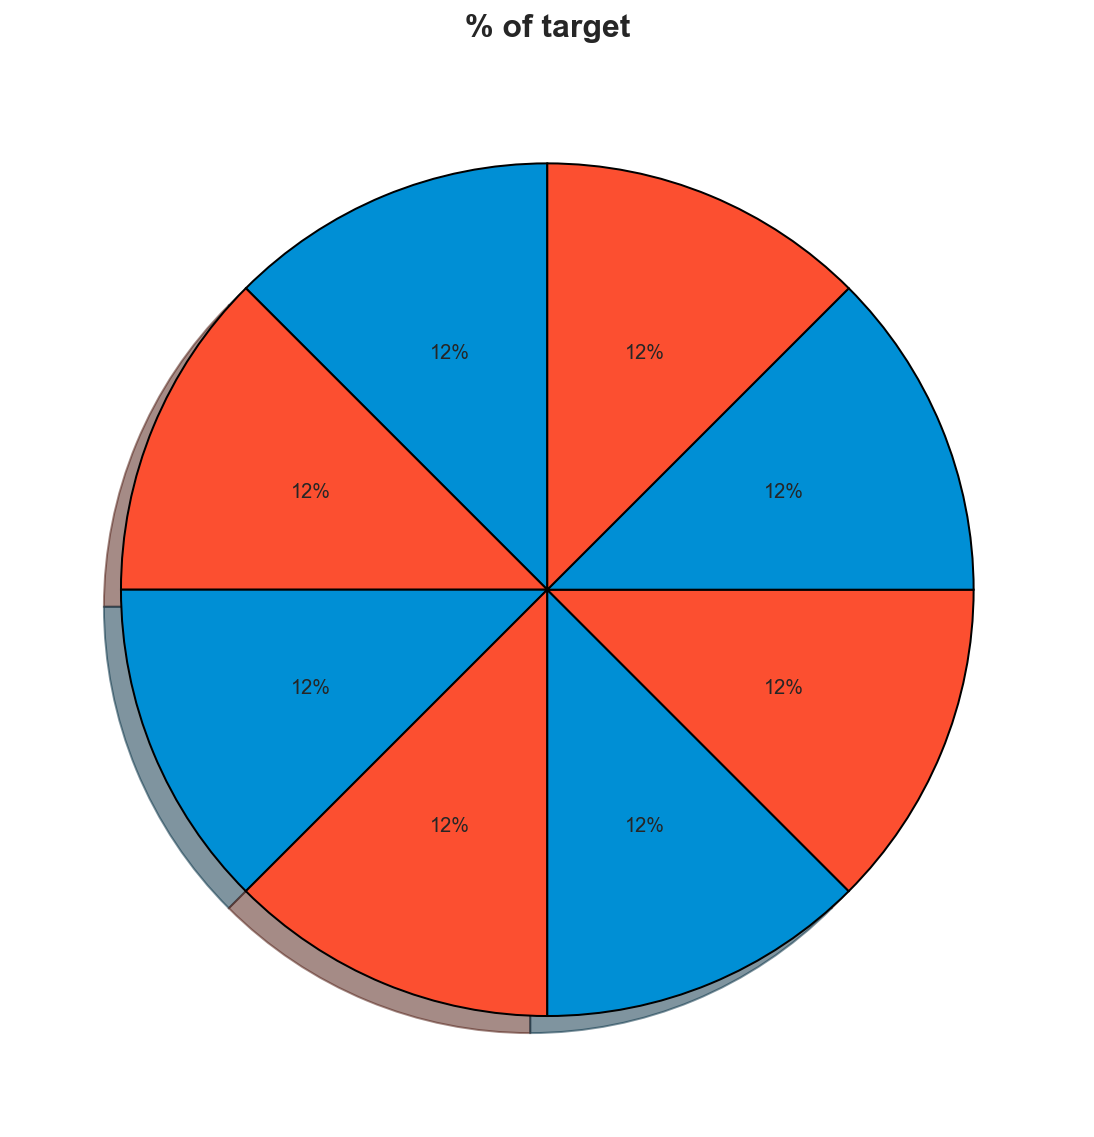

In [17]:
target_count = raw_df[TARGETNAME].value_counts().to_frame().T

colors = ['#008fd5', '#fc4f30']
plt.figure(figsize=(8,8))
plt.title('% of target')
plt.tight_layout()
plt.pie(list(target_count.iloc[0].values), startangle=90, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.f%%', shadow=True)
# plt.legend(loc='best', fontsize='medium')
plt.show()

# Preprocessing

To X, y

In [18]:
match_id_df = raw_df['match_id']
X = raw_df.drop(['match_id'], axis=1)
# X = raw_df.copy()

In [19]:
y = X.pop(TARGETNAME)

In [20]:
X.fillna('', inplace=True)

In [21]:
X.dtypes

augment0            object
augment1            object
augment2            object
Set7_Assassin      float32
Set7_Astral        float32
                    ...   
TFT7_Yone_item2     object
TFT7_Zoe           float32
TFT7_Zoe_item0      object
TFT7_Zoe_item1      object
TFT7_Zoe_item2      object
Length: 267, dtype: object

In [22]:
y.dtypes

dtype('int8')

In [23]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# Feature Engineering

In [24]:
traits_col = [s for s in numeric_cols if "Set7" in s]
units_col = [s for s in numeric_cols if "TFT7" in s]
augments_col = ['augment0', 'augment1', 'augment2']
items_col = [s for s in categorical_cols if s not in augments_col]

In [25]:
df_unique = X.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']

In [26]:
df_unique.to_csv('df_unique.csv')

In [27]:
unique_items_set = {y for col in items_col for y in X[col].unique().tolist()}
unique_augments_set = {y for col in augments_col for y in X[col].unique().tolist()}

In [28]:
X[f'items_count'] = X[items_col].apply(lambda row: sum(x != 'None' for x in row), axis=1)

In [29]:
X[f'traits_sum'] = X[traits_col].sum(axis=1)
X[f'units_sum'] = X[units_col].sum(axis=1)

In [30]:
X.iloc[X[f'units_sum'].idxmax()]

augment0          TFT7_Augment_MageConference
augment1            TFT7_Augment_UrfsGrabBag1
augment2            TFT7_Augment_FirstAidKit2
Set7_Assassin                             0.0
Set7_Astral                               1.0
                             ...             
TFT7_Zoe_item1                           None
TFT7_Zoe_item2                           None
items_count                                13
traits_sum                               10.0
units_sum                                29.0
Name: 9411, Length: 270, dtype: object

In [31]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [32]:
X[numeric_cols] = X[numeric_cols].applymap(np.int64)

In [33]:
matches_df = X.copy()
matches_df[TARGETNAME] = y

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30848 entries, 0 to 30847
Columns: 270 entries, augment0 to units_sum
dtypes: int64(90), object(180)
memory usage: 63.5+ MB


# Data Analysis

## Traits

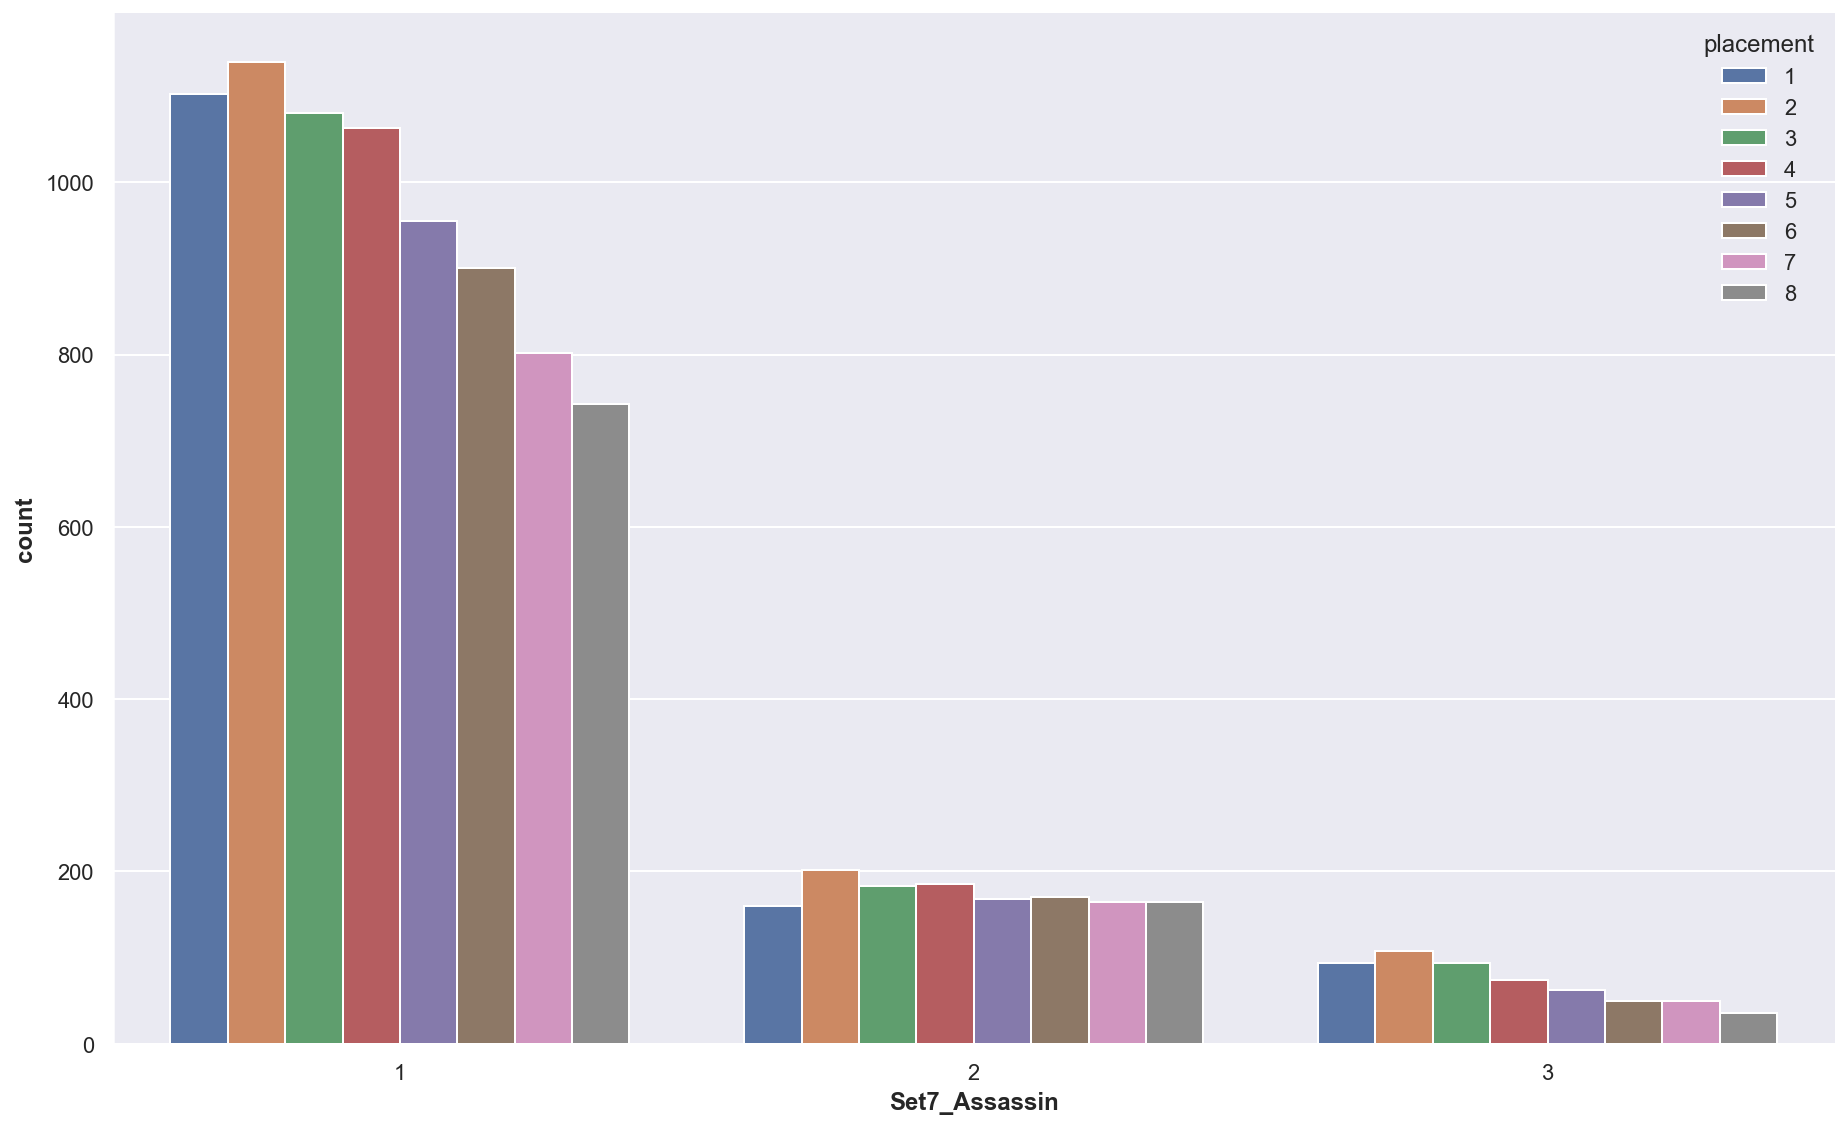

In [35]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Assassin']>0], x='Set7_Assassin', hue=TARGETNAME)
sns.despine()

Worst Trait.

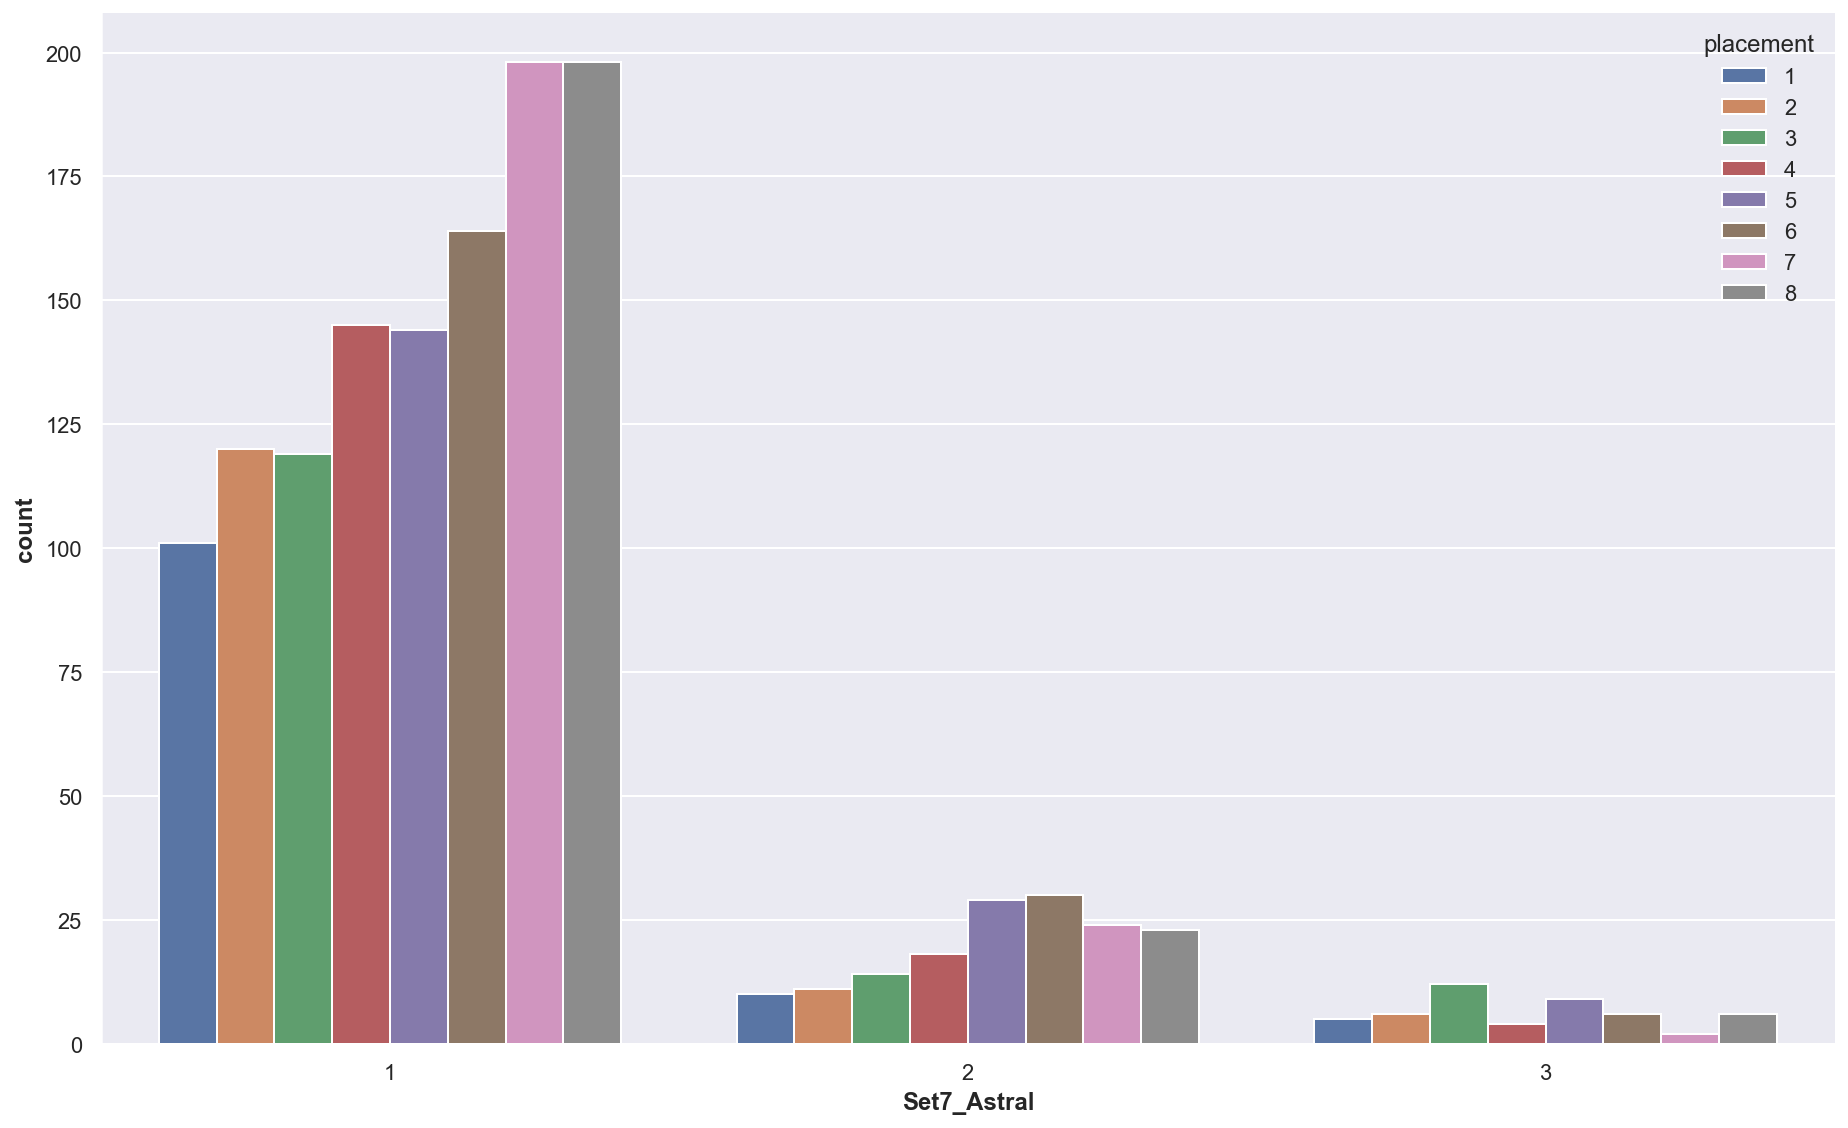

In [36]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Astral']>0], x='Set7_Astral', hue=TARGETNAME)
sns.despine()

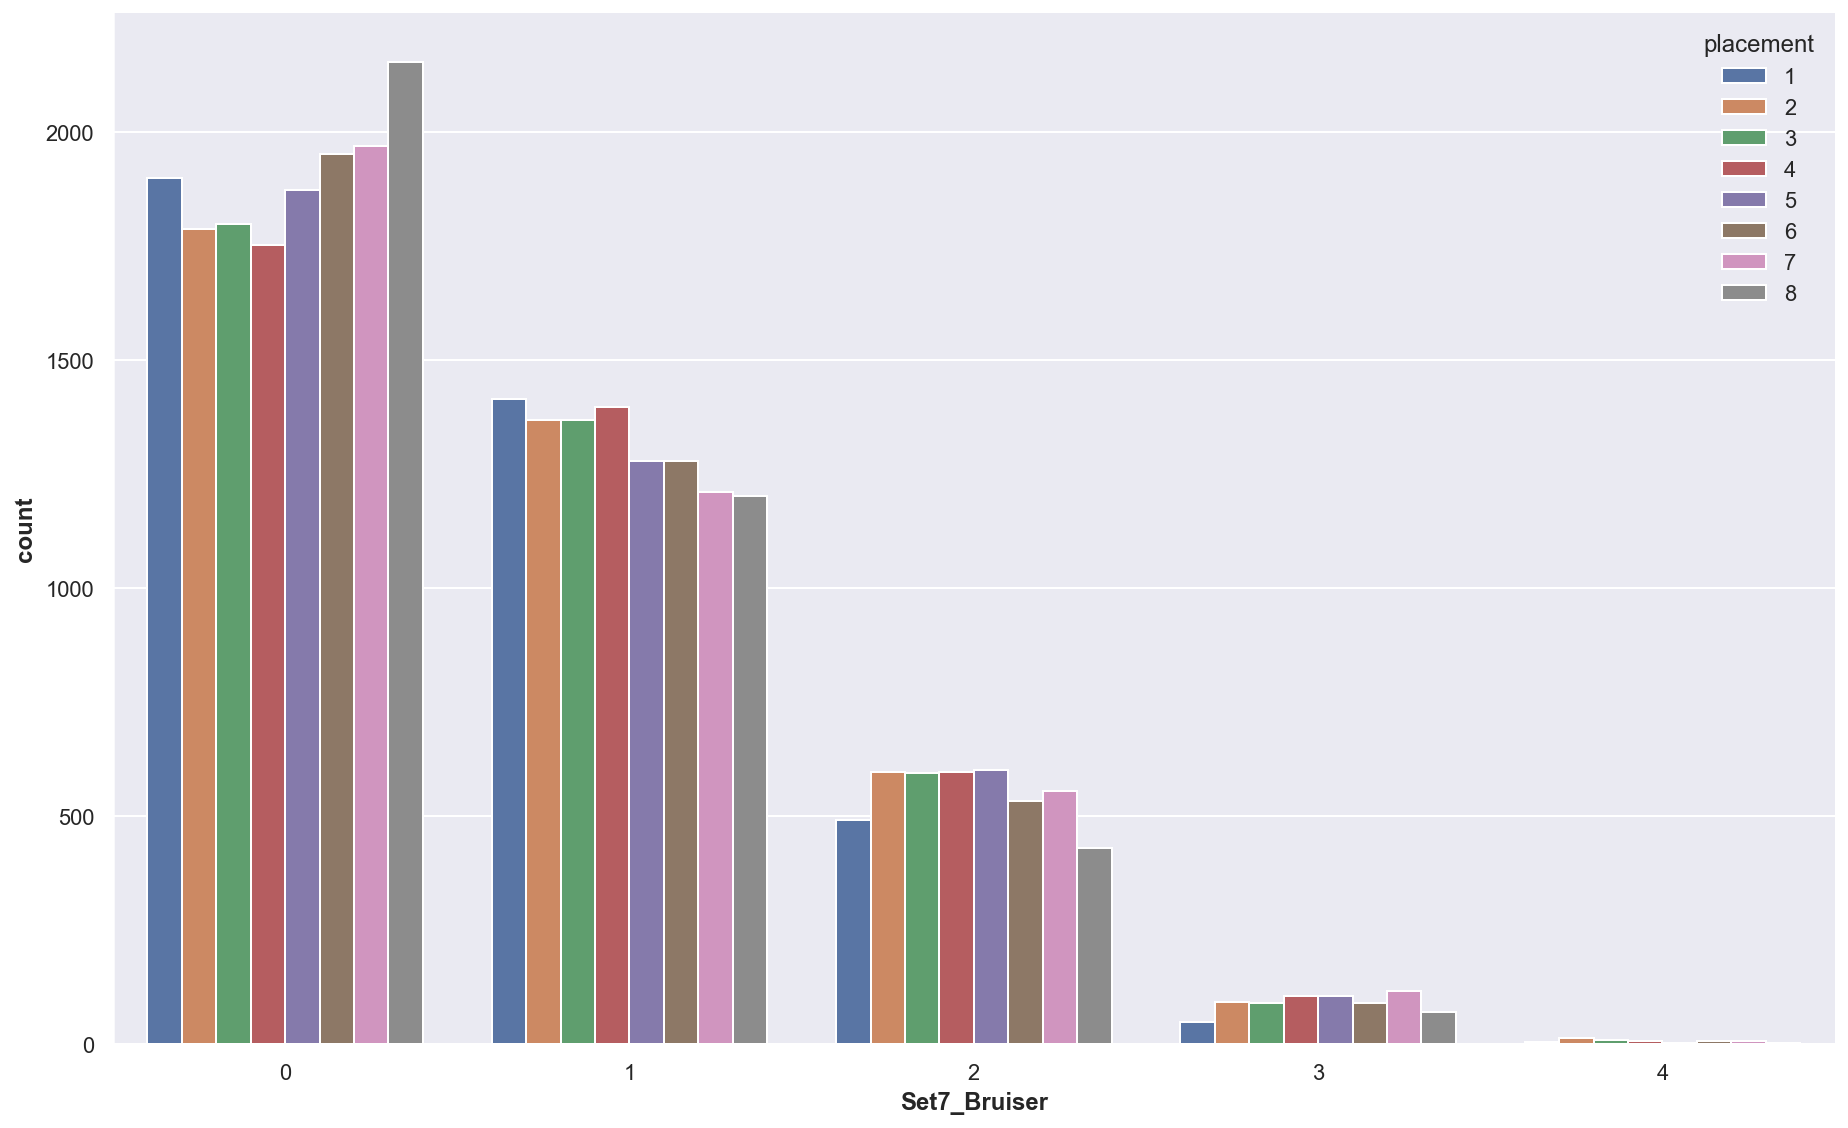

In [37]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Bruiser']>=0], x='Set7_Bruiser', hue=TARGETNAME)
sns.despine()

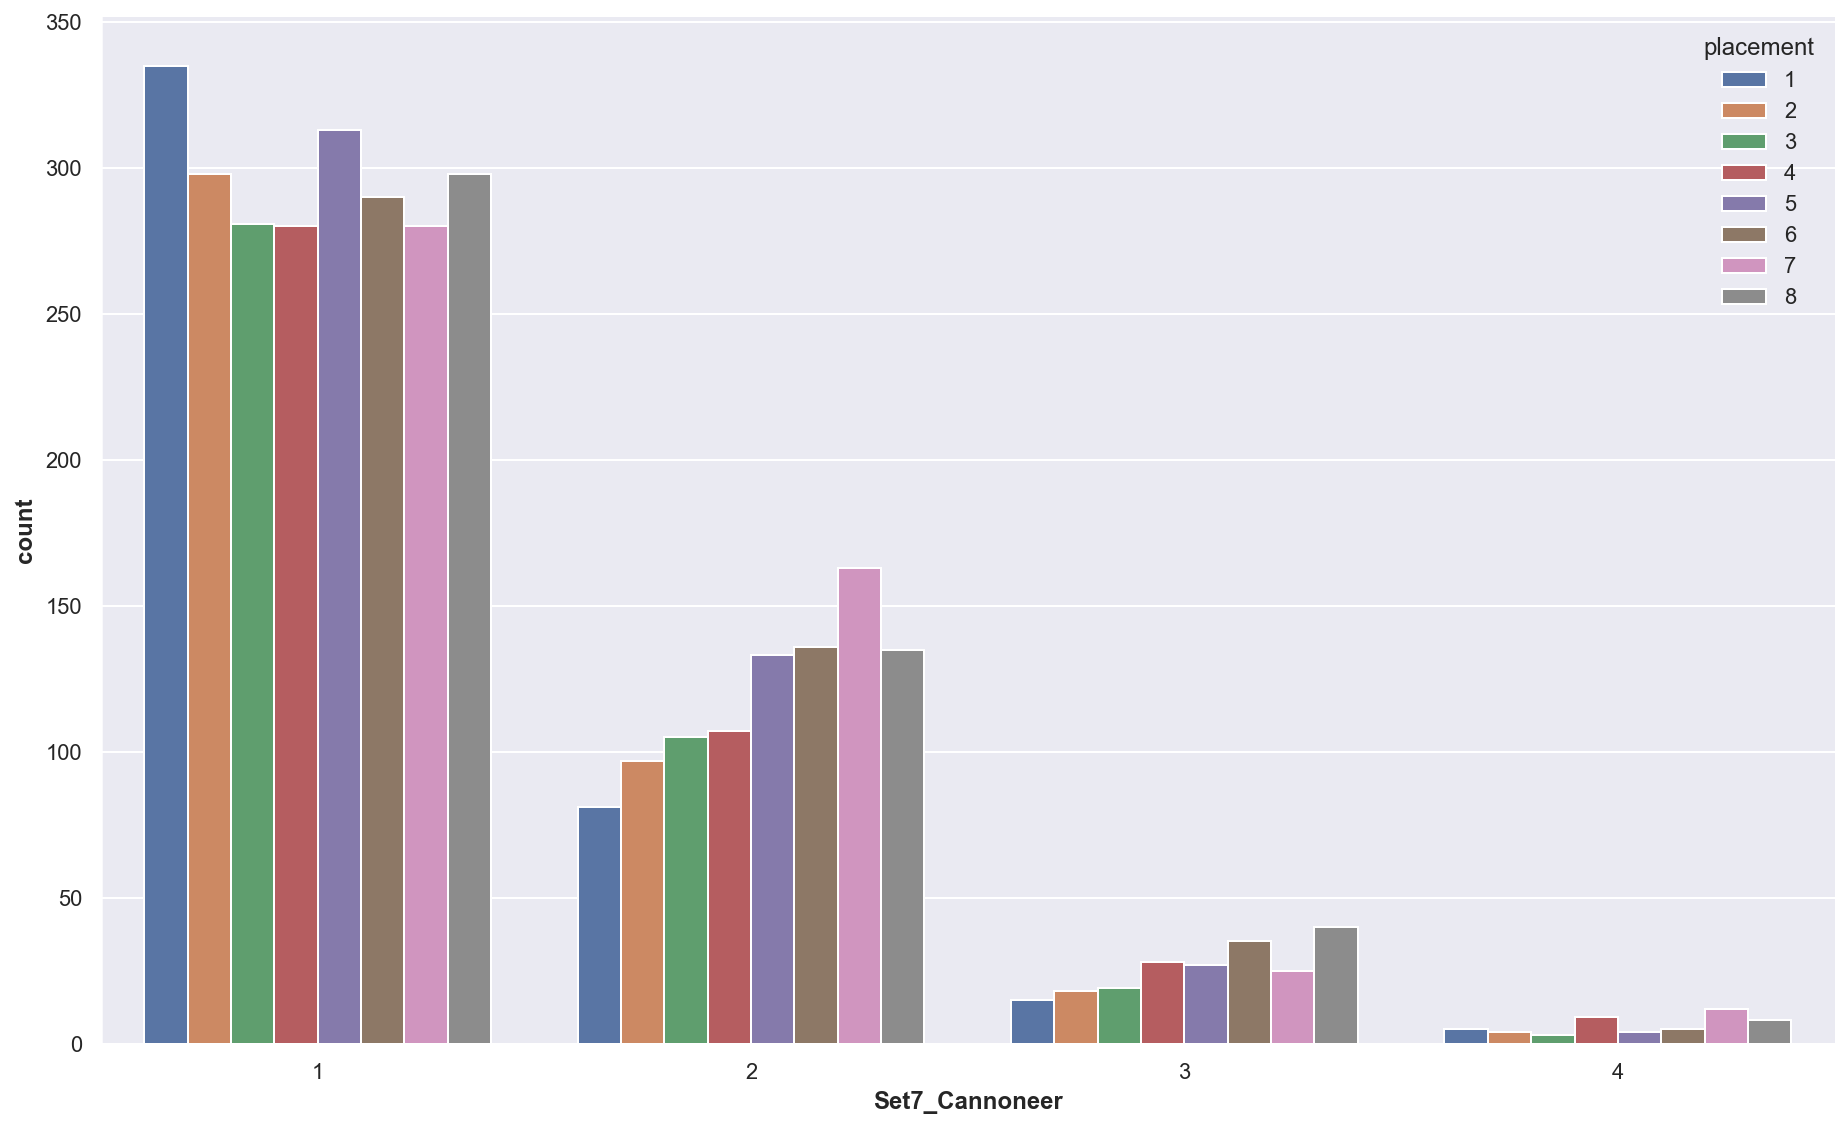

In [38]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cannoneer']>0], x='Set7_Cannoneer', hue=TARGETNAME)
sns.despine()

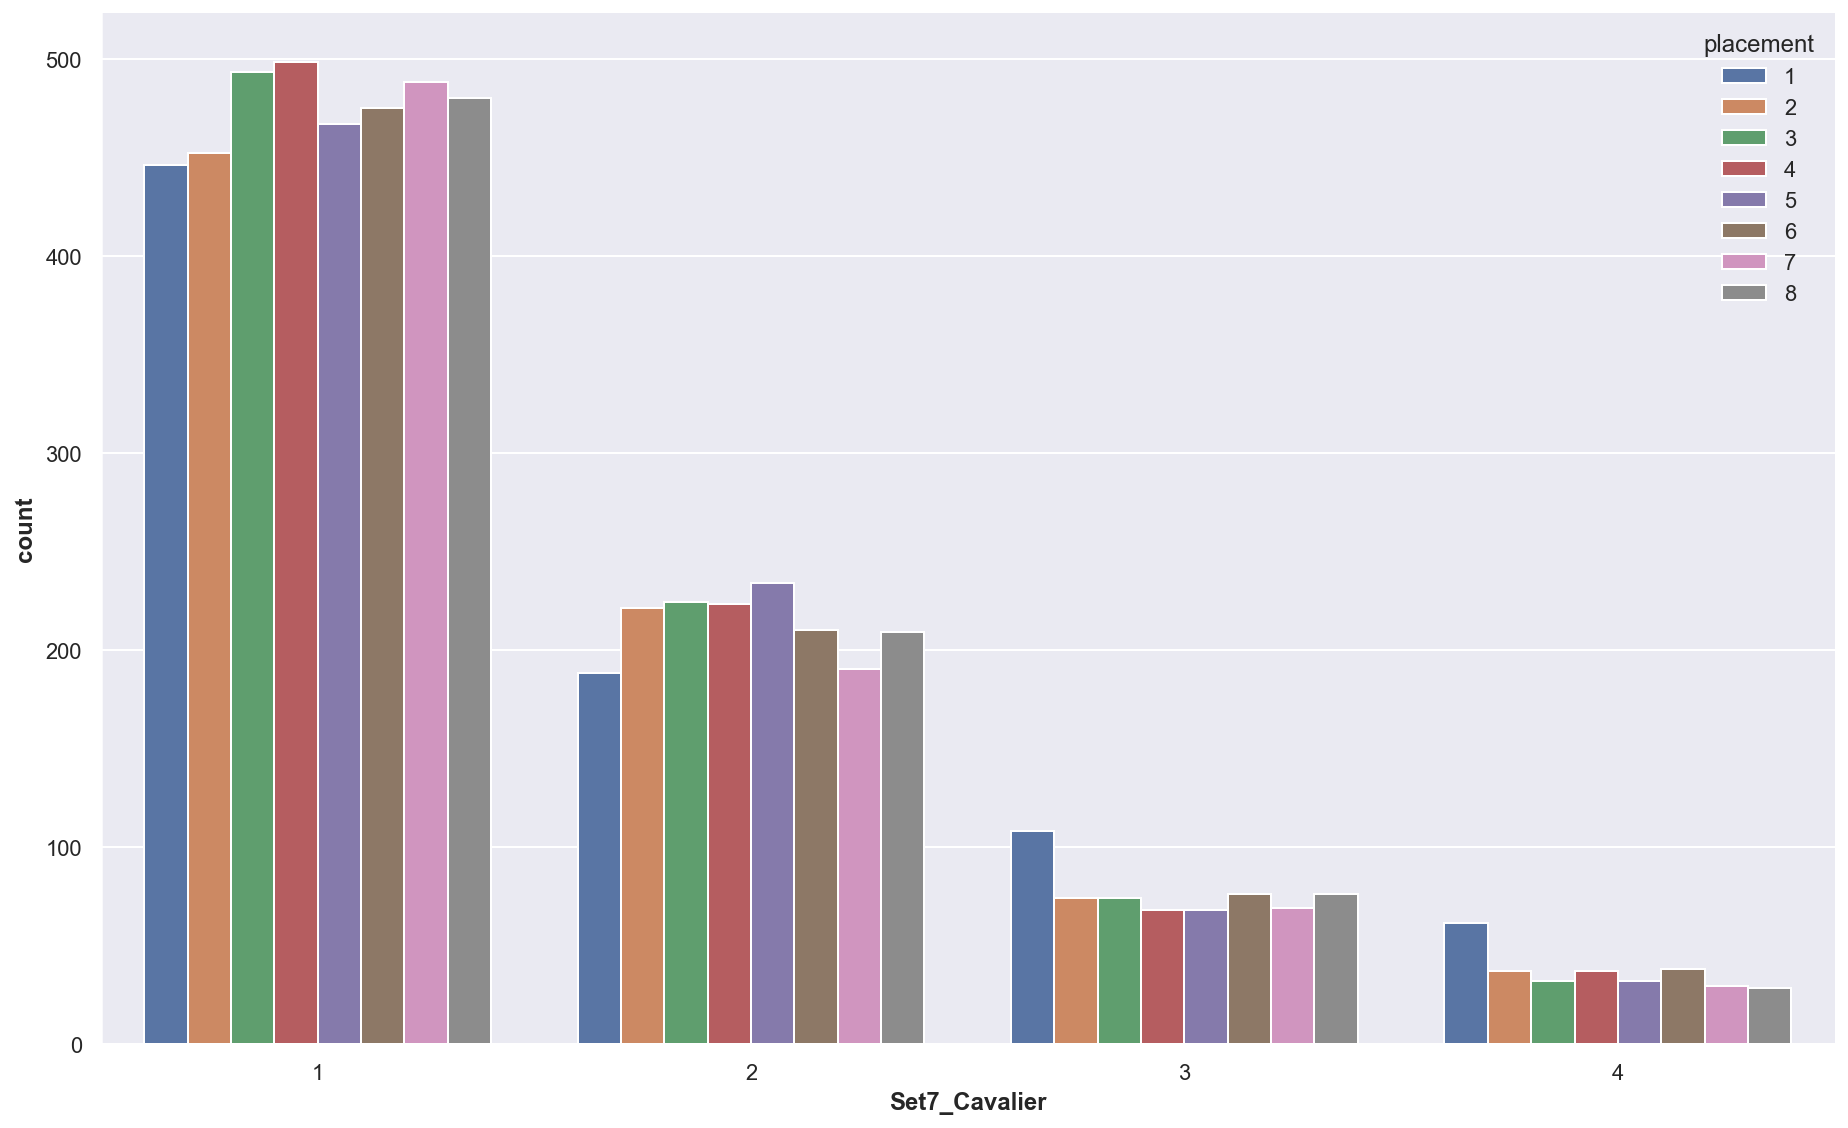

In [39]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cavalier']>0], x='Set7_Cavalier', hue=TARGETNAME)
sns.despine()

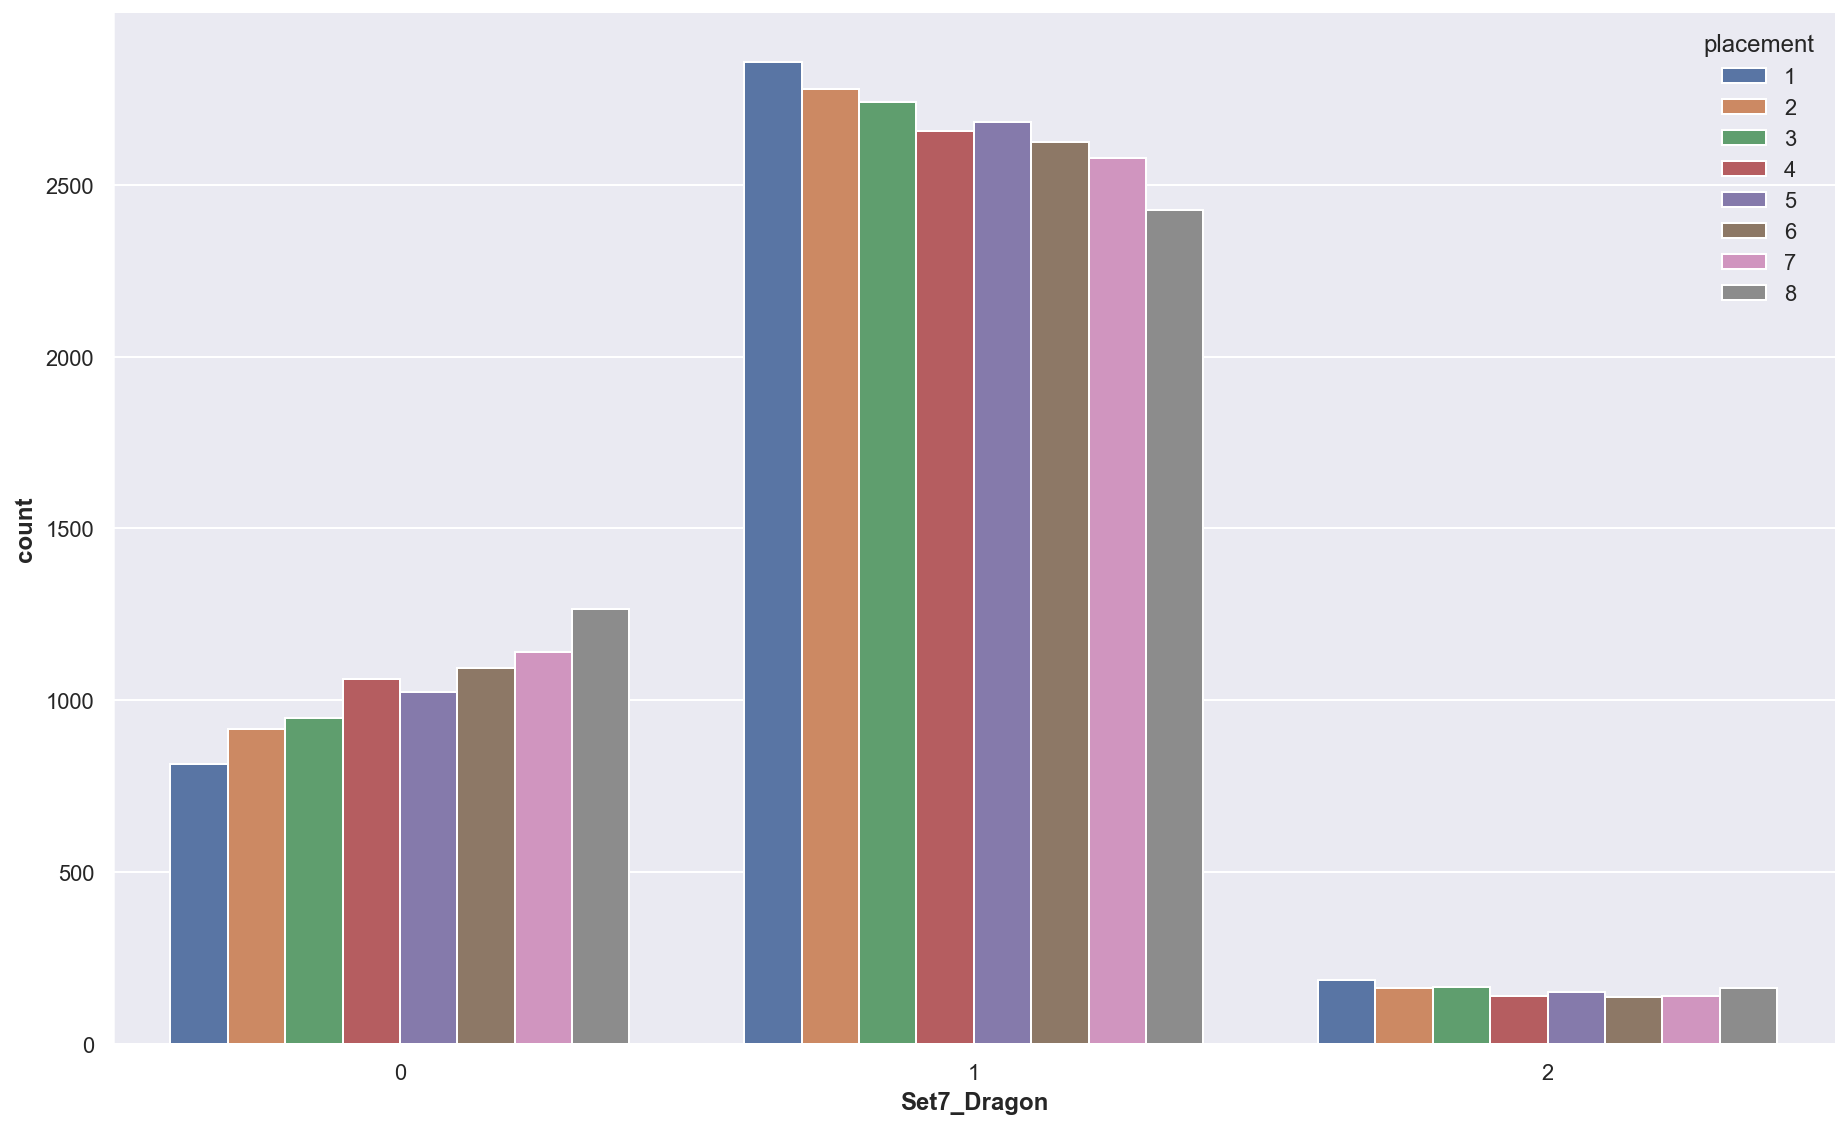

In [40]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragon']>=0], x='Set7_Dragon', hue=TARGETNAME)
sns.despine()

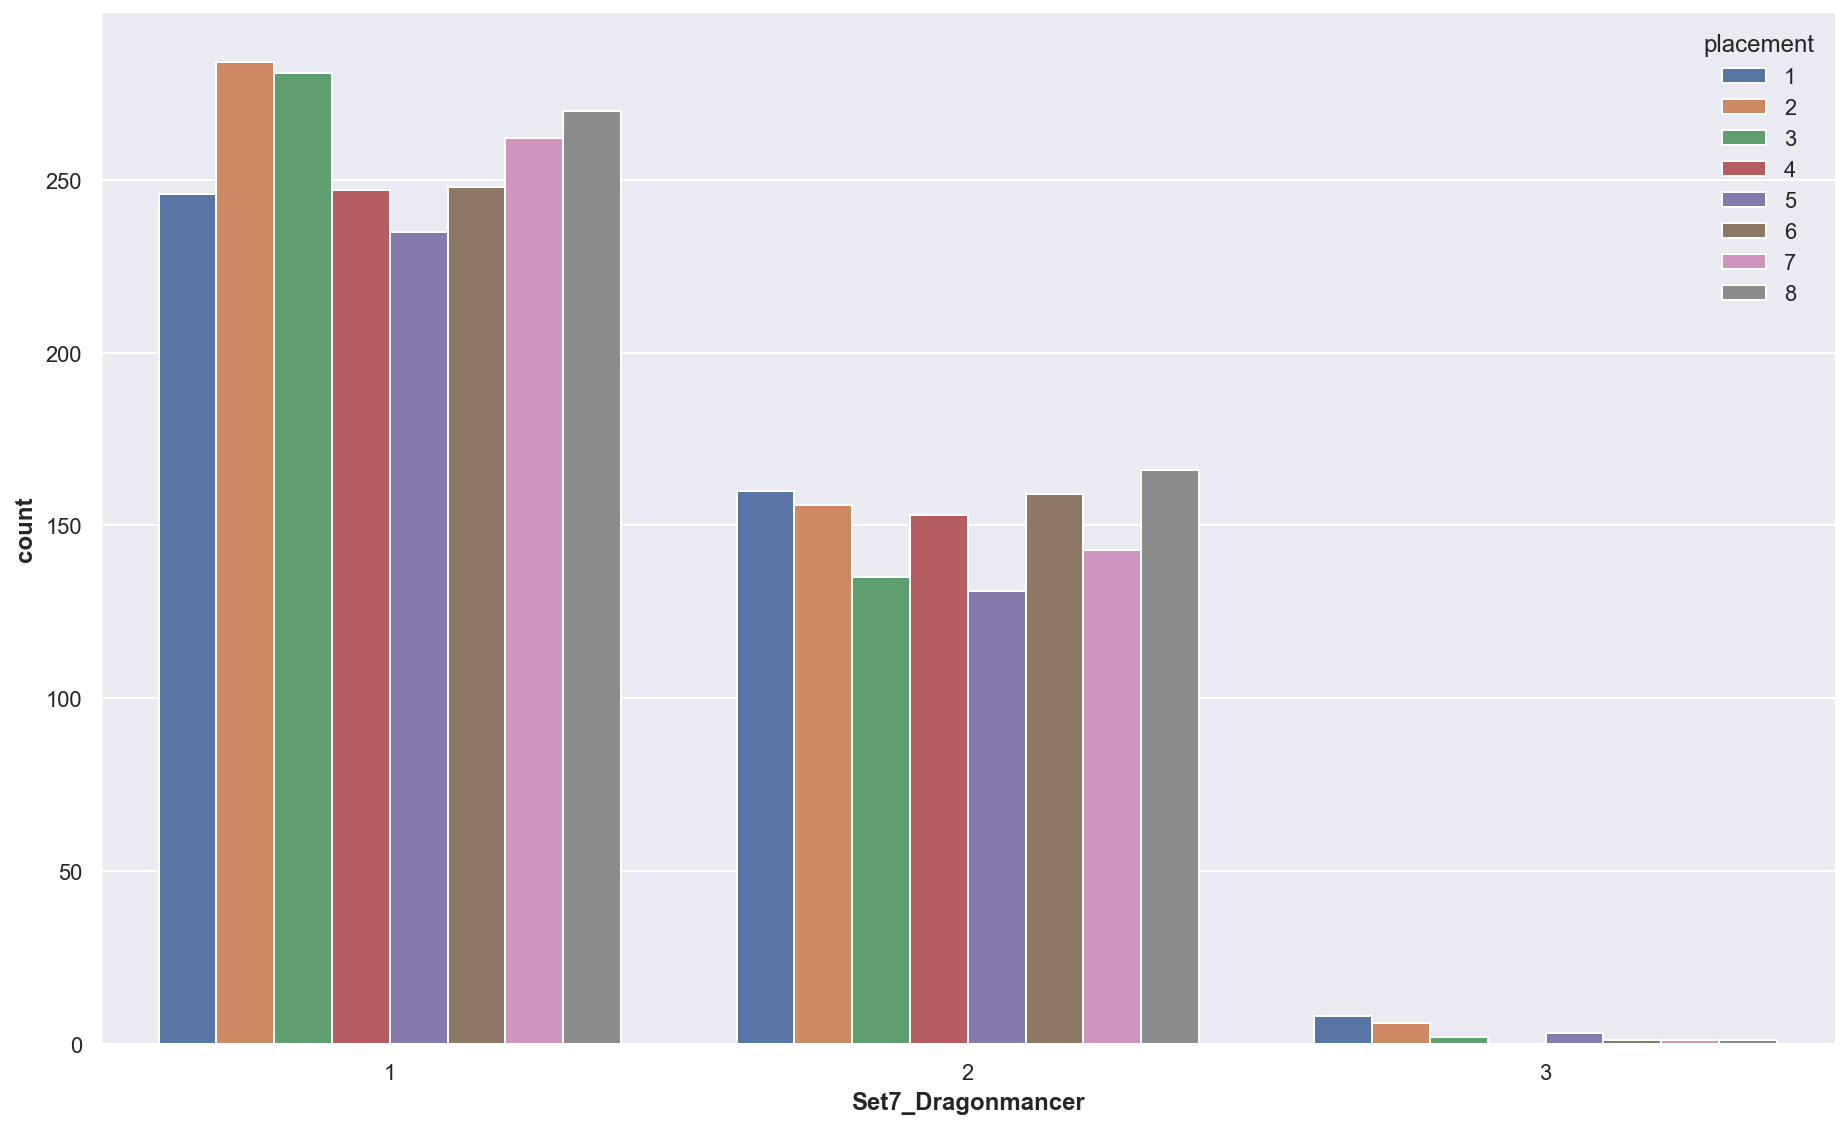

In [41]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragonmancer']>0], x='Set7_Dragonmancer', hue=TARGETNAME)
sns.despine()

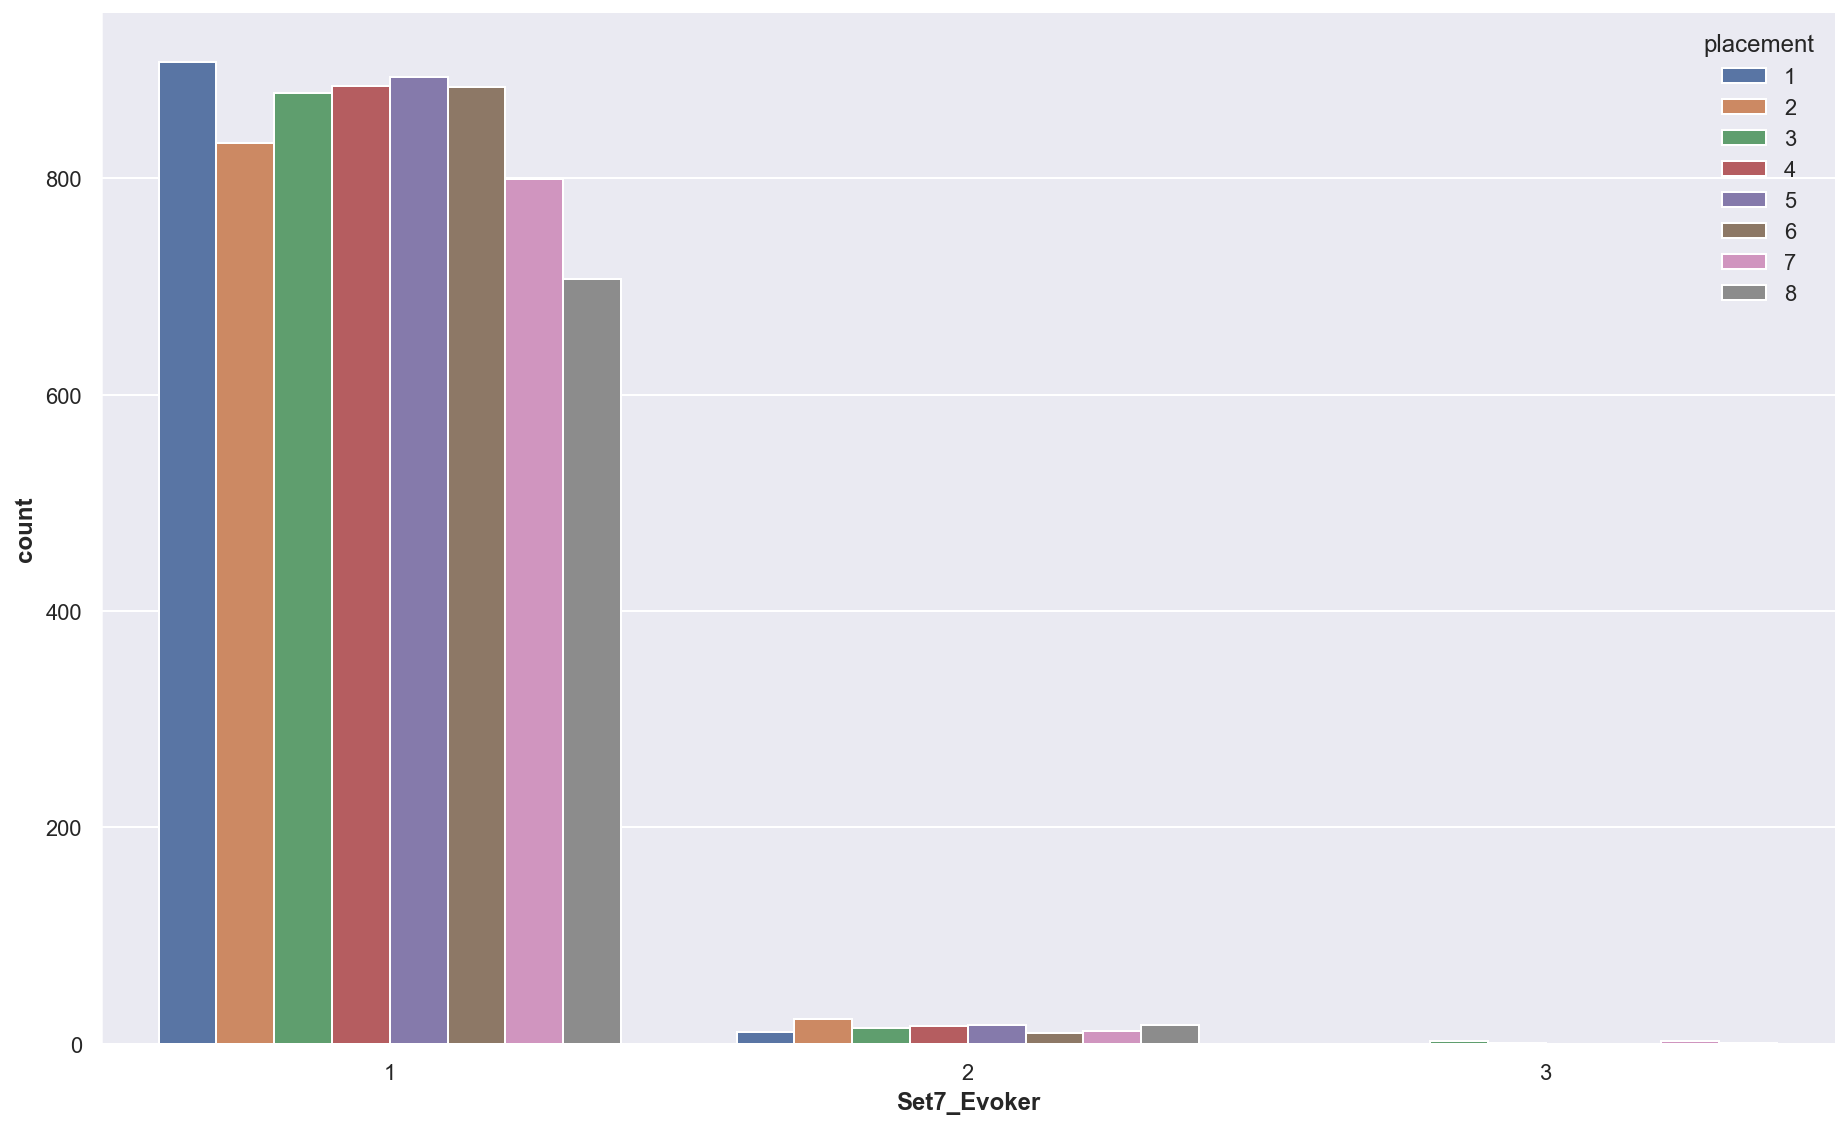

In [42]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Evoker']>0], x='Set7_Evoker', hue=TARGETNAME)
sns.despine()

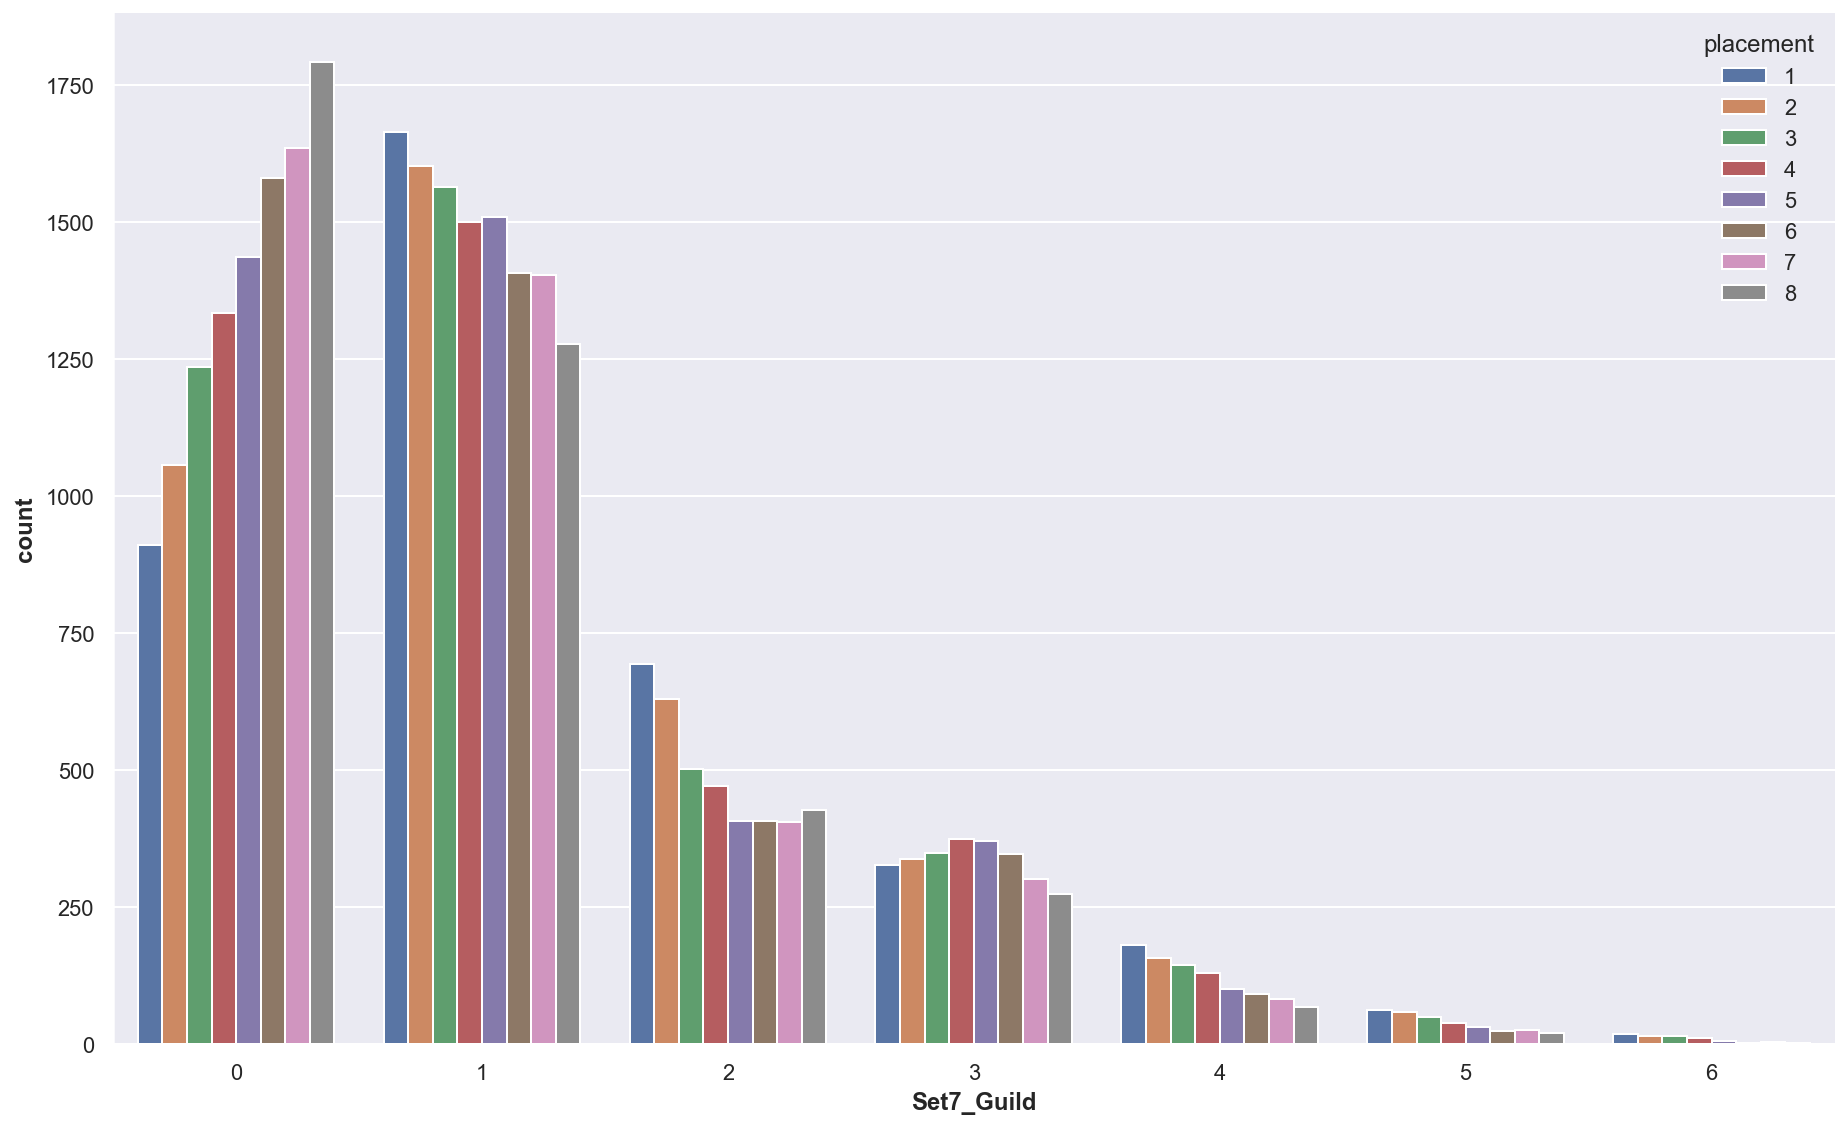

In [43]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='Set7_Guild', hue=TARGETNAME)
sns.despine()

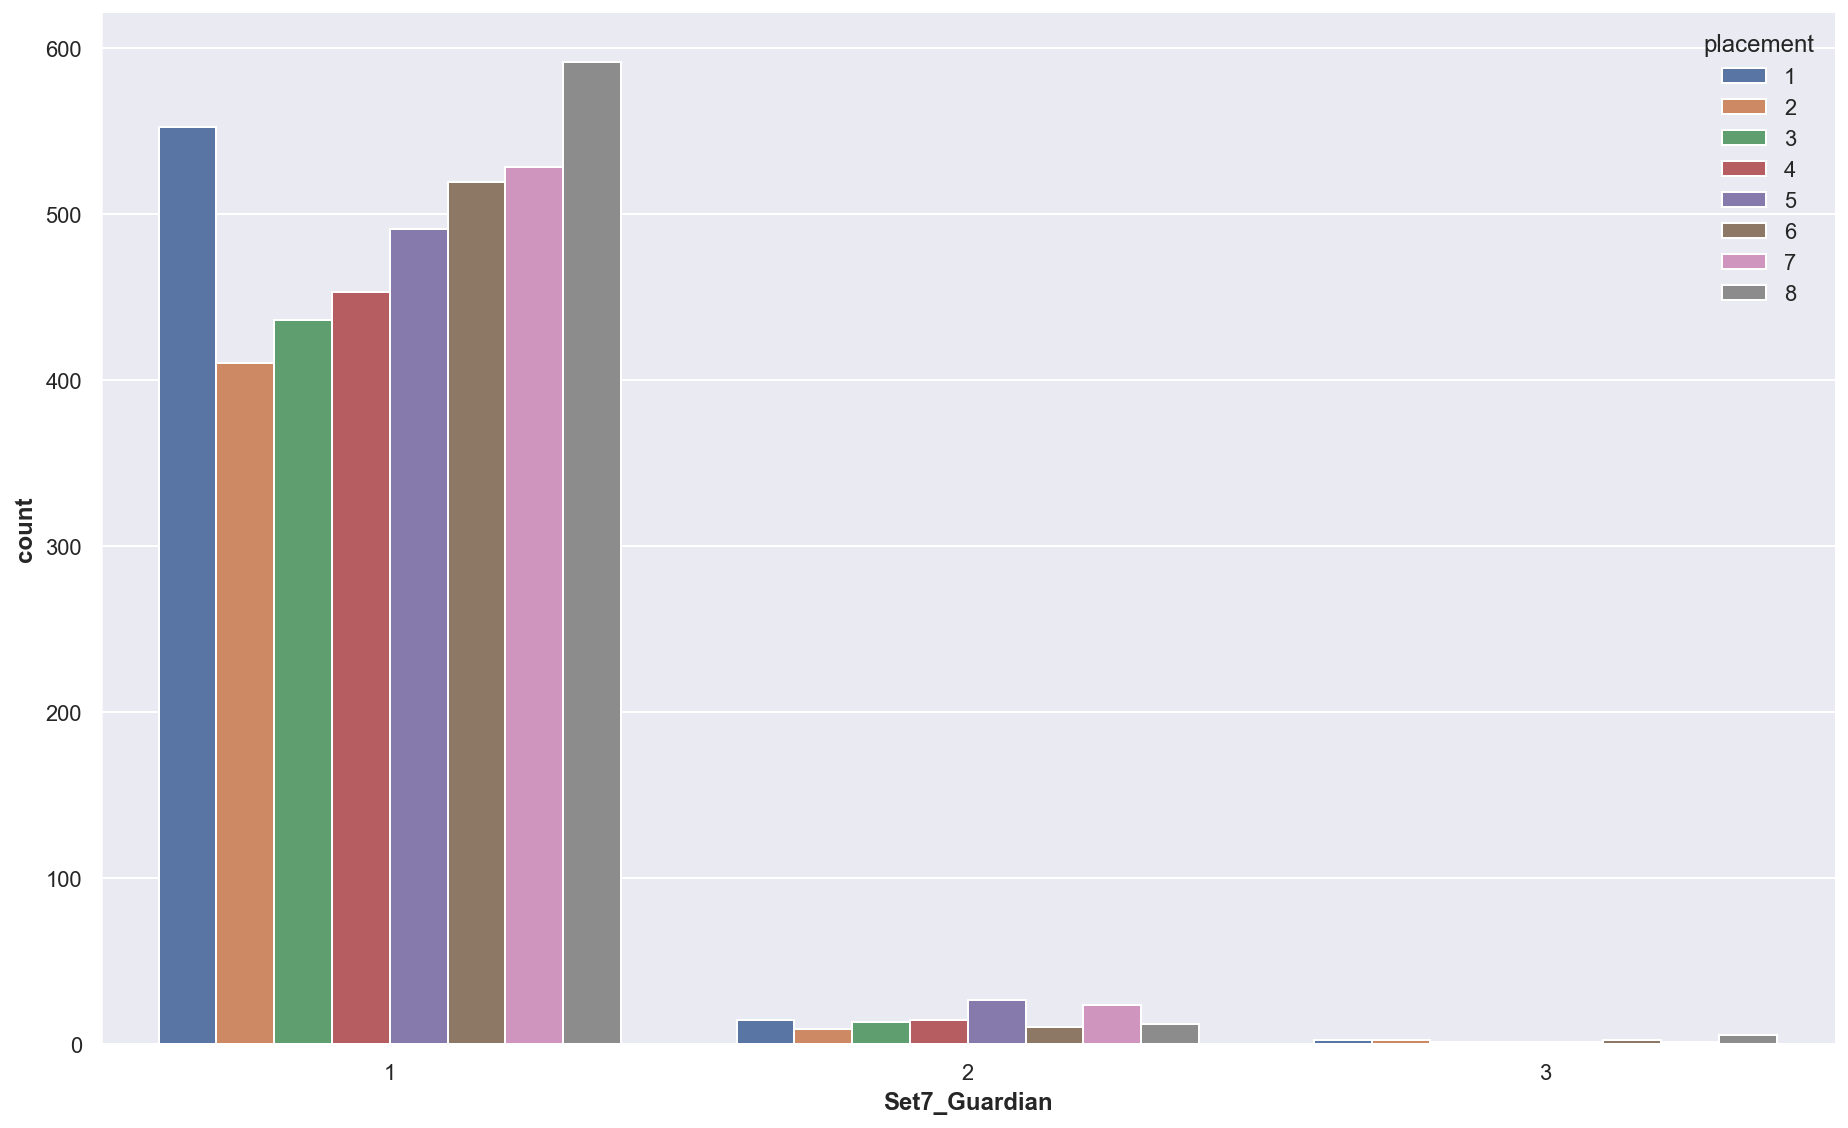

In [44]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Guardian']>0], x='Set7_Guardian', hue=TARGETNAME)
sns.despine()

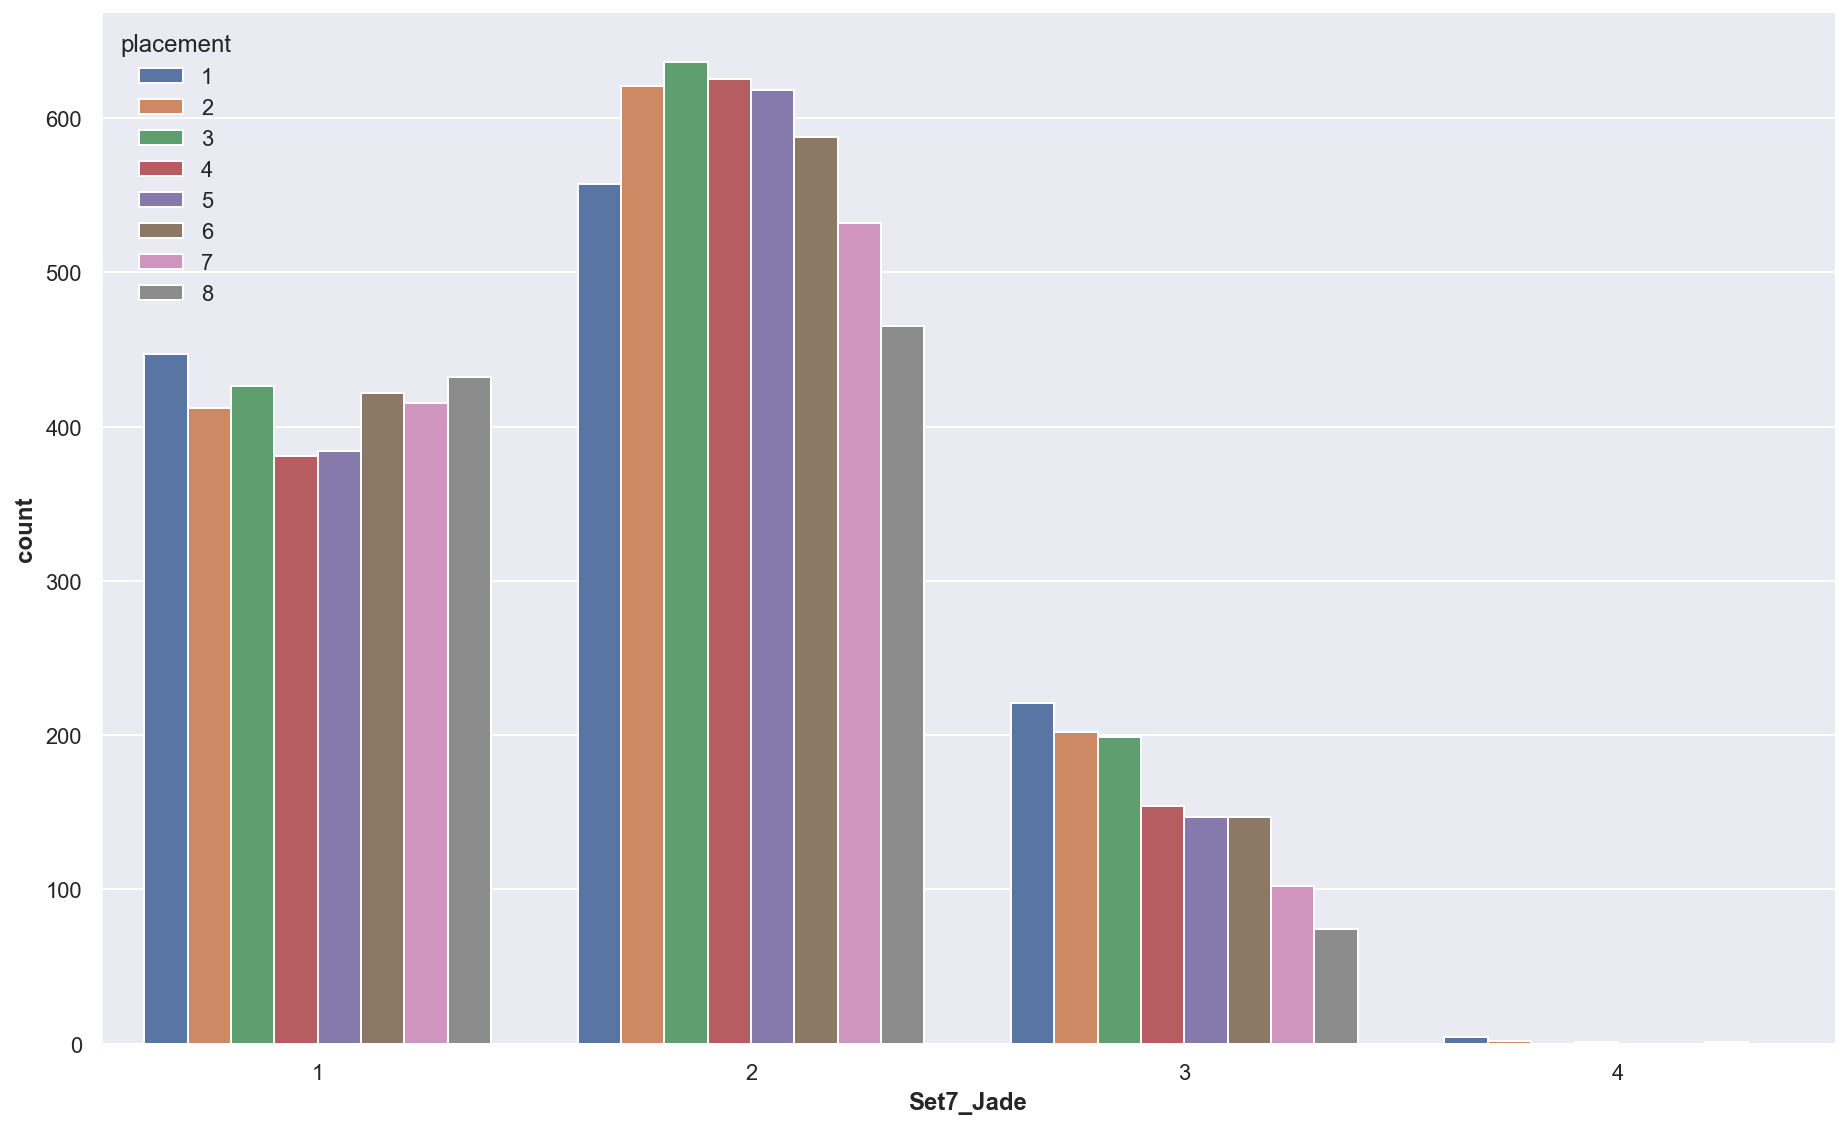

In [45]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Jade']>0], x='Set7_Jade', hue=TARGETNAME)
sns.despine()

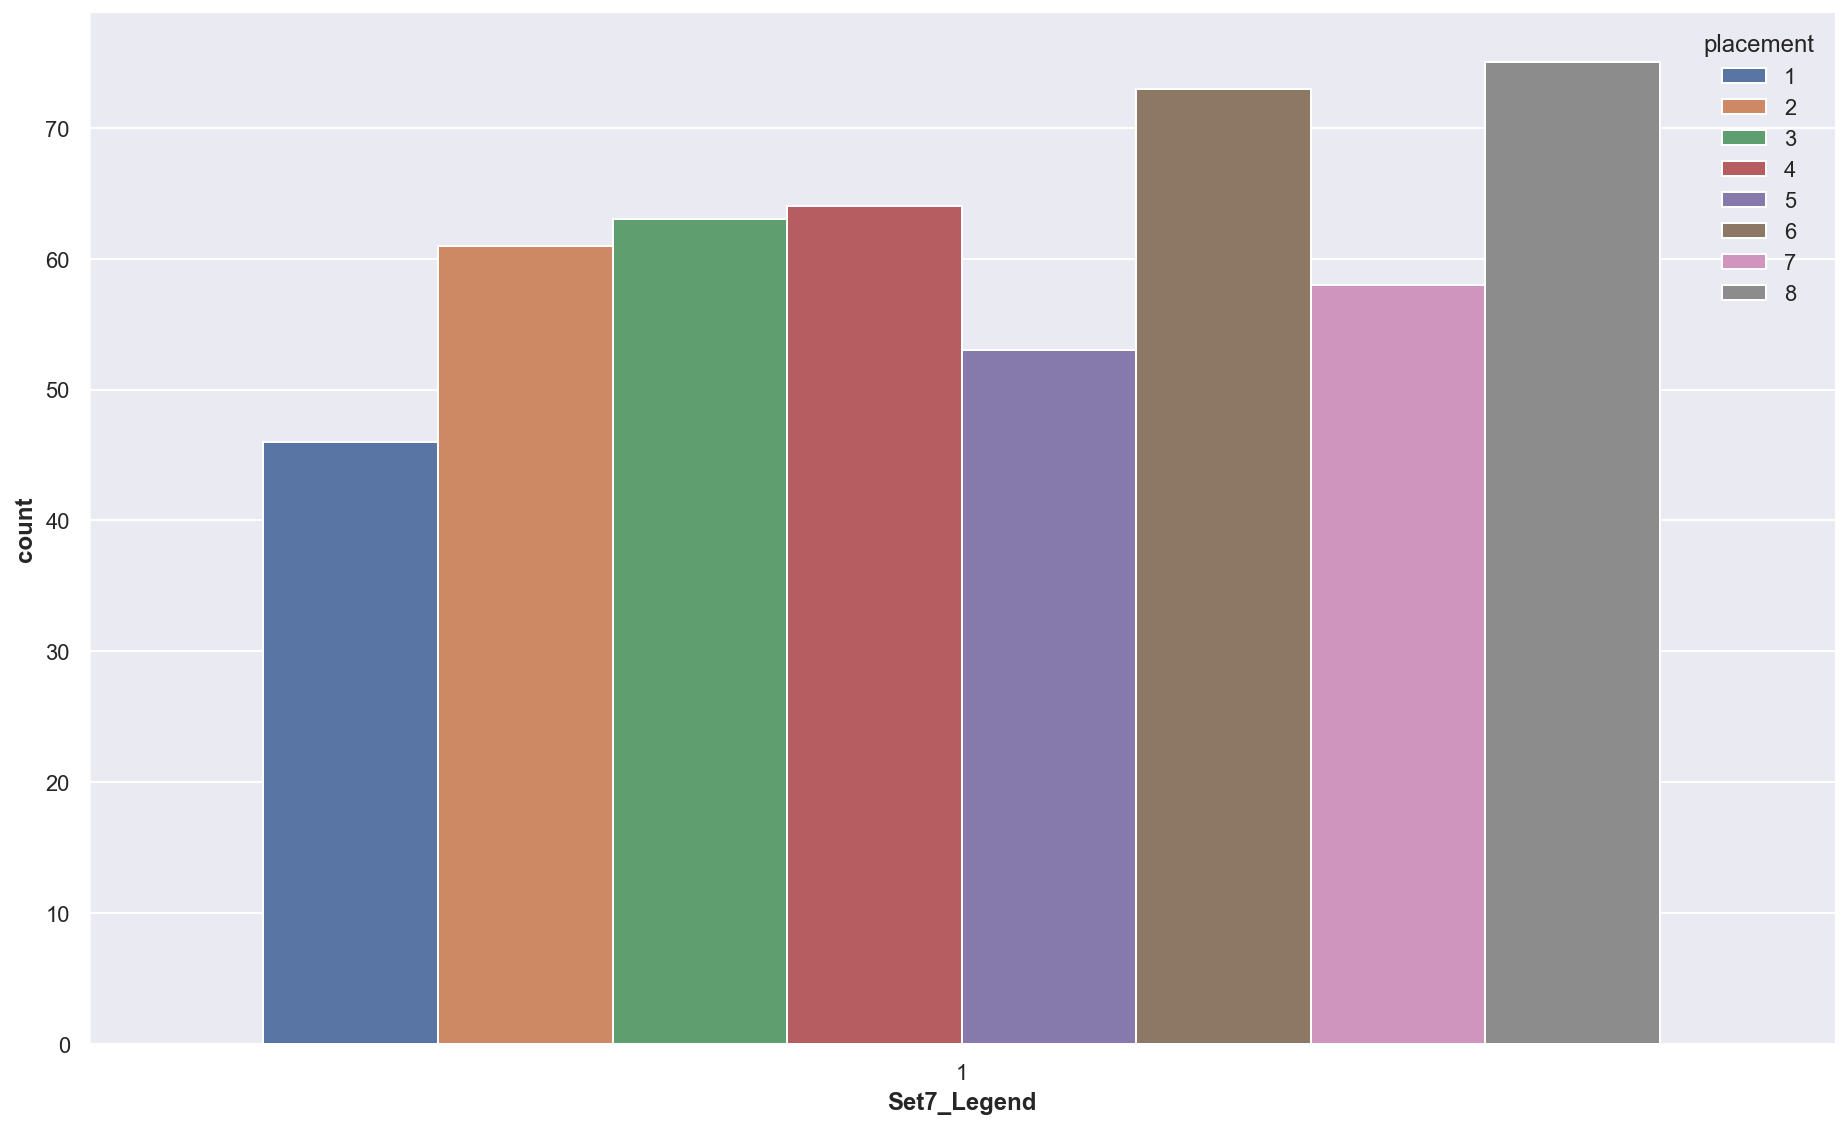

In [46]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Legend']>0], x='Set7_Legend', hue=TARGETNAME)
sns.despine()

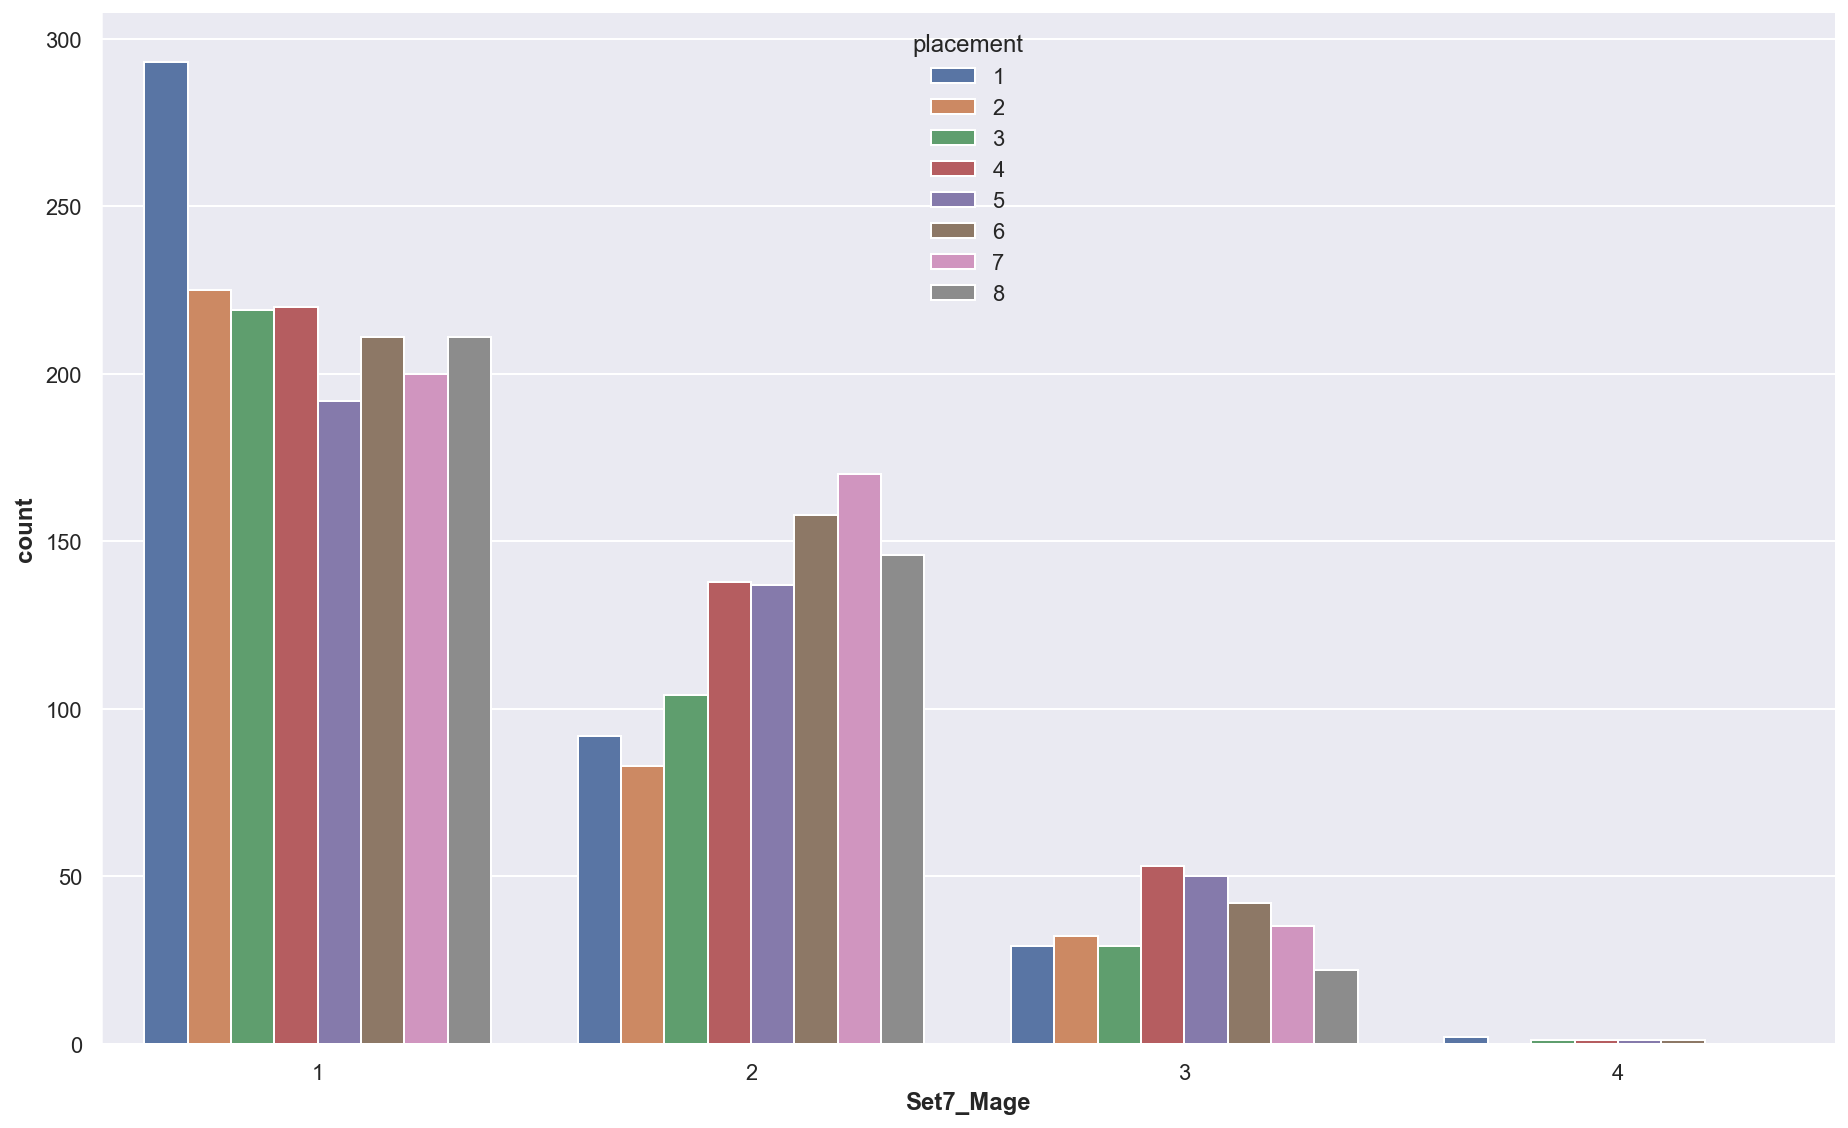

In [47]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='Set7_Mage', hue=TARGETNAME)
sns.despine()

Need Zoe for Mages

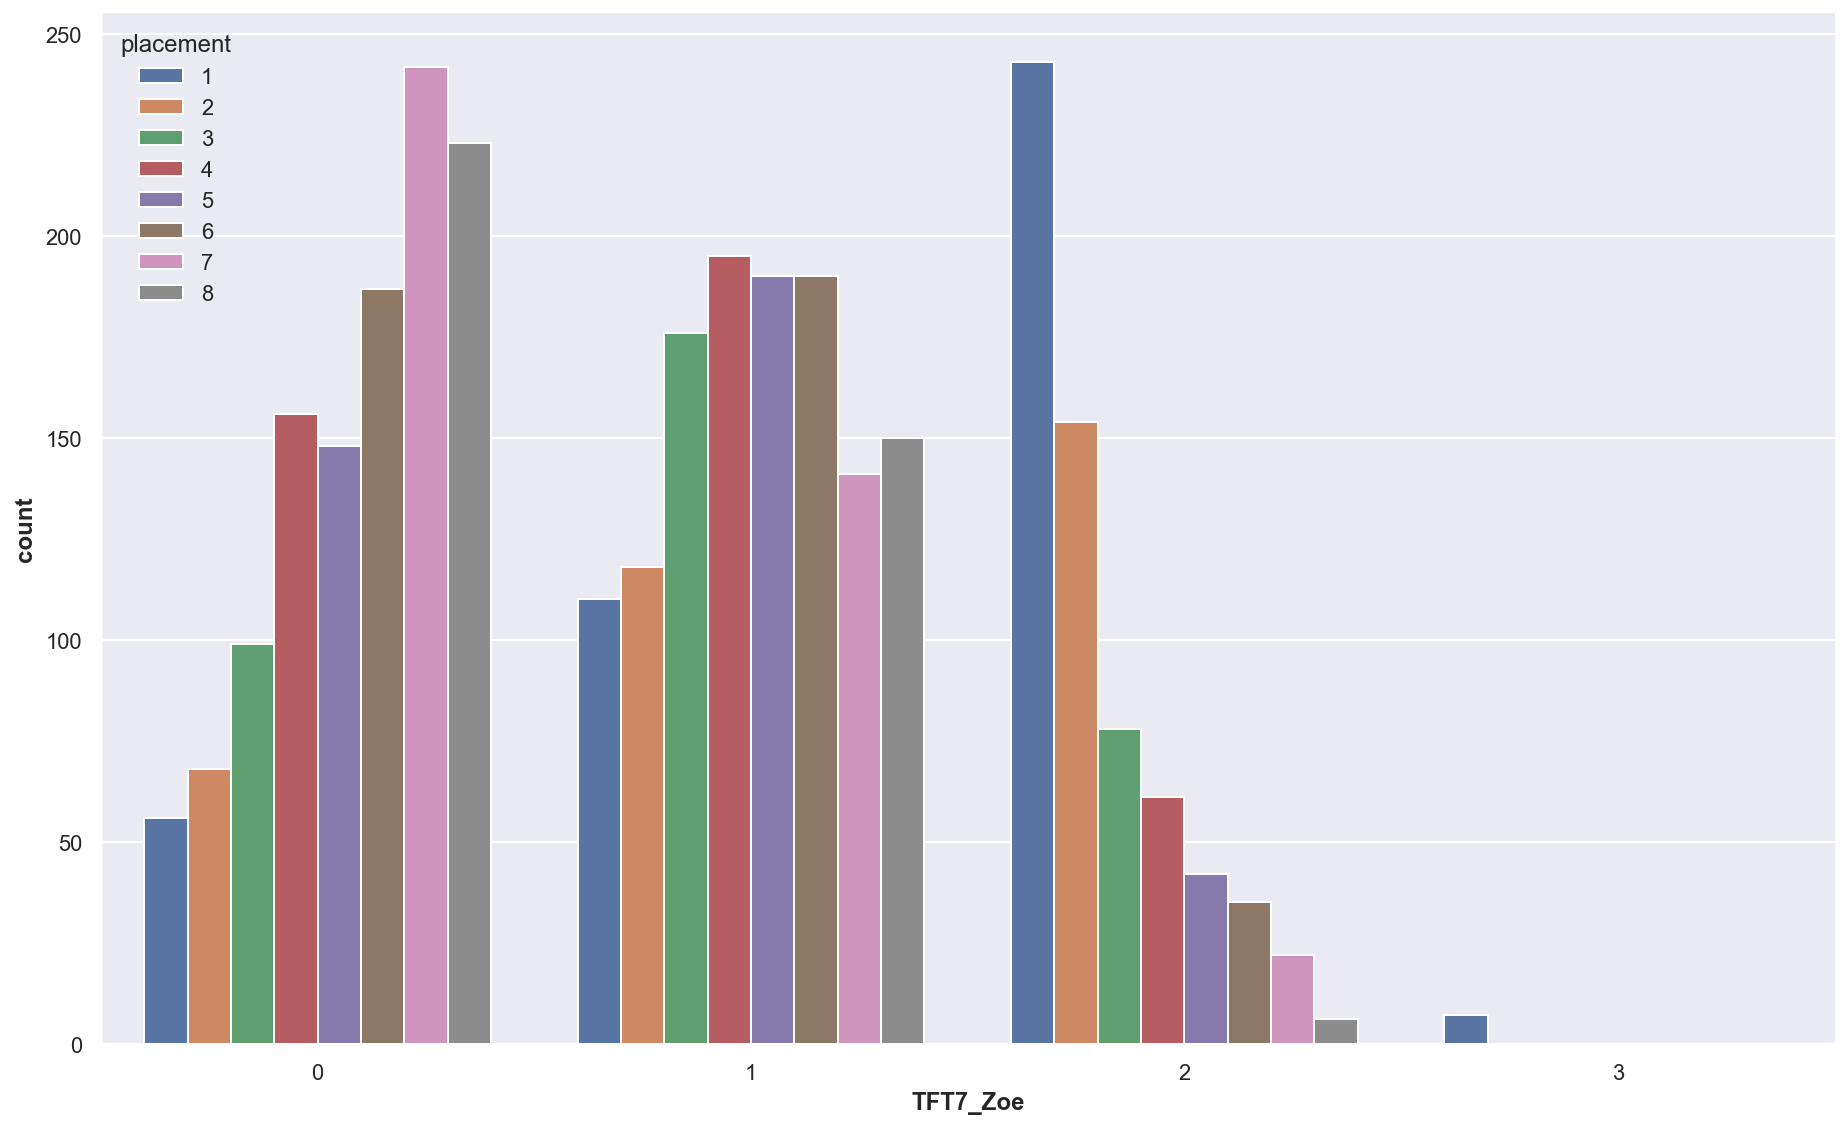

In [48]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='TFT7_Zoe', hue=TARGETNAME)
sns.despine()

Significant correlation with Mystic.

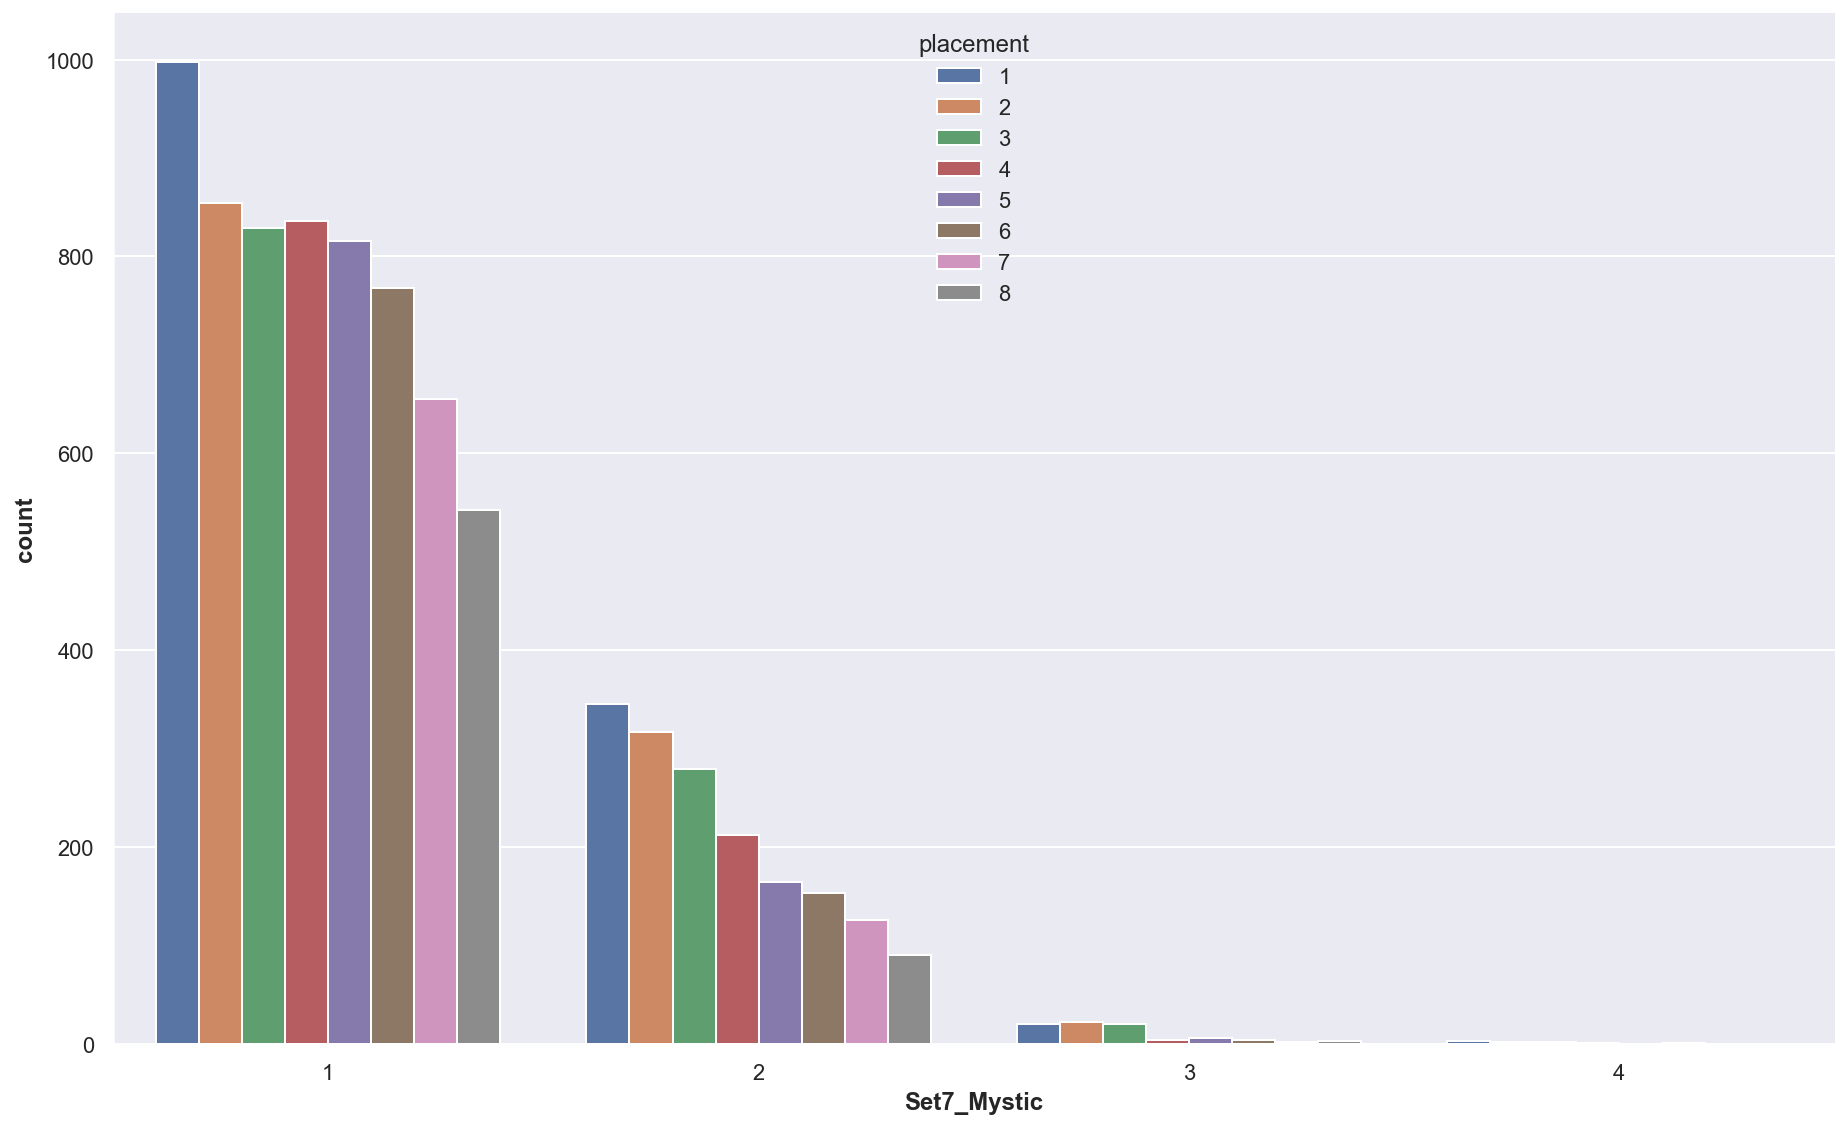

In [49]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mystic']>0], x='Set7_Mystic', hue=TARGETNAME)
sns.despine()

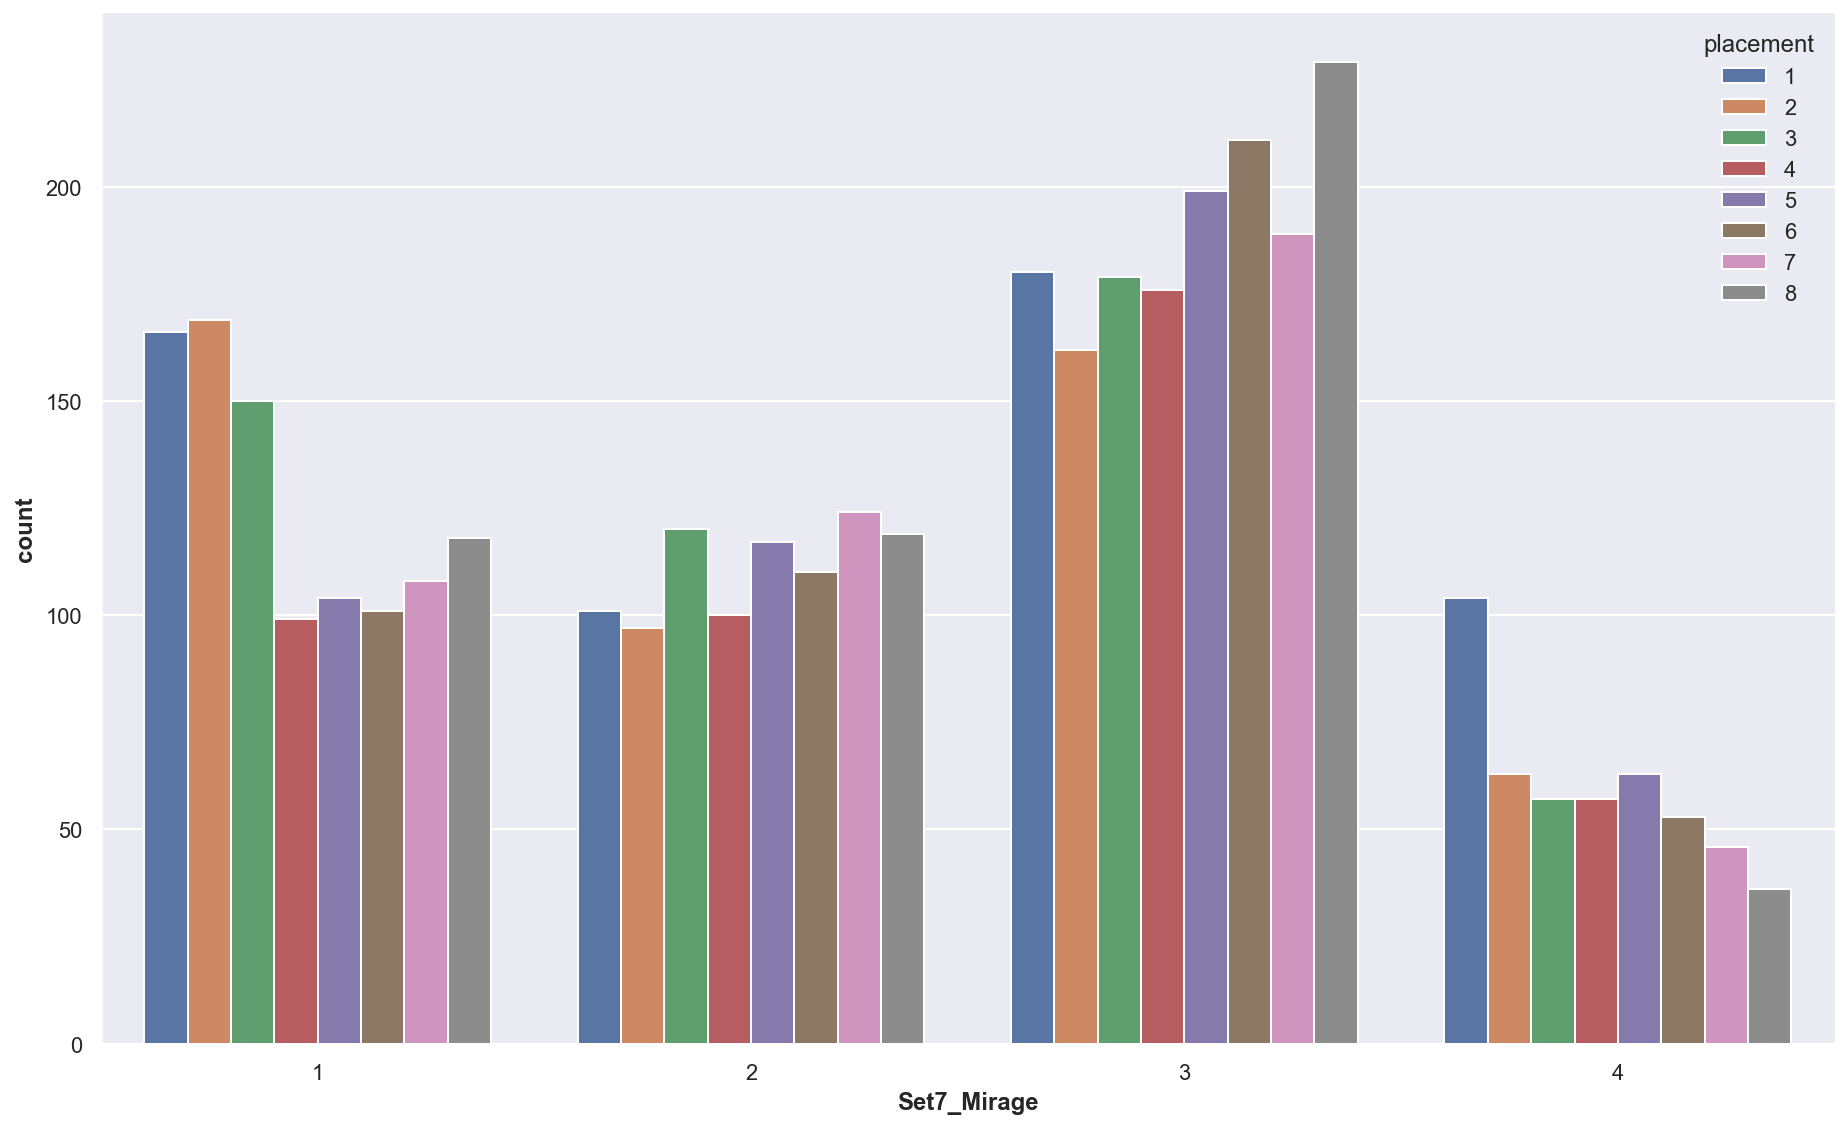

In [50]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mirage']>0], x='Set7_Mirage', hue=TARGETNAME)
sns.despine()

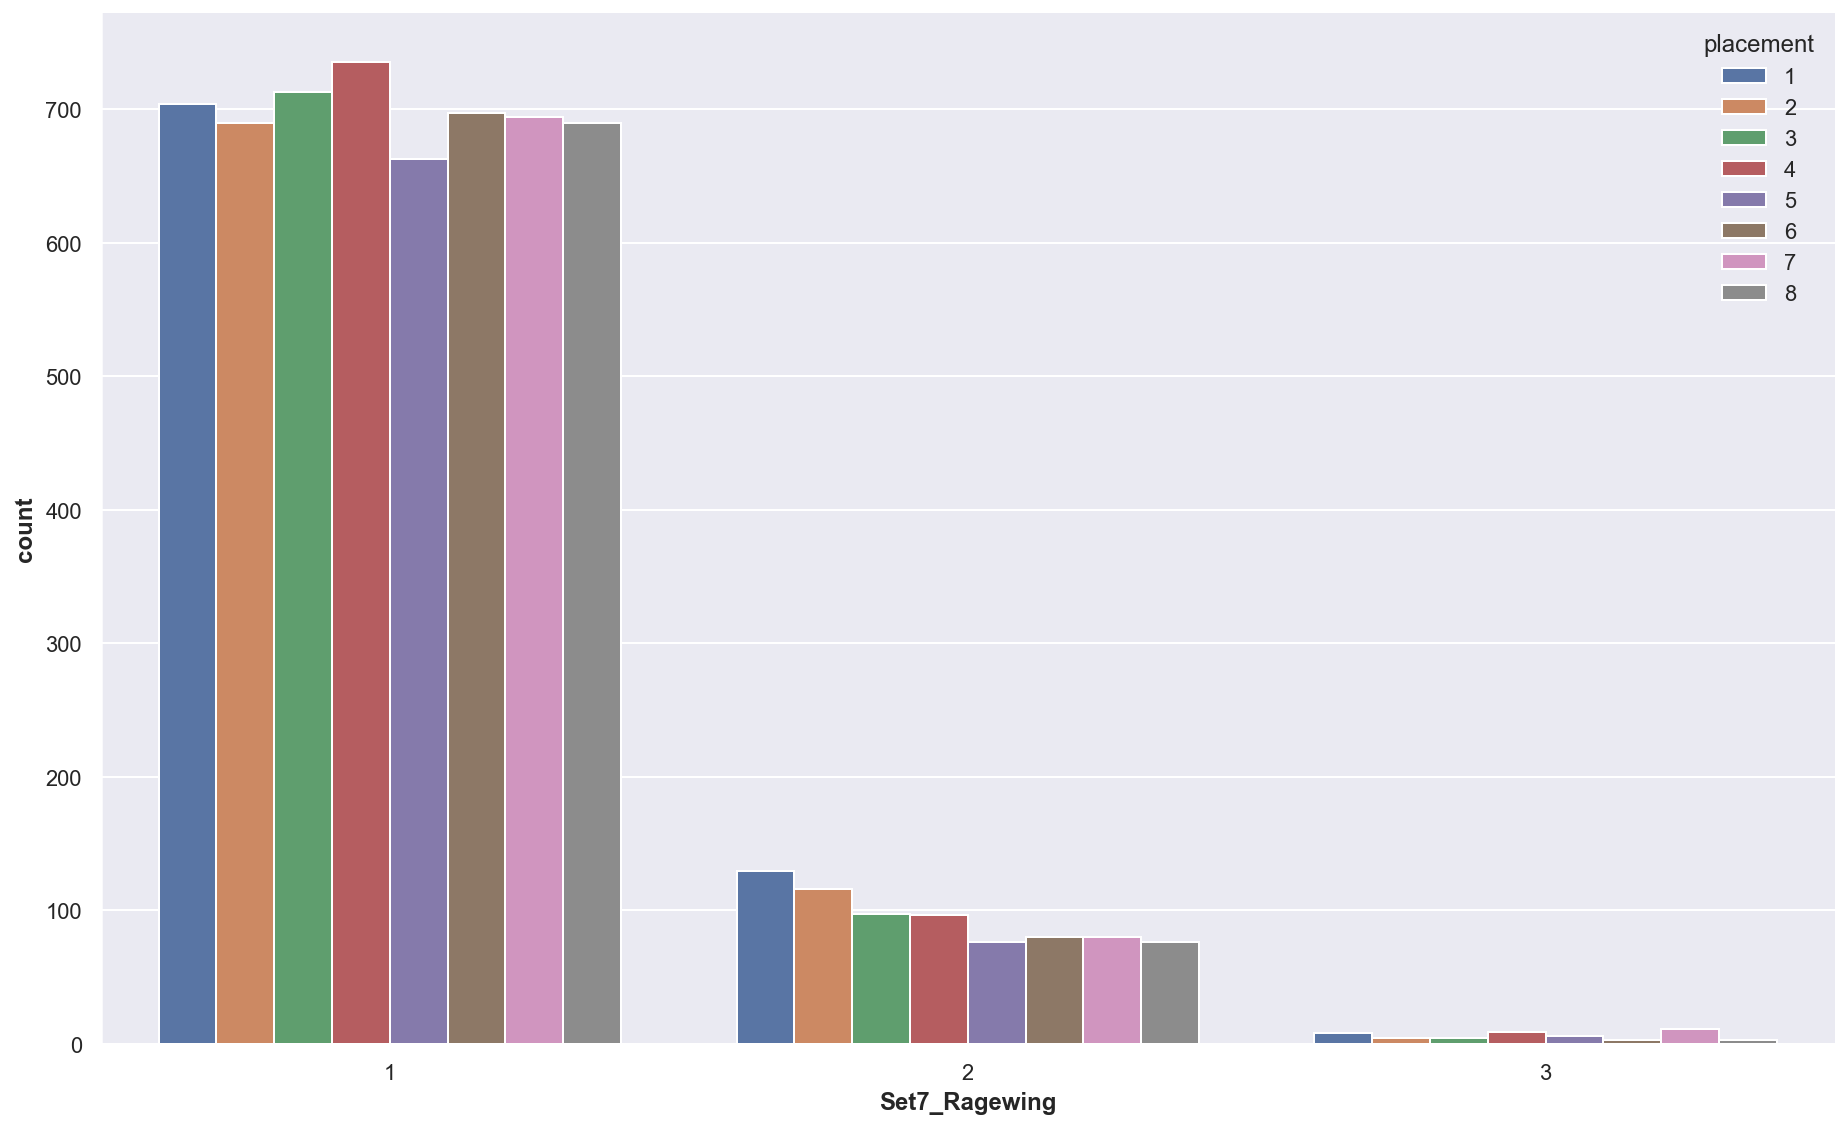

In [51]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Ragewing']>0], x='Set7_Ragewing', hue=TARGETNAME)
sns.despine()

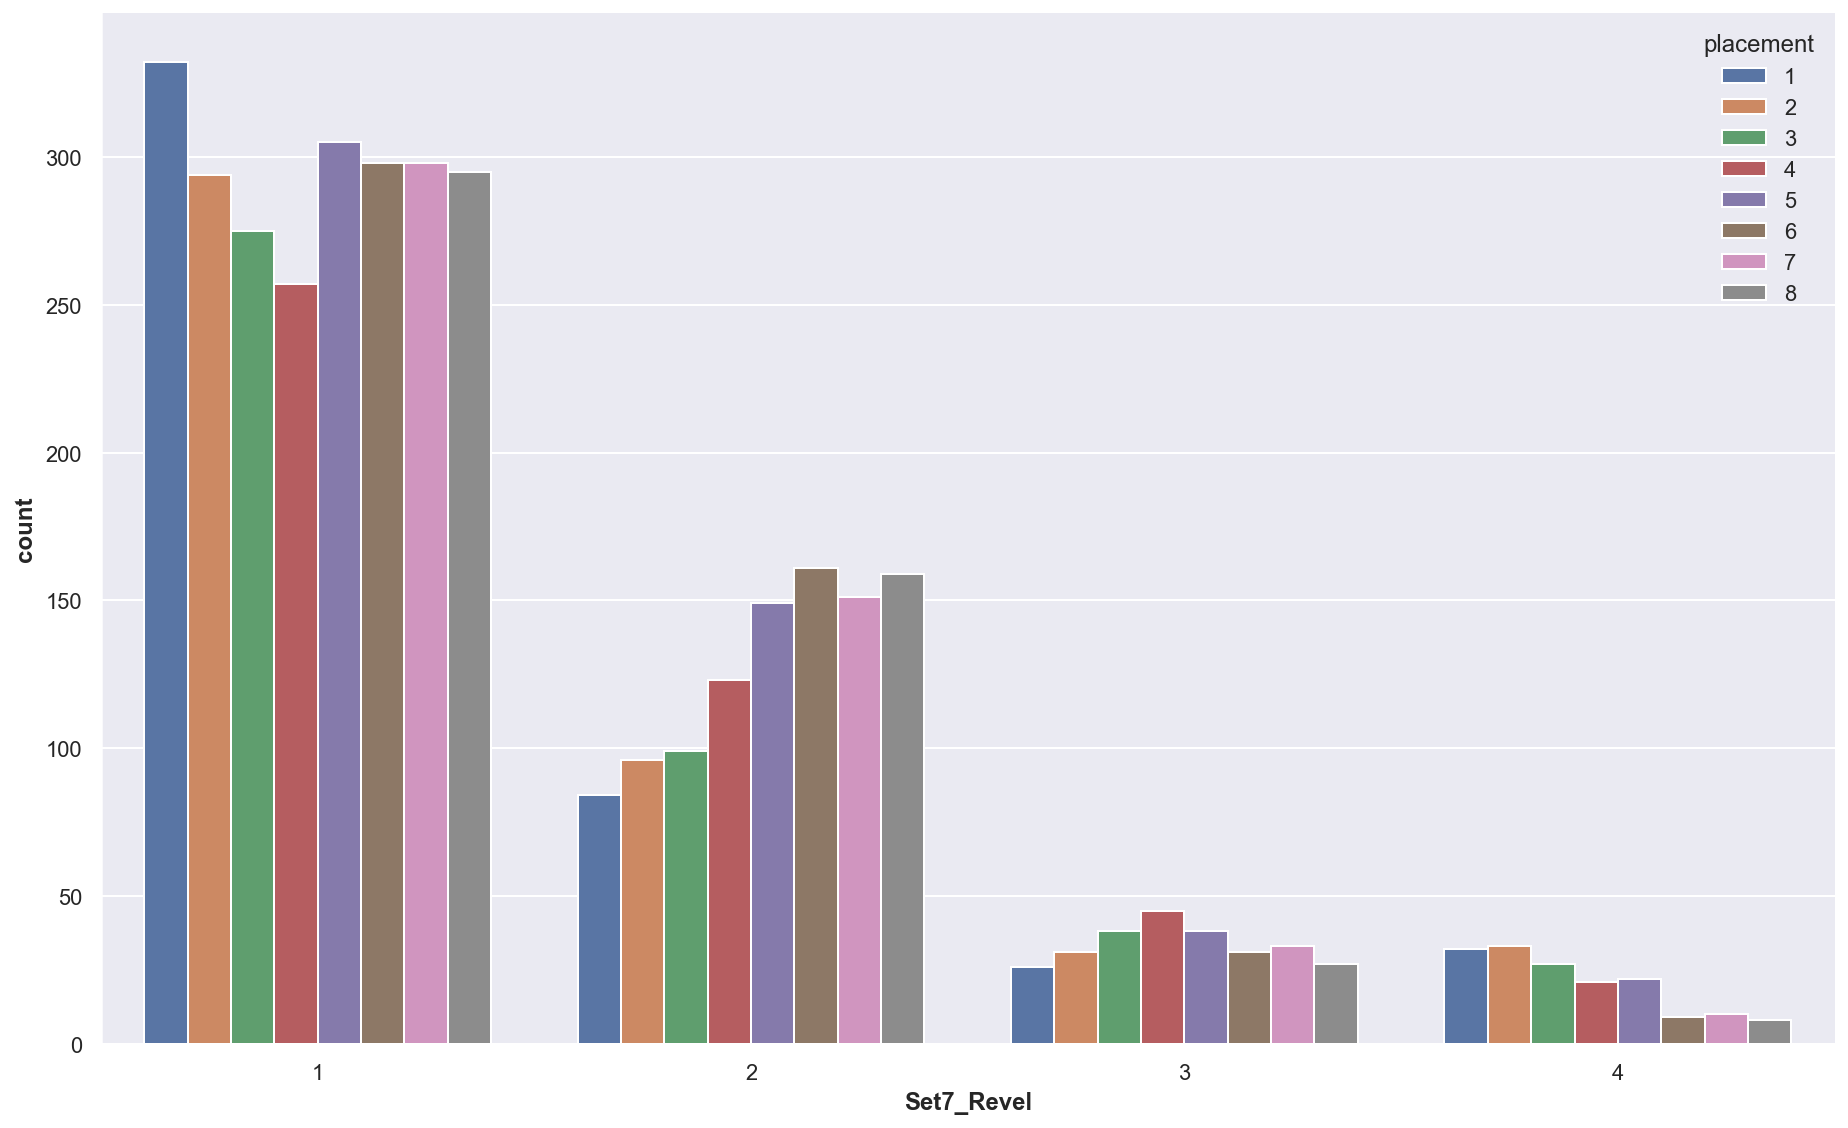

In [52]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Revel']>0], x='Set7_Revel', hue=TARGETNAME)
sns.despine()

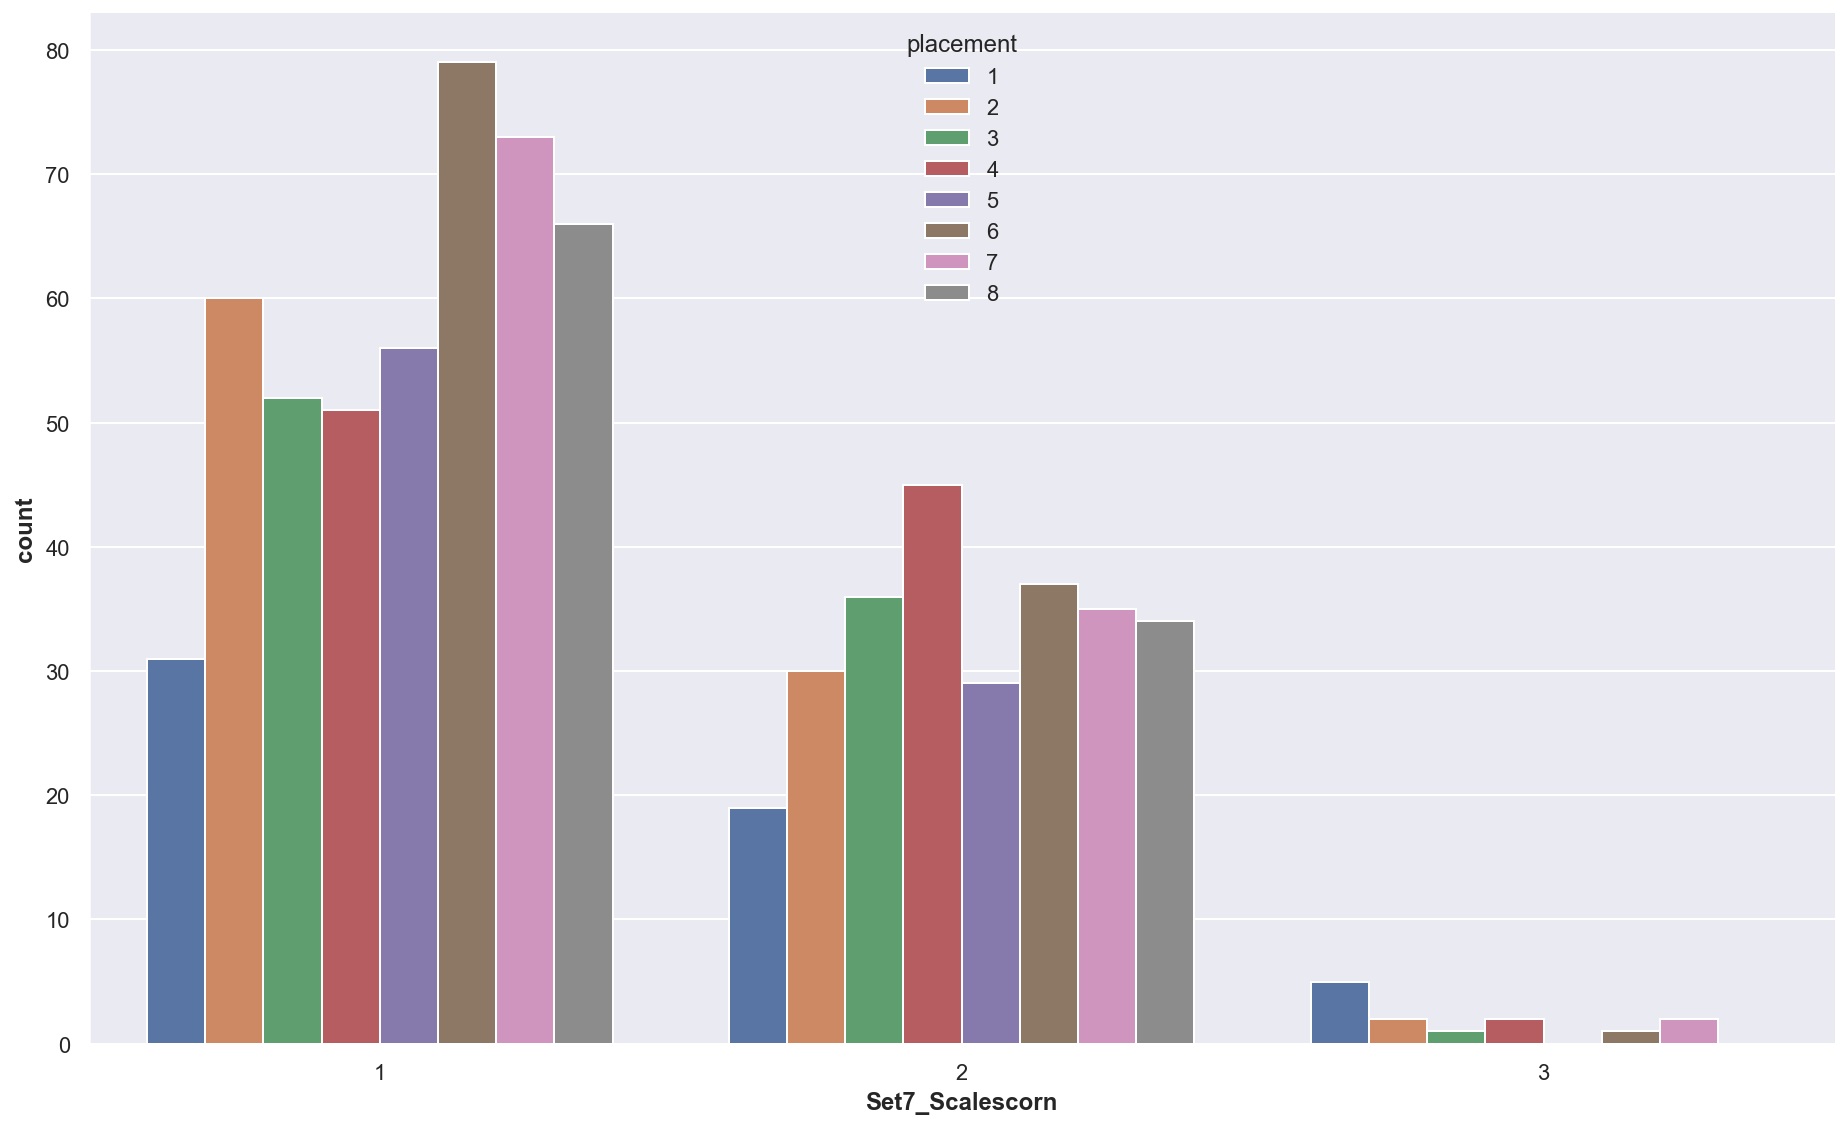

In [53]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Scalescorn']>0], x='Set7_Scalescorn', hue=TARGETNAME)
sns.despine()

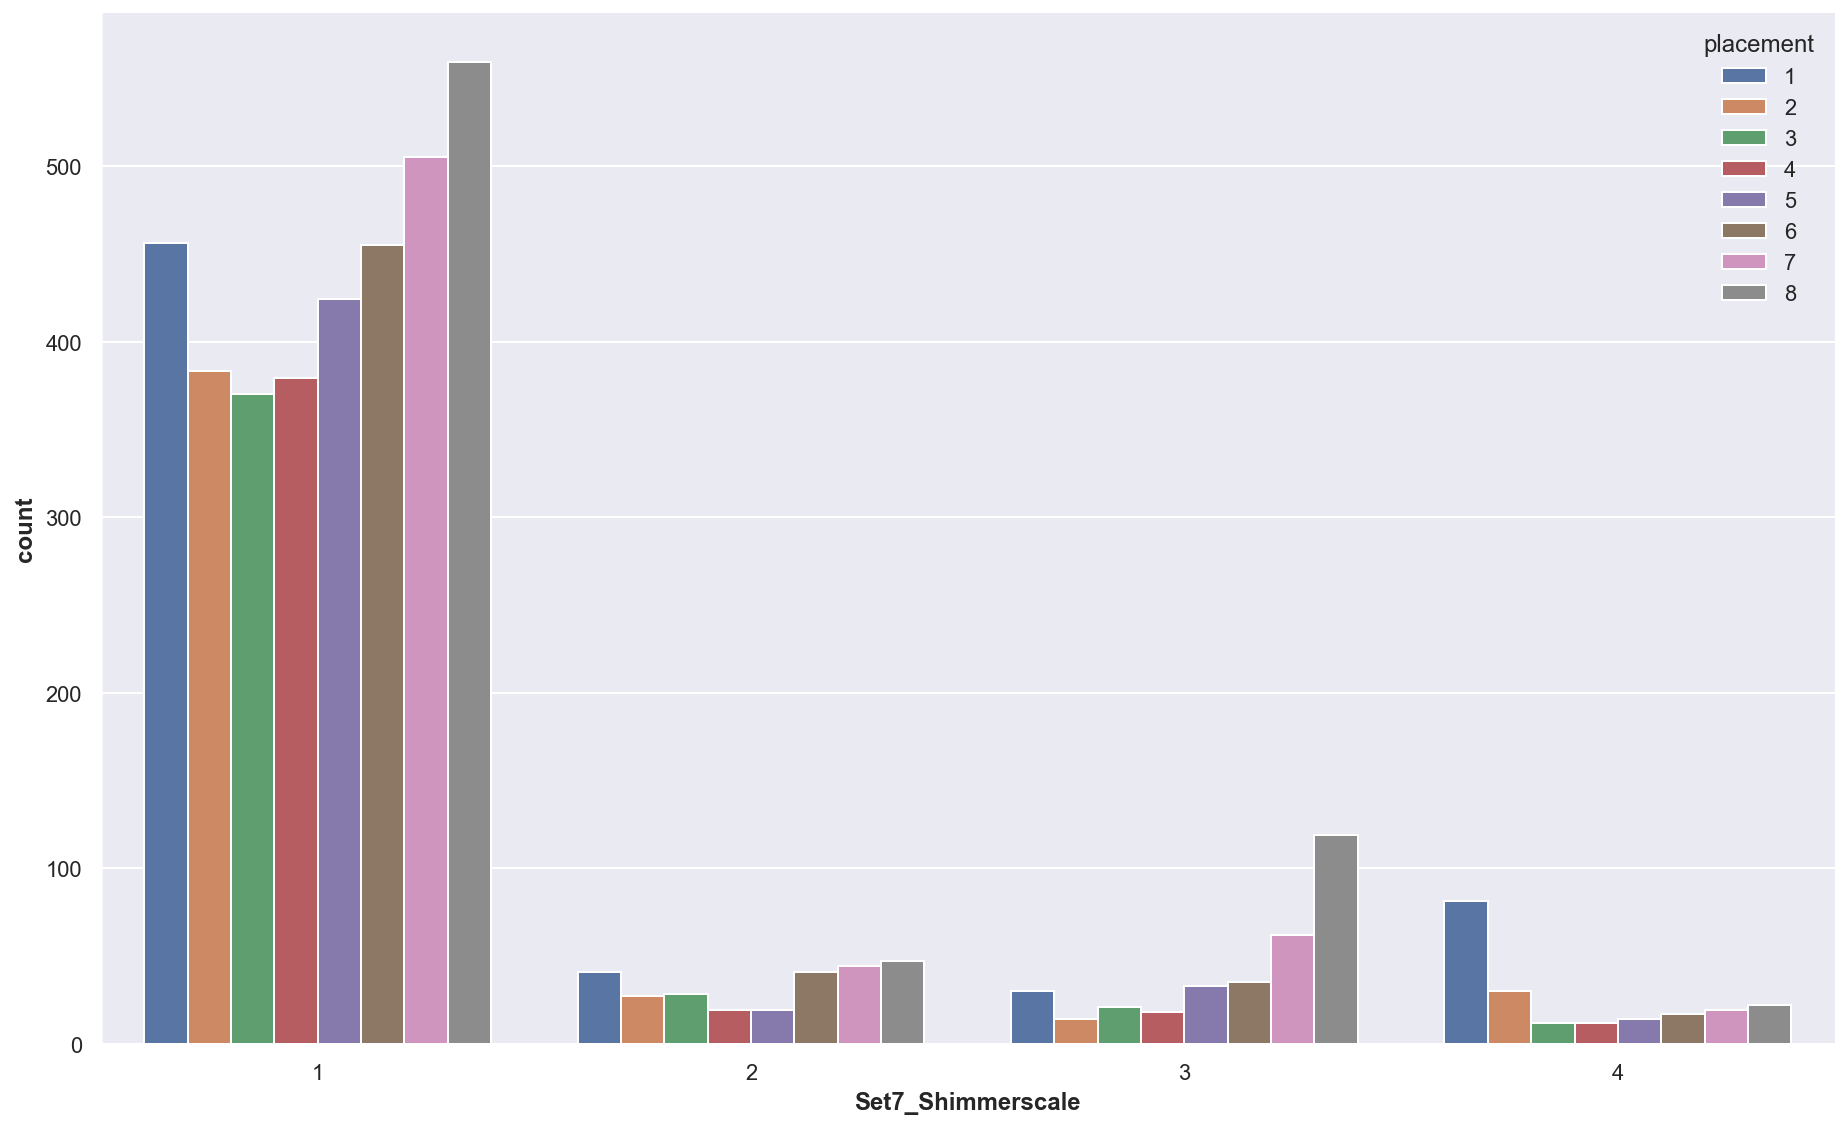

In [54]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shimmerscale']>0], x='Set7_Shimmerscale', hue=TARGETNAME)
sns.despine()

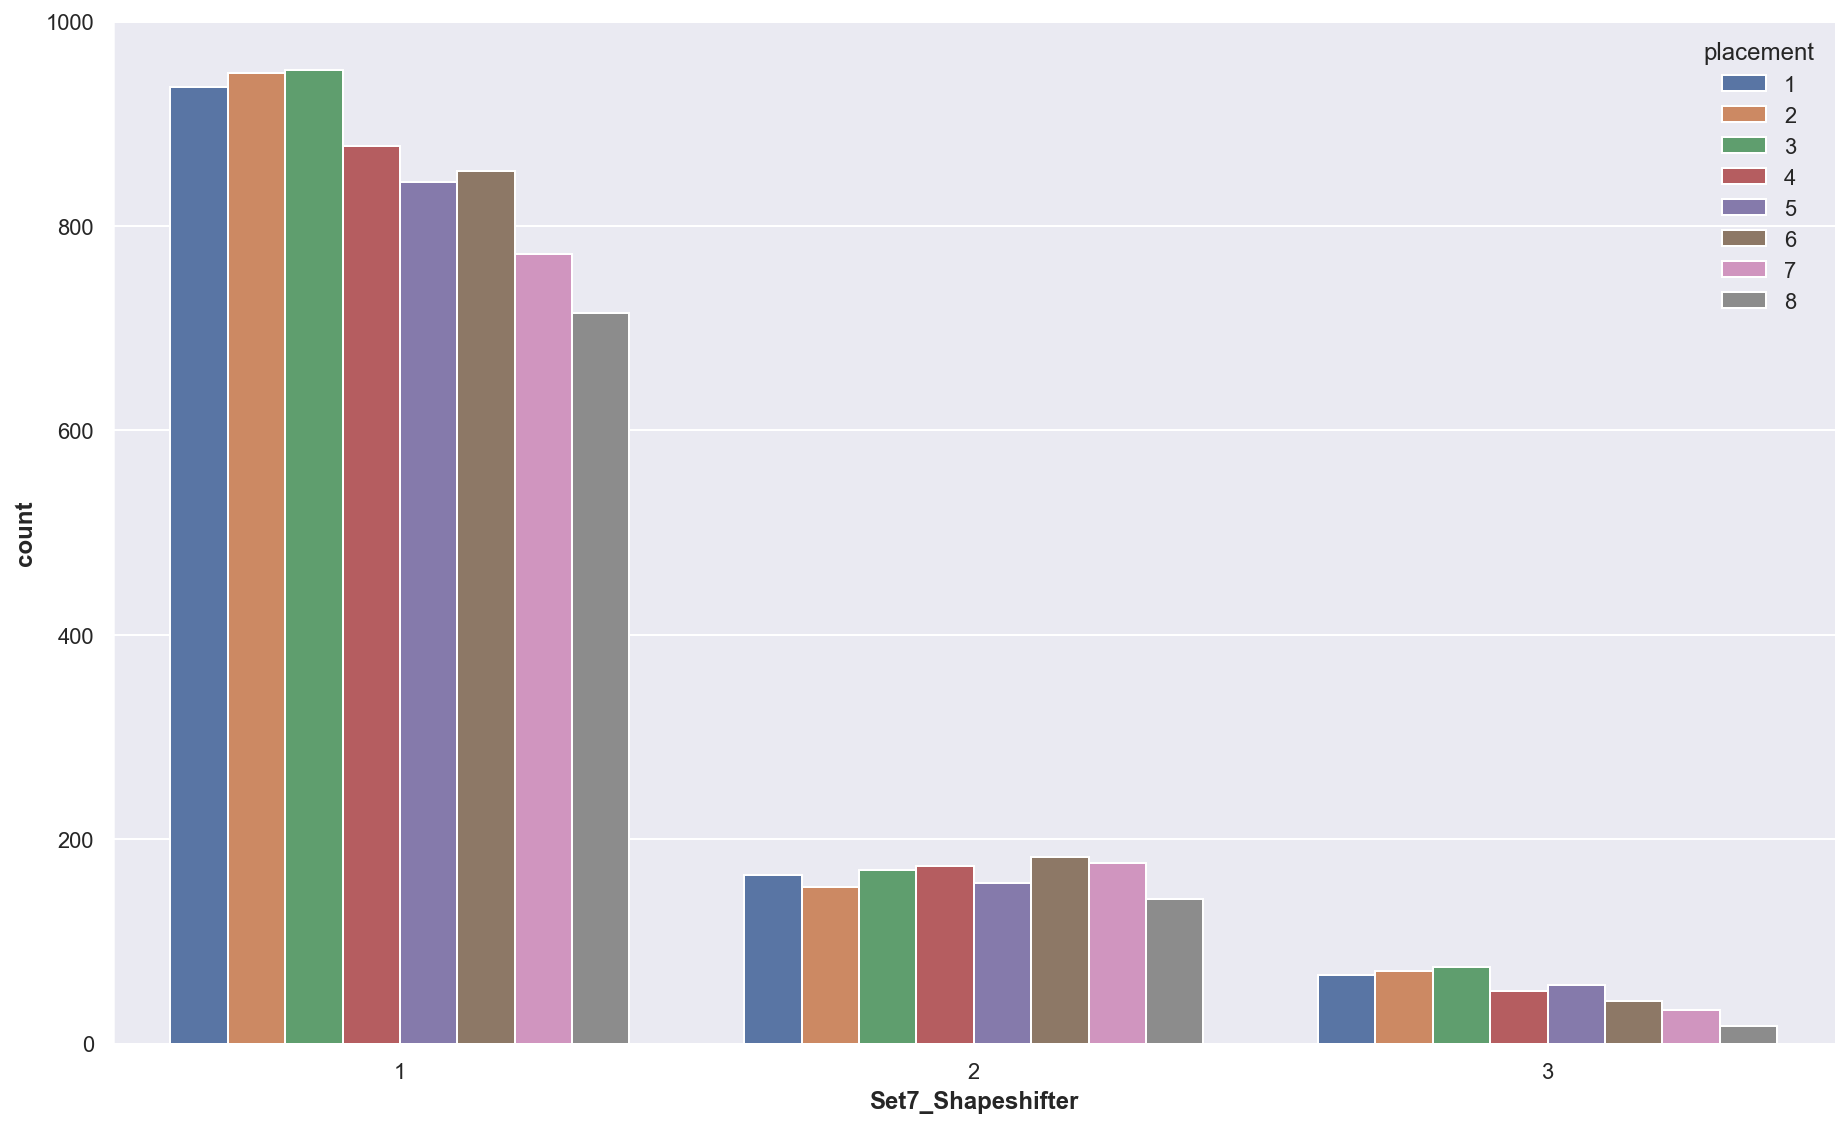

In [55]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shapeshifter']>0], x='Set7_Shapeshifter', hue=TARGETNAME)
sns.despine()

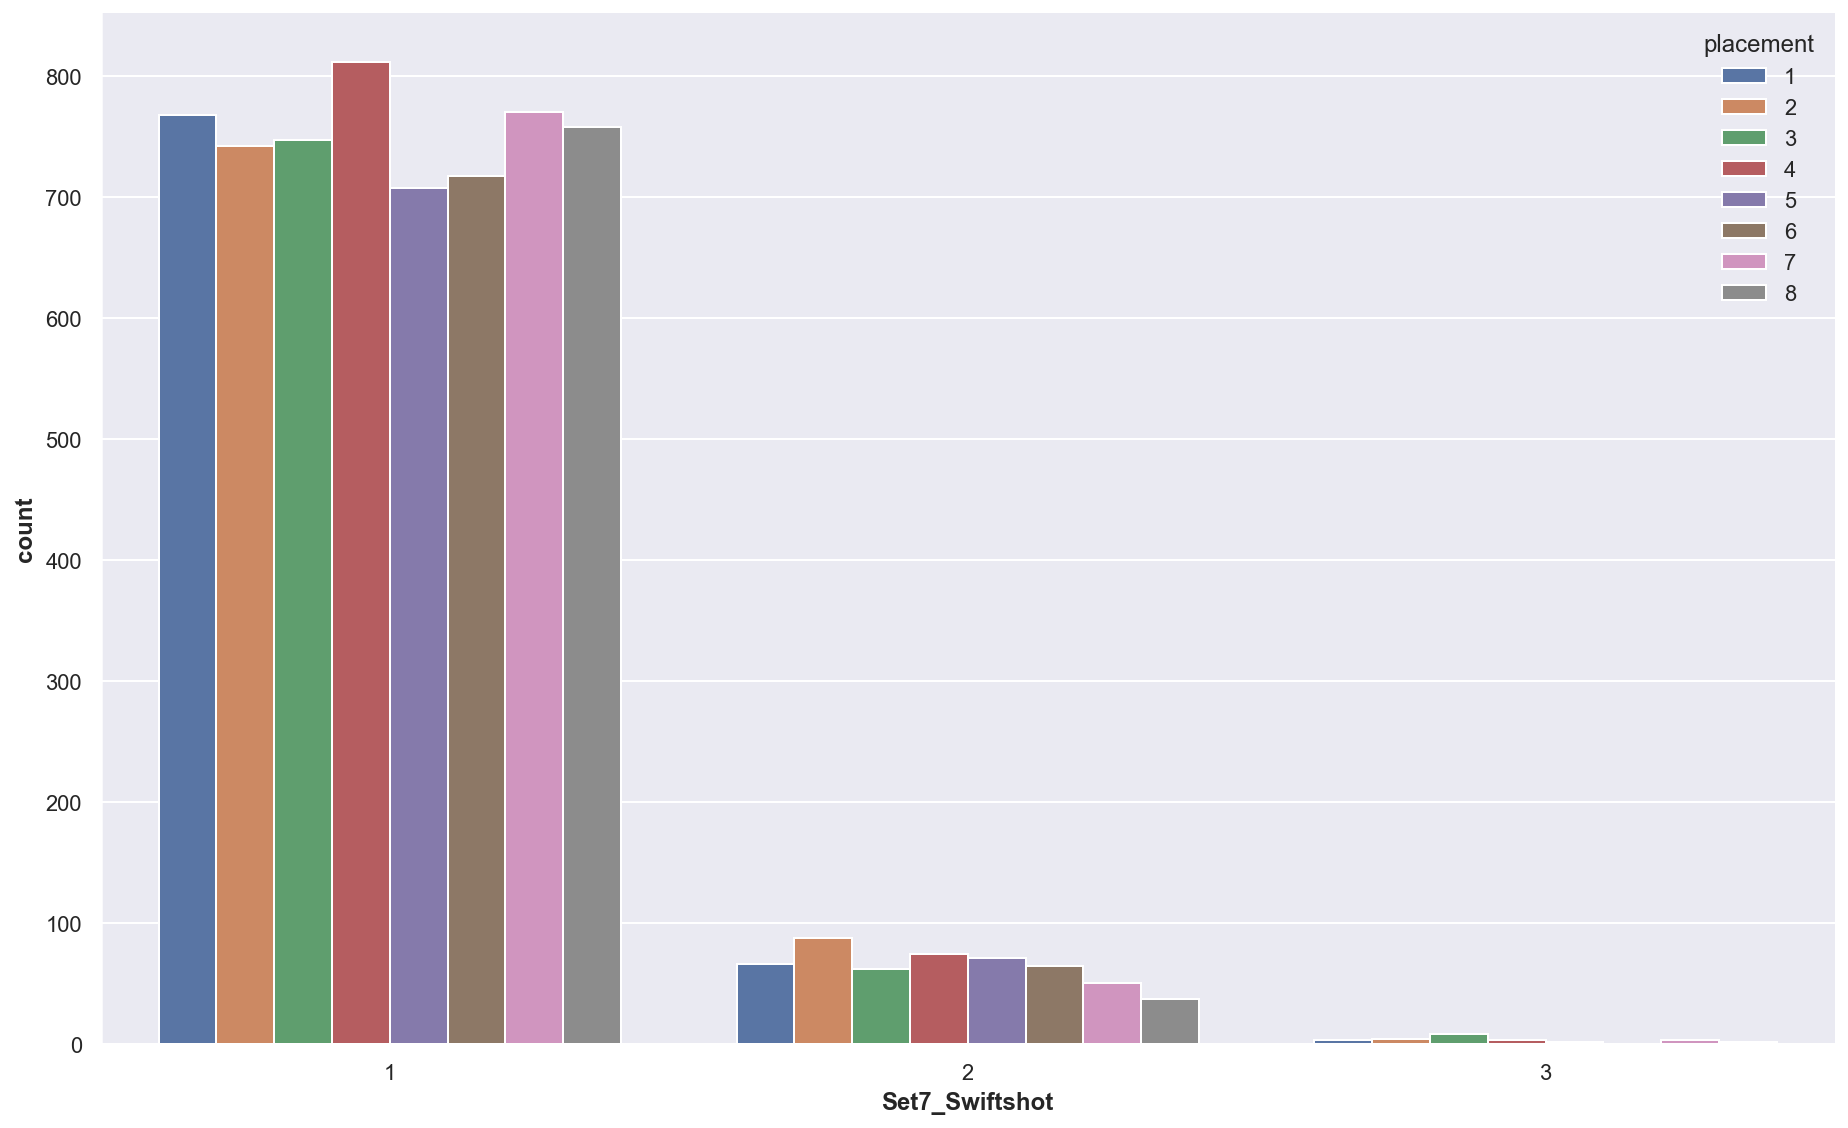

In [56]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Swiftshot']>0], x='Set7_Swiftshot', hue=TARGETNAME)
sns.despine()

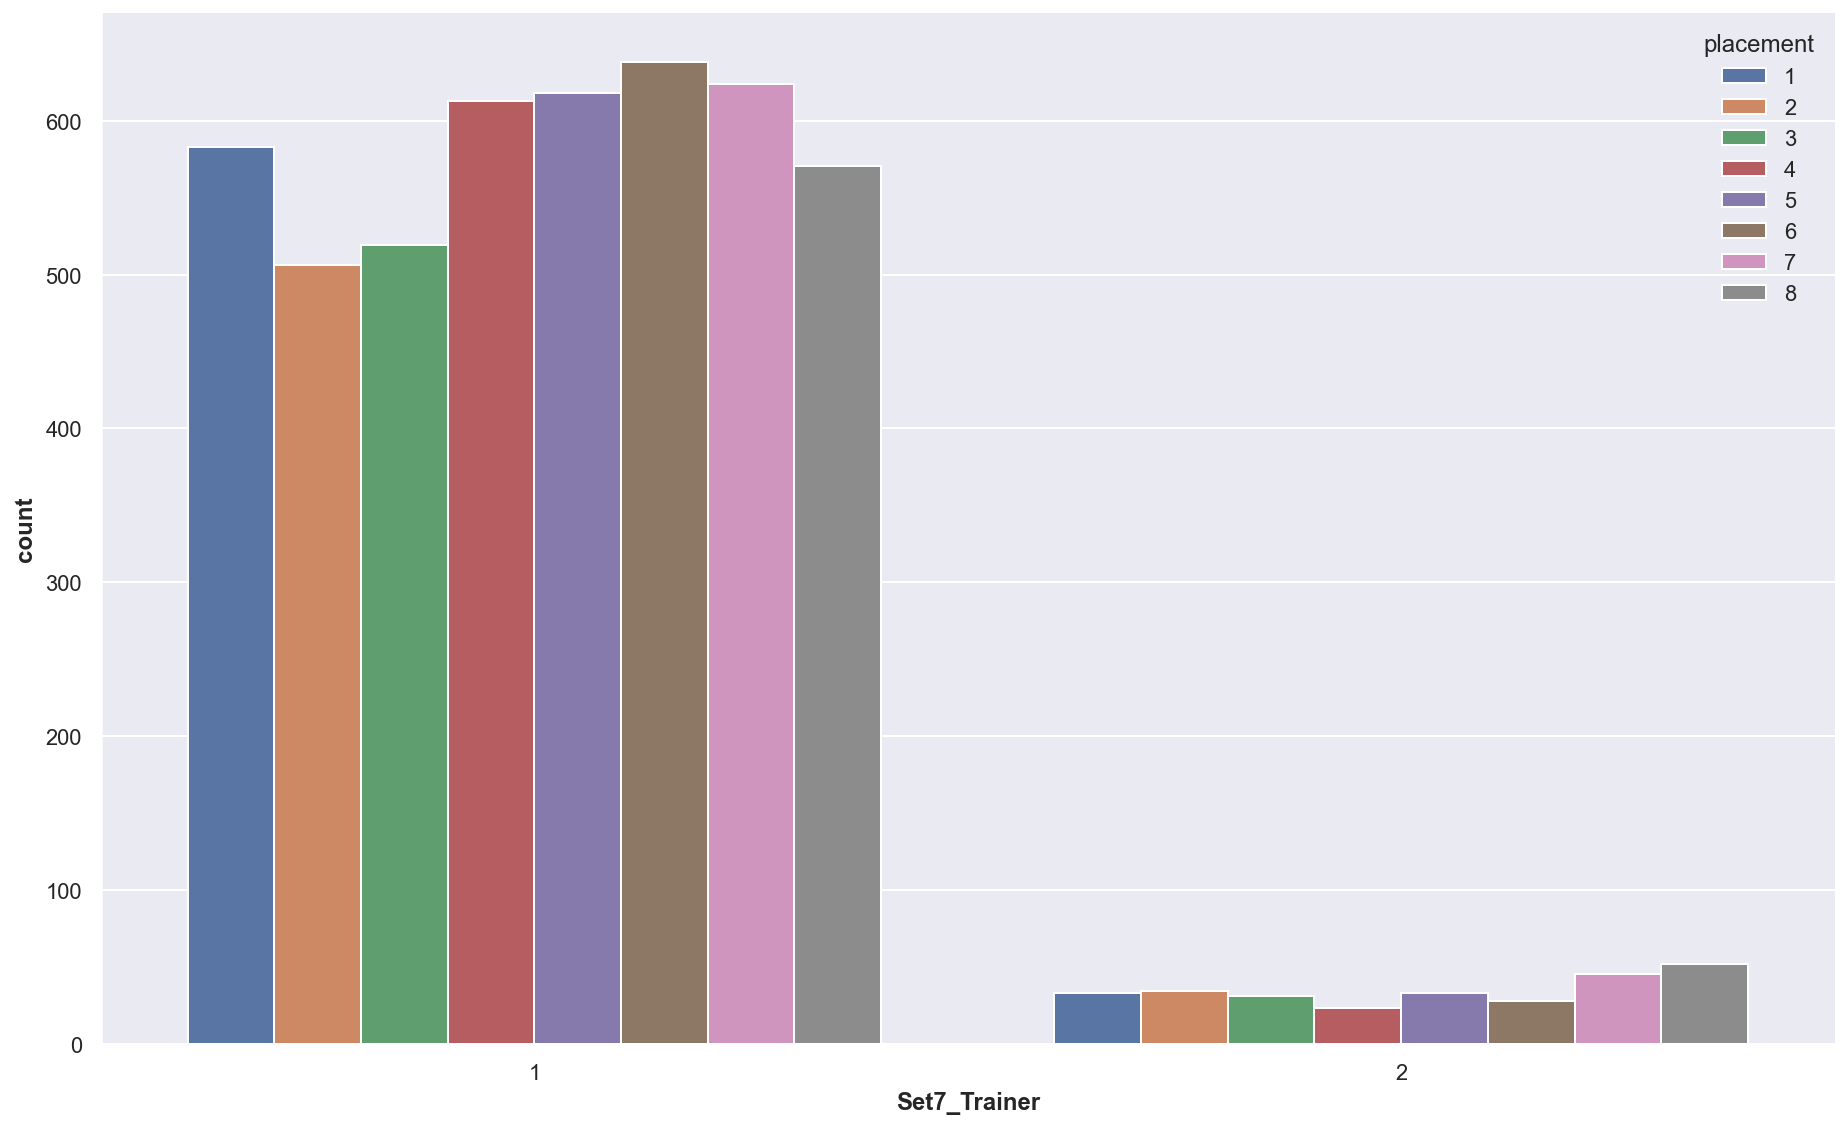

In [57]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Trainer']>0], x='Set7_Trainer', hue=TARGETNAME)
sns.despine()

This trait show the highest correlation in placement.

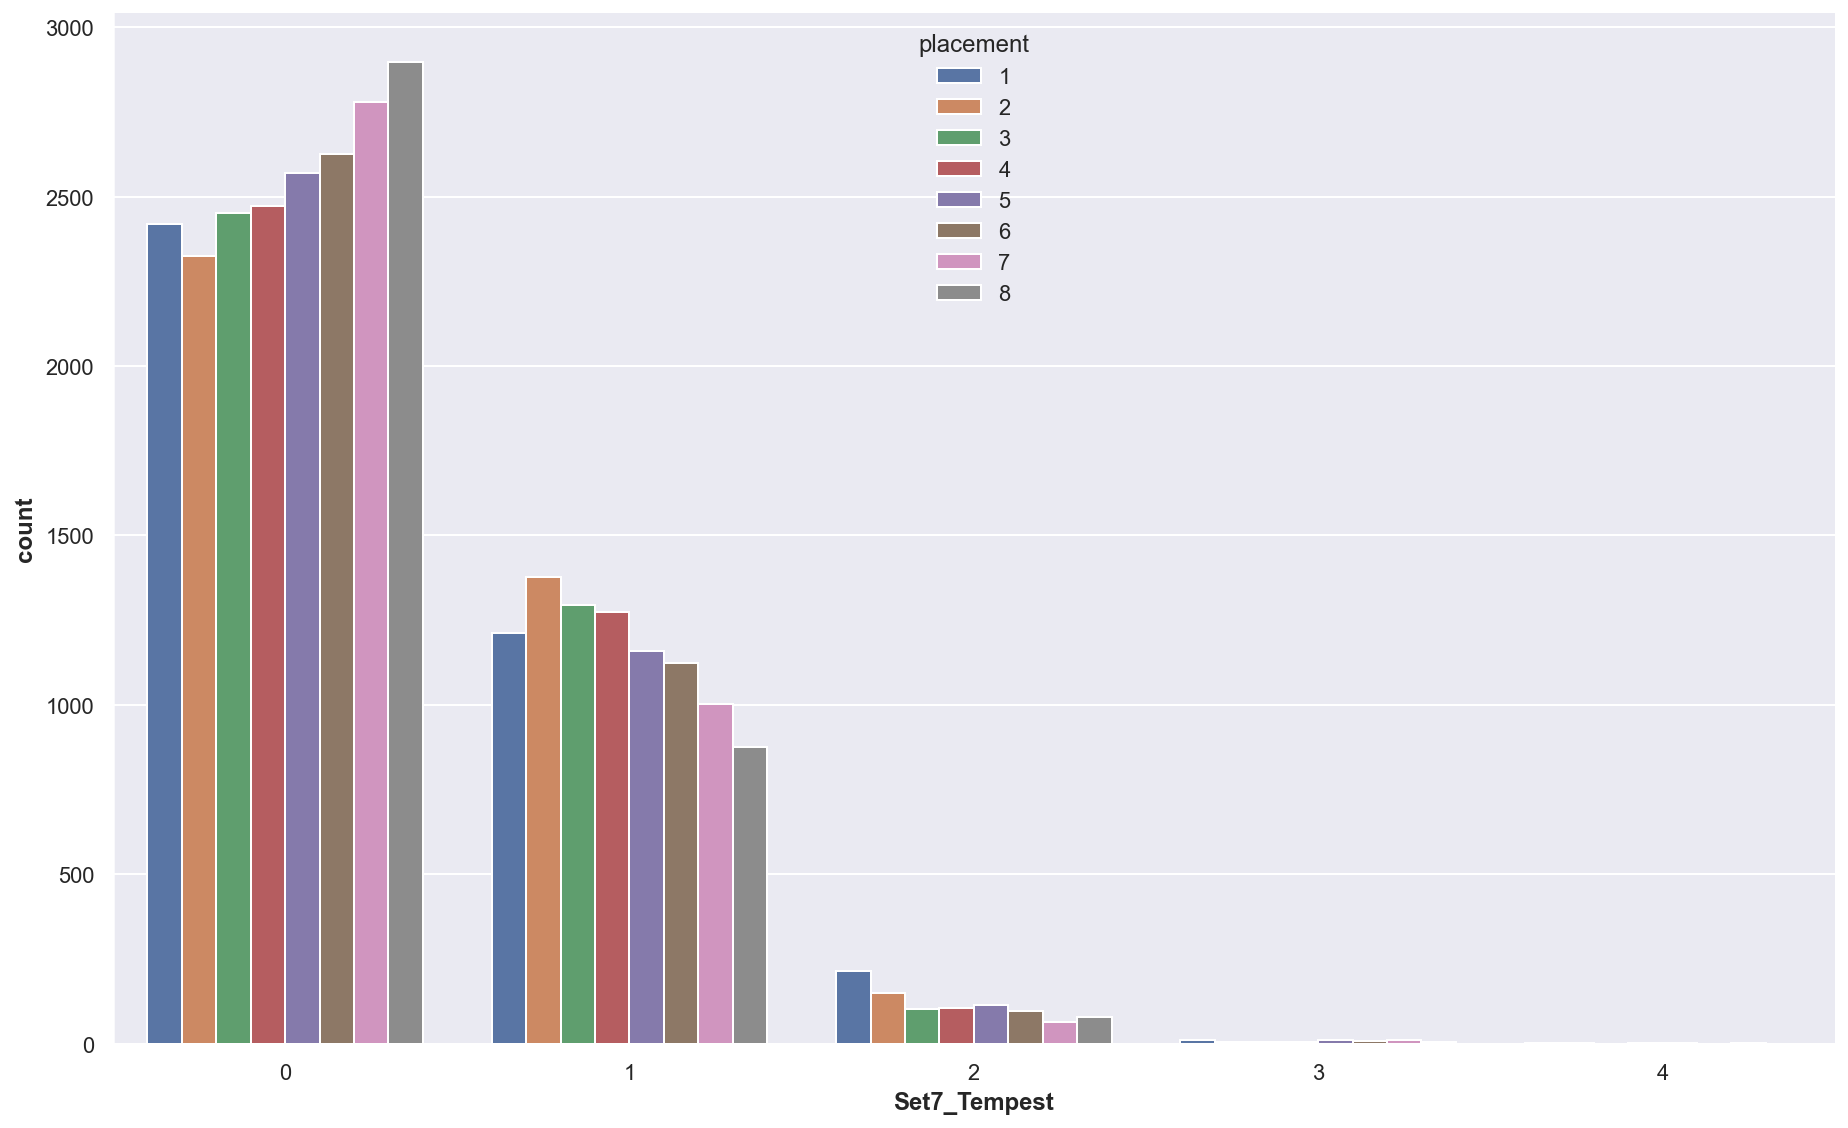

In [58]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Tempest']>=0], x='Set7_Tempest', hue=TARGETNAME)
sns.despine()

Stronger correlation at trait lvl 1.

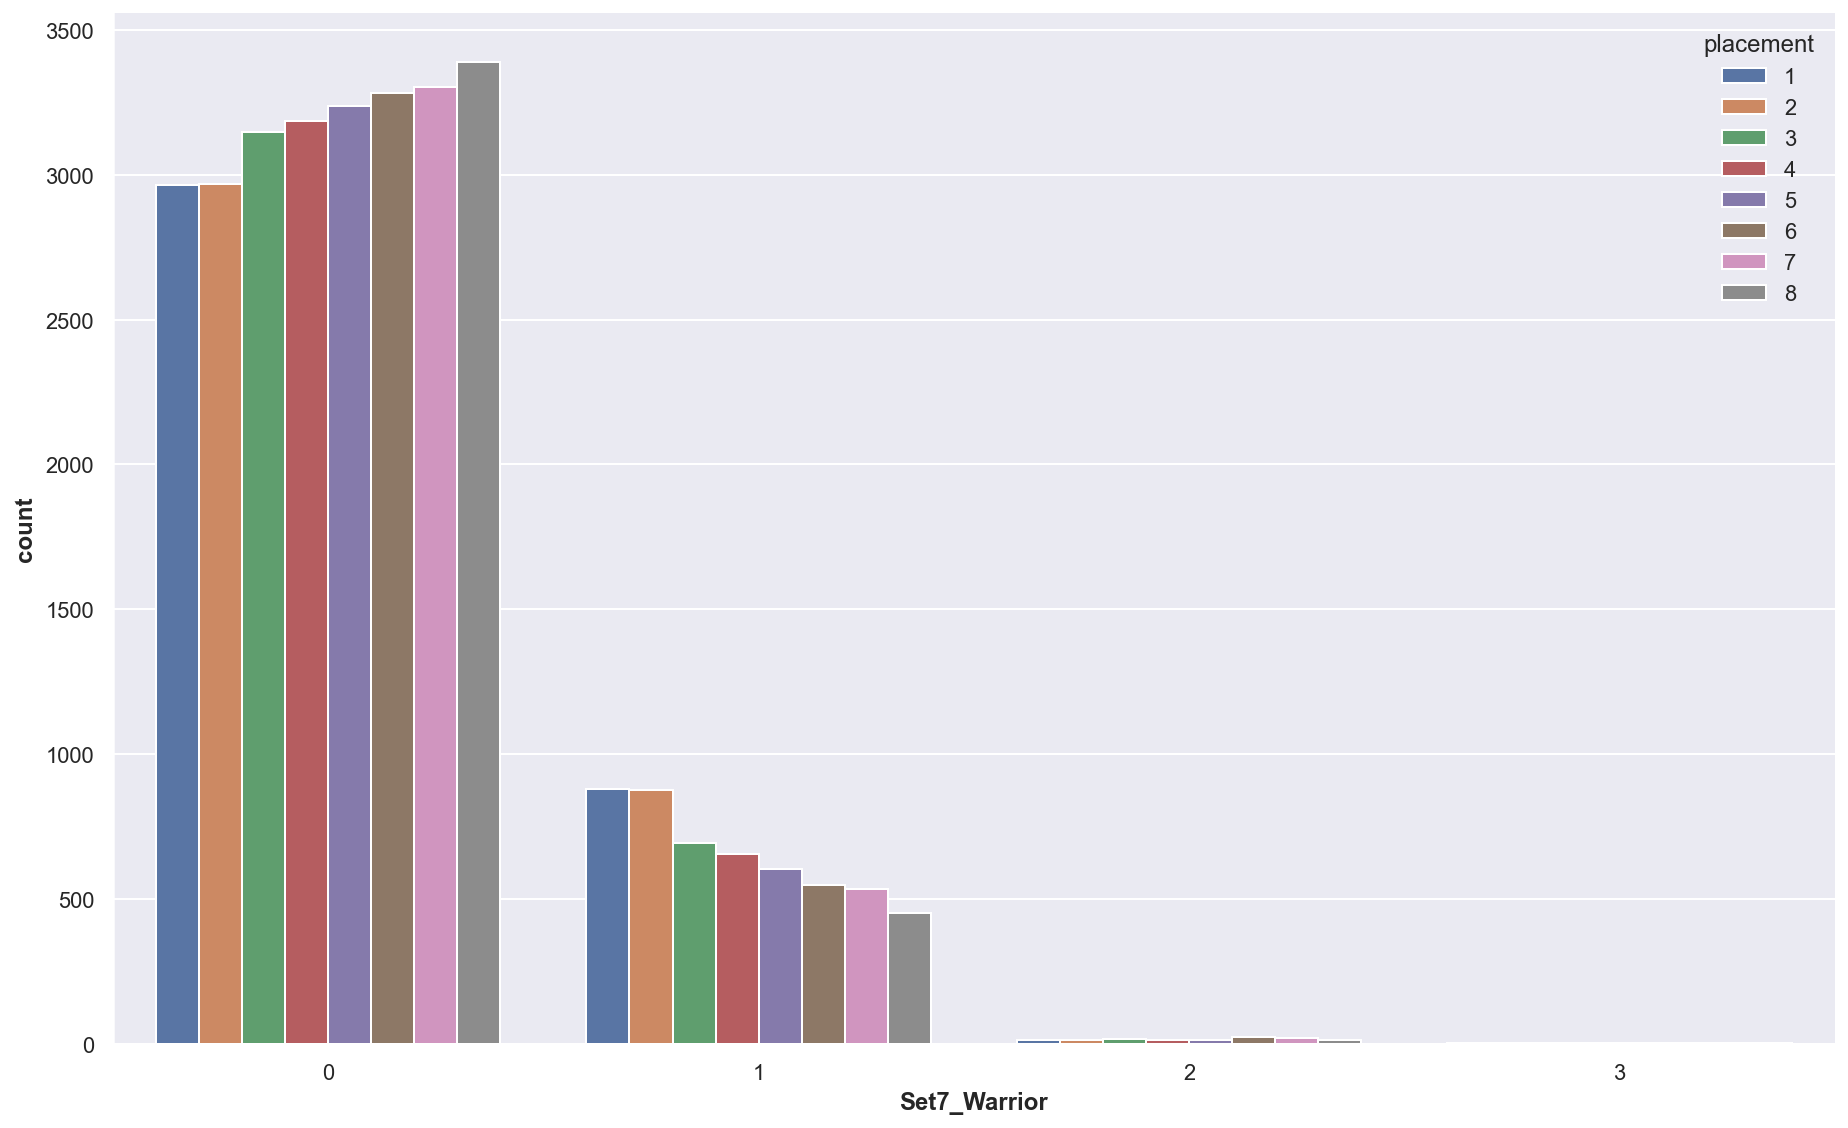

In [59]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Warrior']>=0], x='Set7_Warrior', hue=TARGETNAME)
sns.despine()

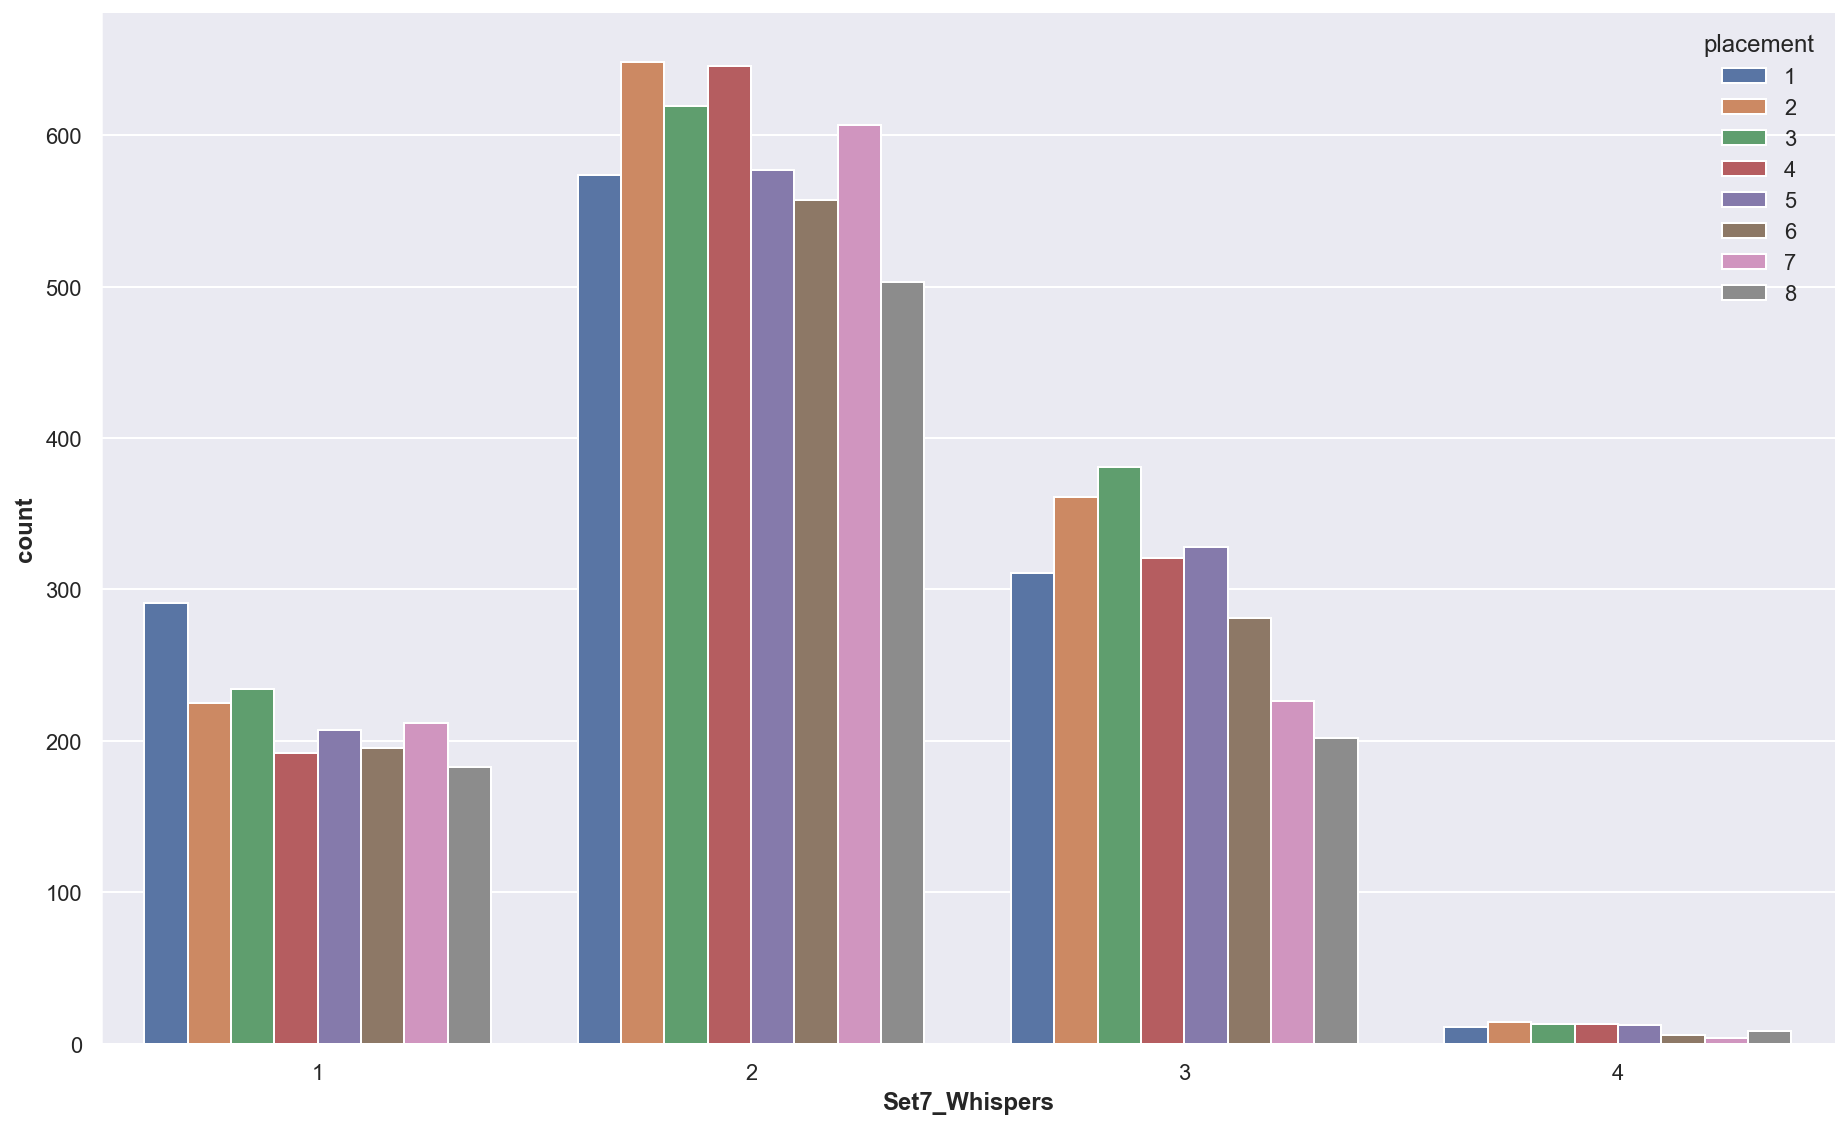

In [60]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Whispers']>0], x='Set7_Whispers', hue=TARGETNAME)
sns.despine()

## Units

Best unit in TFT Yasuo. DIESOFYASUO

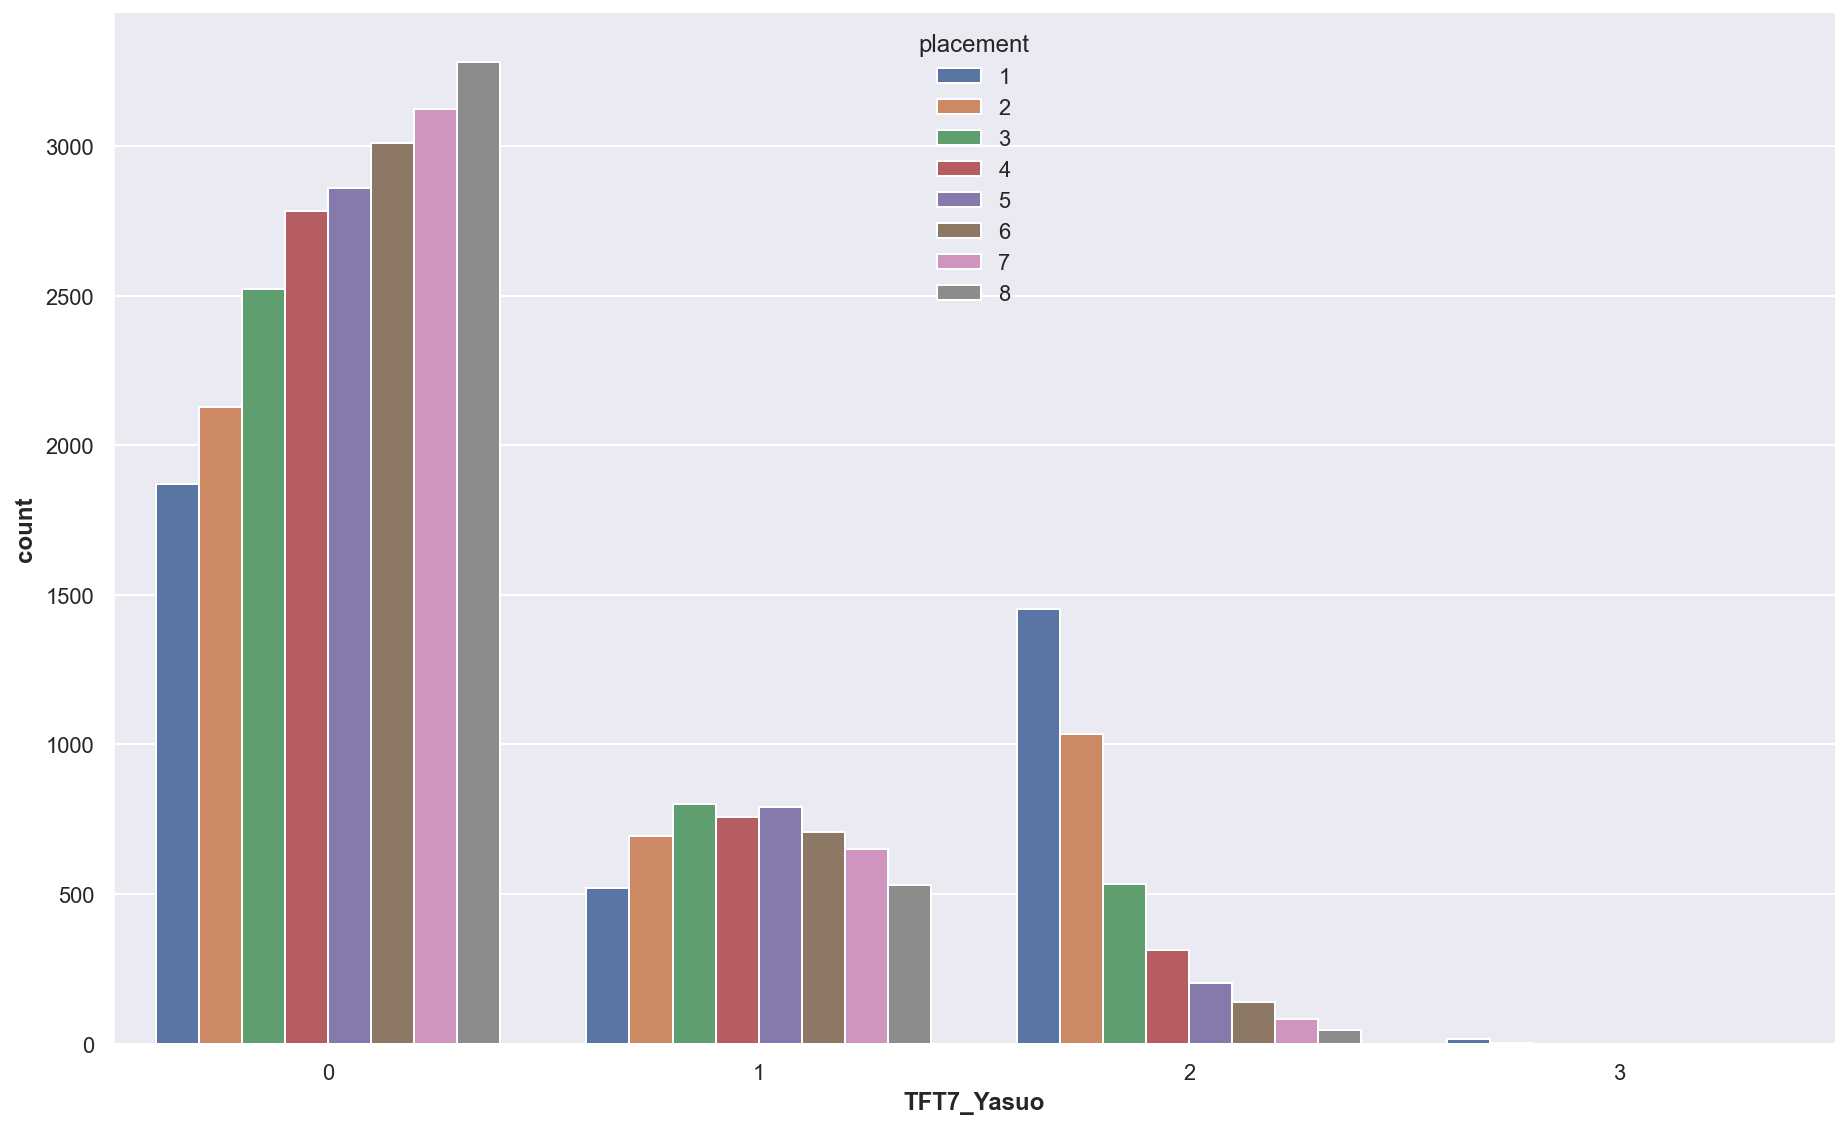

In [61]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Yasuo', hue=TARGETNAME)
sns.despine()

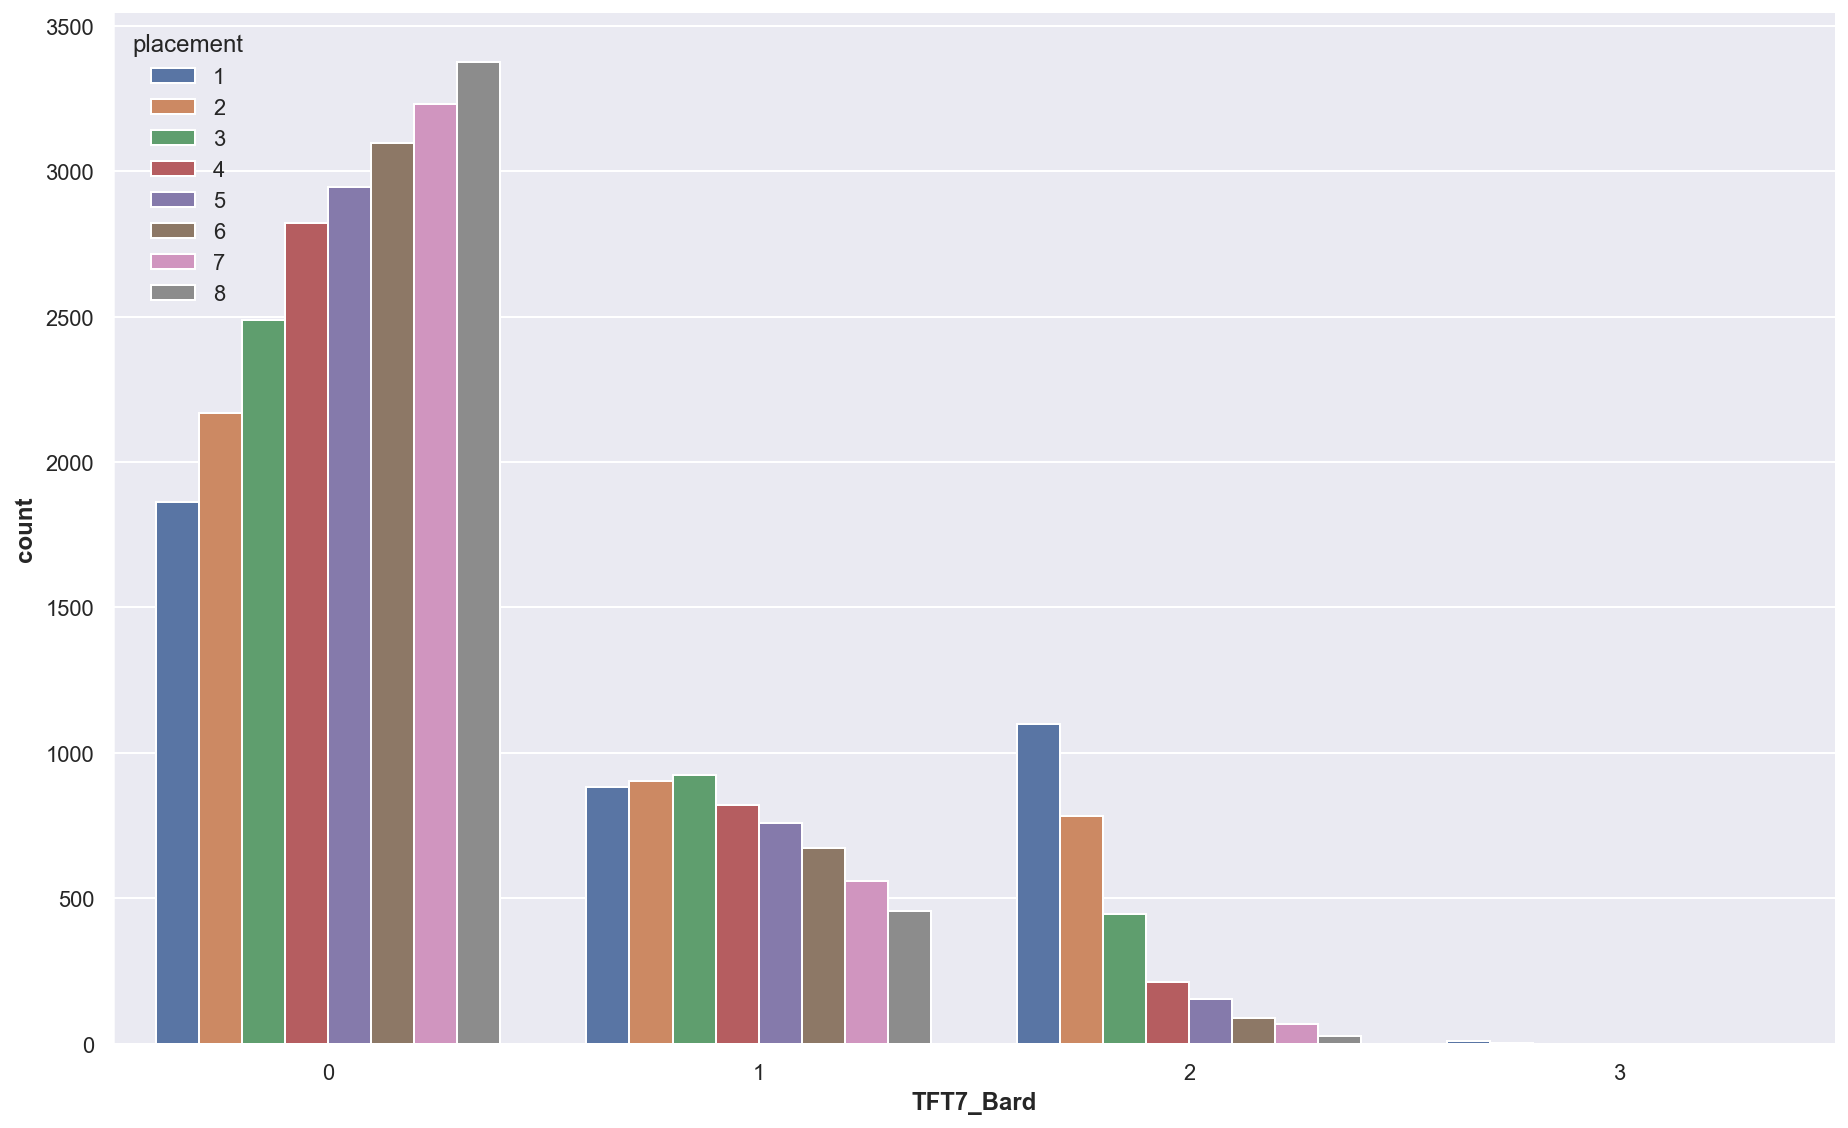

In [62]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Bard', hue=TARGETNAME)
sns.despine()

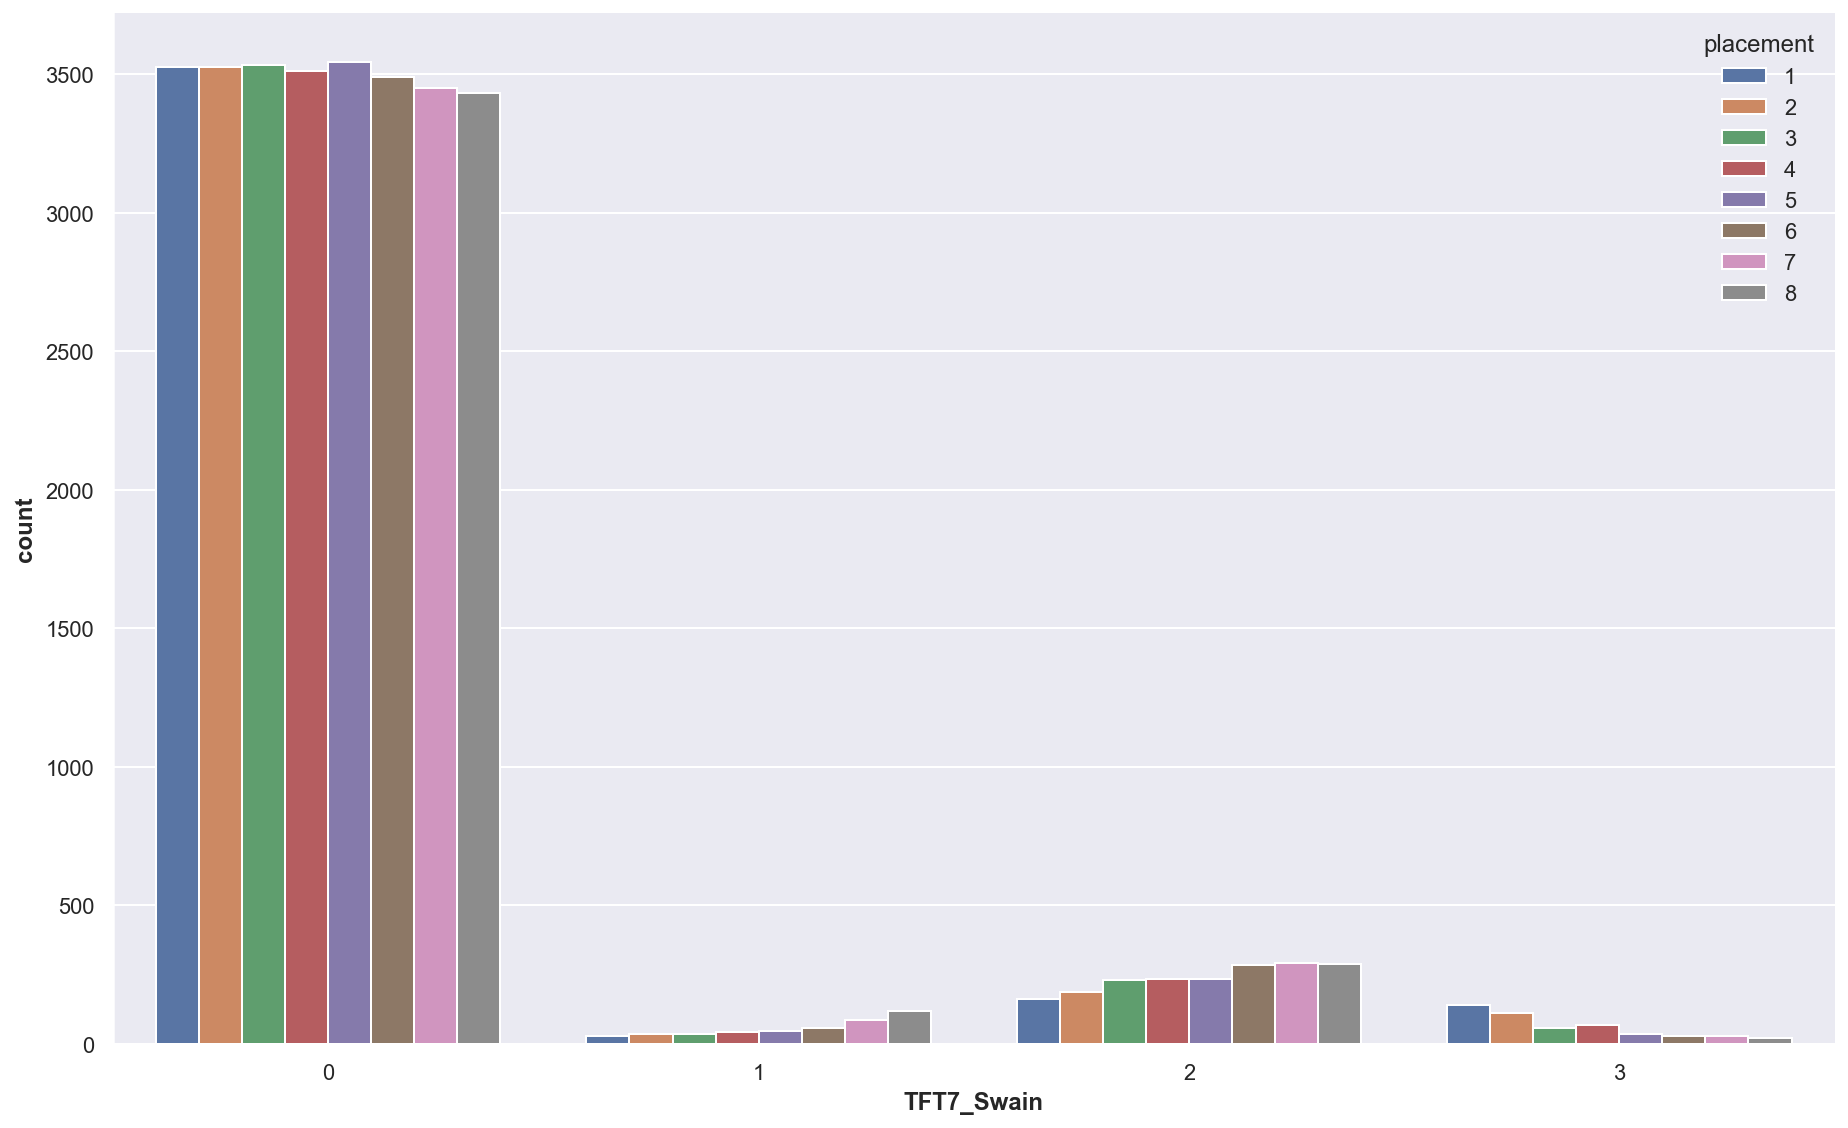

In [63]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Swain', hue=TARGETNAME)
sns.despine()

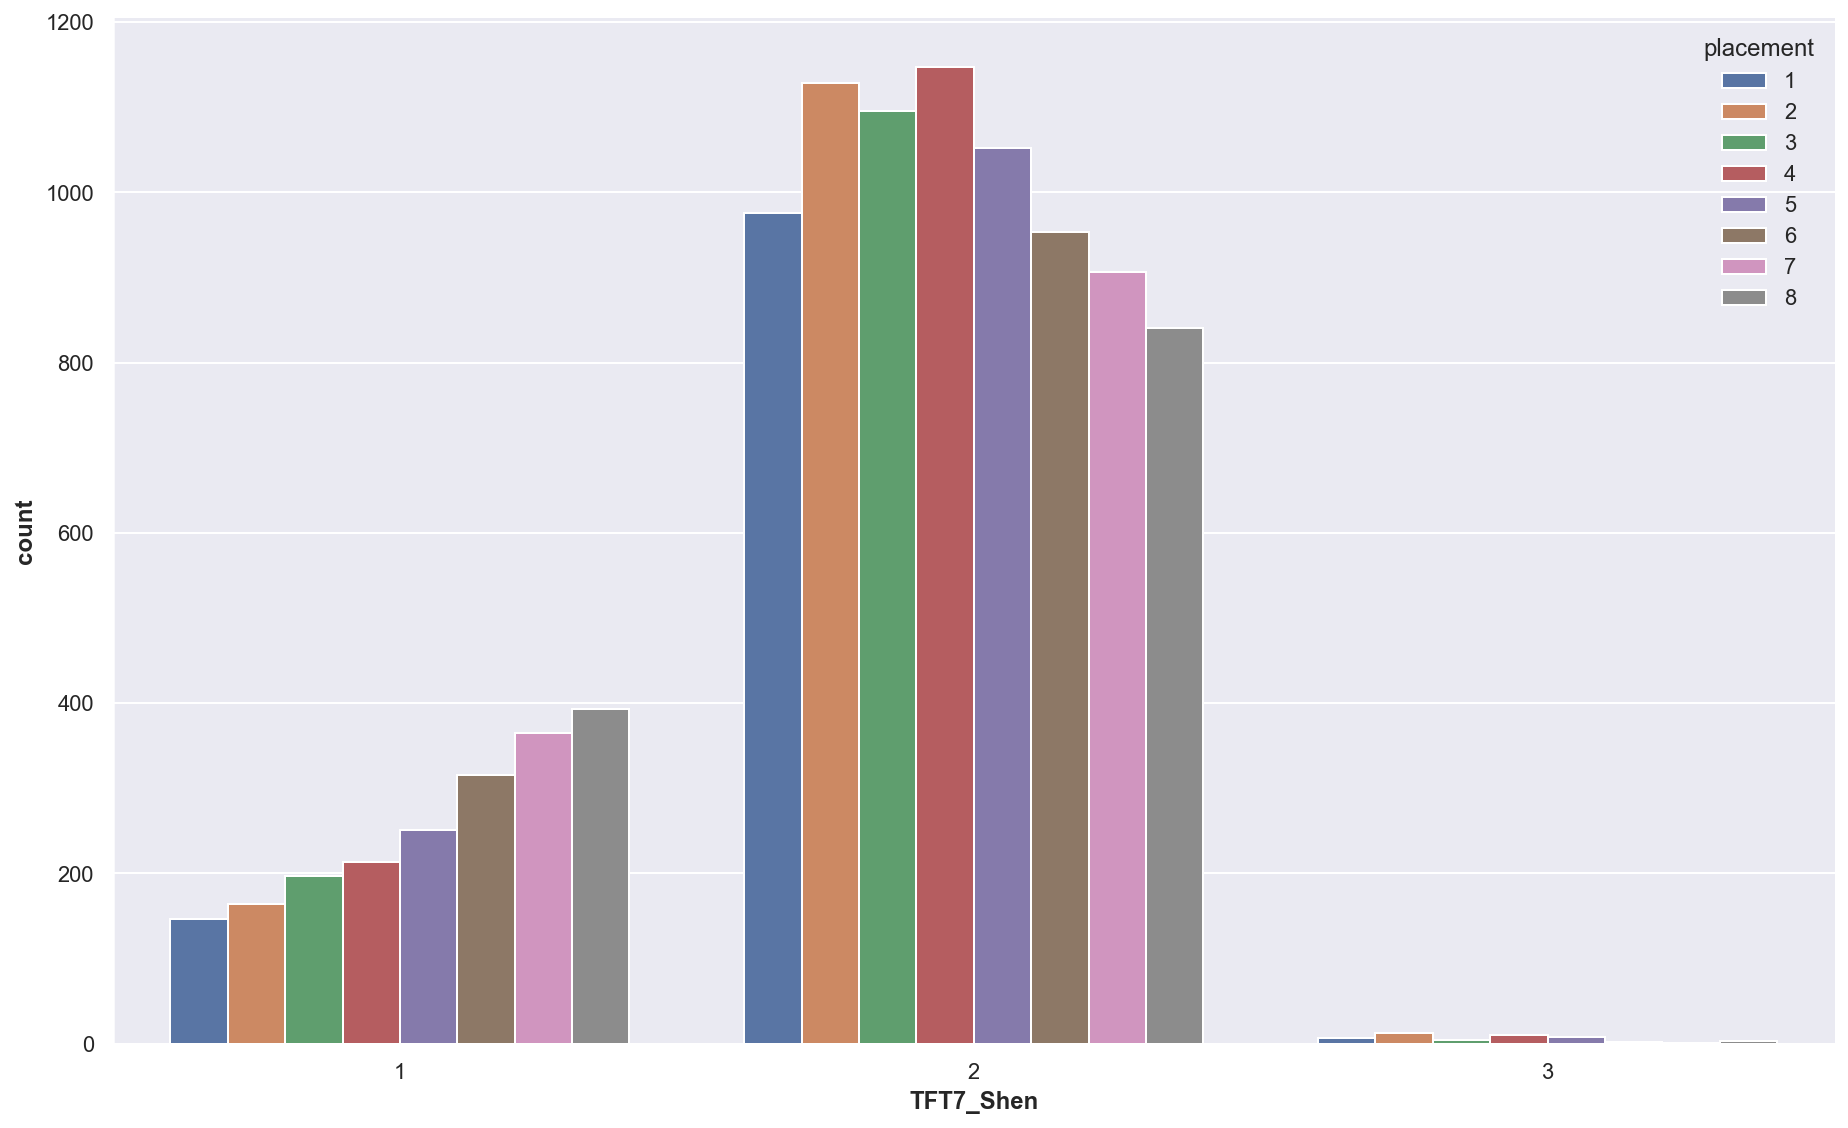

In [64]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shen']>0], x='TFT7_Shen', hue=TARGETNAME)
sns.despine()

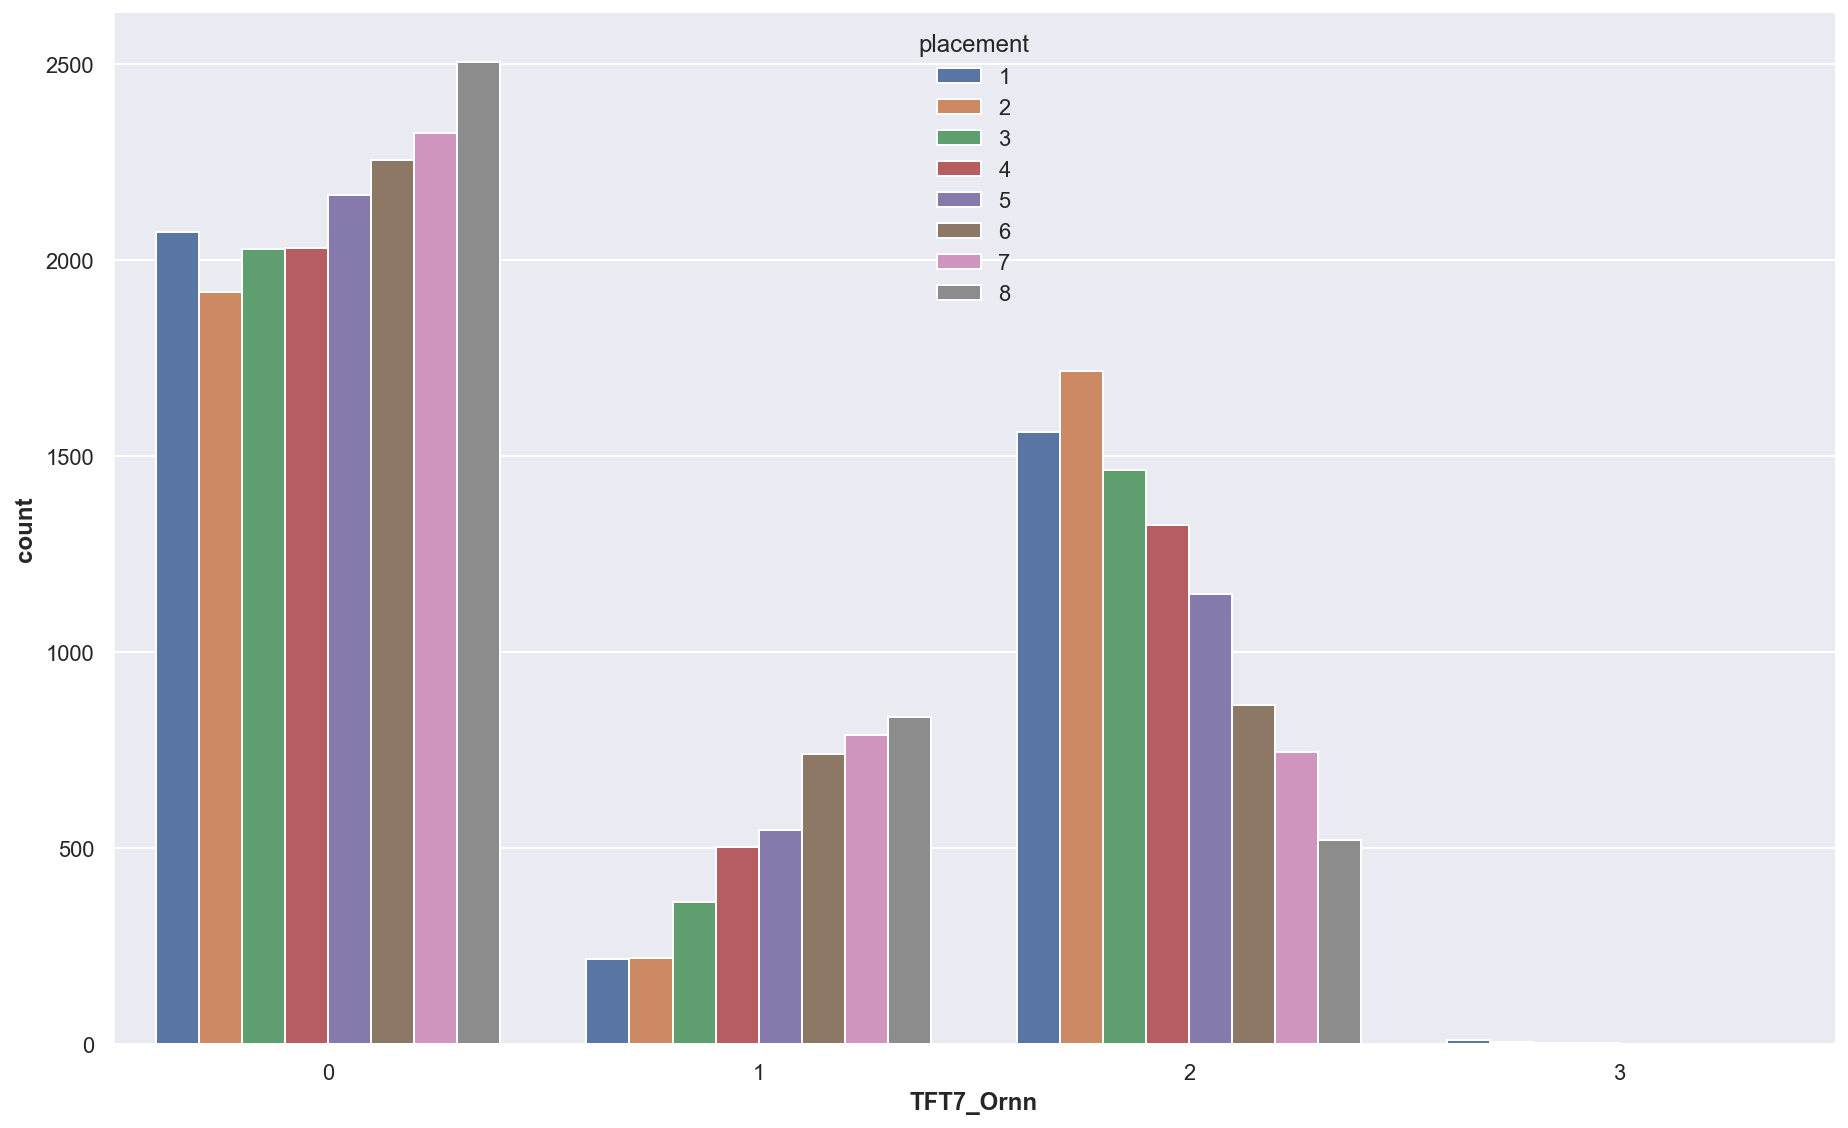

In [65]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ornn']>=0], x='TFT7_Ornn', hue=TARGETNAME)
sns.despine()

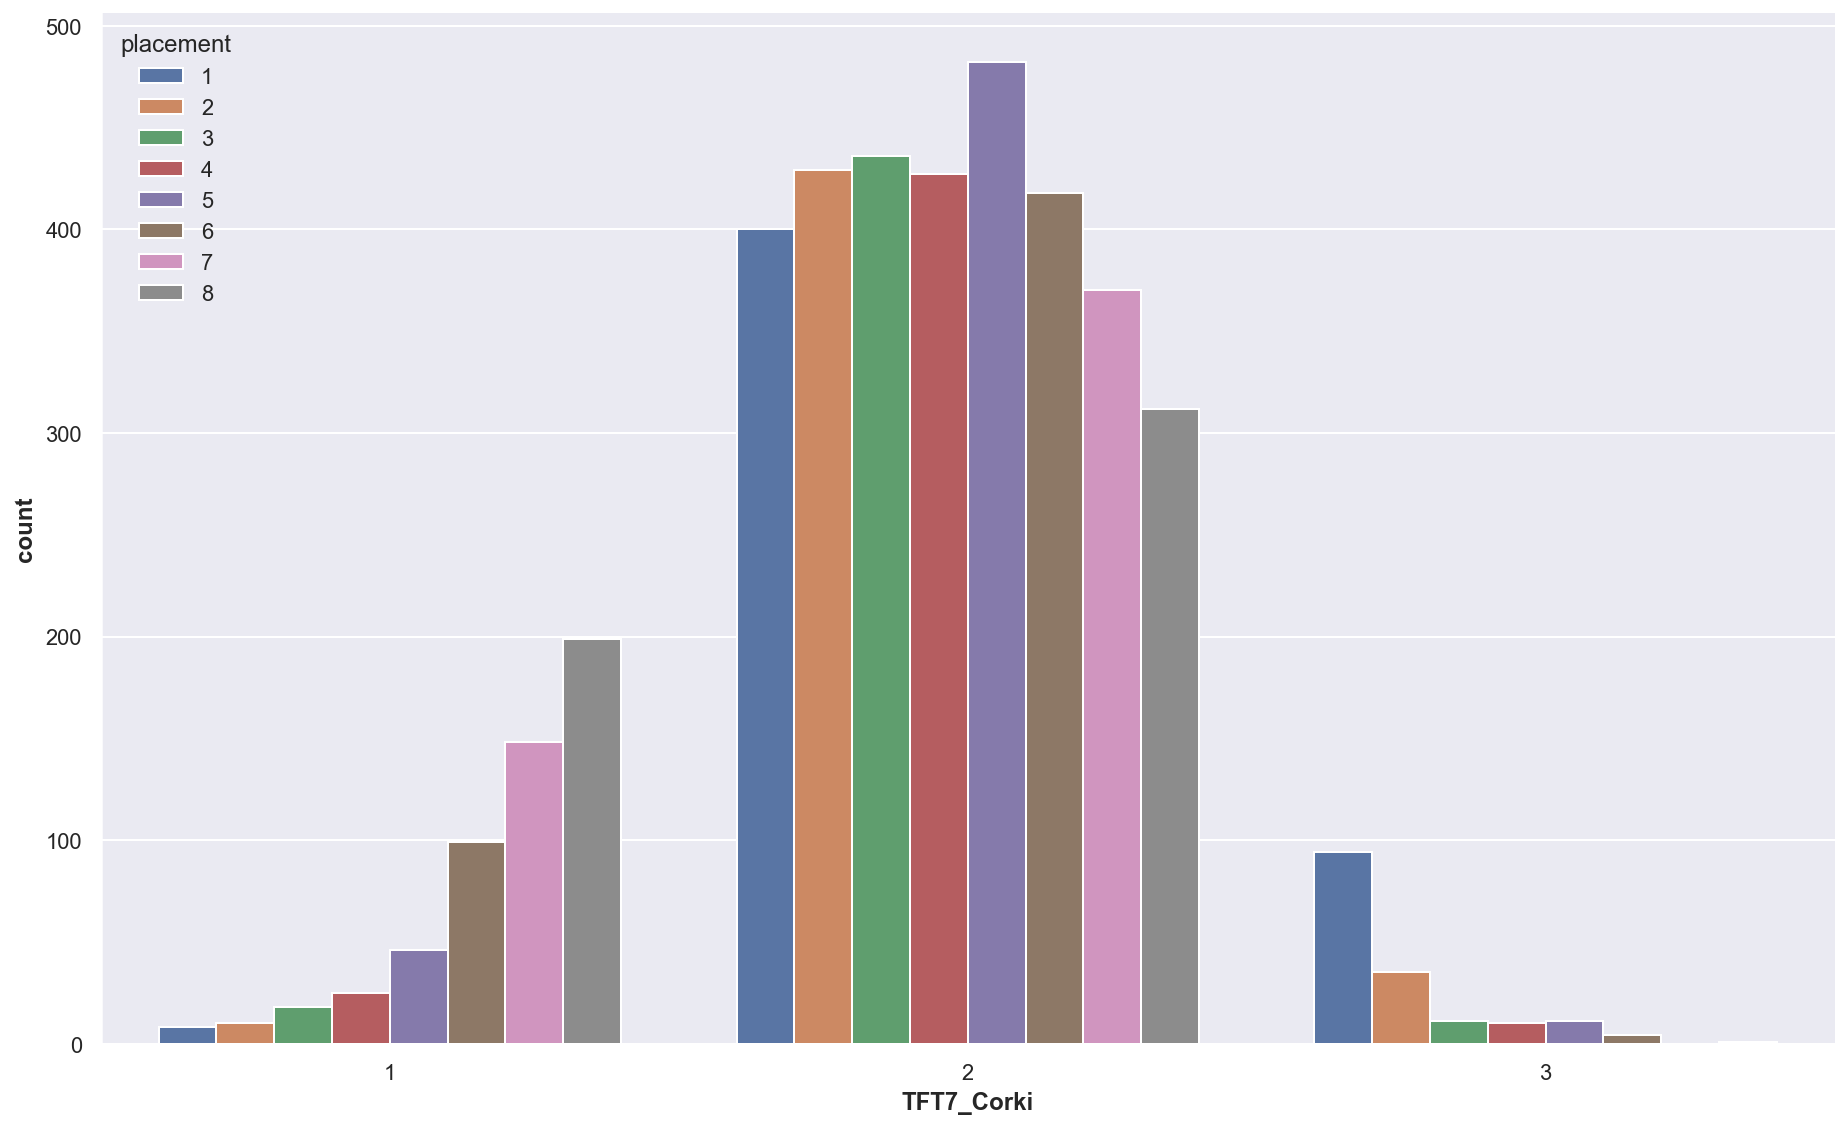

In [66]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Corki']>0], x='TFT7_Corki', hue=TARGETNAME)
sns.despine()

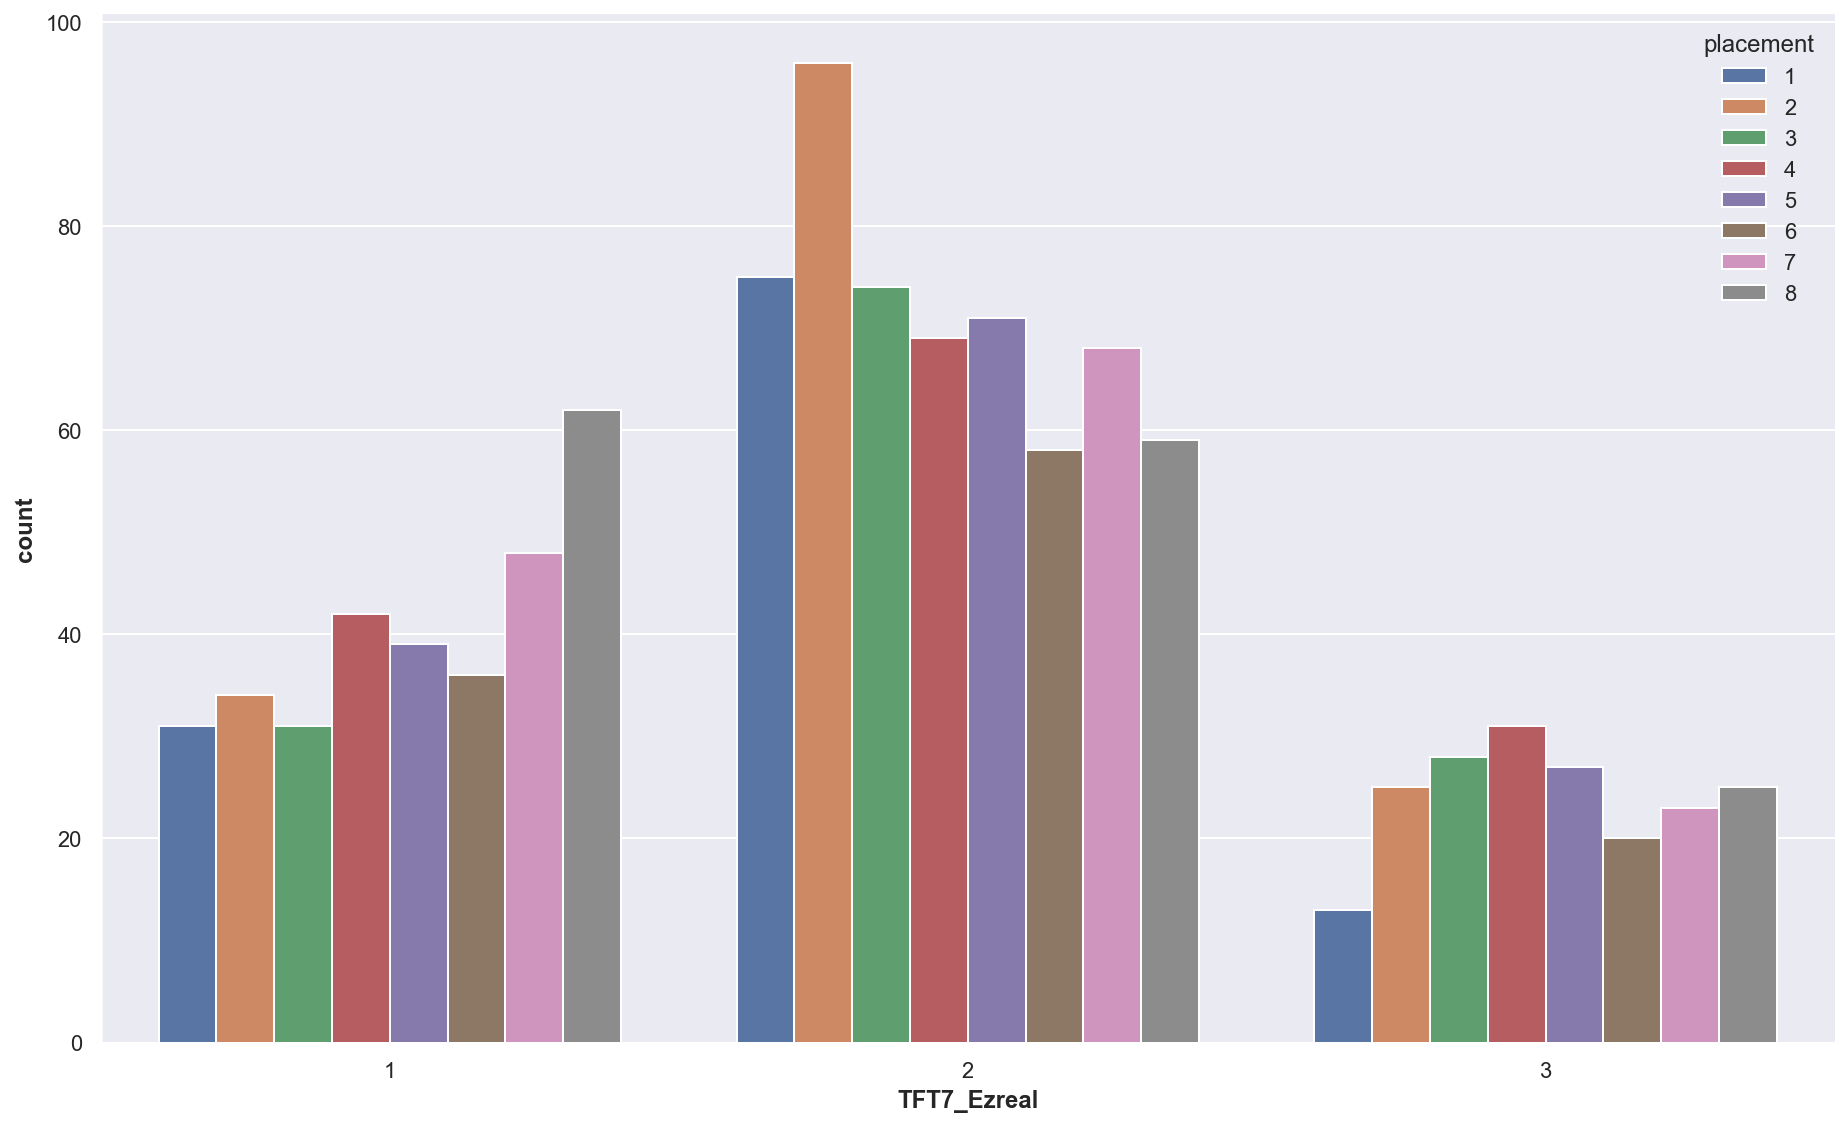

In [67]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ezreal']>0], x='TFT7_Ezreal', hue=TARGETNAME)
sns.despine()

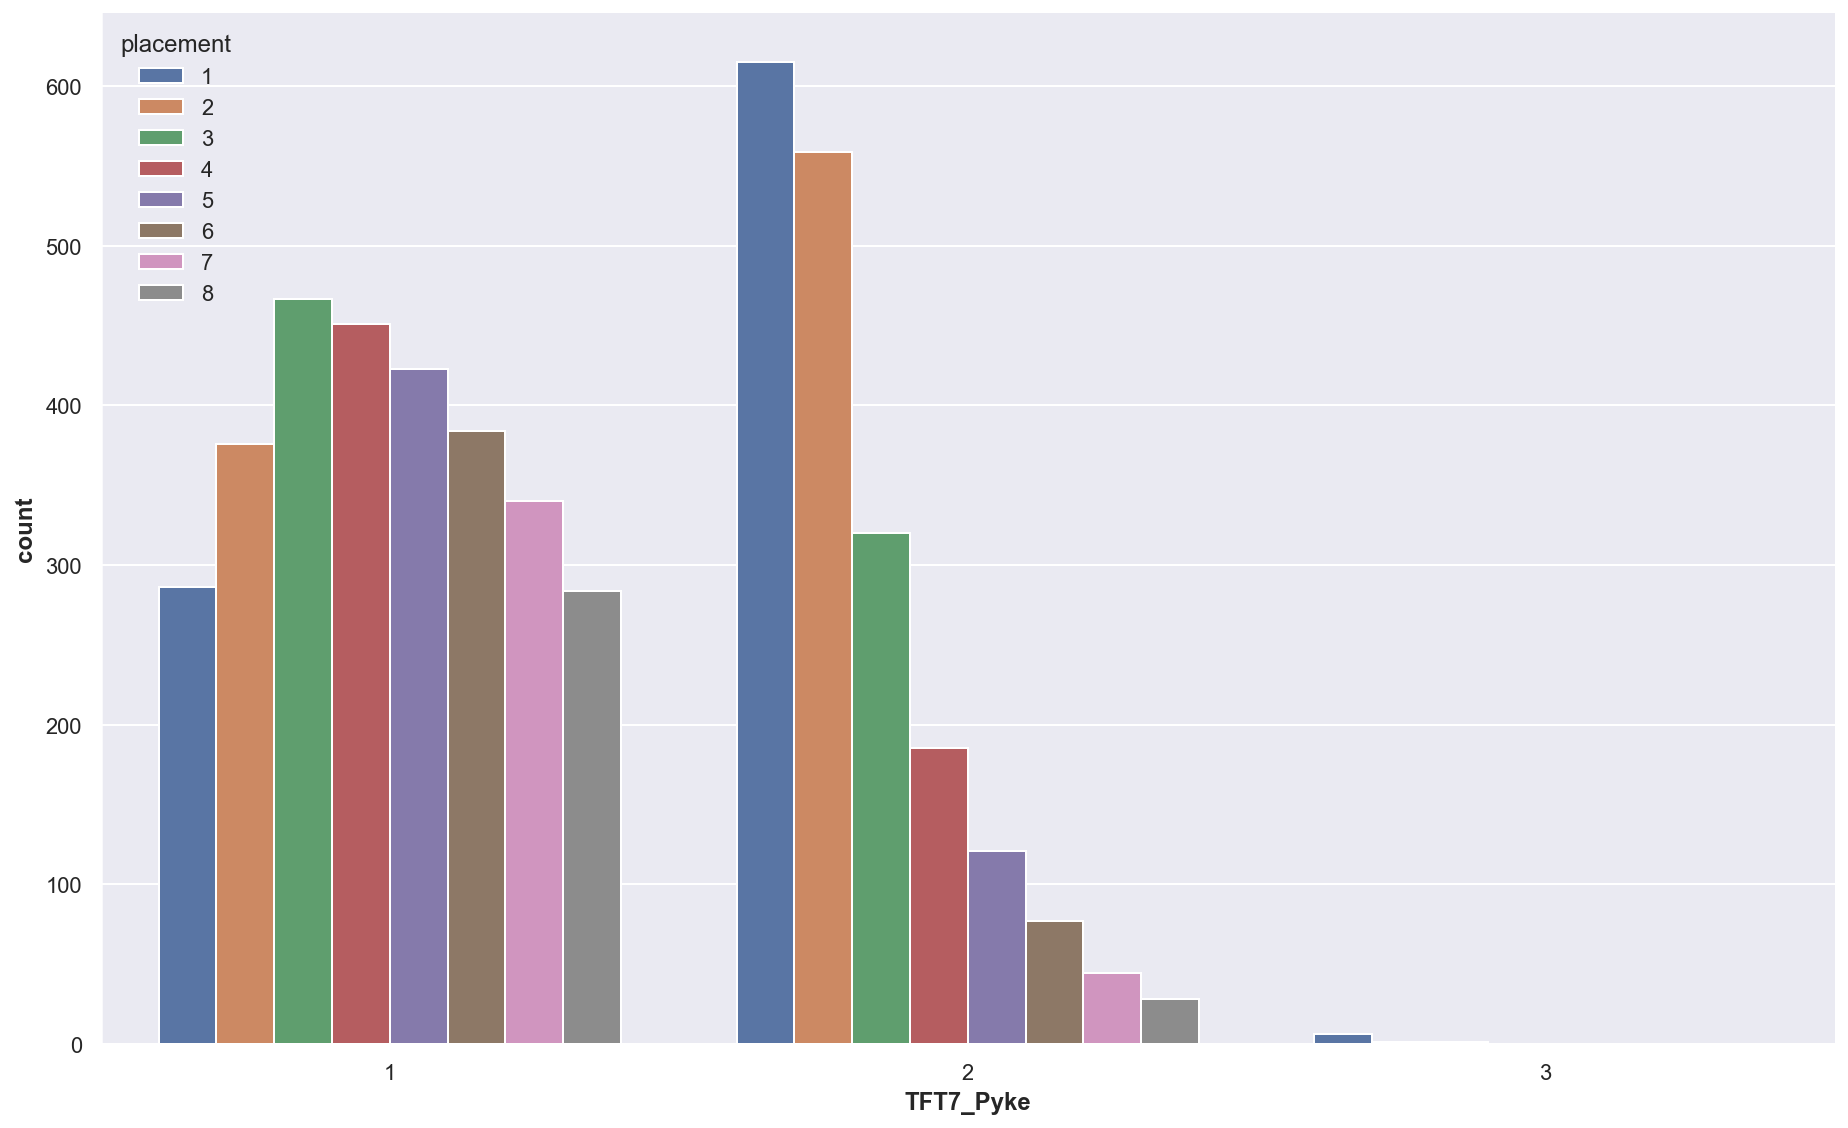

In [68]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Pyke']>0], x='TFT7_Pyke', hue=TARGETNAME)
sns.despine()

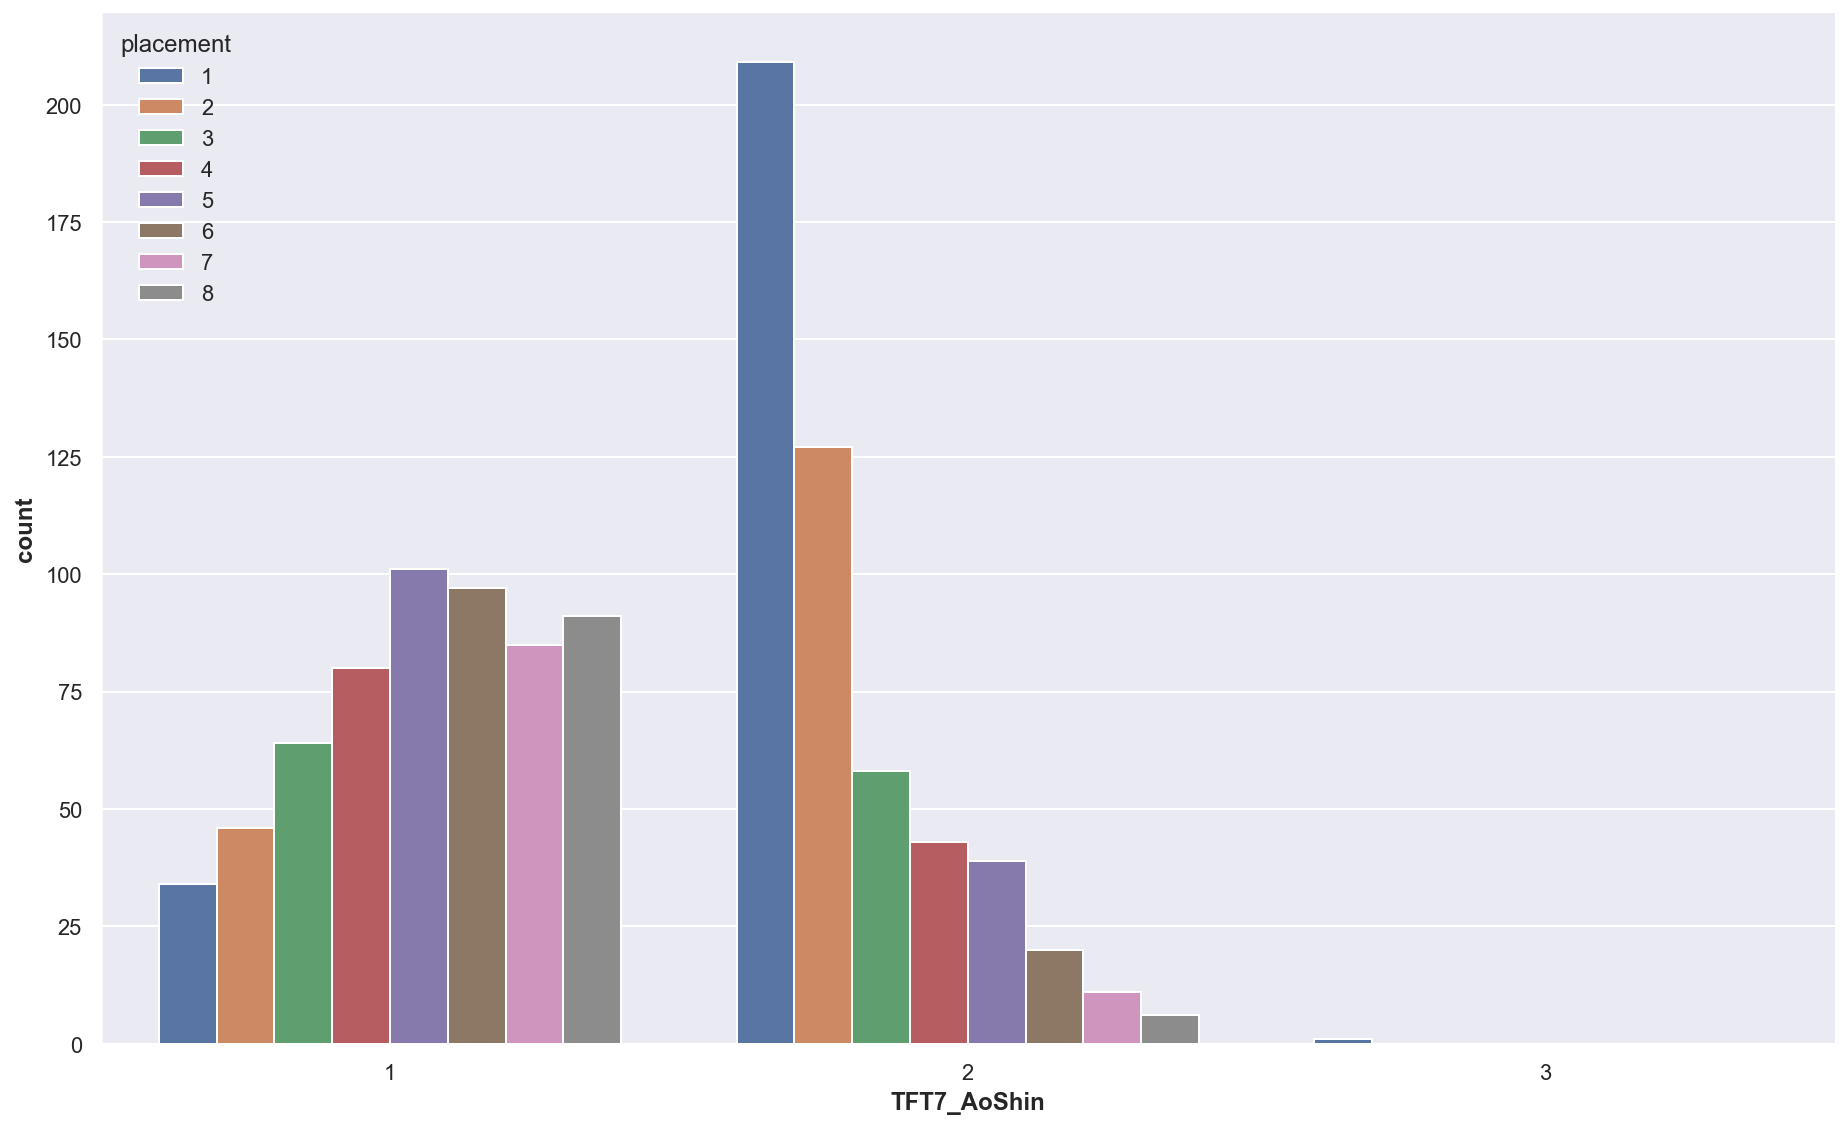

In [69]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_AoShin']>0], x='TFT7_AoShin', hue=TARGETNAME)
sns.despine()

Daeja.


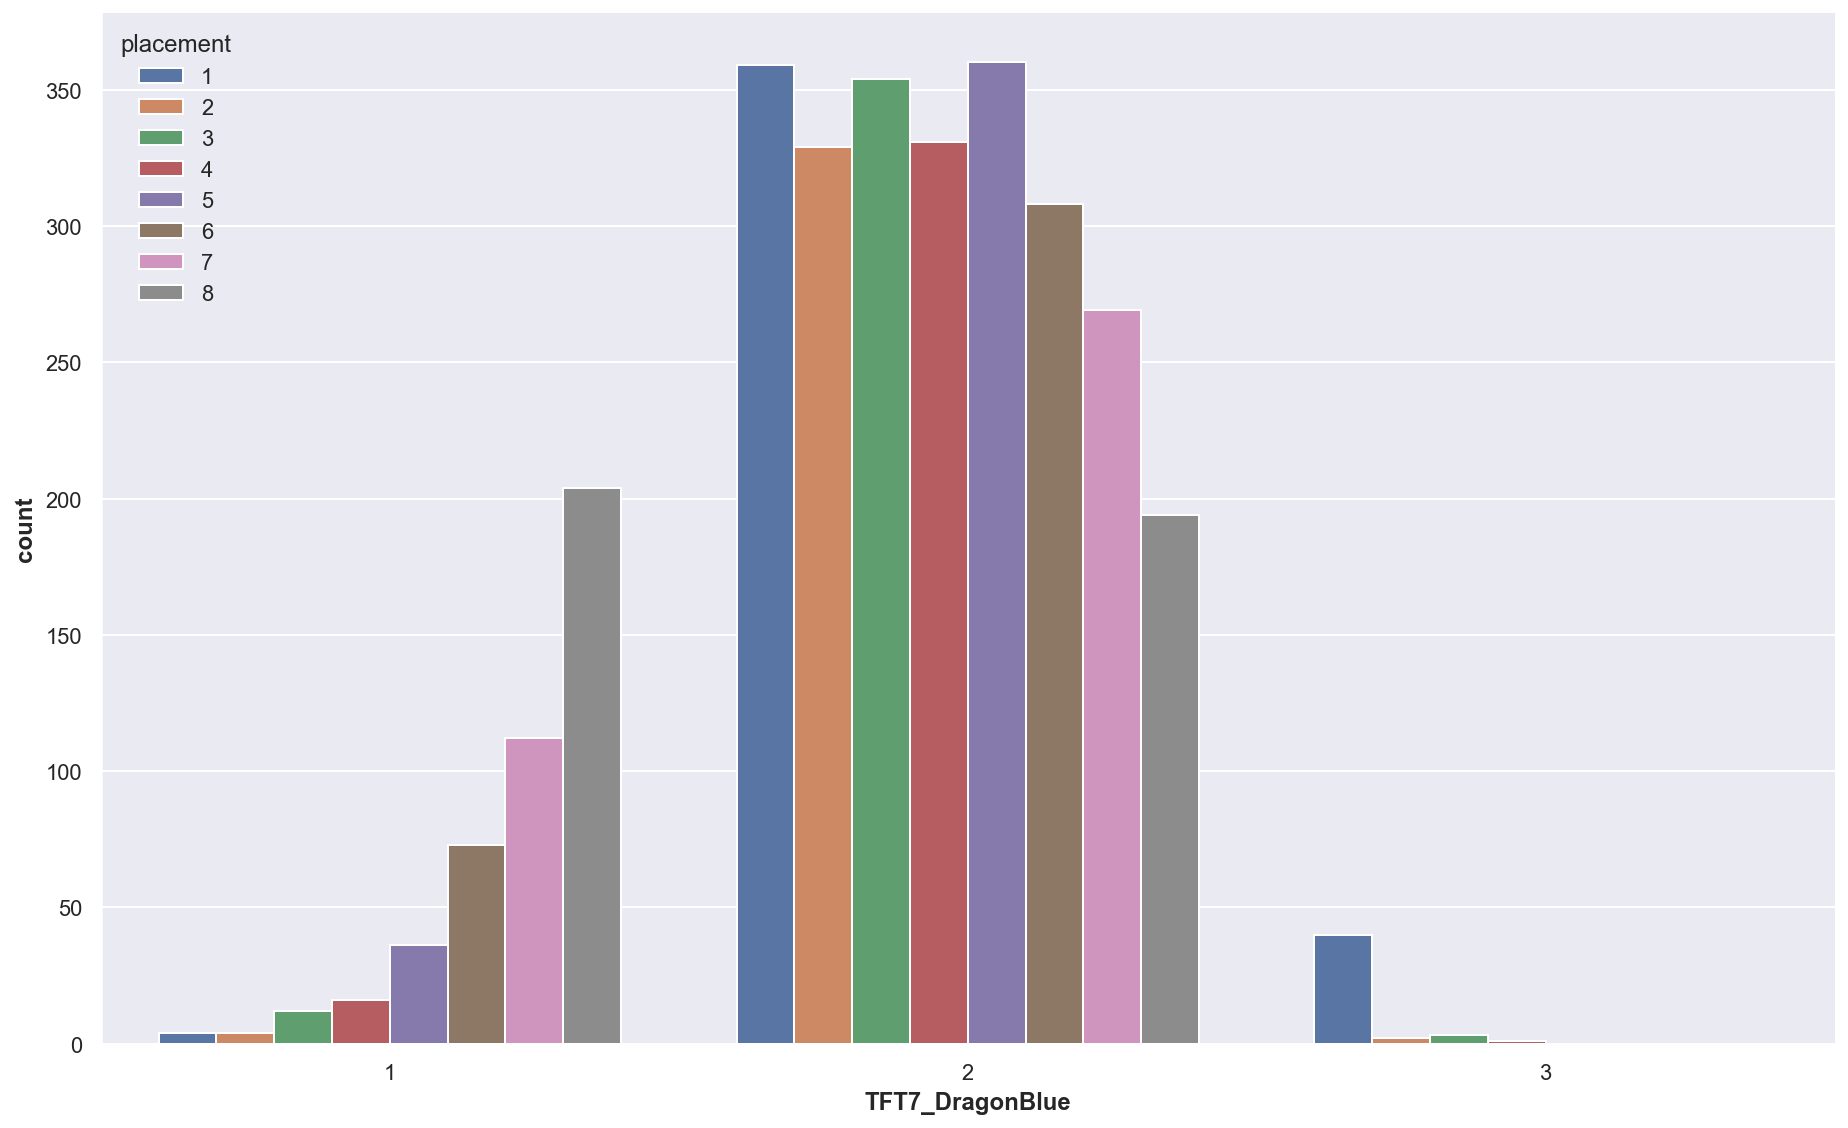

In [70]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonBlue']>0], x='TFT7_DragonBlue', hue=TARGETNAME)
sns.despine()

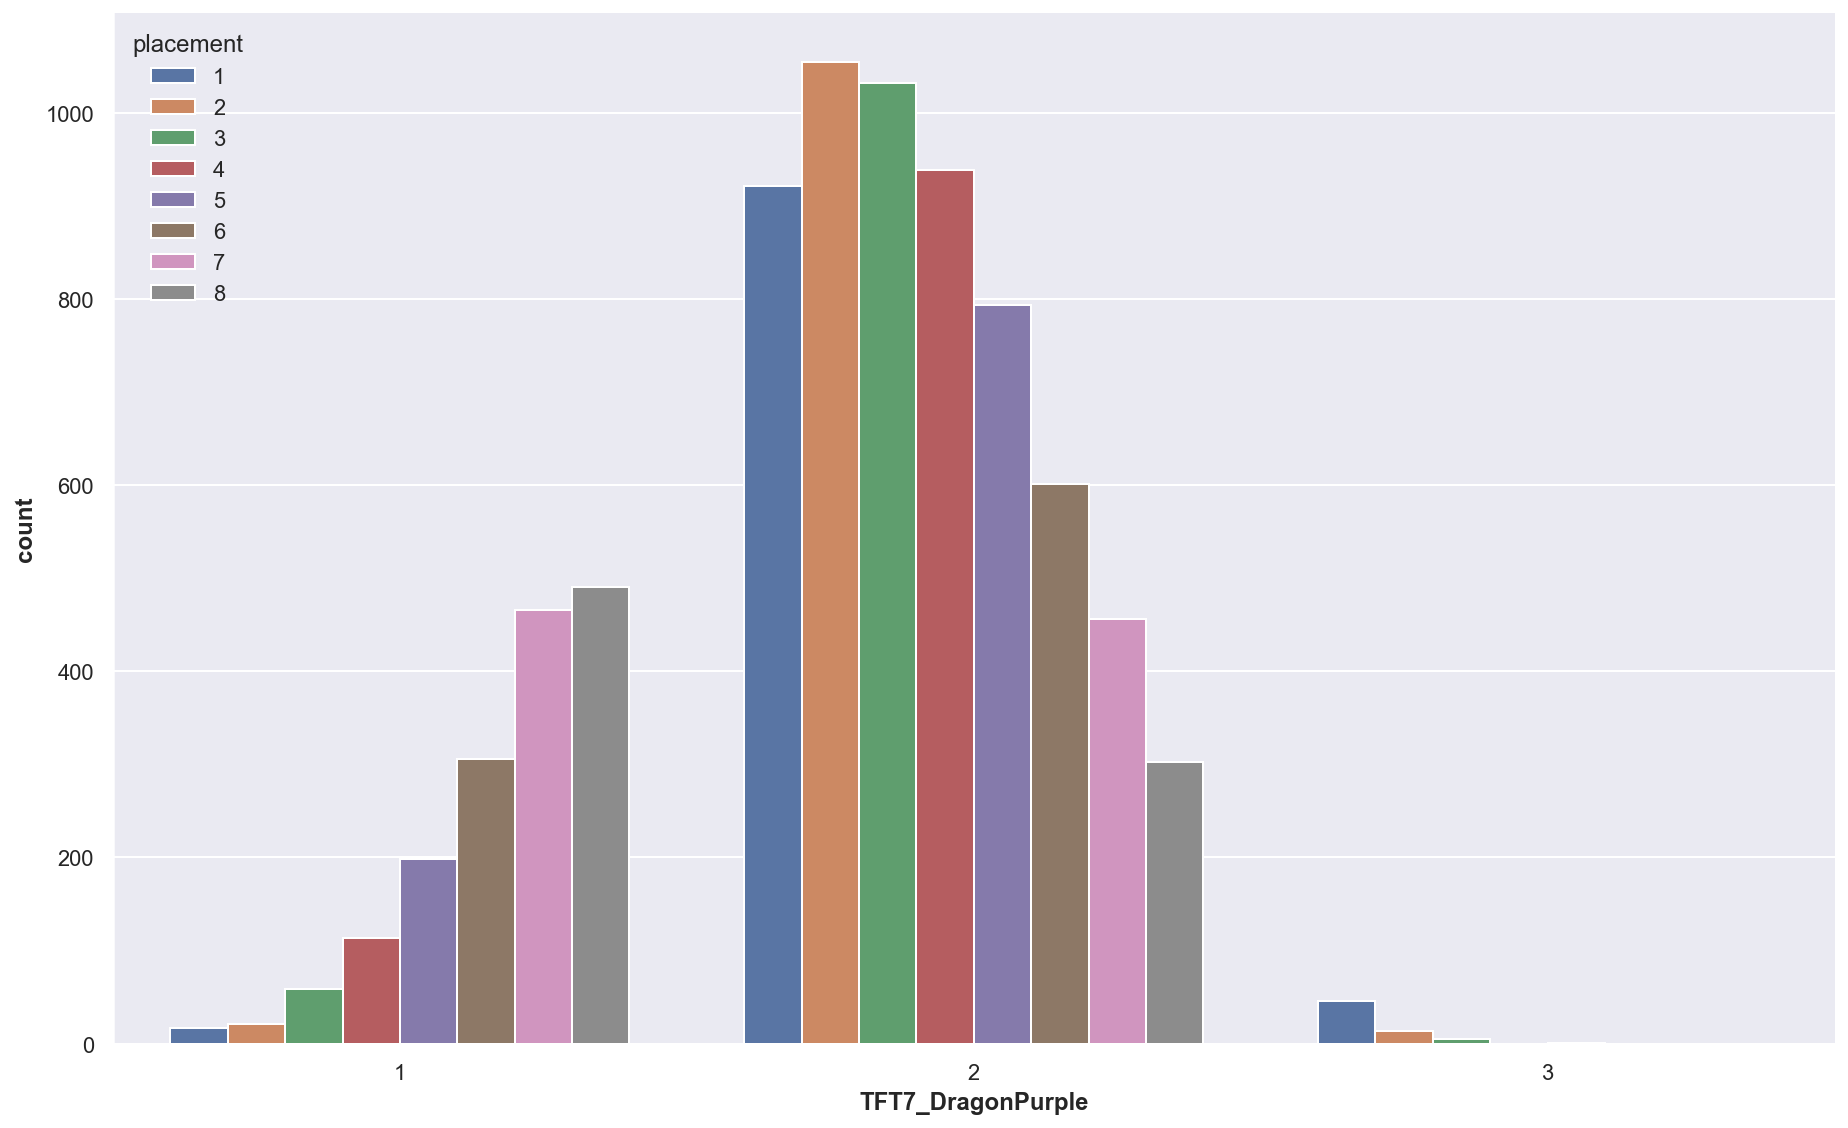

In [71]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonPurple']>0], x='TFT7_DragonPurple', hue=TARGETNAME)
sns.despine()

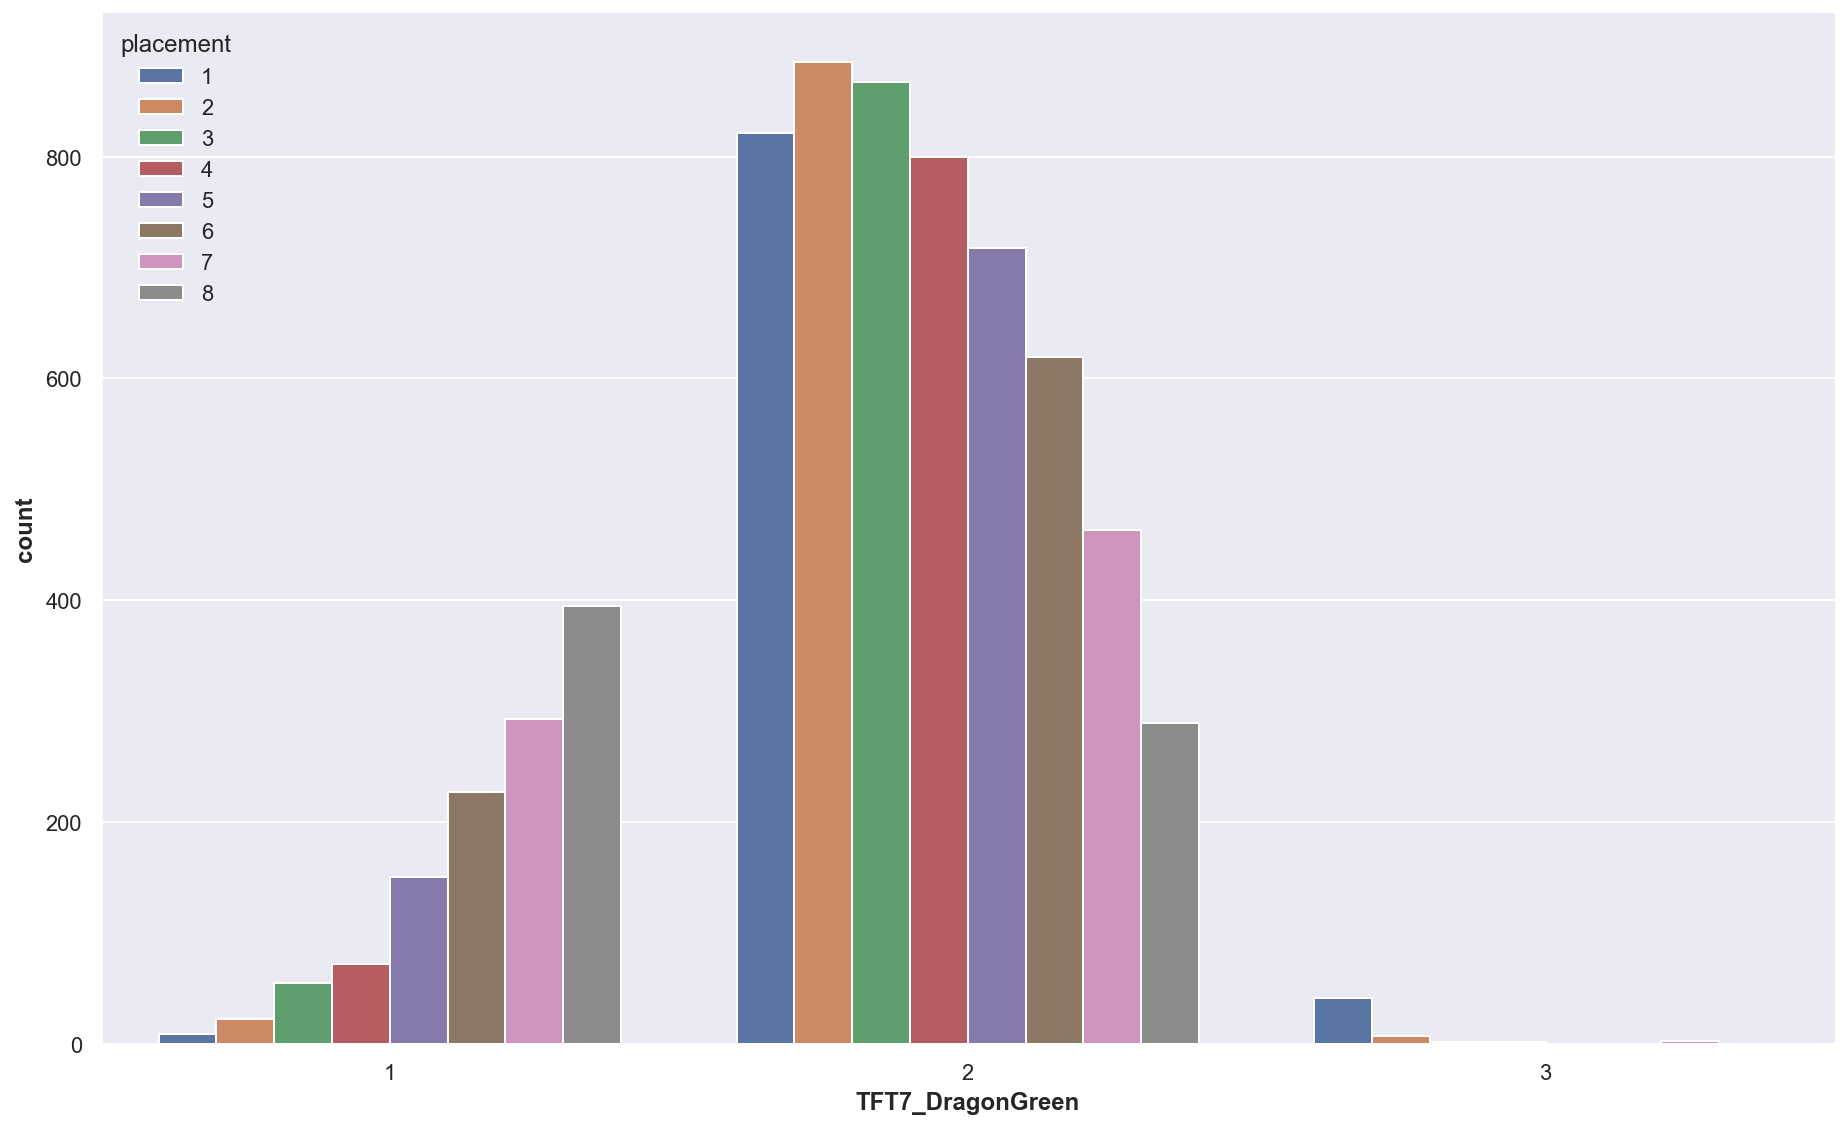

In [72]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGreen']>0], x='TFT7_DragonGreen', hue=TARGETNAME)
sns.despine()

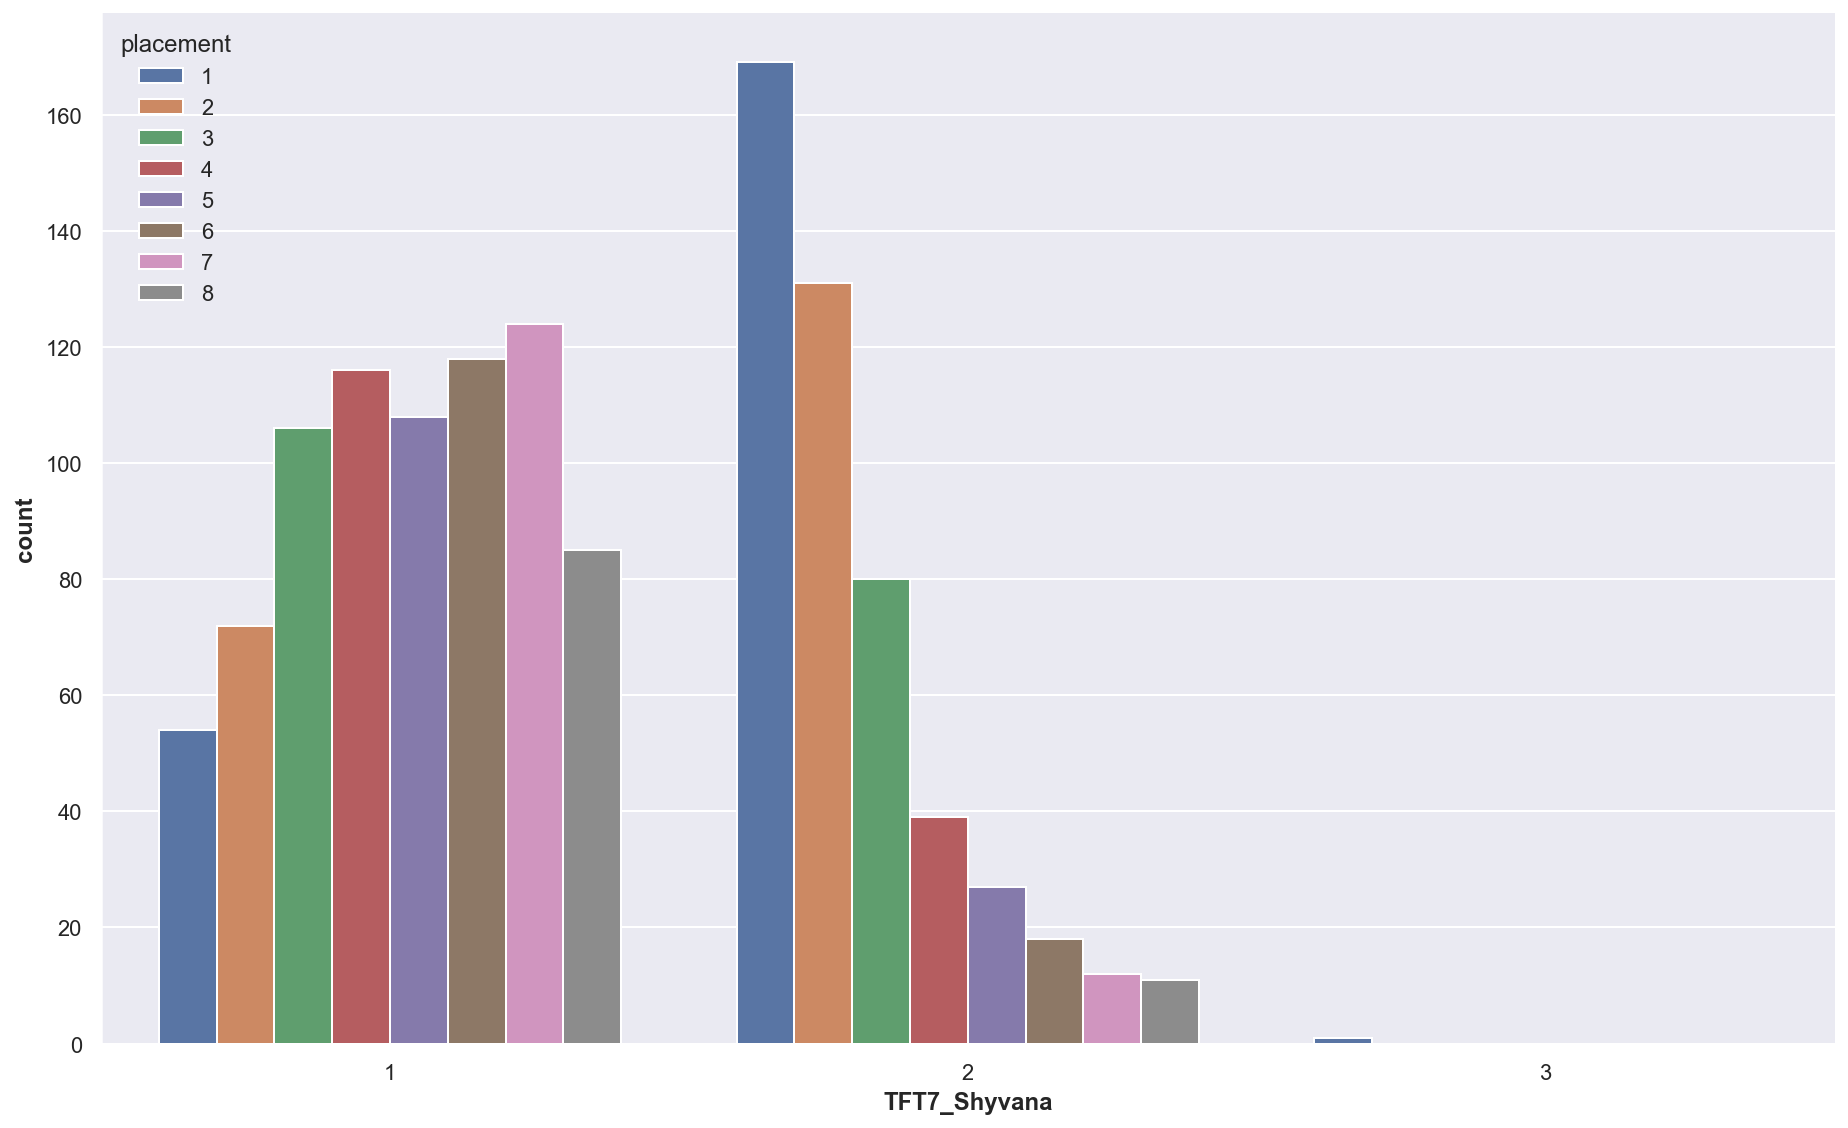

In [73]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shyvana']>0], x='TFT7_Shyvana', hue=TARGETNAME)
sns.despine()

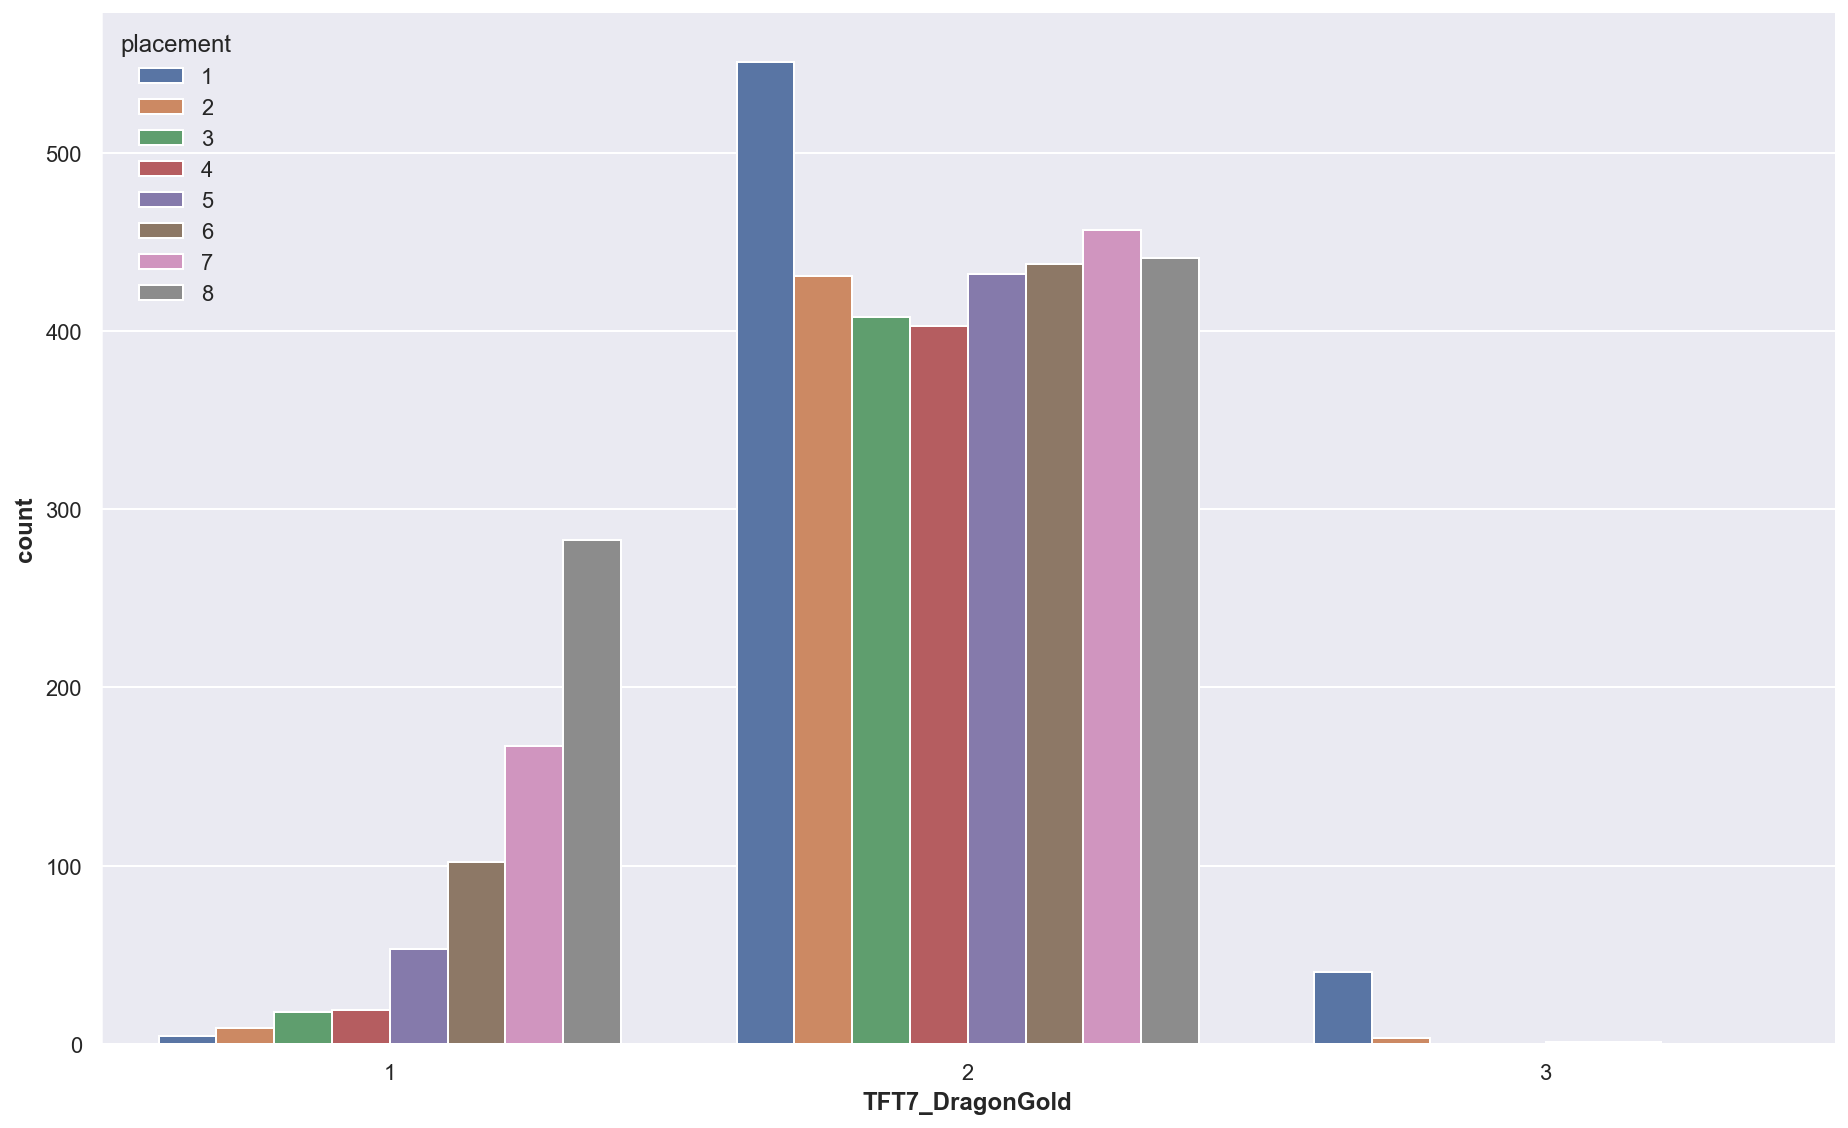

In [74]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGold']>0], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Nomsy best dragon at tier 4.

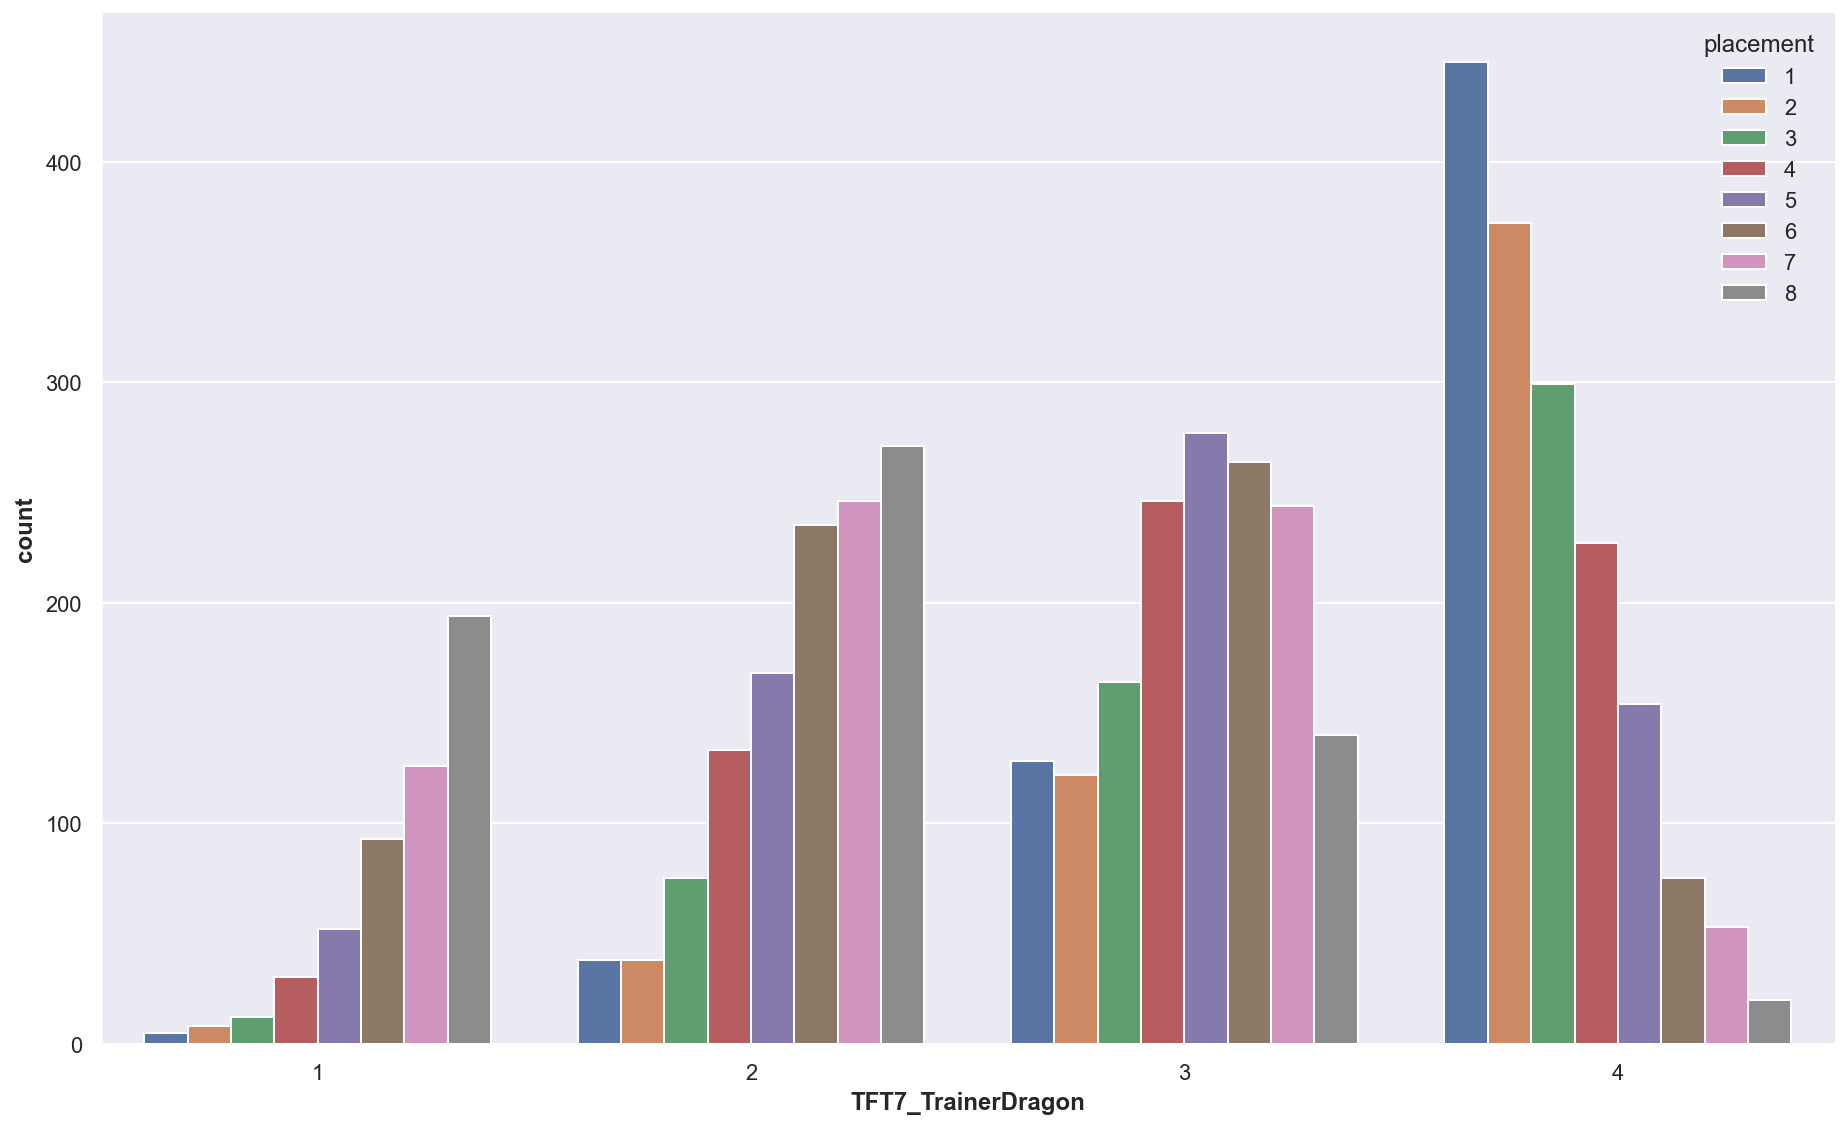

In [75]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_TrainerDragon']>0], x='TFT7_TrainerDragon', hue=TARGETNAME)
sns.despine()

Huge difference between holding Neeko1 and Neeko2.


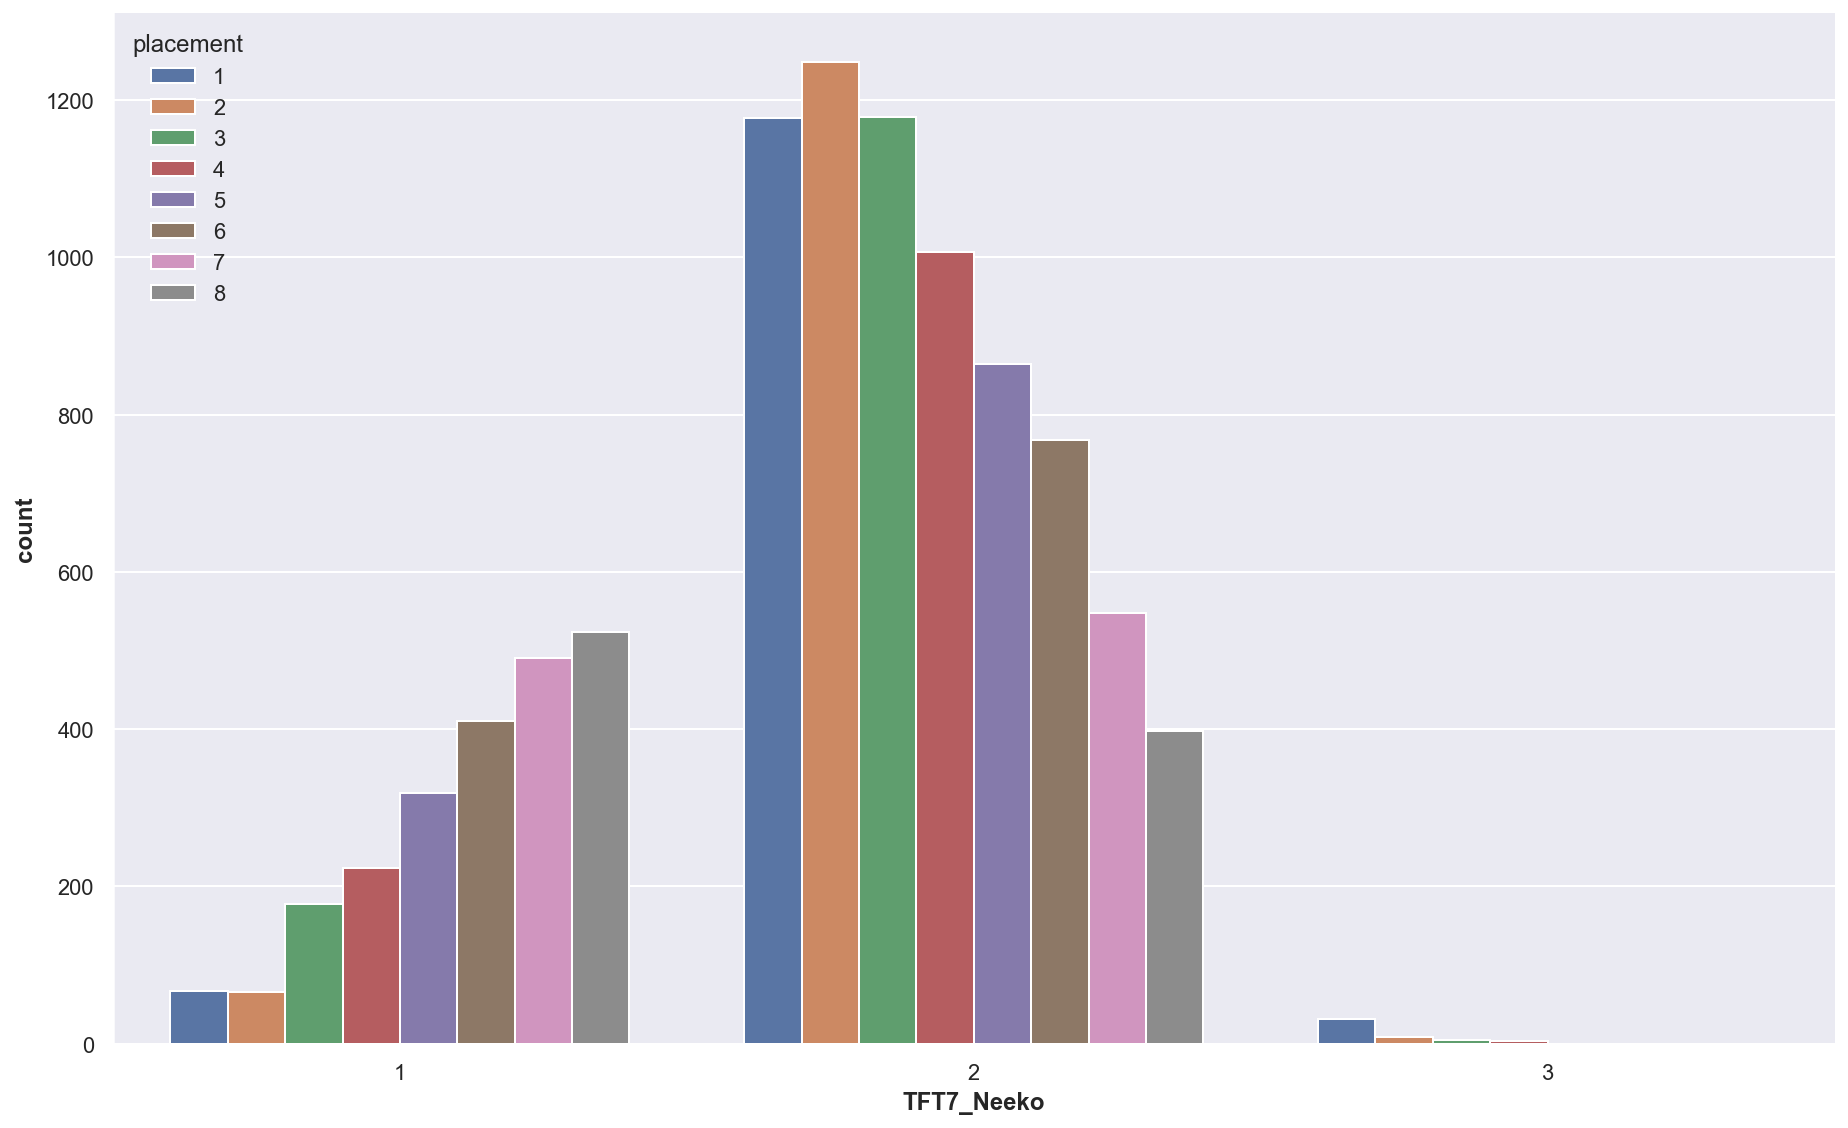

In [76]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Neeko']>0], x='TFT7_Neeko', hue=TARGETNAME)
sns.despine()

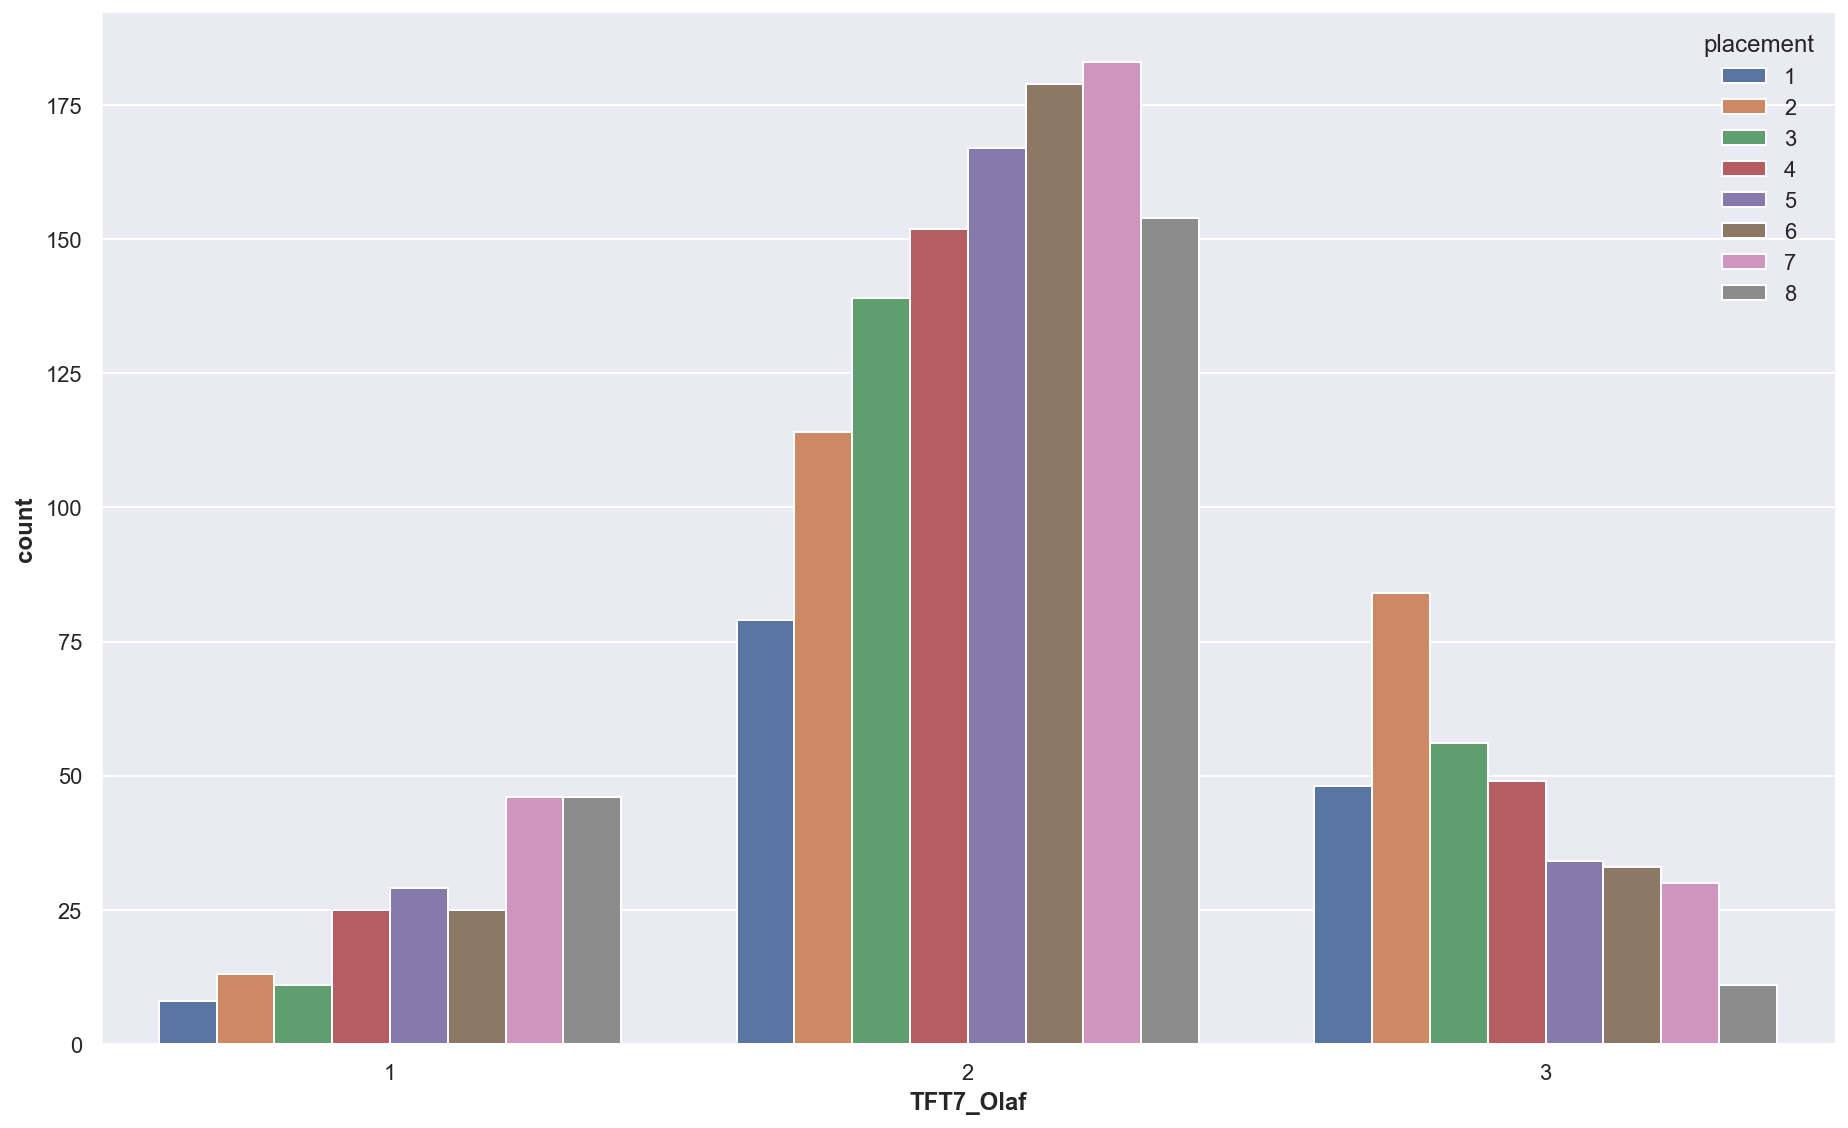

In [77]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Olaf']>0], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units

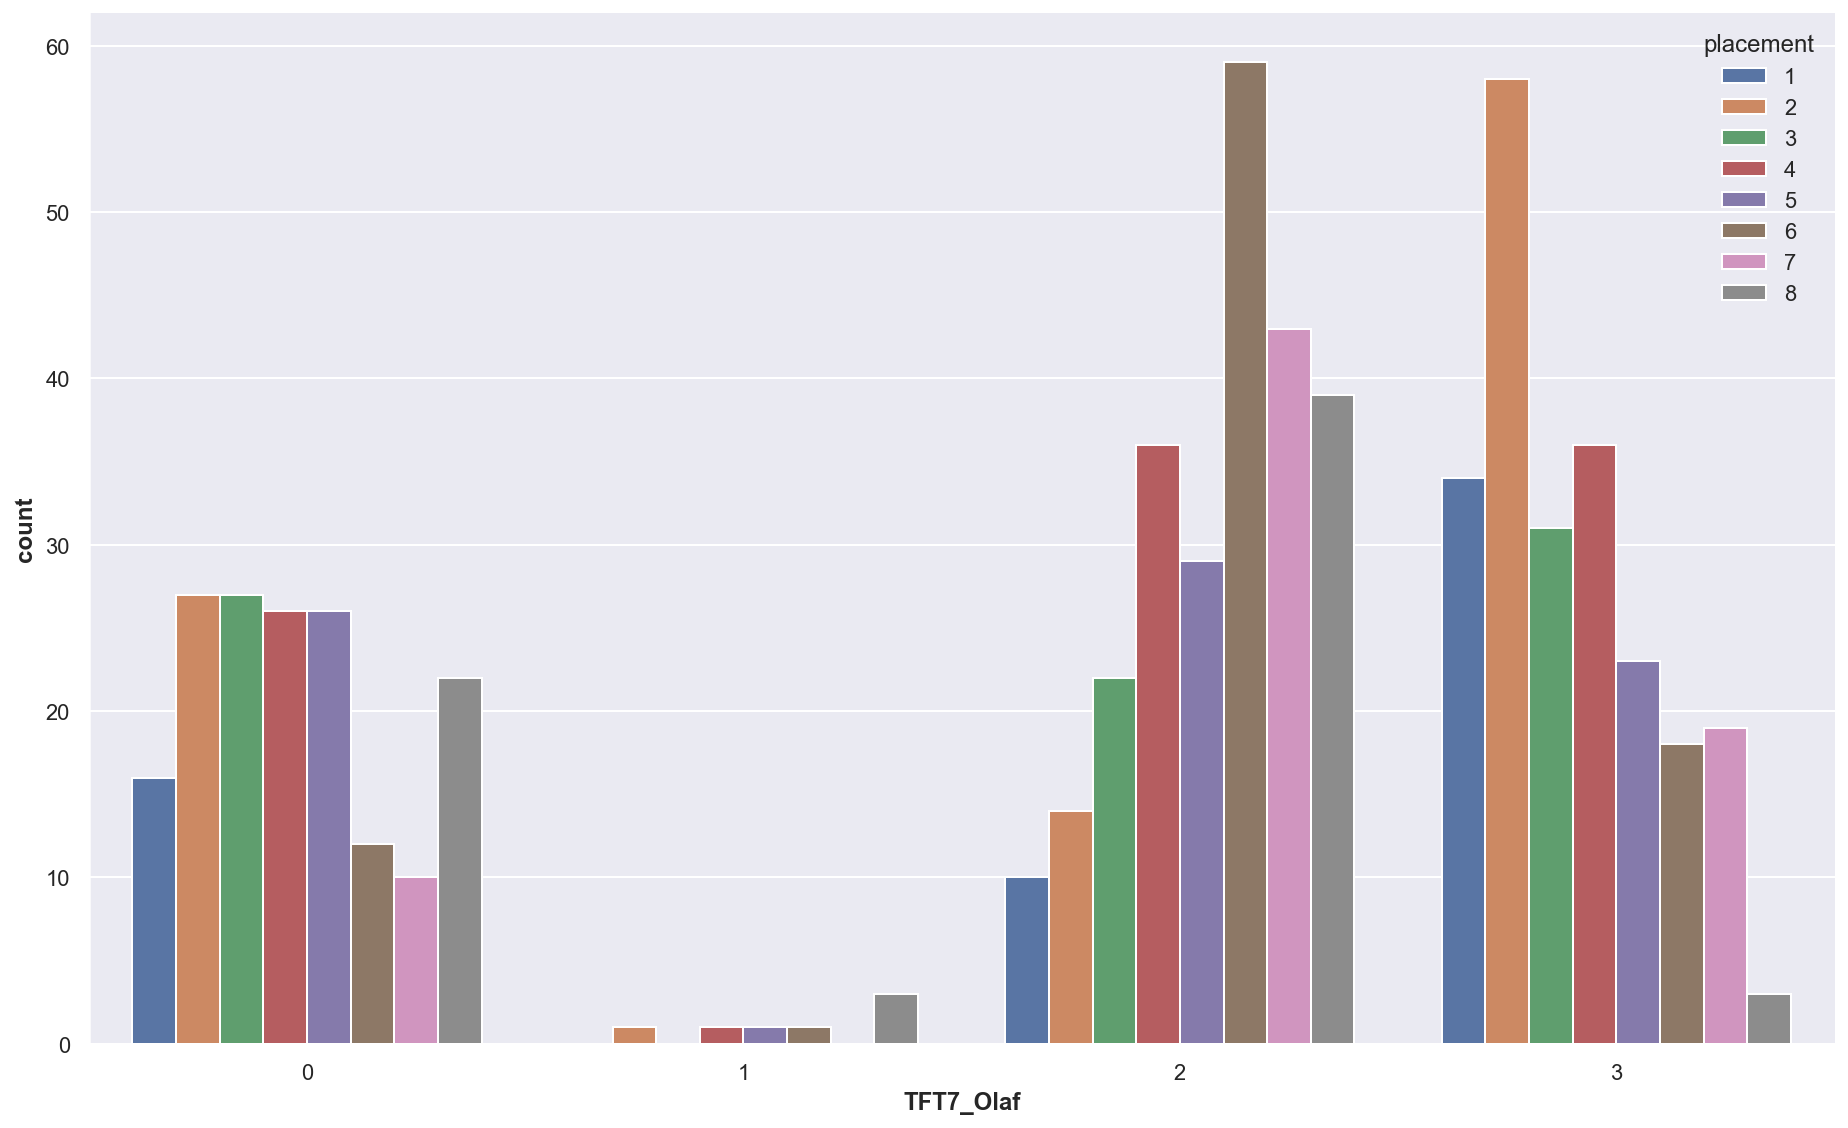

In [78]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Shen']>1) & (matches_df['TFT7_Diana']>1)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units Shen & Diana with Olaf.

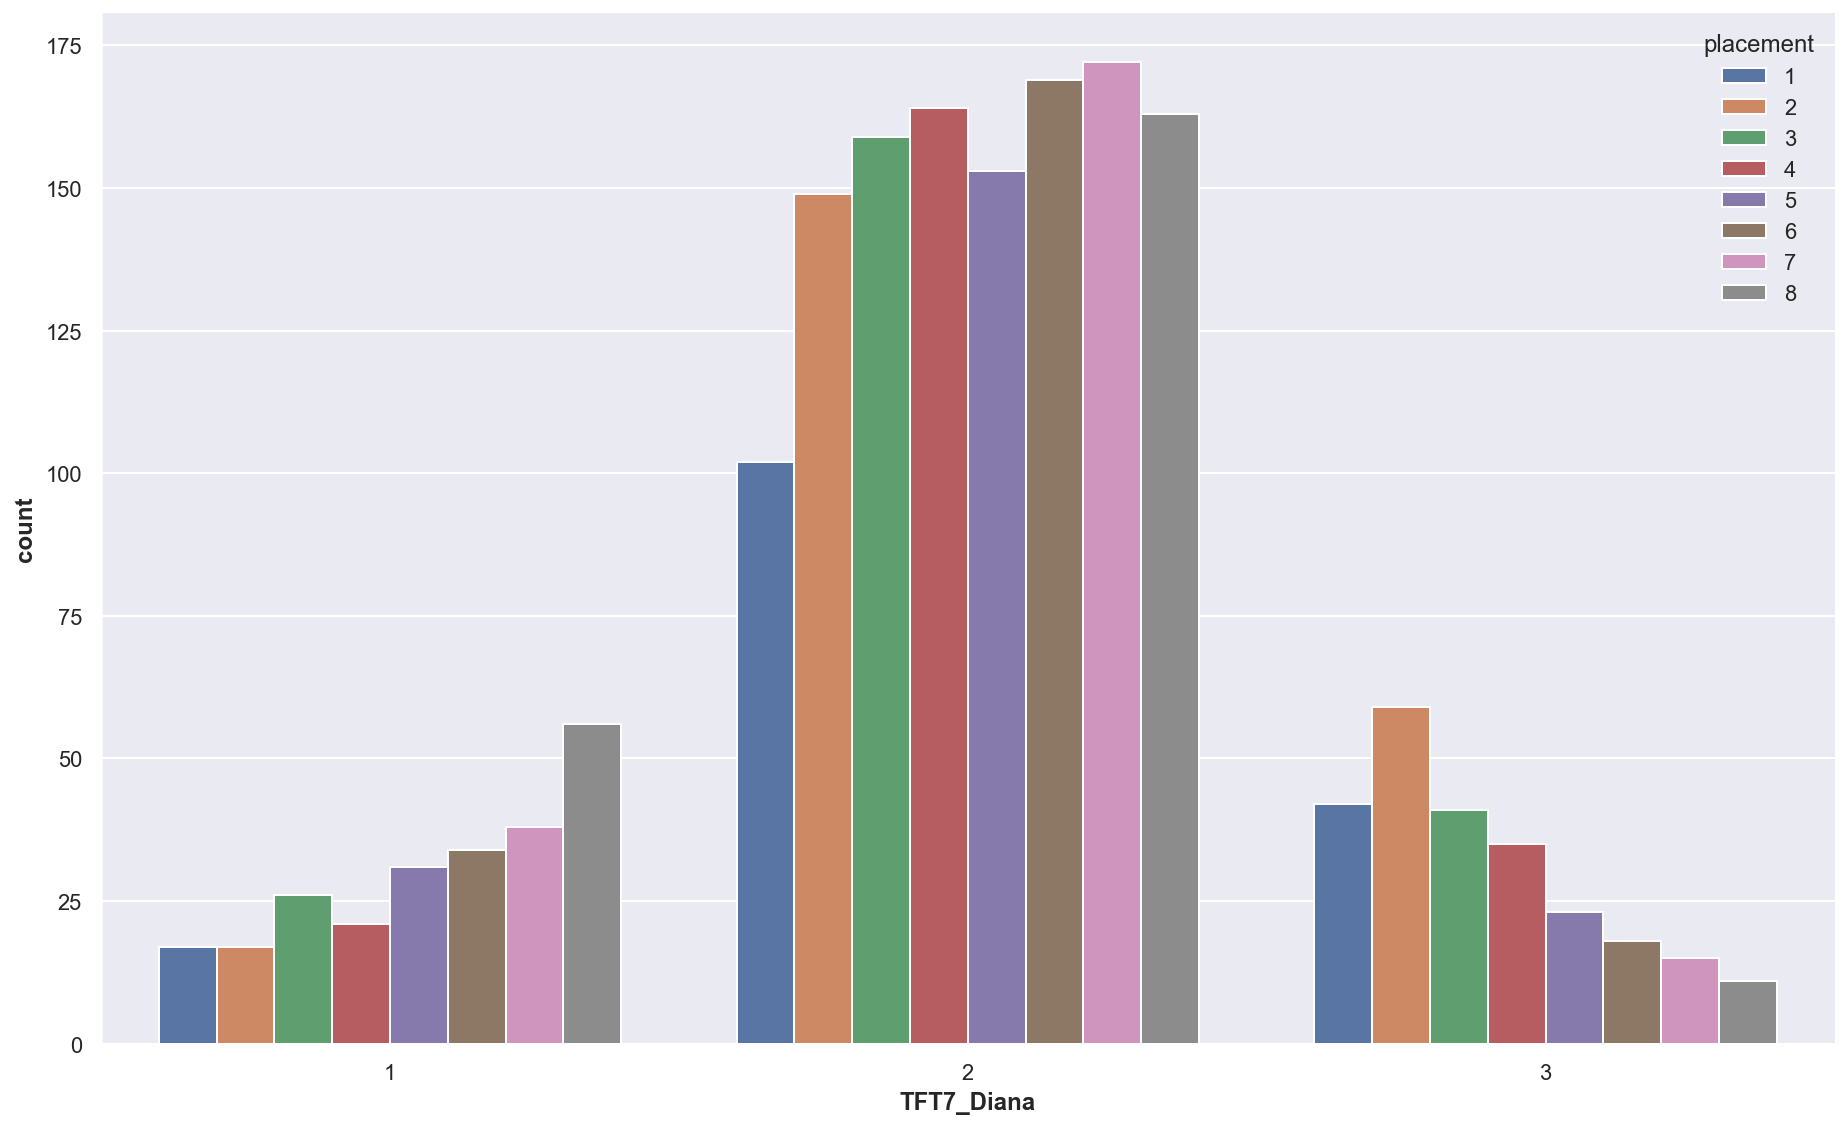

In [79]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Diana']>0], x='TFT7_Diana', hue=TARGETNAME)
sns.despine()

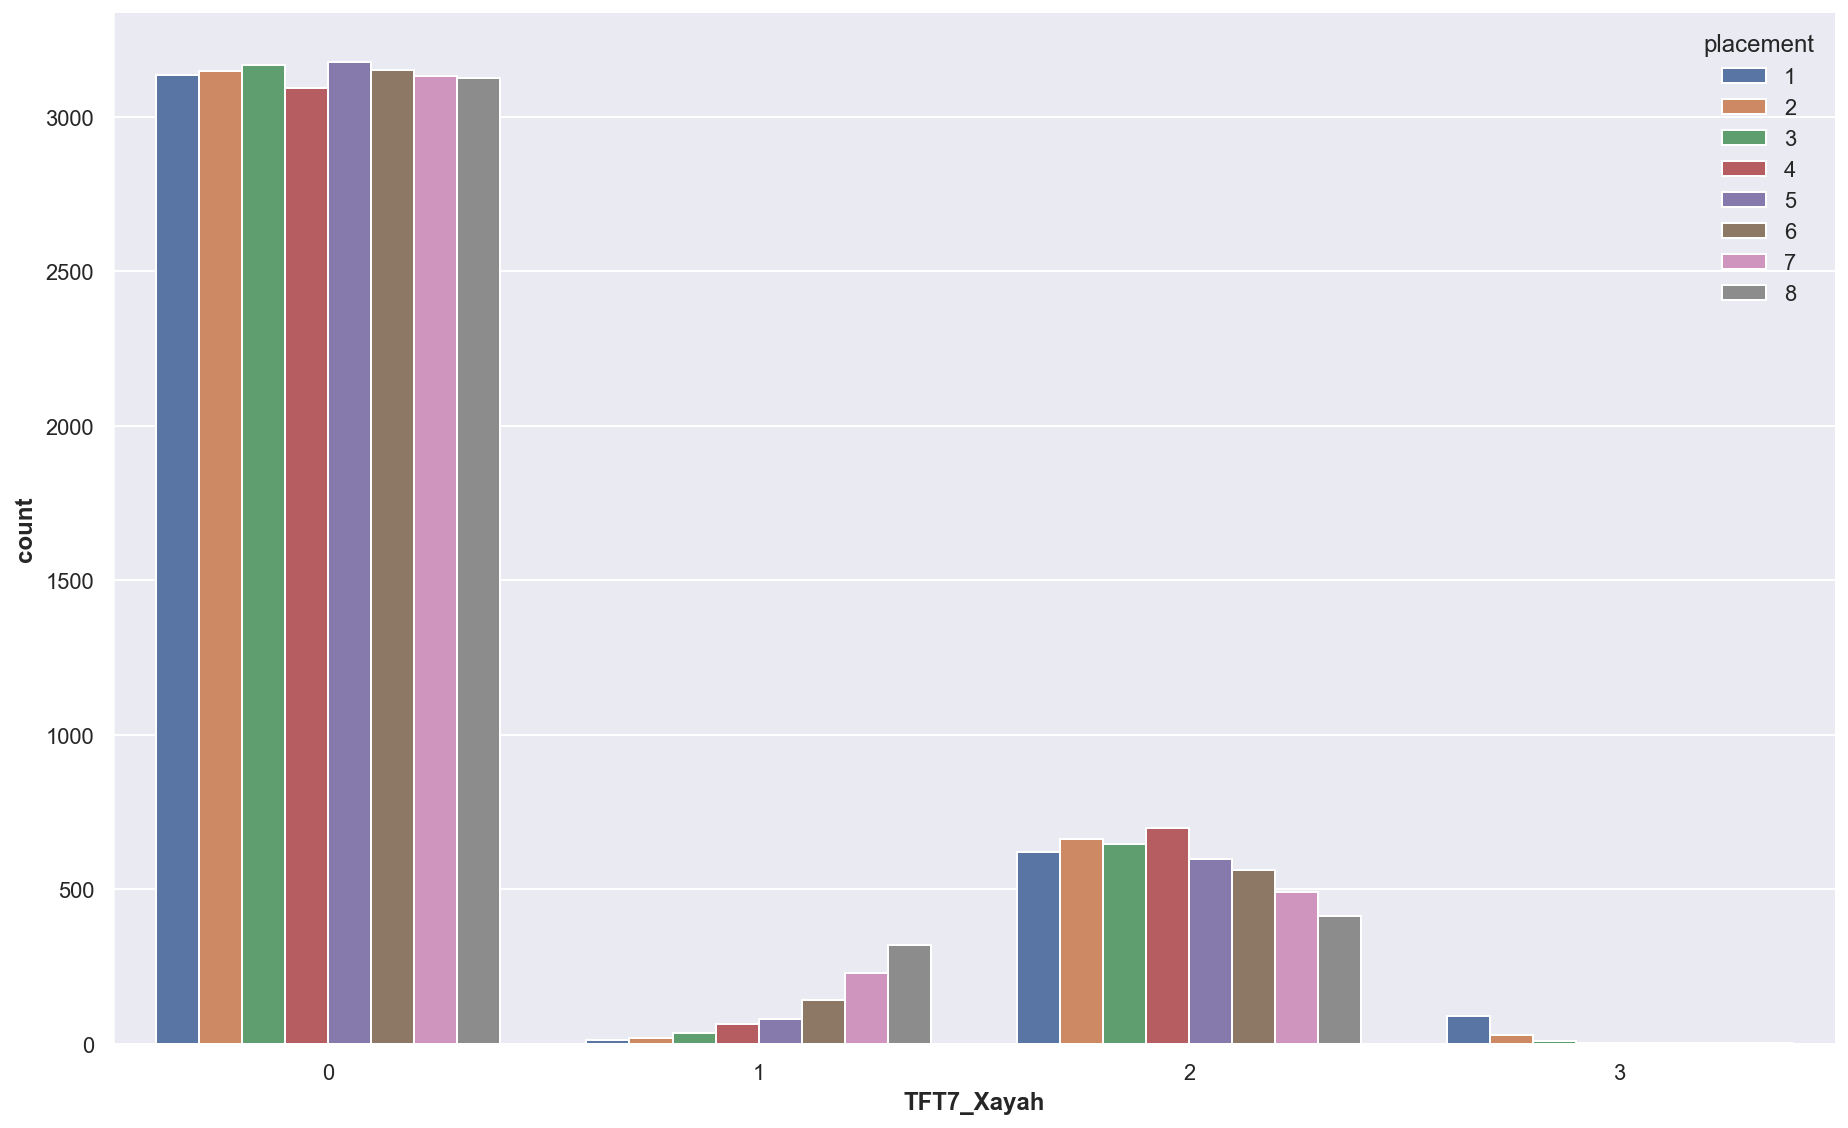

In [80]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Xayah']>=0], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

## Items

When TFT7_DragonGold (Idas) is holding item ShimmerscaleDiamondHands.

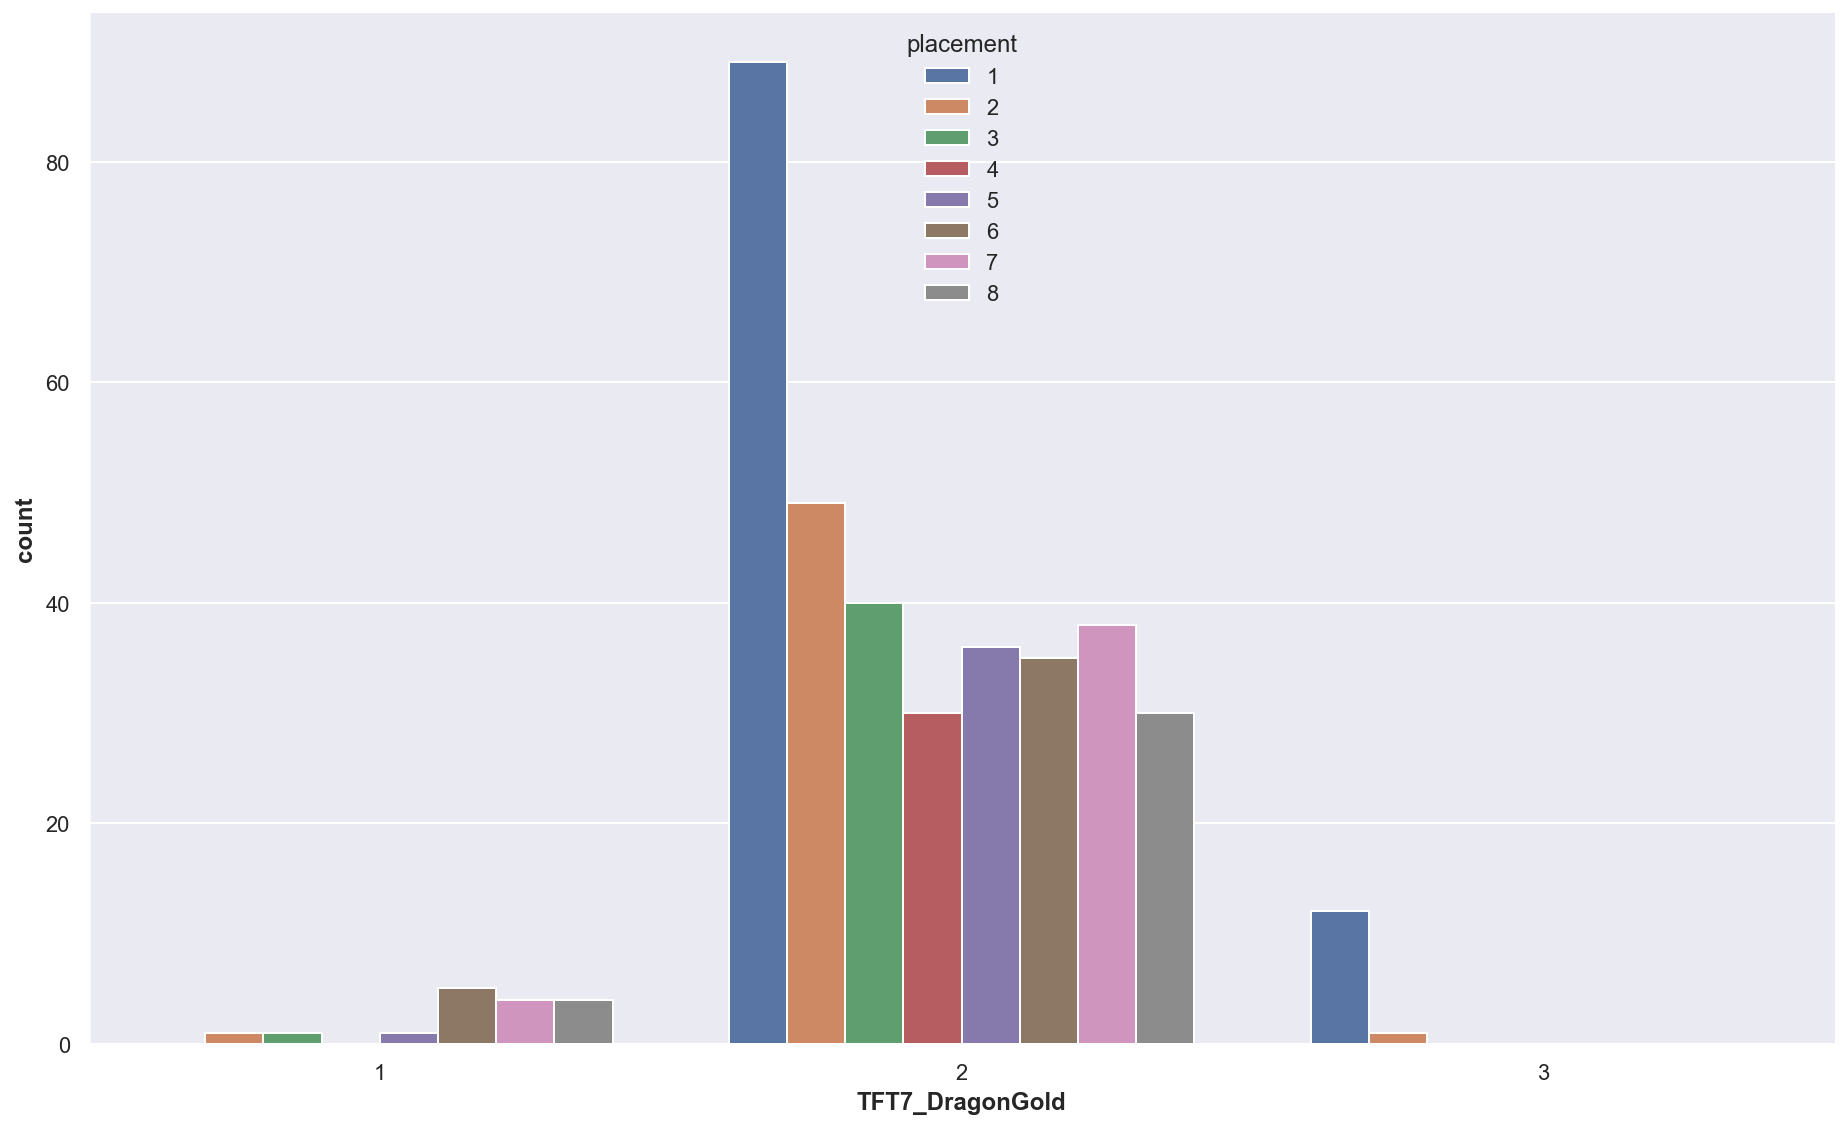

In [81]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']=='ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item1']=='ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item2']=='ShimmerscaleDiamondHands')], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

VS When TFT7_DragonGold (Idas) is **NOT** holding item ShimmerscaleDiamondHands.

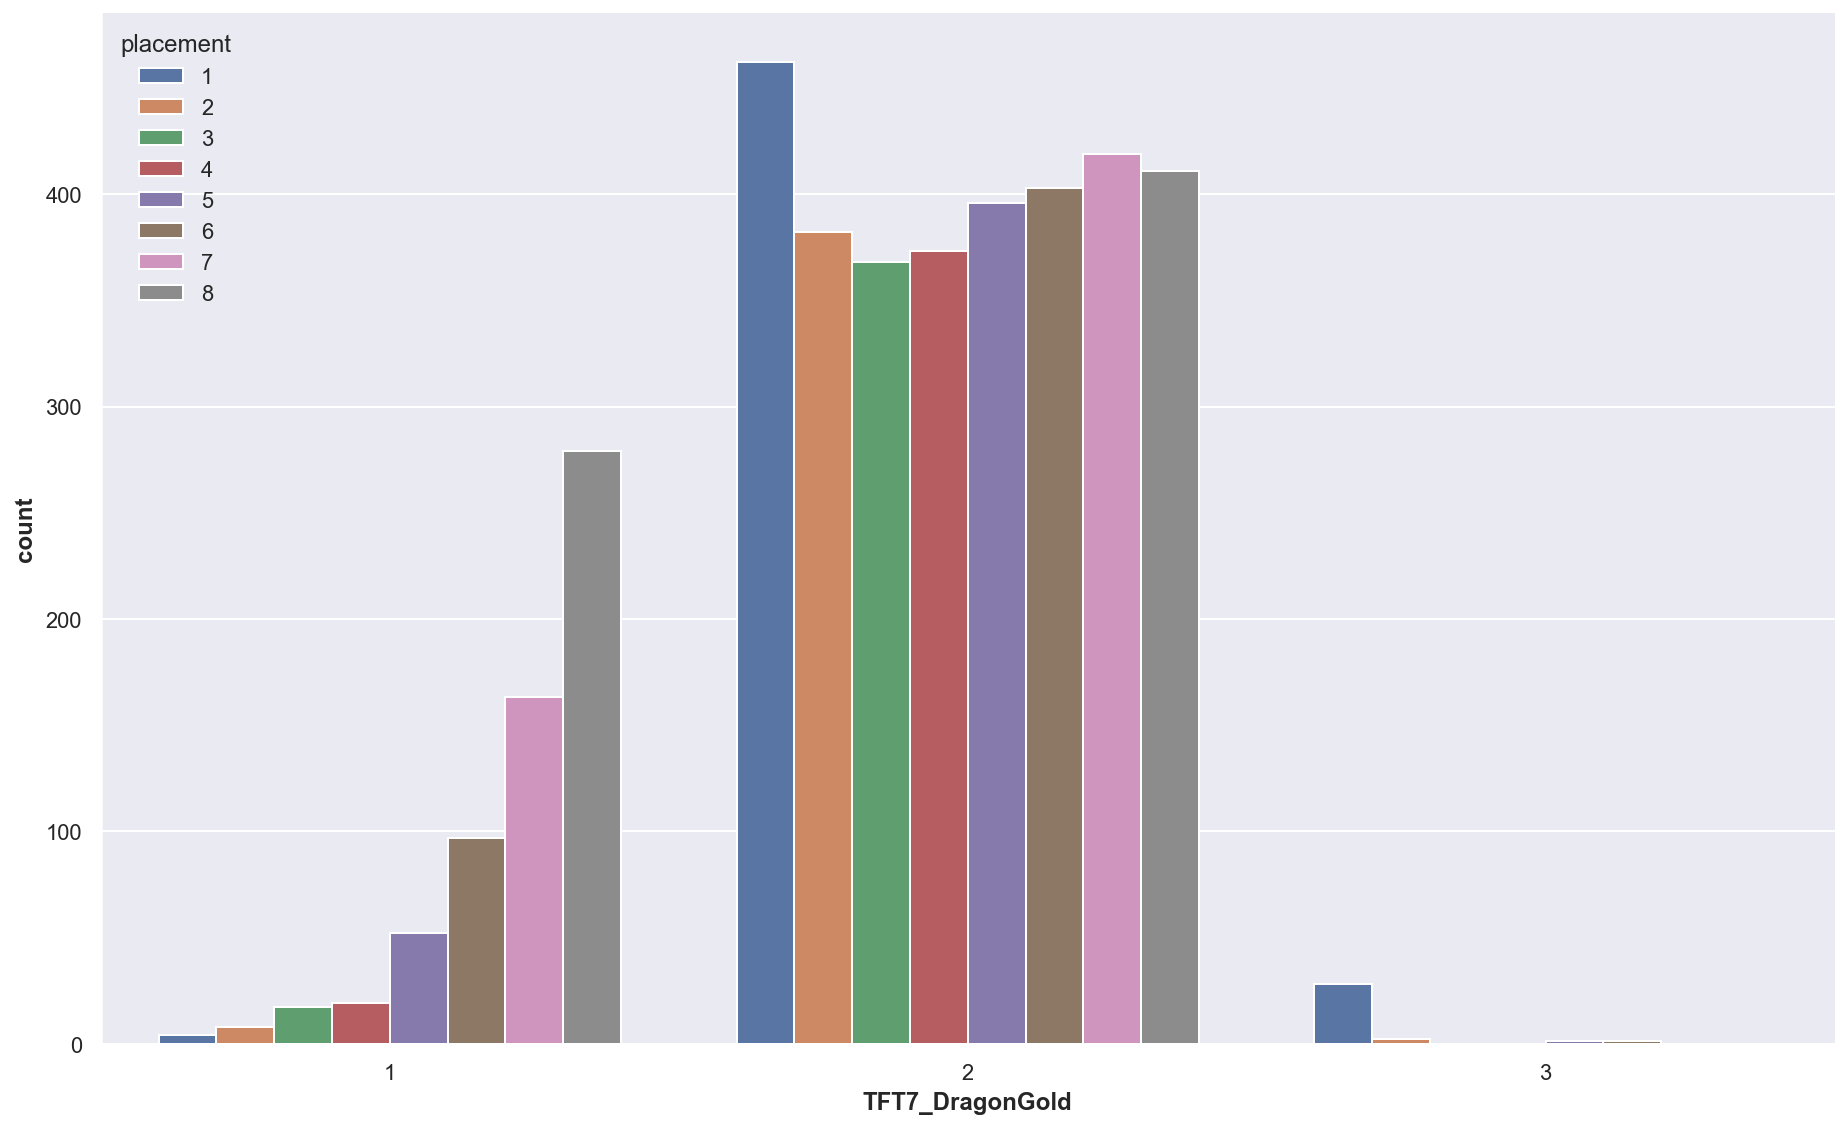

In [82]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']!='ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item1']!='ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item2']!='ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold']>0)], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

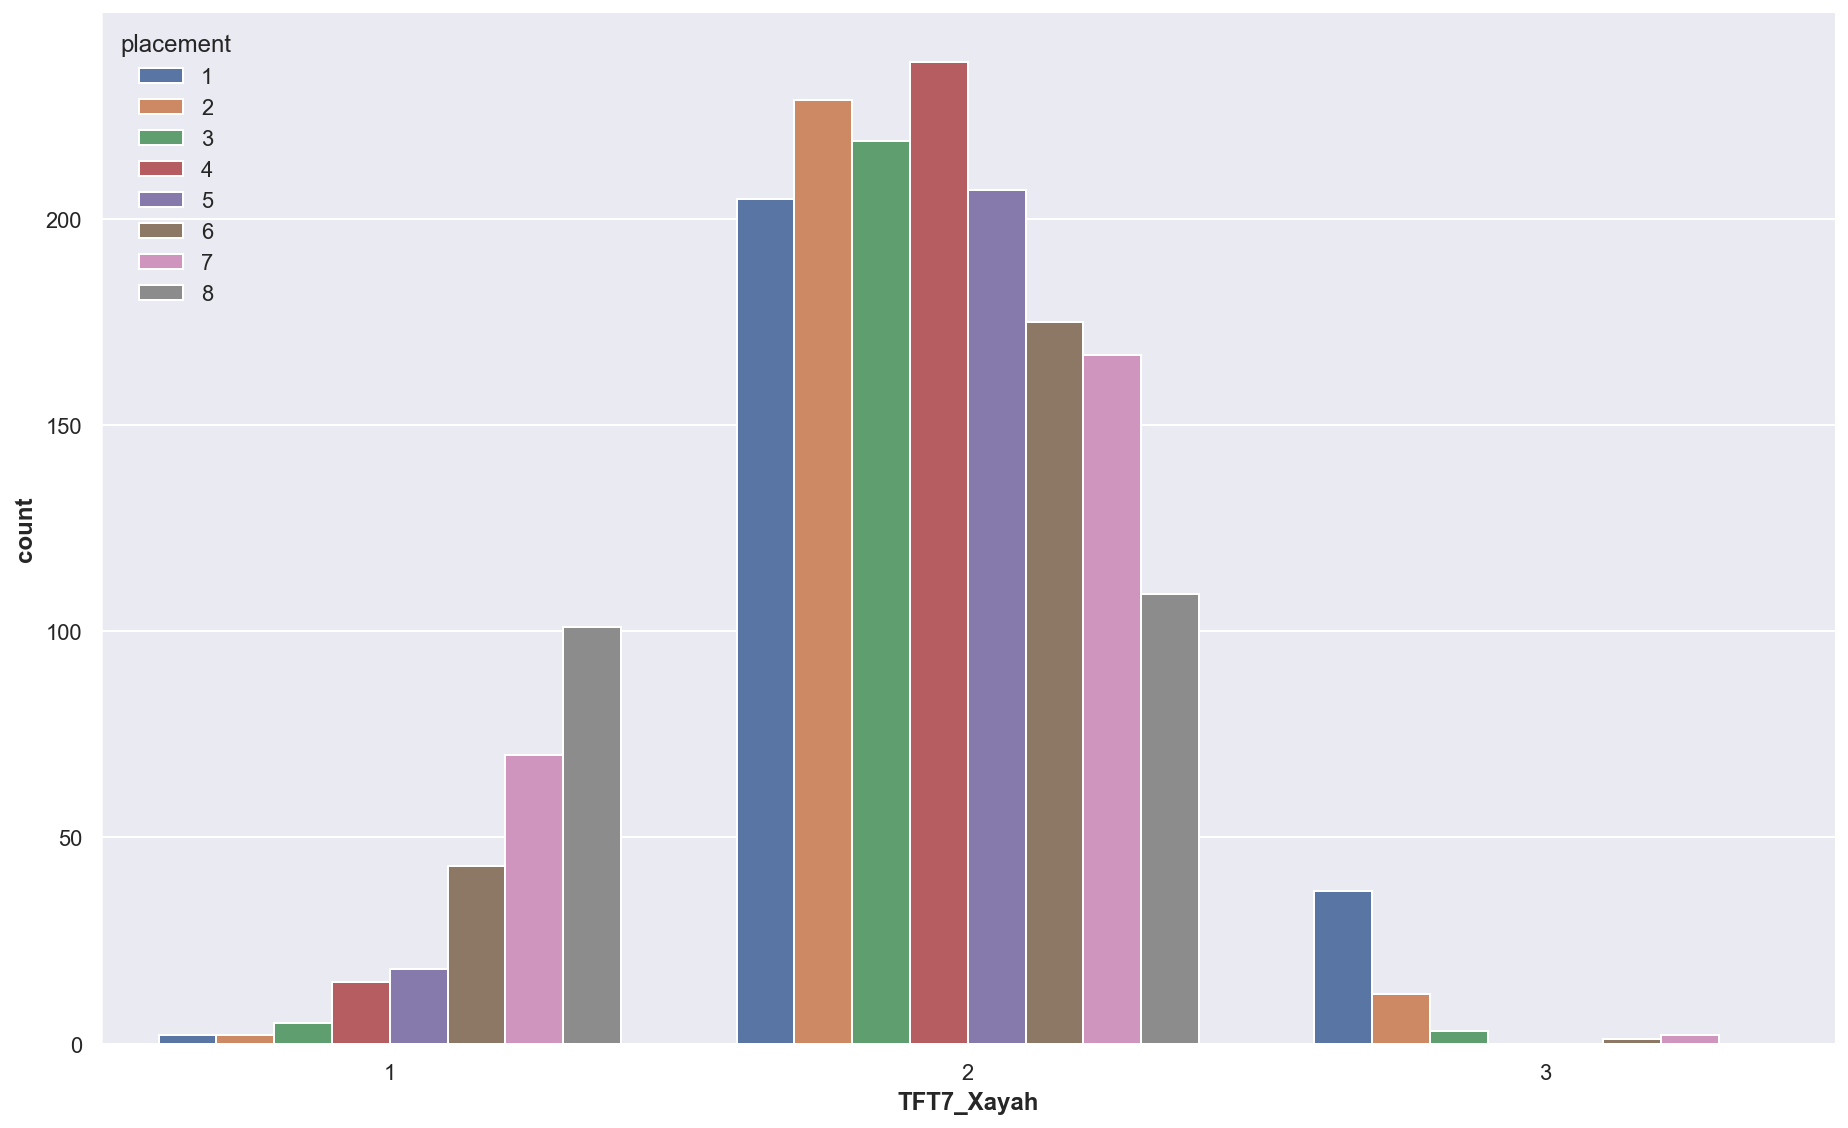

In [83]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']=='Quicksilver') | (matches_df['TFT7_Xayah_item1']=='Quicksilver') | (matches_df['TFT7_Xayah_item2']=='Quicksilver')], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Without Quicksilver.

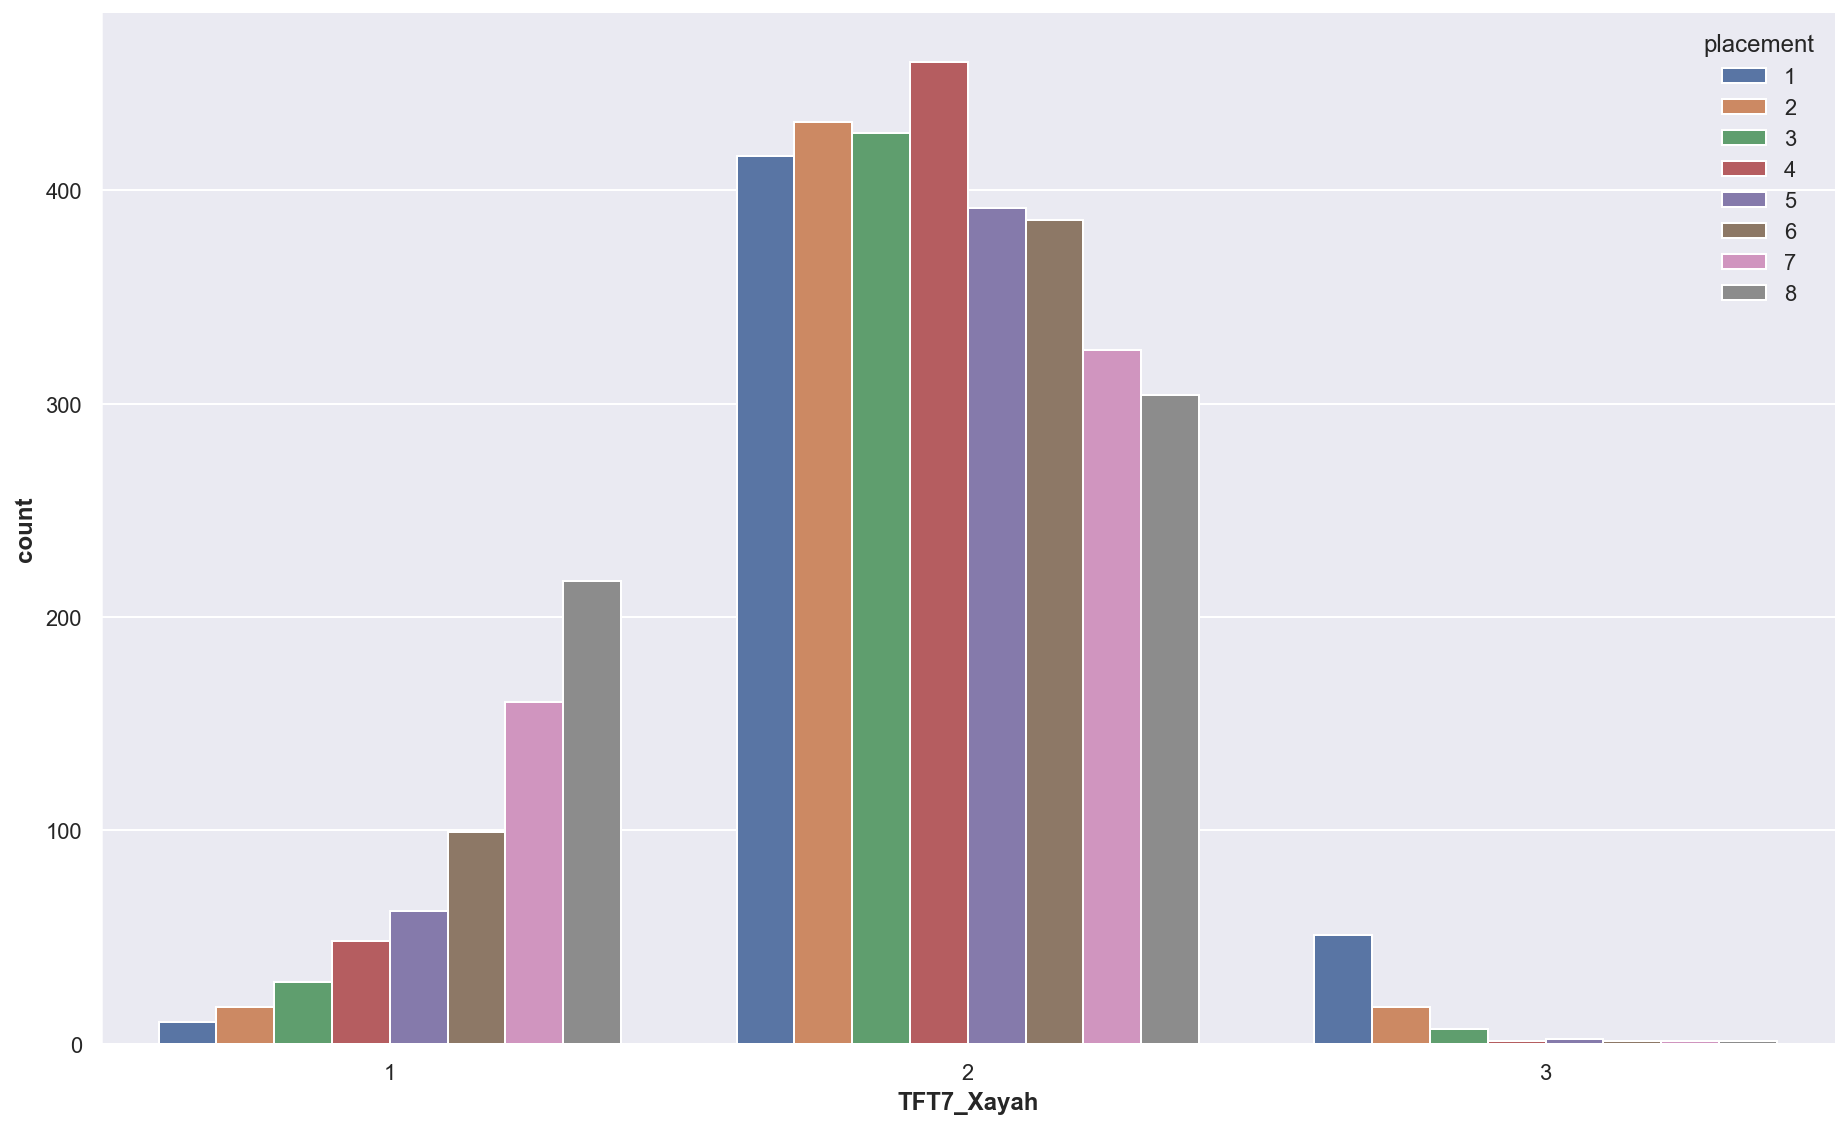

In [84]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']!='Quicksilver') & (matches_df['TFT7_Xayah_item1']!='Quicksilver') & (matches_df['TFT7_Xayah_item2']!='Quicksilver') & (matches_df['TFT7_Xayah']>0)], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

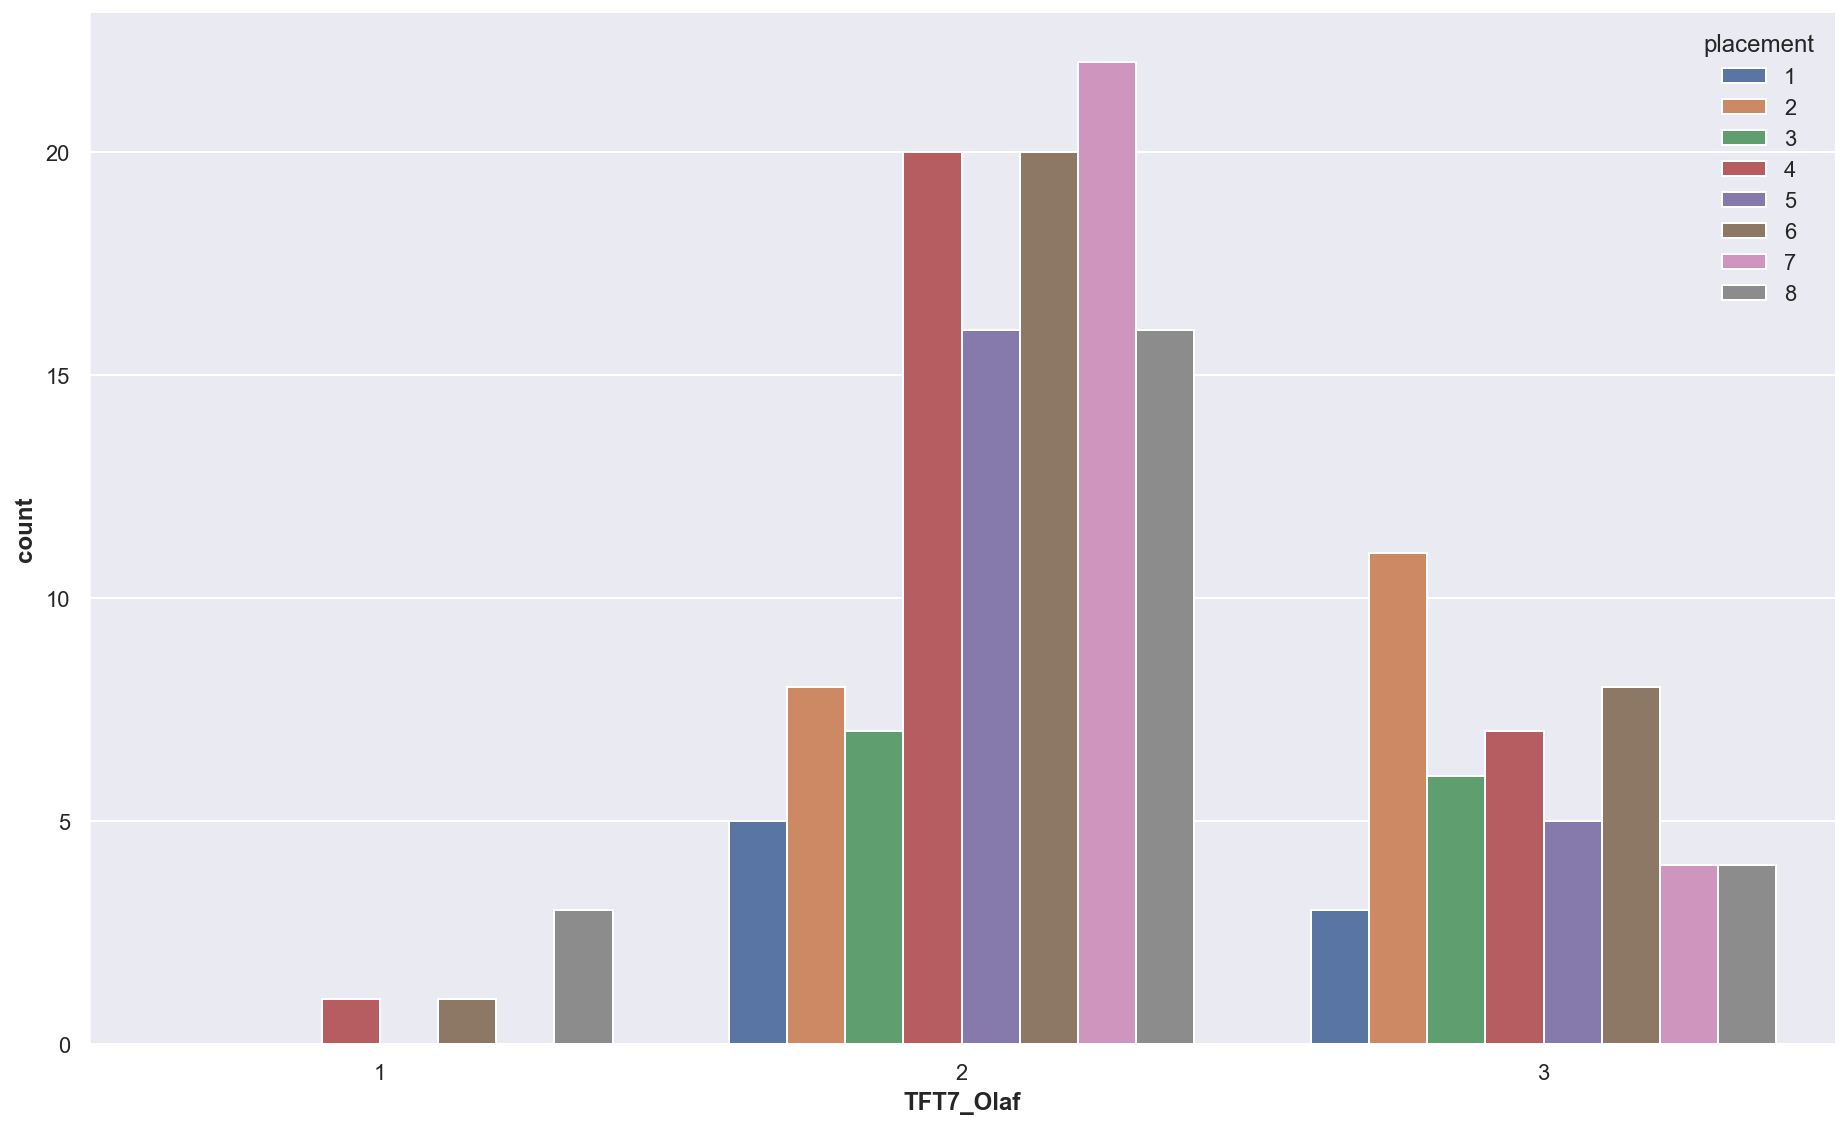

In [85]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']=='GuinsoosRageblade') | (matches_df['TFT7_Olaf_item1']=='GuinsoosRageblade') | (matches_df['TFT7_Olaf_item2']=='GuinsoosRageblade')], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Without GuinsoosRageblade

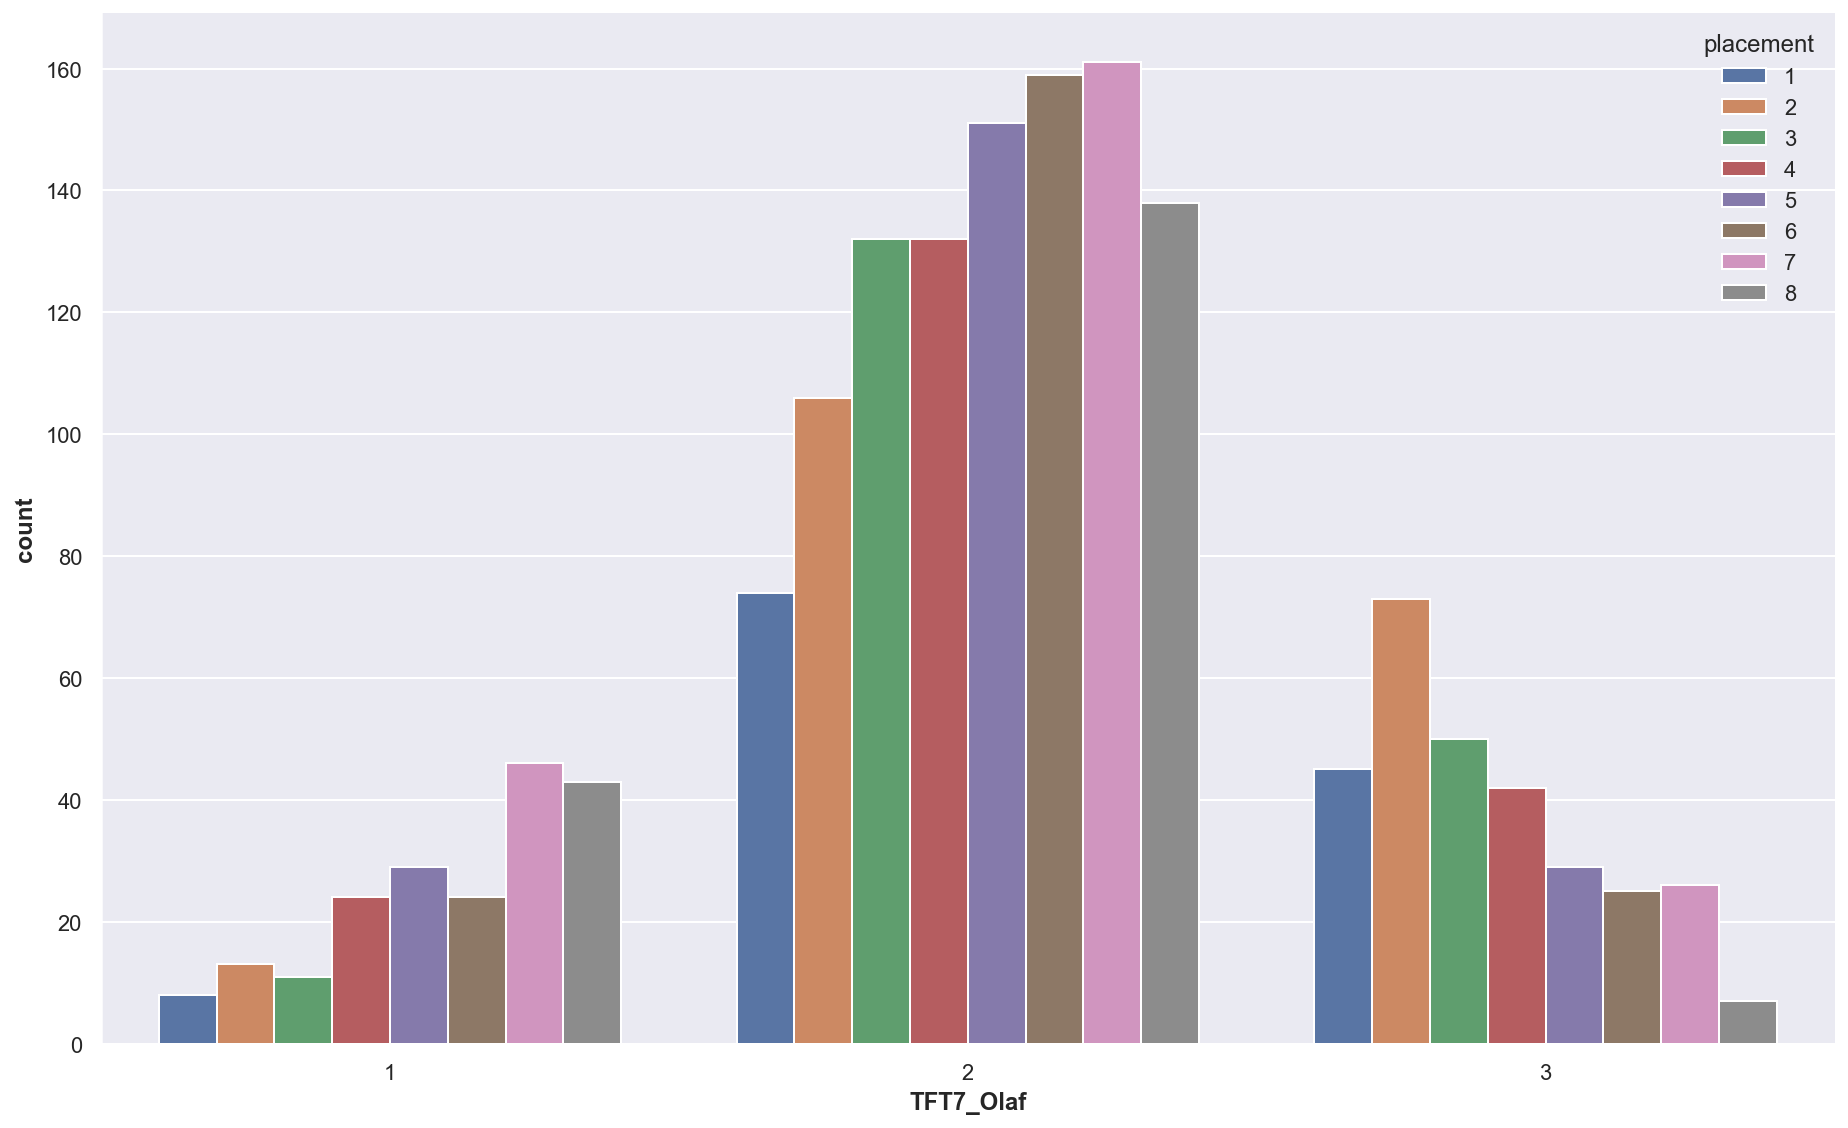

In [86]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']!='GuinsoosRageblade') & (matches_df['TFT7_Olaf_item1']!='GuinsoosRageblade') & (matches_df['TFT7_Olaf_item2']!='GuinsoosRageblade')&(matches_df['TFT7_Olaf']>0)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

In [87]:
def get_unit_item_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    m = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2').melt(
        'placement', value_name=f'{unit}_item')
    # group and aggregate mean/median
    dct = {'value_count': (f'{unit}_item', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby(f'{unit}_item', as_index=False).agg(**dct).sort_values(by='average_placement')


In [88]:
TFT7_Olaf_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Olaf')
TFT7_Olaf_item_merged_df[TFT7_Olaf_item_merged_df['value_count']>=10][:35]

TFT7_Olaf_item  value_count  average_placement
13            DragonsClaw           11           3.636364
55                RedBuff           28           3.857143
32  LocketOfTheIronSolari           37           3.891892
18             GiantsBelt           10           4.000000
43      OrnnInfinityForce           13           4.076923
56             Redemption           19           4.105263
65                 Shroud           22           4.227273
19          GuardianAngel           54           4.240741
81                 Zephyr           29           4.241379
74           TitanicHydra           12           4.250000
31            LastWhisper           39           4.307692
80            ZekesHerald           97           4.319588
48            Quicksilver          159           4.389937
72           ThiefsGloves           58           4.413793
58       RunaansHurricane          375           4.429333
75          TitansResolve           77           4.441558
68            StatikkShiv           27           4.481481
40                   None        89226           4.497759
33      MadredsBloodrazor          185           4.518919
52        RapidFireCannon          227           4.528634
77     UnstableConcoction          110           4.545455
11             Deathblade           56           4.553571
26        HextechGunblade           18           4.555556
1      AssassinEmblemItem          497           4.569416
28           InfinityEdge          447           4.574944
47          PowerGauntlet           21           4.714286
16     GargoyleStoneplate           12           4.750000
3           Bloodthirster          213           4.816901
39          NegatronCloak           11           4.818182
23      GuinsoosRageblade          168           5.035714
66         SparringGloves           14           5.142857
78           WarmogsArmor           12           5.250000
5             BrambleVest           13           5.307692
54             RecurveBow           25           5.320000
79     WhispersEmblemItem           21           5.333333

In [89]:
TFT7_Xayah_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Xayah')
TFT7_Xayah_item_merged_df[TFT7_Xayah_item_merged_df['value_count']>=20][:35]

TFT7_Xayah_item  value_count  average_placement
13     DragonmancerEmblemItem           33           3.818182
26            HextechGunblade           52           3.846154
45          OrnnInfinityForce          148           3.878378
31            JeweledGauntlet           25           3.960000
86                ZekesHerald           96           4.010417
48           OrnnTheCollector           72           4.083333
54            RapidFireCannon          128           4.117188
78               ThiefsGloves           49           4.244898
19              GuardianAngel          257           4.252918
74                StatikkShiv          244           4.262295
60           RunaansHurricane          467           4.297645
37          MadredsBloodrazor         3438           4.380745
11                 Deathblade          671           4.390462
33                LastWhisper          303           4.412541
51                Quicksilver         1860           4.416667
22          GuinsoosRageblade         4380           4.452055
82         UnstableConcoction          849           4.453475
21            GuildEmblemItem          395           4.458228
27               InfinityEdge         1060           4.496226
43                       None        76795           4.512208
80              TitansResolve          124           4.516129
67     ShimmerscaleEmblemItem           36           4.611111
4               Bloodthirster          149           4.644295
46        OrnnObsidianCleaver           33           4.666667
85         WhispersEmblemItem           22           4.727273
50              PowerGauntlet           38           4.763158
66     ShimmerscaleDravensAxe          272           4.871324
68  ShimmerscaleGamblersBlade          107           5.355140
3                     BFSword           41           6.170732
56                 RecurveBow           34           6.558824

In [90]:
TFT7_Corki_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Corki')
TFT7_Corki_item_merged_df[TFT7_Corki_item_merged_df['value_count']>=20][:35]

TFT7_Corki_item  value_count  average_placement
88                   ZekesHerald           73           3.739726
81                  ThiefsGloves           35           3.800000
77                   StatikkShiv          313           3.872204
61              RunaansHurricane          397           3.881612
67      ShimmerscaleDiamondHands           27           4.074074
21                 GuardianAngel          140           4.100000
56               RapidFireCannon           72           4.125000
46             OrnnInfinityForce          110           4.263636
84            UnstableConcoction         1078           4.317254
28               HextechGunblade          171           4.380117
34               JeweledGauntlet           59           4.389831
35                   LastWhisper          768           4.462240
30                  InfinityEdge         1465           4.472355
49              OrnnTheCollector           63           4.492063
44                          None        81418           4.498612
52                   Quicksilver          342           4.520468
12                    Deathblade          629           4.580286
25             GuinsoosRageblade         2066           4.598742
68        ShimmerscaleDravensAxe          364           4.656593
48           OrnnObsidianCleaver           44           4.681818
38             MadredsBloodrazor         1908           4.700734
64                SeraphsEmbrace          119           4.714286
82                 TitansResolve           70           4.728571
76                 SpearOfShojin           85           4.729412
16              EvokerEmblemItem           31           4.741935
5                  Bloodthirster          160           4.743750
0                ArchangelsStaff           24           4.750000
70     ShimmerscaleGamblersBlade          124           5.137097
71  ShimmerscaleGoldmancersStaff           47           5.212766
54              RabadonsDeathcap           22           5.681818
58                    RecurveBow           26           6.076923

In [91]:
TFT7_Shyvana_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Shyvana')
TFT7_Shyvana_item_merged_df[TFT7_Shyvana_item_merged_df['value_count']>=10][:25]

TFT7_Shyvana_item  value_count  average_placement
11             Deathblade           11           2.727273
32  LocketOfTheIronSolari           13           2.769231
64                 Shroud           25           3.040000
26             IonicSpark          149           3.067114
74           TitanicHydra           18           3.111111
49            Quicksilver           61           3.245902
10                Chalice           13           3.307692
29        JeweledGauntlet           96           3.312500
35         Morellonomicon          108           3.324074
6             BrambleVest           82           3.341463
50       RabadonsDeathcap           91           3.351648
75          TitansResolve          159           3.484277
19          GuardianAngel           58           3.534483
33      MadredsBloodrazor           89           3.561798
23      GuinsoosRageblade           50           3.620000
48          PowerGauntlet           17           3.647059
0         ArchangelsStaff          123           3.666667
15            FrozenHeart          209           3.688995
13            DragonsClaw          131           3.709924
5           Bloodthirster          136           3.742647
72           ThiefsGloves          109           3.761468
77     UnstableConcoction          148           3.824324
24        HextechGunblade           89           3.865169
51        RapidFireCannon           15           4.000000
8      CavalierEmblemItem           29           4.000000

In [92]:
TFT7_DragonBlue_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonBlue')
TFT7_DragonBlue_item_merged_df[TFT7_DragonBlue_item_merged_df['value_count']>=10][:25]

TFT7_DragonBlue_item  value_count  average_placement
84            WhispersEmblemItem           20           2.900000
57               RevelEmblemItem          208           3.524038
48            OrnnZhonyasParadox           32           3.625000
77                  ThiefsGloves           19           3.842105
44             OrnnInfinityForce           41           3.975610
38                Morellonomicon           61           3.983607
80                 TitansResolve           49           4.142857
22               GuildEmblemItem           27           4.148148
49                   Quicksilver          400           4.160000
26               HextechGunblade          219           4.200913
51              RabadonsDeathcap          286           4.209790
46           OrnnObsidianCleaver           11           4.272727
71                   StatikkShiv          520           4.328846
12                    Deathblade           10           4.400000
0                ArchangelsStaff         1358           4.407953
47              OrnnTheCollector           16           4.437500
81            UnstableConcoction          517           4.448743
36             MadredsBloodrazor         1178           4.488115
42                          None        83899           4.503224
23             GuinsoosRageblade         1059           4.506138
65  ShimmerscaleGoldmancersStaff           34           4.617647
31               JeweledGauntlet         1176           4.620748
20                 GuardianAngel           57           4.649123
5                  Bloodthirster           89           4.651685
53               RapidFireCannon           88           4.738636

In [93]:
TFT7_DragonPurple_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_item_merged_df[TFT7_DragonPurple_item_merged_df['value_count']>=10][:25]

TFT7_DragonPurple_item  value_count  average_placement
44            Morellonomicon           16           3.375000
93      TitansResolveRadiant           21           3.428571
74  ShimmerscaleDiamondHands           11           3.454545
31      HandOfJusticeRadiant           12           3.500000
23        GiantSlayerRadiant           12           3.500000
83             SpearOfShojin           21           3.571429
73            SeraphsEmbrace           25           3.600000
12                   Chalice           19           3.631579
58          OrnnTheCollector           34           3.647059
53         OrnnInfinityForce          192           3.697917
37           JeweledGauntlet           44           3.750000
32           HextechGunblade          204           3.955882
61               Quicksilver         1613           3.977061
28           GuildEmblemItem           60           3.983333
57   OrnnRocketPropelledFist           11           4.000000
51        OrnnDeathsDefiance          194           4.030928
86       SwiftshotEmblemItem           59           4.050847
94        UnstableConcoction         1909           4.080671
91              TitanicHydra           36           4.083333
60             PowerGauntlet           22           4.090909
16               DragonsClaw          220           4.122727
19               FrozenHeart          341           4.129032
13                Deathblade          221           4.135747
84               StatikkShiv           28           4.142857
41         MadredsBloodrazor         1375           4.173091

In [94]:
pd.options.display.max_colwidth = 100

In [95]:
def get_unit_items_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    df = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')
    df[f'unit'] = f'{unit}' # fill in current unit
    # join 3 items to 1 column
    df[f'{unit}_items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)
    # sort items for unique combination
    df[f'{unit}_items'] = df[f'{unit}_items'].apply(lambda x: ', '.join(sorted(x.split(', '))))
    m = df.melt(
        ['placement',f'unit'], value_name=f'{unit}_items_grp') #, value_vars=[f'{unit}_items', f'{unit}']
    # group and aggregate mean/median average_placement
    dct = {'value_count': (f'{unit}_items_grp', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby([f'unit', f'{unit}_items_grp'], as_index=False).agg(**dct).sort_values(by='average_placement')

In [96]:
# Get top5 
top5_list = []
for unit in units_col:
    df = get_unit_items_ranking(df = matches_df, unit=unit)
    df = df[df['value_count']>=12][:5] #Top 5 with counts >= 12
    top5_list.extend(df.values)

In [97]:
top5_df = pd.DataFrame(top5_list, columns=['unit', 'items',	'value_count',	'average_placement'])

## Top items combination per champion

In [98]:
top5_df.groupby('unit').head(1)

unit  \
0           TFT7_Aatrox   
5           TFT7_Anivia   
10          TFT7_AoShin   
15            TFT7_Ashe   
20     TFT7_AurelionSol   
25            TFT7_Bard   
30           TFT7_Braum   
35           TFT7_Corki   
40           TFT7_Diana   
45      TFT7_DragonBlue   
50      TFT7_DragonGold   
55     TFT7_DragonGreen   
60    TFT7_DragonPurple   
65           TFT7_Elise   
70          TFT7_Ezreal   
75            TFT7_Gnar   
80         TFT7_Hecarim   
85    TFT7_Heimerdinger   
90          TFT7_Illaoi   
95            TFT7_Jinx   
100          TFT7_Karma   
105           TFT7_Kayn   
110         TFT7_LeeSin   
115          TFT7_Leona   
120         TFT7_Lillia   
125           TFT7_Lulu   
130           TFT7_Nami   
135          TFT7_Neeko   
140        TFT7_Nidalee   
145           TFT7_Nunu   
150           TFT7_Olaf   
155           TFT7_Ornn   
160           TFT7_Pyke   
165         TFT7_Qiyana   
170           TFT7_Ryze   
175        TFT7_Sejuani   
180          TFT7_Senna   
184           TFT7_Sett   
189           TFT7_Shen   
194        TFT7_Shyvana   
199        TFT7_Skarner   
204           TFT7_Sona   
209         TFT7_Soraka   
214          TFT7_Swain   
219          TFT7_Sylas   
224      TFT7_TahmKench   
229          TFT7_Talon   
234          TFT7_Taric   
239         TFT7_Thresh   
244  TFT7_TrainerDragon   
248       TFT7_Tristana   
253         TFT7_Twitch   
258          TFT7_Varus   
263       TFT7_Vladimir   
268       TFT7_Volibear   
273          TFT7_Xayah   
278          TFT7_Yasuo   
283           TFT7_Yone   
288            TFT7_Zoe   

                                                        items  value_count  \
0                                                      Zephyr           17   
5           ArchangelsStaff, Morellonomicon, RabadonsDeathcap           17   
10        GuinsoosRageblade, MadredsBloodrazor, SpearOfShojin           12   
15                                            HextechGunblade           14   
20                                           RabadonsDeathcap           15   
25                                                    RedBuff           26   
30                                          BruiserEmblemItem           13   
35         InfinityEdge, RunaansHurricane, UnstableConcoction           23   
40                                                LastWhisper           15   
45            GuinsoosRageblade, Quicksilver, RevelEmblemItem           48   
50   GargoyleStoneplate, Redemption, ShimmerscaleDiamondHands           14   
55       GuardianAngel, MadredsBloodrazor, OrnnDeathsDefiance           12   
60             Bloodthirster, Quicksilver, UnstableConcoction           16   
65                                  None, None, PowerGauntlet           15   
70                                           RunaansHurricane           12   
75                                    DragonsClaw, None, None           15   
80                                   None, None, ThiefsGloves           21   
85                                           TearOfTheGoddess           12   
90                   FrozenHeart, GargoyleStoneplate, RedBuff           17   
95                                                StatikkShiv          111   
100                                 ForceOfNature, None, None           12   
105                                               LastWhisper           22   
110                                  None, None, TitanicHydra           17   
115                                        None, None, Shroud           27   
120                                     LocketOfTheIronSolari           32   
125                                              InfinityEdge           14   
130                                          RunaansHurricane           16   
135                         IonicSpark, RedBuff, TitanicHydra           13   
140         GuinsoosRageblade, OrnnInfinityForce, Quicksilver           13   
145                        DragonsClaw, RedBuff, WarmogsAr

In [99]:
TFT7_Corki_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Corki')
TFT7_Corki_items_merged_df[TFT7_Corki_items_merged_df['value_count']>4][:20]

unit                                       TFT7_Corki_items_grp  \
567  TFT7_Corki  GuinsoosRageblade, UnstableConcoction, UnstableConcoction   
524  TFT7_Corki           GuinsoosRageblade, Quicksilver, RunaansHurricane   
802  TFT7_Corki               LastWhisper, StatikkShiv, UnstableConcoction   
497  TFT7_Corki                  GuinsoosRageblade, None, RunaansHurricane   
948  TFT7_Corki                                    None, None, StatikkShiv   
695  TFT7_Corki        InfinityEdge, OrnnInfinityForce, UnstableConcoction   
153  TFT7_Corki               Deathblade, GuardianAngel, GuinsoosRageblade   
449  TFT7_Corki           GuinsoosRageblade, LastWhisper, RunaansHurricane   
722  TFT7_Corki         InfinityEdge, RunaansHurricane, UnstableConcoction   
368  TFT7_Corki                                         GuardianEmblemItem   
344  TFT7_Corki            GuardianAngel, InfinityEdge, UnstableConcoction   
662  TFT7_Corki         InfinityEdge, MadredsBloodrazor, OrnnInfinityForce   
685  TFT7_Corki                                   InfinityEdge, None, None   
420  TFT7_Corki          GuinsoosRageblade, InfinityEdge, RunaansHurricane   
539  TFT7_Corki    GuinsoosRageblade, RunaansHurricane, UnstableConcoction   
469  TFT7_Corki  GuinsoosRageblade, MadredsBloodrazor, OrnnObsidianCleaver   
911  TFT7_Corki         MadredsBloodrazor, StatikkShiv, UnstableConcoction   
219  TFT7_Corki           Deathblade, MadredsBloodrazor, MadredsBloodrazor   
428  TFT7_Corki               GuinsoosRageblade, InfinityEdge, StatikkShiv   
406  TFT7_Corki     GuinsoosRageblade, HextechGunblade, UnstableConcoction   

     value_count  average_placement  
567            8           2.375000  
524            5           2.600000  
802            5           2.600000  
497            5           2.600000  
948            8           3.000000  
695            8           3.000000  
153            7           3.142857  
449           11           3.181818  
722           23           3.217391  
368            5           3.400000  
344            5           3.400000  
662           10           3.400000  
685            7           3.428571  
420           15           3.466667  
539           17           3.470588  
469           10           3.500000  
911            8           3.500000  
219            6           3.500000  
428           17           3.588235  
406            5           3.600000

In [100]:
TFT7_Xayah_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Xayah')
TFT7_Xayah_items_merged_df[TFT7_Xayah_items_merged_df['value_count']>4][:20]

unit                                      TFT7_Xayah_items_grp  \
135  TFT7_Xayah                                                   Chalice   
201  TFT7_Xayah               Deathblade, InfinityEdge, MadredsBloodrazor   
840  TFT7_Xayah      MadredsBloodrazor, TitansResolve, UnstableConcoction   
658  TFT7_Xayah        InfinityEdge, MadredsBloodrazor, OrnnInfinityForce   
736  TFT7_Xayah        LastWhisper, MadredsBloodrazor, UnstableConcoction   
960  TFT7_Xayah                              ShimmerscaleCrownOfChampions   
389  TFT7_Xayah    GuildEmblemItem, MadredsBloodrazor, UnstableConcoction   
202  TFT7_Xayah                            Deathblade, InfinityEdge, None   
466  TFT7_Xayah          GuinsoosRageblade, LastWhisper, RunaansHurricane   
432  TFT7_Xayah         GuinsoosRageblade, InfinityEdge, OrnnTheCollector   
480  TFT7_Xayah  GuinsoosRageblade, MadredsBloodrazor, OrnnDeathsDefiance   
579  TFT7_Xayah          GuinsoosRageblade, RunaansHurricane, StatikkShiv   
223  TFT7_Xayah           Deathblade, MadredsBloodrazor, RunaansHurricane   
803  TFT7_Xayah           MadredsBloodrazor, Quicksilver, RapidFireCannon   
545  TFT7_Xayah          GuinsoosRageblade, OrnnTheCollector, Quicksilver   
790  TFT7_Xayah         MadredsBloodrazor, OrnnInfinityForce, Quicksilver   
869  TFT7_Xayah                                        None, None, Shroud   
404  TFT7_Xayah         GuinsoosRageblade, GuinsoosRageblade, Quicksilver   
535  TFT7_Xayah         GuinsoosRageblade, OrnnInfinityForce, Quicksilver   
907  TFT7_Xayah                                        OrnnDeathsDefiance   

     value_count  average_placement  
135           16           2.812500  
201            6           2.833333  
840            5           3.000000  
658            7           3.000000  
736            6           3.166667  
960           13           3.230769  
389            7           3.285714  
202            6           3.333333  
466            6           3.333333  
432           14           3.357143  
480           11           3.363636  
579            5           3.400000  
223           11           3.454545  
803            6           3.500000  
545           16           3.562500  
790            7           3.571429  
869            5           3.600000  
404            8           3.625000  
535           22           3.636364  
907           15           3.666667

In [101]:
TFT7_DragonPurple_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_items_merged_df[TFT7_DragonPurple_items_merged_df['value_count']>4][:20]

unit  \
1319  TFT7_DragonPurple   
556   TFT7_DragonPurple   
1693  TFT7_DragonPurple   
828   TFT7_DragonPurple   
1552  TFT7_DragonPurple   
1289  TFT7_DragonPurple   
465   TFT7_DragonPurple   
1526  TFT7_DragonPurple   
1680  TFT7_DragonPurple   
820   TFT7_DragonPurple   
484   TFT7_DragonPurple   
542   TFT7_DragonPurple   
550   TFT7_DragonPurple   
1554  TFT7_DragonPurple   
260   TFT7_DragonPurple   
794   TFT7_DragonPurple   
1735  TFT7_DragonPurple   
325   TFT7_DragonPurple   
460   TFT7_DragonPurple   
1420  TFT7_DragonPurple   

                                    TFT7_DragonPurple_items_grp  value_count  \
1319            HextechGunblade, MadredsBloodrazor, Quicksilver            5   
556                  Bloodthirster, RedBuff, UnstableConcoction            5   
1693         OrnnInfinityForce, Quicksilver, UnstableConcoction            5   
828               DragonsClaw, GargoyleStoneplate, WarmogsArmor            6   
1552          MadredsBloodrazor, RunaansHurricane, ThiefsGloves            6   
1289  GuinsoosRageblade, UnstableConcoction, UnstableConcoction            6   
465         Bloodthirster, MadredsBloodrazor, OrnnInfinityForce            5   
1526       MadredsBloodrazor, OrnnDeathsDefiance, TitansResolve            5   
1680             OrnnDeathsDefiance, Quicksilver, TitansResolve            5   
820                           DragonsClaw, FrozenHeart, RedBuff            5   
484                  Bloodthirster, MageEmblemItem, Quicksilver            5   
542              Bloodthirster, Quicksilver, UnstableConcoction           16   
550          Bloodthirster, RapidFireCannon, UnstableConcoction           11   
1554    MadredsBloodrazor, RunaansHurricane, UnstableConcoction            6   
260                     Bloodthirster, Deathblade, InfinityEdge            6   
794                 Deathblade, Quicksilver, UnstableConcoction            6   
1735               Quicksilver, RunaansHurricane, TitansResolve            6   
325            Bloodthirster, GargoyleStoneplate, TitansResolve            7   
460         Bloodthirster, MadredsBloodrazor, MadredsBloodrazor            6   
1420                        InfinityEdge, RedBuff, ThiefsGloves            5   

      average_placement  
1319           1.600000  
556            2.000000  
1693           2.000000  
828            2.166667  
1552           2.166667  
1289           2.166667  
465            2.200000  
1526           2.400000  
1680           2.400000  
820            2.600000  
484            2.800000  
542            2.812500  
550            2.818182  
1554           2.833333  
260            2.833333  
794            2.833333  
1735           2.833333  
325            2.857143  
460            3.000000  
1420           3.000000

In [102]:
TFT7_DragonBlue_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonBlue')
TFT7_DragonBlue_items_merged_df[TFT7_DragonBlue_items_merged_df['value_count']>4][:20]

unit  \
495  TFT7_DragonBlue   
1    TFT7_DragonBlue   
90   TFT7_DragonBlue   
455  TFT7_DragonBlue   
709  TFT7_DragonBlue   
787  TFT7_DragonBlue   
844  TFT7_DragonBlue   
468  TFT7_DragonBlue   
440  TFT7_DragonBlue   
19   TFT7_DragonBlue   
362  TFT7_DragonBlue   
691  TFT7_DragonBlue   
177  TFT7_DragonBlue   
91   TFT7_DragonBlue   
560  TFT7_DragonBlue   
582  TFT7_DragonBlue   
146  TFT7_DragonBlue   
611  TFT7_DragonBlue   
556  TFT7_DragonBlue   
807  TFT7_DragonBlue   

                                     TFT7_DragonBlue_items_grp  value_count  \
495  GuinsoosRageblade, UnstableConcoction, WhispersEmblemItem            5   
1            ArchangelsStaff, ArchangelsStaff, ArchangelsStaff            5   
90           ArchangelsStaff, HextechGunblade, JeweledGauntlet            8   
455            GuinsoosRageblade, Quicksilver, RevelEmblemItem           48   
709            MadredsBloodrazor, RapidFireCannon, StatikkShiv            5   
787                  Quicksilver, RevelEmblemItem, StatikkShiv           14   
844                                         WhispersEmblemItem           20   
468           GuinsoosRageblade, RabadonsDeathcap, StatikkShiv            6   
440                   GuinsoosRageblade, None, RevelEmblemItem            5   
19               ArchangelsStaff, ArchangelsStaff, StatikkShiv           12   
362      GuinsoosRageblade, HextechGunblade, MadredsBloodrazor           12   
691           MadredsBloodrazor, Quicksilver, RabadonsDeathcap            5   
177                  ArchangelsStaff, Quicksilver, StatikkShiv           11   
91         ArchangelsStaff, HextechGunblade, MadredsBloodrazor           13   
560          InfinityEdge, JeweledGauntlet, OrnnZhonyasParadox            6   
582        InfinityEdge, MadredsBloodrazor, UnstableConcoction            6   
146       ArchangelsStaff, MadredsBloodrazor, RabadonsDeathcap           17   
611      JeweledGauntlet, MadredsBloodrazor, MadredsBloodrazor            7   
556           InfinityEdge, JeweledGauntlet, OrnnInfinityForce            8   
807                                            RevelEmblemItem          208   

     average_placement  
495           1.800000  
1             2.600000  
90            2.750000  
455           2.770833  
709           2.800000  
787           2.857143  
844           2.900000  
468           3.000000  
440           3.000000  
19            3.166667  
362           3.166667  
691           3.200000  
177           3.272727  
91            3.307692  
560           3.333333  
582           3.333333  
146           3.352941  
611           3.428571  
556           3.500000  
807           3.524038

In [103]:
TFT7_DragonGreen_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonGreen')
TFT7_DragonGreen_items_merged_df[TFT7_DragonGreen_items_merged_df['value_count']>4][:20]

unit                             TFT7_DragonGreen_items_grp  \
1435  TFT7_DragonGreen                               None, None, ThiefsGloves   
1010  TFT7_DragonGreen  GuardianAngel, UnstableConcoction, UnstableConcoction   
669   TFT7_DragonGreen           Deathblade, MadredsBloodrazor, TitansResolve   
1309  TFT7_DragonGreen                  LastWhisper, Redemption, ThiefsGloves   
434   TFT7_DragonGreen         Bloodthirster, OrnnTheCollector, TitansResolve   
1361  TFT7_DragonGreen      MadredsBloodrazor, RapidFireCannon, TitansResolve   
165   TFT7_DragonGreen              Bloodthirster, BrambleVest, TitansResolve   
242   TFT7_DragonGreen       Bloodthirster, GargoyleStoneplate, TitansResolve   
198   TFT7_DragonGreen          Bloodthirster, Deathblade, UnstableConcoction   
907   TFT7_DragonGreen          GuardianAngel, HextechGunblade, TitansResolve   
943   TFT7_DragonGreen   GuardianAngel, MadredsBloodrazor, OrnnDeathsDefiance   
693   TFT7_DragonGreen          Deathblade, TitansResolve, UnstableConcoction   
323   TFT7_DragonGreen          Bloodthirster, HextechGunblade, TitansResolve   
1382  TFT7_DragonGreen         MadredsBloodrazor, ThiefsGloves, TitansResolve   
54    TFT7_DragonGreen        AssassinEmblemItem, GuardianAngel, InfinityEdge   
1237  TFT7_DragonGreen           InfinityEdge, RapidFireCannon, TitansResolve   
1318  TFT7_DragonGreen                                  LocketOfTheIronSolari   
1260  TFT7_DragonGreen                                    InfinityEdgeRadiant   
720   TFT7_DragonGreen                     DragonmancerEmblemItem, None, None   
60    TFT7_DragonGreen    AssassinEmblemItem, GuinsoosRageblade, InfinityEdge   

      value_count  average_placement  
1435            5           1.000000  
1010            7           2.142857  
669             5           2.200000  
1309            6           2.333333  
434             5           2.400000  
1361            6           2.666667  
165            10           2.700000  
242             7           2.714286  
198             8           2.750000  
907            10           2.800000  
943            12           2.916667  
693             7           3.000000  
323             6           3.000000  
1382            5           3.000000  
54              8           3.000000  
1237            5           3.000000  
1318           16           3.125000  
1260            8           3.125000  
720             7           3.142857  
60              9           3.222222

In [104]:
TFT7_Varus_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Varus')
TFT7_Varus_items_merged_df[TFT7_Varus_items_merged_df['value_count']>4][:20]

unit                                     TFT7_Varus_items_grp  \
390  TFT7_Varus                                   ShimmerscaleDravensAxe   
245  TFT7_Varus         GuinsoosRageblade, RunaansHurricane, StatikkShiv   
414  TFT7_Varus                                              ZekesHerald   
158  TFT7_Varus  GuinsoosRageblade, GuinsoosRageblade, MadredsBloodrazor   
261  TFT7_Varus                                          HextechGunblade   
21   TFT7_Varus             Bloodthirster, Deathblade, GuinsoosRageblade   
166  TFT7_Varus    GuinsoosRageblade, HextechGunblade, MadredsBloodrazor   
413  TFT7_Varus                                       WhispersEmblemItem   
192  TFT7_Varus         GuinsoosRageblade, LastWhisper, RunaansHurricane   
299  TFT7_Varus                                          JeweledGauntlet   
249  TFT7_Varus  GuinsoosRageblade, RunaansHurricane, UnstableConcoction   
28   TFT7_Varus      Bloodthirster, GuinsoosRageblade, MadredsBloodrazor   
50   TFT7_Varus                                                  Chalice   
133  TFT7_Varus                                            GuardianAngel   
210  TFT7_Varus        GuinsoosRageblade, MadredsBloodrazor, StatikkShiv   
367  TFT7_Varus                                            PowerGauntlet   
176  TFT7_Varus             GuinsoosRageblade, InfinityEdge, Quicksilver   
304  TFT7_Varus                                              LastWhisper   
84   TFT7_Varus          Deathblade, GuinsoosRageblade, RunaansHurricane   
400  TFT7_Varus                                              StatikkShiv   

     value_count  average_placement  
390            7           2.285714  
245           13           2.538462  
414           34           2.882353  
158            5           3.000000  
261           31           3.322581  
21             6           3.333333  
166            6           3.333333  
413            8           3.500000  
192           12           3.500000  
299            9           3.555556  
249           57           3.578947  
28             5           3.600000  
50             5           3.600000  
133           26           3.653846  
210            6           3.666667  
367           11           3.727273  
176            8           3.750000  
304           54           3.759259  
84           244           3.774590  
400           74           3.783784

In [105]:
TFT7_Yasuo_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Yasuo')
TFT7_Yasuo_items_merged_df[TFT7_Yasuo_items_merged_df['value_count']>4][:20]

unit                                  TFT7_Yasuo_items_grp  \
2991  TFT7_Yasuo                              None, None, ThiefsGloves   
1026  TFT7_Yasuo      CavalierEmblemItem, GuardianAngel, TitansResolve   
160   TFT7_Yasuo               AssassinEmblemItem, GuardianAngel, None   
182   TFT7_Yasuo   AssassinEmblemItem, HextechGunblade, SeraphsEmbrace   
391   TFT7_Yasuo  Bloodthirster, CavalierEmblemItem, MadredsBloodrazor   
1945  TFT7_Yasuo       GuardianAngel, MadredsBloodrazor, TitansResolve   
113   TFT7_Yasuo        AssassinEmblemItem, Bloodthirster, Quicksilver   
1870  TFT7_Yasuo         GuardianAngel, HextechGunblade, TitansResolve   
1424  TFT7_Yasuo                 Deathblade, StatikkShiv, ThiefsGloves   
3172  TFT7_Yasuo                                   OrnnRanduinsSanctum   
1300  TFT7_Yasuo               Deathblade, GuardianAngel, ThiefsGloves   
1321  TFT7_Yasuo            Deathblade, HextechGunblade, TitansResolve   
2276  TFT7_Yasuo     HextechGunblade, InfinityEdge, UnstableConcoction   
1862  TFT7_Yasuo                  GuardianAngel, HextechGunblade, None   
1022  TFT7_Yasuo     CavalierEmblemItem, GuardianAngel, SeraphsEmbrace   
1998  TFT7_Yasuo        GuardianAngel, Quicksilver, UnstableConcoction   
713   TFT7_Yasuo           Bloodthirster, SeraphsEmbrace, WarmogsArmor   
524   TFT7_Yasuo        Bloodthirster, HextechGunblade, SeraphsEmbrace   
2416  TFT7_Yasuo                 InfinityEdge, MadredsBloodrazor, None   
612   TFT7_Yasuo  Bloodthirster, MadredsBloodrazor, UnstableConcoction   

      value_count  average_placement  
2991           26           1.153846  
1026            6           1.166667  
160             6           1.666667  
182             6           1.666667  
391             9           1.777778  
1945            5           2.000000  
113             5           2.000000  
1870            5           2.000000  
1424            5           2.000000  
3172            8           2.125000  
1300            6           2.166667  
1321            5           2.200000  
2276            5           2.200000  
1862            7           2.285714  
1022            7           2.285714  
1998            6           2.333333  
713             6           2.333333  
524             6           2.333333  
2416            6           2.333333  
612             8           2.375000

In [106]:
TFT7_Nidalee_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Nidalee')
TFT7_Nidalee_items_merged_df[TFT7_Nidalee_items_merged_df['value_count']>4][:20]

unit                                  TFT7_Nidalee_items_grp  \
292  TFT7_Nidalee         MadredsBloodrazor, Quicksilver, RapidFireCannon   
246  TFT7_Nidalee                                         HextechGunblade   
223  TFT7_Nidalee       GuinsoosRageblade, OrnnInfinityForce, Quicksilver   
372  TFT7_Nidalee                                     SwiftshotEmblemItem   
101  TFT7_Nidalee         Deathblade, GuinsoosRageblade, RunaansHurricane   
337  TFT7_Nidalee                                       OrnnInfinityForce   
384  TFT7_Nidalee                                                  Zephyr   
190  TFT7_Nidalee      GuinsoosRageblade, InfinityEdge, MadredsBloodrazor   
275  TFT7_Nidalee                                             LastWhisper   
230  TFT7_Nidalee      GuinsoosRageblade, Quicksilver, UnstableConcoction   
361  TFT7_Nidalee                                              Redemption   
300  TFT7_Nidalee  MadredsBloodrazor, RapidFireCannon, UnstableConcoction   
193  TFT7_Nidalee            GuinsoosRageblade, InfinityEdge, Quicksilver   
38   TFT7_Nidalee           Bloodthirster, GuinsoosRageblade, Quicksilver   
147  TFT7_Nidalee                                       DeathbladeRadiant   
362  TFT7_Nidalee                                        RunaansHurricane   
376  TFT7_Nidalee                                           TitansResolve   
103  TFT7_Nidalee            Deathblade, GuinsoosRageblade, TitansResolve   
135  TFT7_Nidalee               Deathblade, Quicksilver, RunaansHurricane   
145  TFT7_Nidalee        Deathblade, RunaansHurricane, UnstableConcoction   

     value_count  average_placement  
292            6           3.000000  
246            5           3.000000  
223           13           3.461538  
372            7           3.571429  
101           35           3.714286  
337           38           3.736842  
384            5           3.800000  
190            5           3.800000  
275           21           3.904762  
230           26           4.000000  
361            5           4.000000  
300            5           4.000000  
193           32           4.062500  
38            13           4.076923  
147            7           4.142857  
362          217           4.142857  
376           48           4.166667  
103            5           4.200000  
135           53           4.226415  
145            7           4.285714

In [107]:
TFT7_AoShin_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_AoShin')
TFT7_AoShin_items_merged_df[TFT7_AoShin_items_merged_df['value_count']>4][:20]

unit                                   TFT7_AoShin_items_grp  \
468  TFT7_AoShin                                ShimmerscaleDiamondHands   
463  TFT7_AoShin                                         RevelEmblemItem   
174  TFT7_AoShin          Bloodthirster, RabadonsDeathcap, SpearOfShojin   
255  TFT7_AoShin     GuinsoosRageblade, MadredsBloodrazor, SpearOfShojin   
50   TFT7_AoShin   ArchangelsStaff, GuinsoosRageblade, MadredsBloodrazor   
456  TFT7_AoShin     RabadonsDeathcap, SpearOfShojin, UnstableConcoction   
436  TFT7_AoShin                                      OrnnZhonyasParadox   
72   TFT7_AoShin         ArchangelsStaff, HextechGunblade, SpearOfShojin   
132  TFT7_AoShin             ArchangelsStaff, Quicksilver, SpearOfShojin   
388  TFT7_AoShin           MadredsBloodrazor, SpearOfShojin, StatikkShiv   
60   TFT7_AoShin  ArchangelsStaff, GuinsoosRageblade, UnstableConcoction   
324  TFT7_AoShin              InfinityEdge, JeweledGauntlet, StatikkShiv   
458  TFT7_AoShin                                         RapidFireCannon   
187  TFT7_AoShin                                  DragonmancerEmblemItem   
389  TFT7_AoShin    MadredsBloodrazor, SpearOfShojin, UnstableConcoction   
481  TFT7_AoShin                                             StatikkShiv   
106  TFT7_AoShin       ArchangelsStaff, MadredsBloodrazor, SpearOfShojin   
488  TFT7_AoShin                                           TitansResolve   
14   TFT7_AoShin         ArchangelsStaff, ArchangelsStaff, SpearOfShojin   
248  TFT7_AoShin       GuinsoosRageblade, JeweledGauntlet, SpearOfShojin   

     value_count  average_placement  
468            6           2.500000  
463            5           2.800000  
174            6           2.833333  
255           12           2.916667  
50             6           3.000000  
456            8           3.125000  
436           20           3.150000  
72            61           3.163934  
132           11           3.181818  
388            5           3.200000  
60             8           3.250000  
324            5           3.400000  
458           15           3.400000  
187           28           3.428571  
389           11           3.454545  
481          104           3.509615  
106           43           3.534884  
488           11           3.545455  
14            18           3.555556  
248            5           3.600000

In [108]:
TFT7_Swain_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Swain')
TFT7_Swain_items_merged_df[TFT7_Swain_items_merged_df['value_count']>4][:20]

unit                                     TFT7_Swain_items_grp  \
64   TFT7_Swain                ArchangelsStaff, Quicksilver, StatikkShiv   
218  TFT7_Swain    GuinsoosRageblade, JeweledGauntlet, MadredsBloodrazor   
382  TFT7_Swain                        LocketOfTheIronSolari, None, None   
563  TFT7_Swain                                             TitanicHydra   
297  TFT7_Swain          GuinsoosRageblade, RapidFireCannon, StatikkShiv   
409  TFT7_Swain                                           Morellonomicon   
134  TFT7_Swain                                      Chalice, None, None   
360  TFT7_Swain                              JeweledGauntlet, None, None   
232  TFT7_Swain  GuinsoosRageblade, MadredsBloodrazor, MadredsBloodrazor   
380  TFT7_Swain                                    LocketOfTheIronSolari   
371  TFT7_Swain                                              LastWhisper   
173  TFT7_Swain                                            GuardianAngel   
286  TFT7_Swain              GuinsoosRageblade, Quicksilver, StatikkShiv   
226  TFT7_Swain          GuinsoosRageblade, JeweledGauntlet, StatikkShiv   
533  TFT7_Swain                                         RunaansHurricane   
550  TFT7_Swain                                                   Shroud   
33   TFT7_Swain          ArchangelsStaff, GuinsoosRageblade, StatikkShiv   
213  TFT7_Swain             GuinsoosRageblade, InfinityEdge, StatikkShiv   
441  TFT7_Swain                                       None, None, Shroud   
571  TFT7_Swain                                                   Zephyr   

     value_count  average_placement  
64             6           2.333333  
218            5           3.200000  
382            5           3.200000  
563            5           3.400000  
297            5           3.400000  
409            7           3.428571  
134            5           3.600000  
360            5           3.600000  
232            8           3.625000  
380           14           3.785714  
371           15           3.800000  
173           21           3.809524  
286          310           3.816129  
226           11           3.818182  
533           17           3.823529  
550           32           3.843750  
33            72           3.875000  
213           11           3.909091  
441           24           3.916667  
571           38           3.947368

In [109]:
TFT7_Ryze_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Ryze')
TFT7_Ryze_items_merged_df[TFT7_Ryze_items_merged_df['value_count']>4][:20]

unit                                TFT7_Ryze_items_grp  \
211  TFT7_Ryze                          ForceOfNature, None, None   
196  TFT7_Ryze   EvokerEmblemItem, HextechGunblade, SpearOfShojin   
209  TFT7_Ryze                                      ForceOfNature   
427  TFT7_Ryze                                   MirageEmblemItem   
543  TFT7_Ryze                                   RunaansHurricane   
550  TFT7_Ryze                             ShimmerscaleEmblemItem   
397  TFT7_Ryze                              LocketOfTheIronSolari   
313  TFT7_Ryze      HextechGunblade, SpearOfShojin, SpearOfShojin   
106  TFT7_Ryze        ArchangelsStaff, SpearOfShojin, StatikkShiv   
189  TFT7_Ryze                                        DragonsClaw   
156  TFT7_Ryze                                 CavalierEmblemItem   
580  TFT7_Ryze                                             Zephyr   
221  TFT7_Ryze                                      GuardianAngel   
288  TFT7_Ryze                        HextechGunblade, None, None   
474  TFT7_Ryze                                 None, None, Zephyr   
40   TFT7_Ryze  ArchangelsStaff, GuinsoosRageblade, SpearOfShojin   
163  TFT7_Ryze                                            Chalice   
443  TFT7_Ryze                                      NegatronCloak   
399  TFT7_Ryze                  LocketOfTheIronSolari, None, None   
528  TFT7_Ryze                                    RapidFireCannon   

     value_count  average_placement  
211            5           2.400000  
196            5           2.800000  
209            7           3.142857  
427            8           3.250000  
543           10           3.400000  
550            5           3.400000  
397           12           3.583333  
313            5           3.600000  
106            9           3.666667  
189            5           3.800000  
156            6           4.000000  
580           20           4.050000  
221           25           4.080000  
288           12           4.166667  
474           15           4.200000  
40            12           4.333333  
163           31           4.354839  
443            5           4.400000  
399            5           4.400000  
528           25           4.440000

In [110]:
TFT7_Karma_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Karma')
TFT7_Karma_items_merged_df[TFT7_Karma_items_merged_df['value_count']>4][:20]

unit                                TFT7_Karma_items_grp  \
98   TFT7_Karma                           ForceOfNature, None, None   
74   TFT7_Karma                          Chalice, None, ZekesHerald   
96   TFT7_Karma                                       ForceOfNature   
179  TFT7_Karma                   LocketOfTheIronSolari, None, None   
242  TFT7_Karma                             None, None, StatikkShiv   
239  TFT7_Karma                                  None, None, Shroud   
303  TFT7_Karma                                              Shroud   
308  TFT7_Karma                                         StatikkShiv   
207  TFT7_Karma                                      Morellonomicon   
209  TFT7_Karma                          Morellonomicon, None, None   
320  TFT7_Karma                                              Zephyr   
249  TFT7_Karma                                  None, None, Zephyr   
278  TFT7_Karma                                         Quicksilver   
61   TFT7_Karma                                             Chalice   
230  TFT7_Karma                           None, None, PowerGauntlet   
23   TFT7_Karma  ArchangelsStaff, MadredsBloodrazor, SeraphsEmbrace   
170  TFT7_Karma   JeweledGauntlet, RabadonsDeathcap, SeraphsEmbrace   
275  TFT7_Karma                                       PowerGauntlet   
311  TFT7_Karma                                 SwiftshotEmblemItem   
140  TFT7_Karma                                        InfinityEdge   

     value_count  average_placement  
98            12           2.916667  
74            10           3.100000  
96            14           3.285714  
179            6           3.333333  
242           18           3.388889  
239           56           3.410714  
303           61           3.442623  
308           45           3.444444  
207           22           3.500000  
209           13           3.615385  
320           64           3.656250  
249           57           3.666667  
278            9           3.666667  
61            71           3.718310  
230           12           3.750000  
23            34           3.794118  
170           10           3.900000  
275           28           3.928571  
311            5           4.000000  
140           84           4.011905

In [111]:
TFT7_Ezreal_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Ezreal')
TFT7_Ezreal_items_merged_df[TFT7_Ezreal_items_merged_df['value_count']>4][:20]

unit                                TFT7_Ezreal_items_grp  \
172  TFT7_Ezreal   JeweledGauntlet, MadredsBloodrazor, SeraphsEmbrace   
184  TFT7_Ezreal                                LocketOfTheIronSolari   
23   TFT7_Ezreal        ArchangelsStaff, InfinityEdge, SeraphsEmbrace   
257  TFT7_Ezreal                                   RagewingEmblemItem   
219  TFT7_Ezreal                       None, None, RagewingEmblemItem   
263  TFT7_Ezreal                                     RunaansHurricane   
286  TFT7_Ezreal                                          ZekesHerald   
281  TFT7_Ezreal                                         ThiefsGloves   
251  TFT7_Ezreal                                        PowerGauntlet   
231  TFT7_Ezreal                              None, None, ZekesHerald   
77   TFT7_Ezreal                                              Chalice   
196  TFT7_Ezreal  MadredsBloodrazor, RabadonsDeathcap, SeraphsEmbrace   
282  TFT7_Ezreal                                        TitansResolve   
225  TFT7_Ezreal                                   None, None, Shroud   
100  TFT7_Ezreal                               DragonmancerEmblemItem   
273  TFT7_Ezreal                                               Shroud   
216  TFT7_Ezreal                            None, None, PowerGauntlet   
208  TFT7_Ezreal                       NeedlesslyLargeRod, None, None   
207  TFT7_Ezreal                                   NeedlesslyLargeRod   
106  TFT7_Ezreal                                        ForceOfNature   

     value_count  average_placement  
172            5           2.800000  
184            8           3.000000  
23             6           3.166667  
257            5           3.400000  
219            5           3.400000  
263           12           3.416667  
286           40           3.500000  
281           10           3.600000  
251           48           3.687500  
231           12           3.750000  
77            21           3.857143  
196            8           4.000000  
282            5           4.000000  
225            7           4.000000  
100            6           4.000000  
273            9           4.111111  
216           26           4.115385  
208            7           4.142857  
207           11           4.181818  
106            5           4.200000

In [112]:
# from itertools import chain, combinations

# def powerset(iterable):
#     s = [iterate for iterate in iterable if iterate != 'None']
#     print(s)
#     return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# dfe =pd.DataFrame()
# for perm in powerset(df.columns[:-1]):
#     features =list(perm)
#     if len(features) != 0 and f'{unit}_item0' in features:
#         dfe = pd.concat([dfe,df.groupby(features,as_index=False).agg({'placement':'mean'})],axis=0)
        
# # result_df = dfe.fillna('all').sort_values([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'],ascending=False)

# Augment

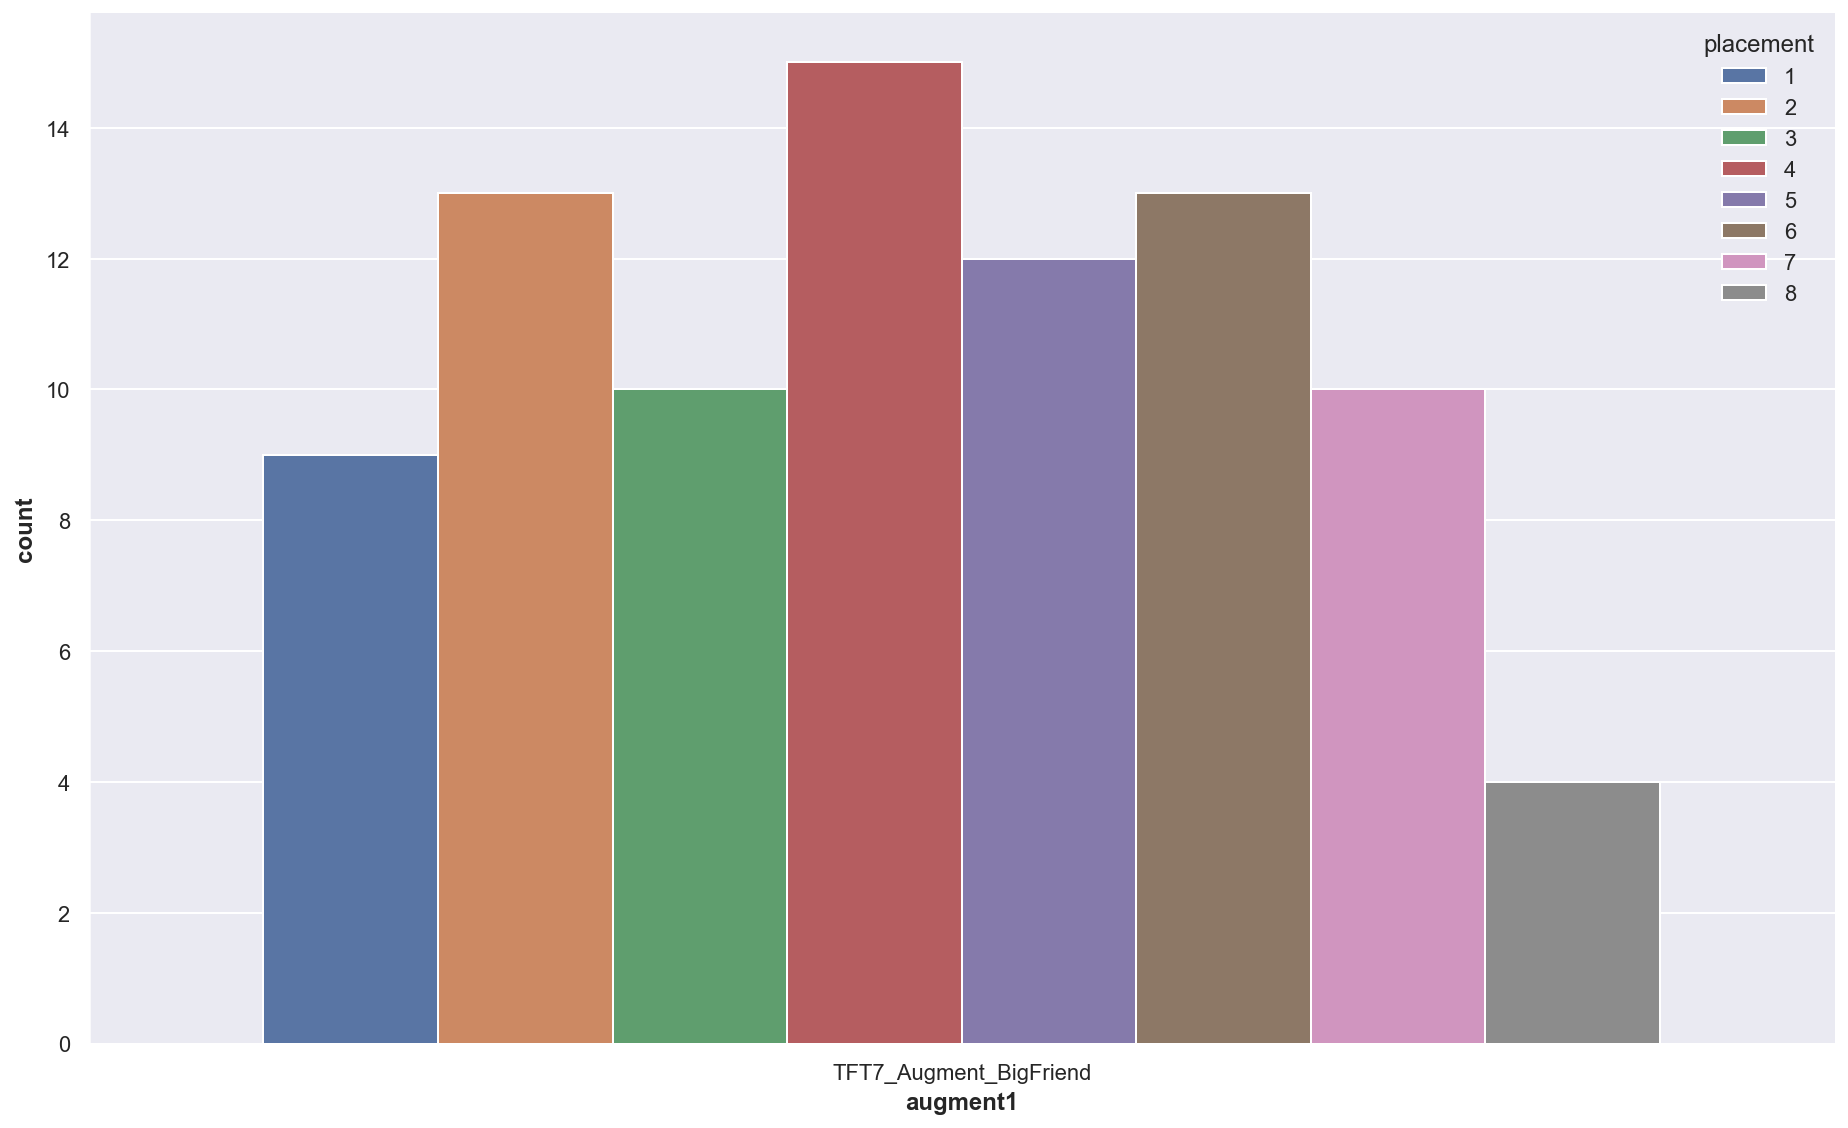

In [113]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment1']=='TFT7_Augment_BigFriend'], x='augment1', hue=TARGETNAME)
sns.despine()

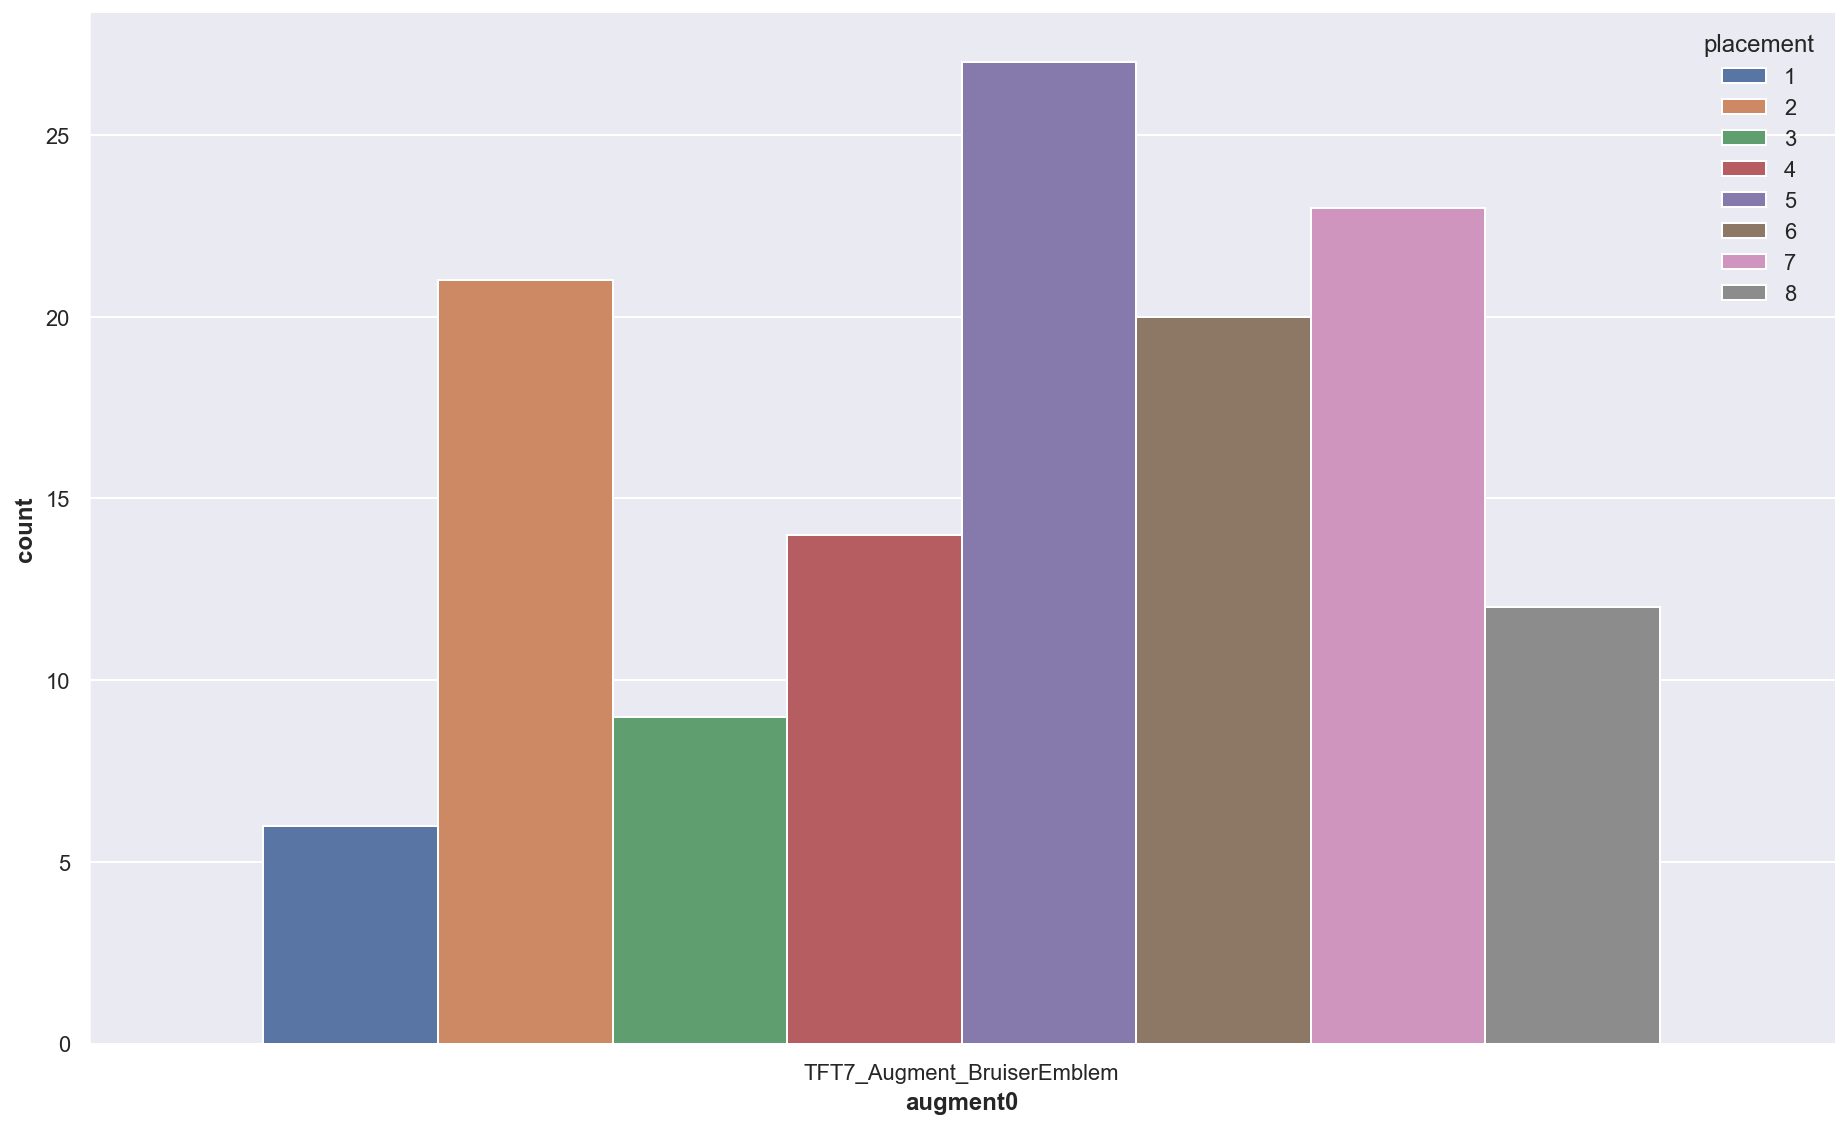

In [114]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserEmblem'], x='augment0', hue=TARGETNAME)
sns.despine()

Do not pick TFT6_Augment_WindfallPlusPlus.

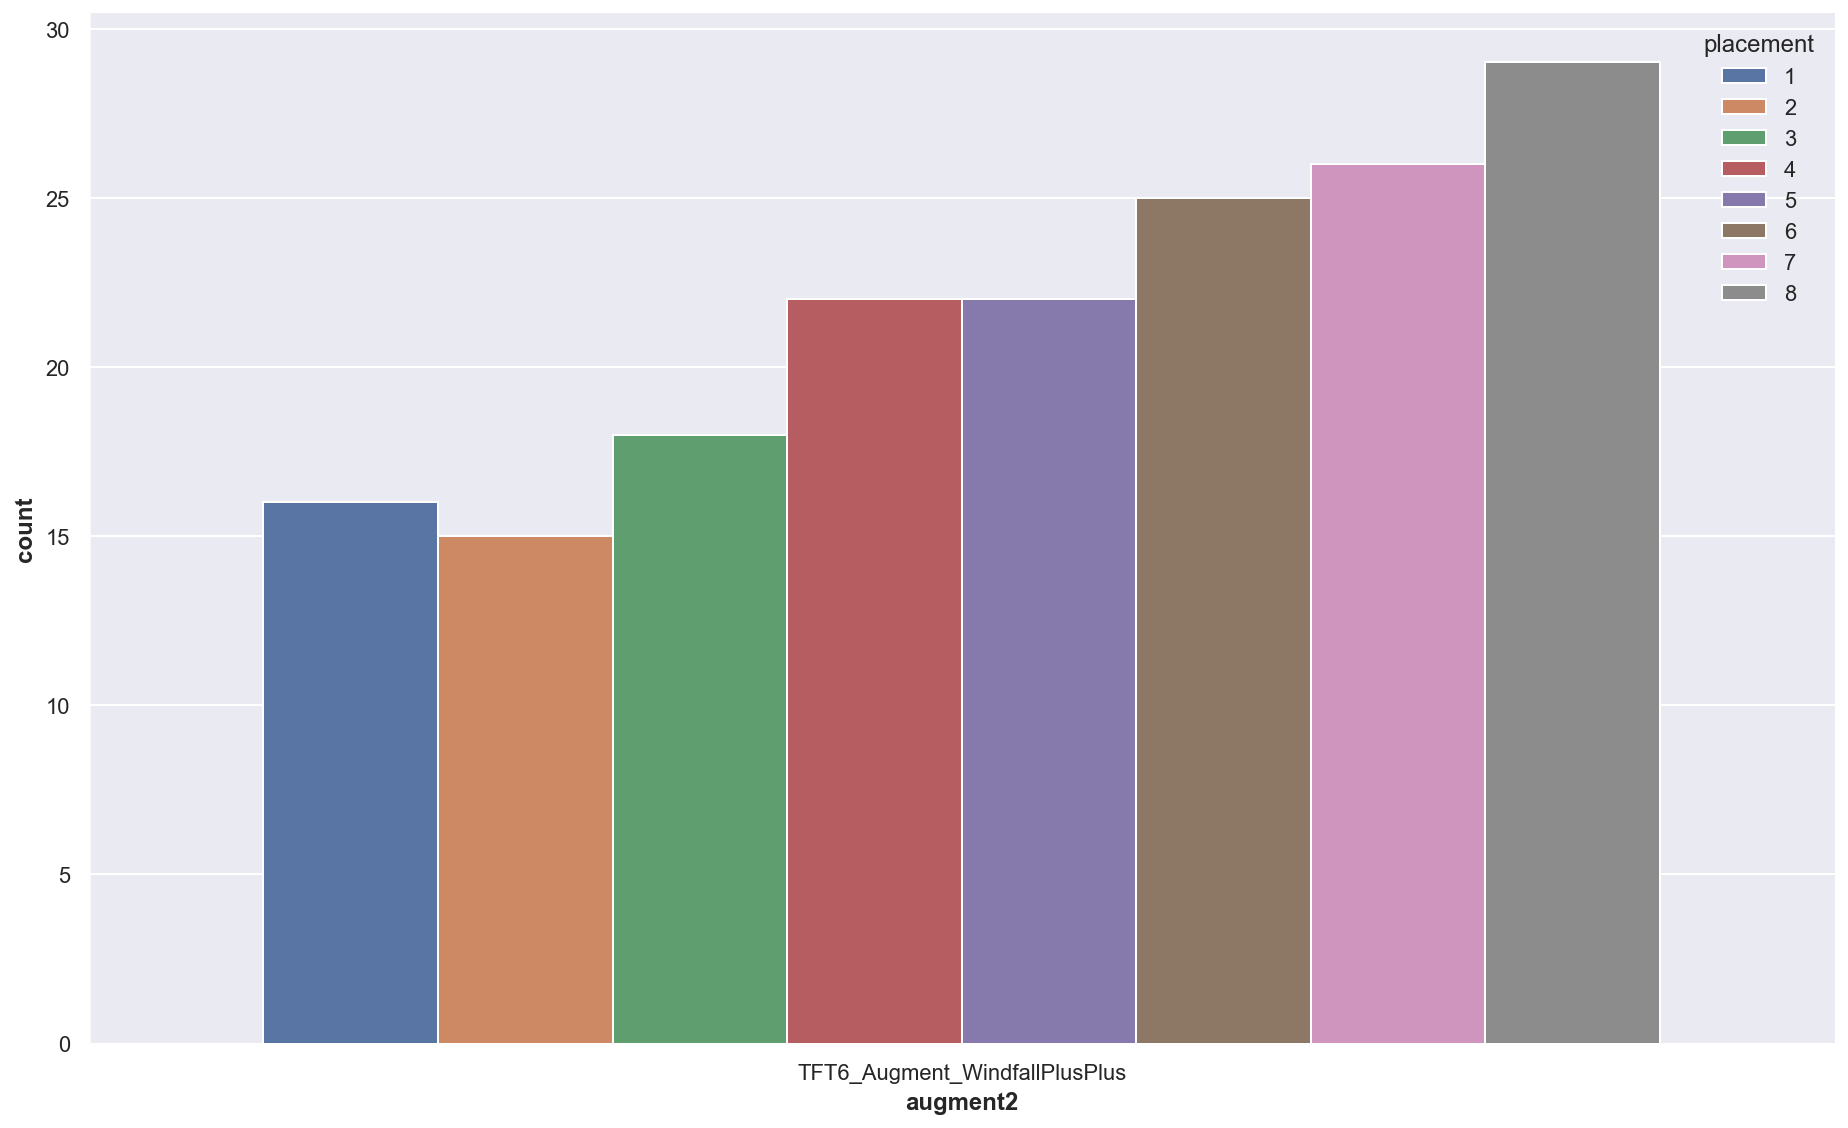

In [115]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_WindfallPlusPlus'], x='augment2', hue=TARGETNAME)
sns.despine()

Augment TFT6_Augment_CyberneticImplants2 is a good pick.

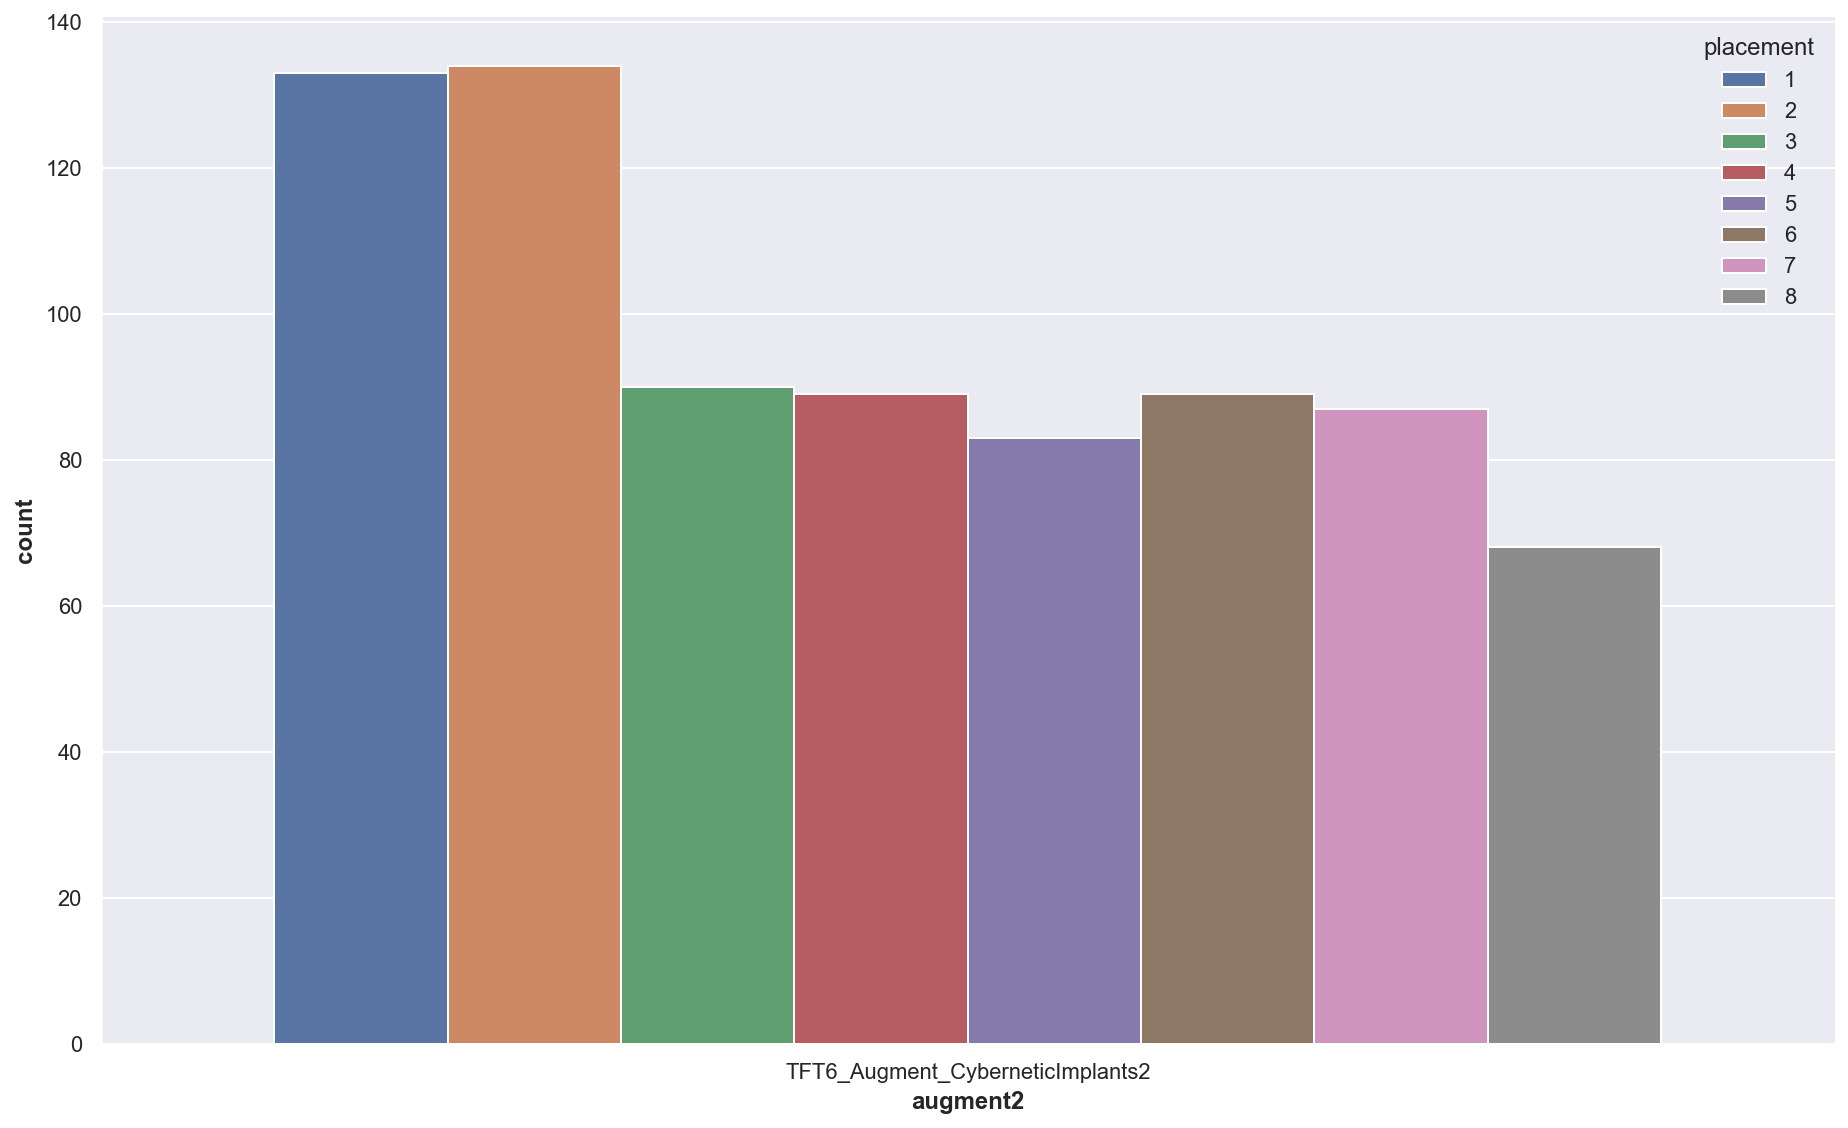

In [116]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_CyberneticImplants2'], x='augment2', hue=TARGETNAME)
sns.despine()

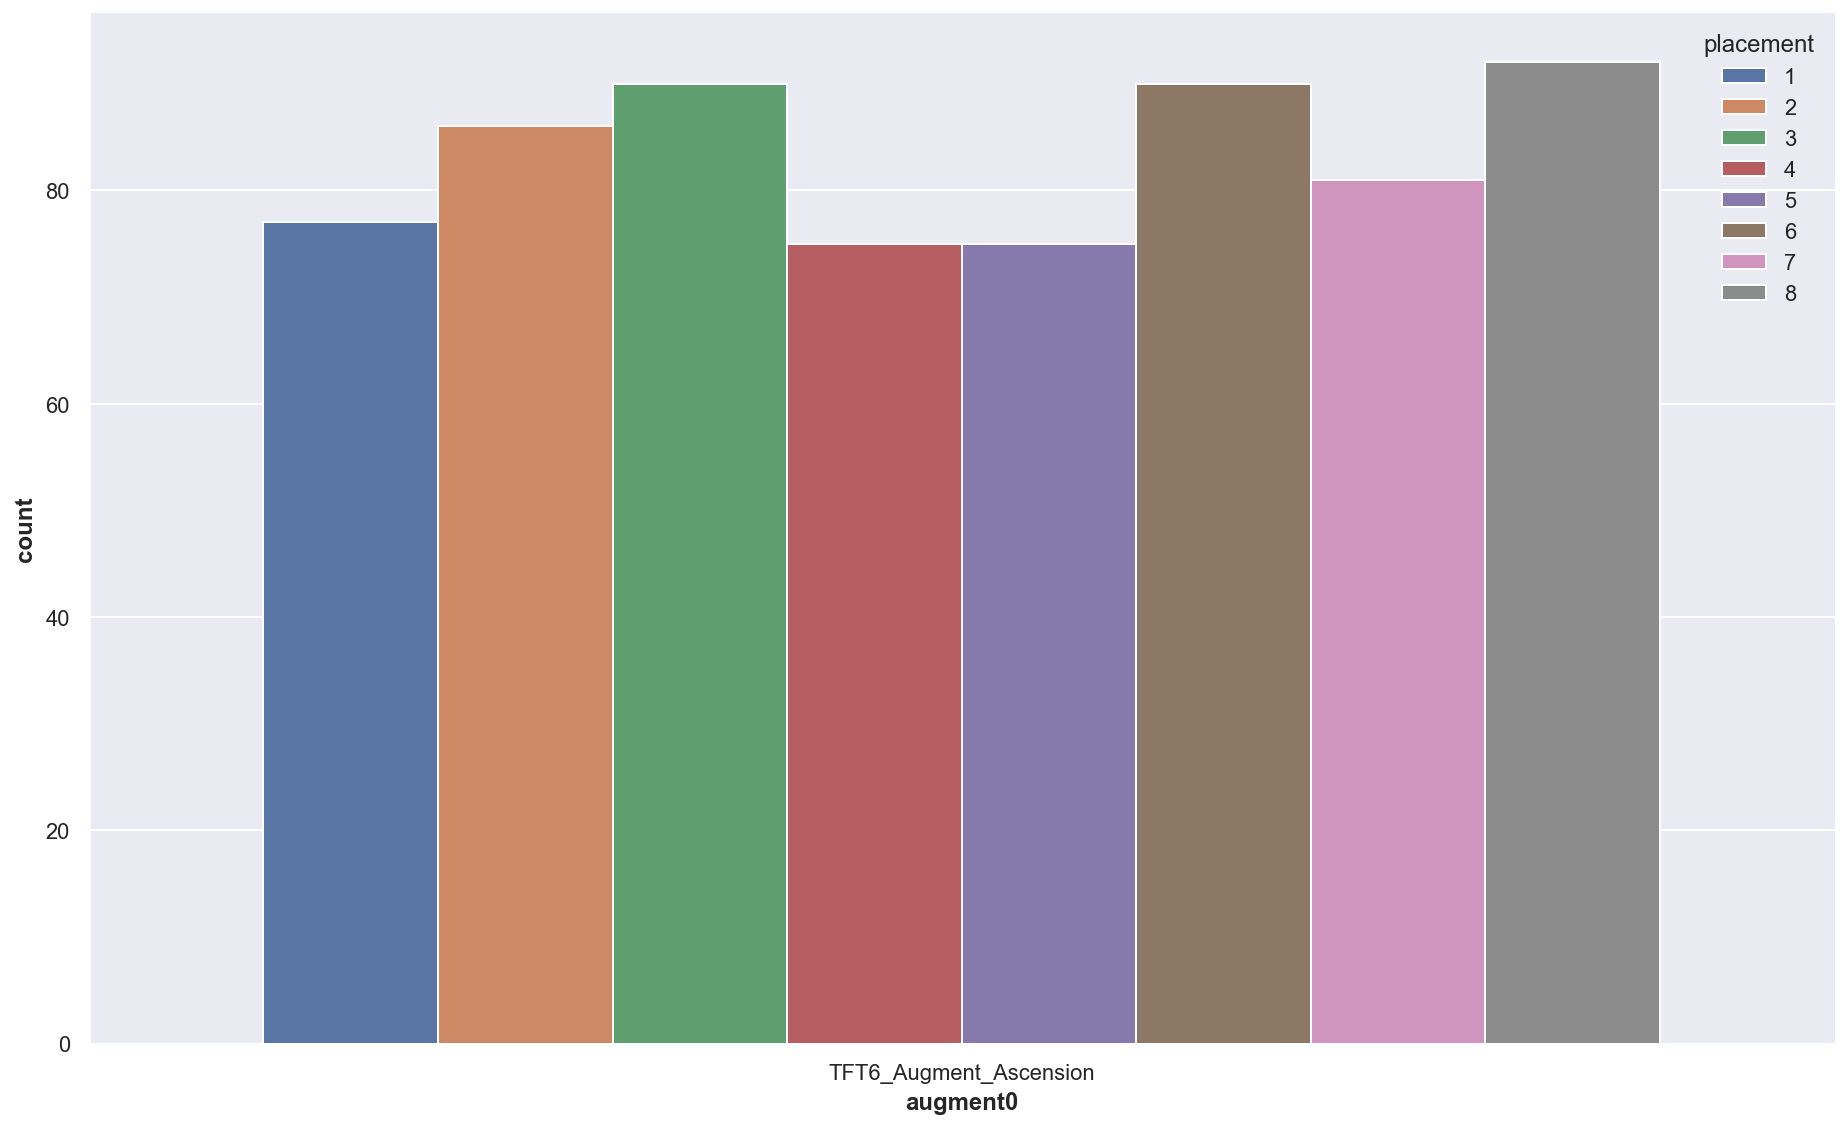

In [117]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Ascension'], x='augment0', hue=TARGETNAME)
sns.despine()

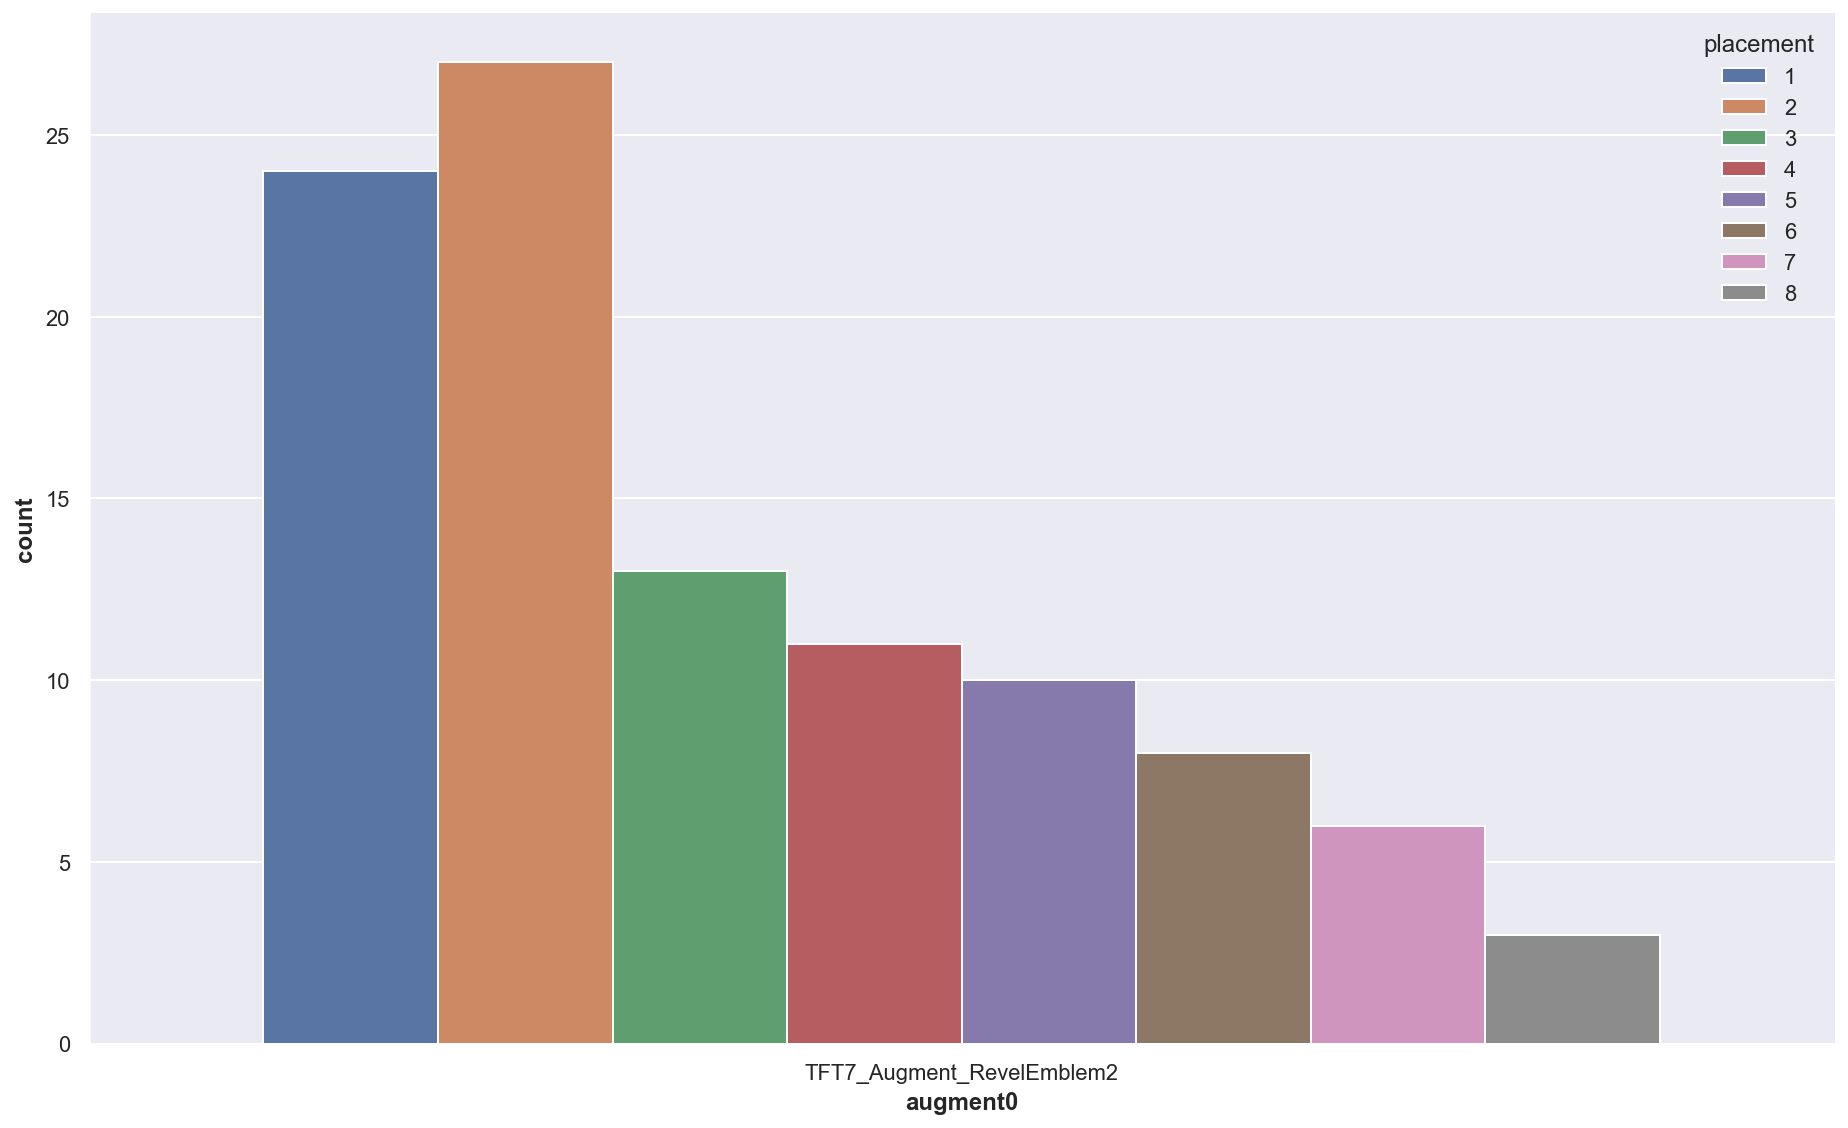

In [118]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_RevelEmblem2'], x='augment0', hue=TARGETNAME)
sns.despine()

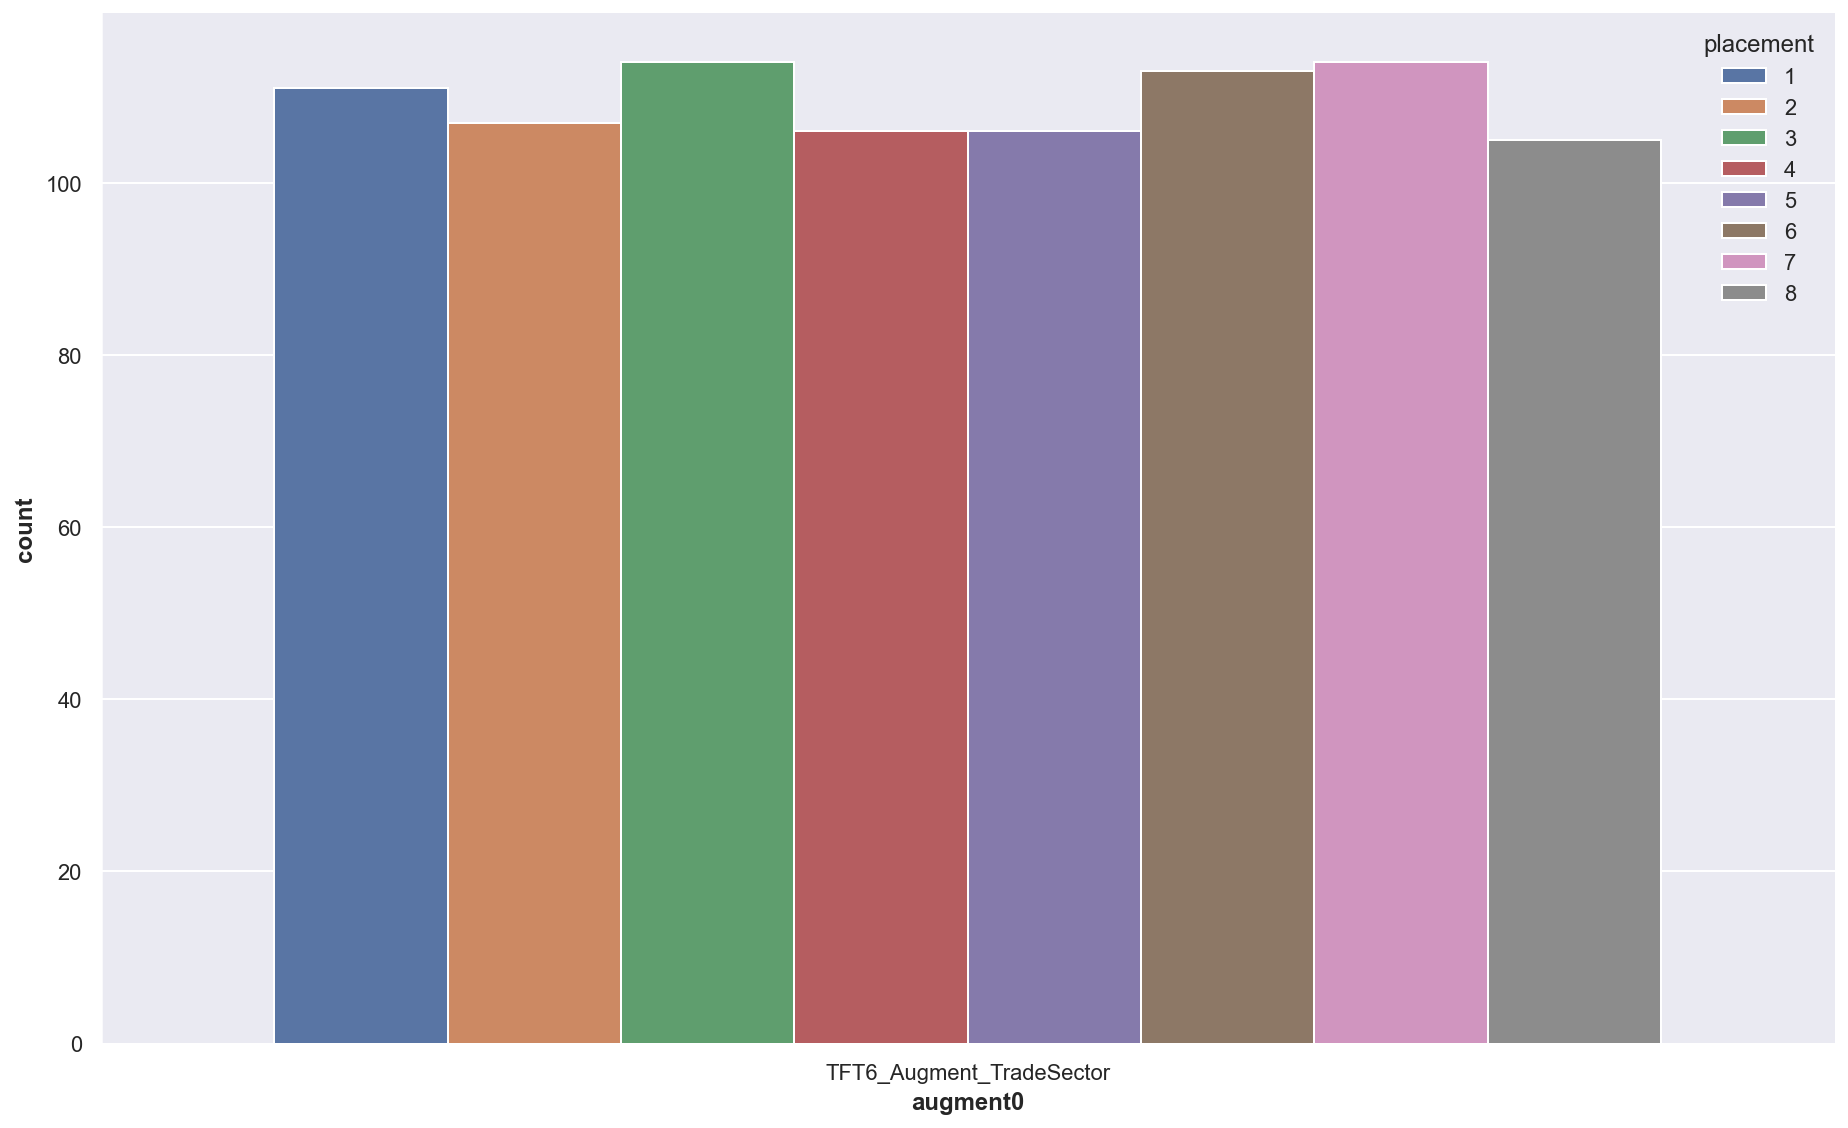

In [119]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_TradeSector'], x='augment0', hue=TARGETNAME)
sns.despine()

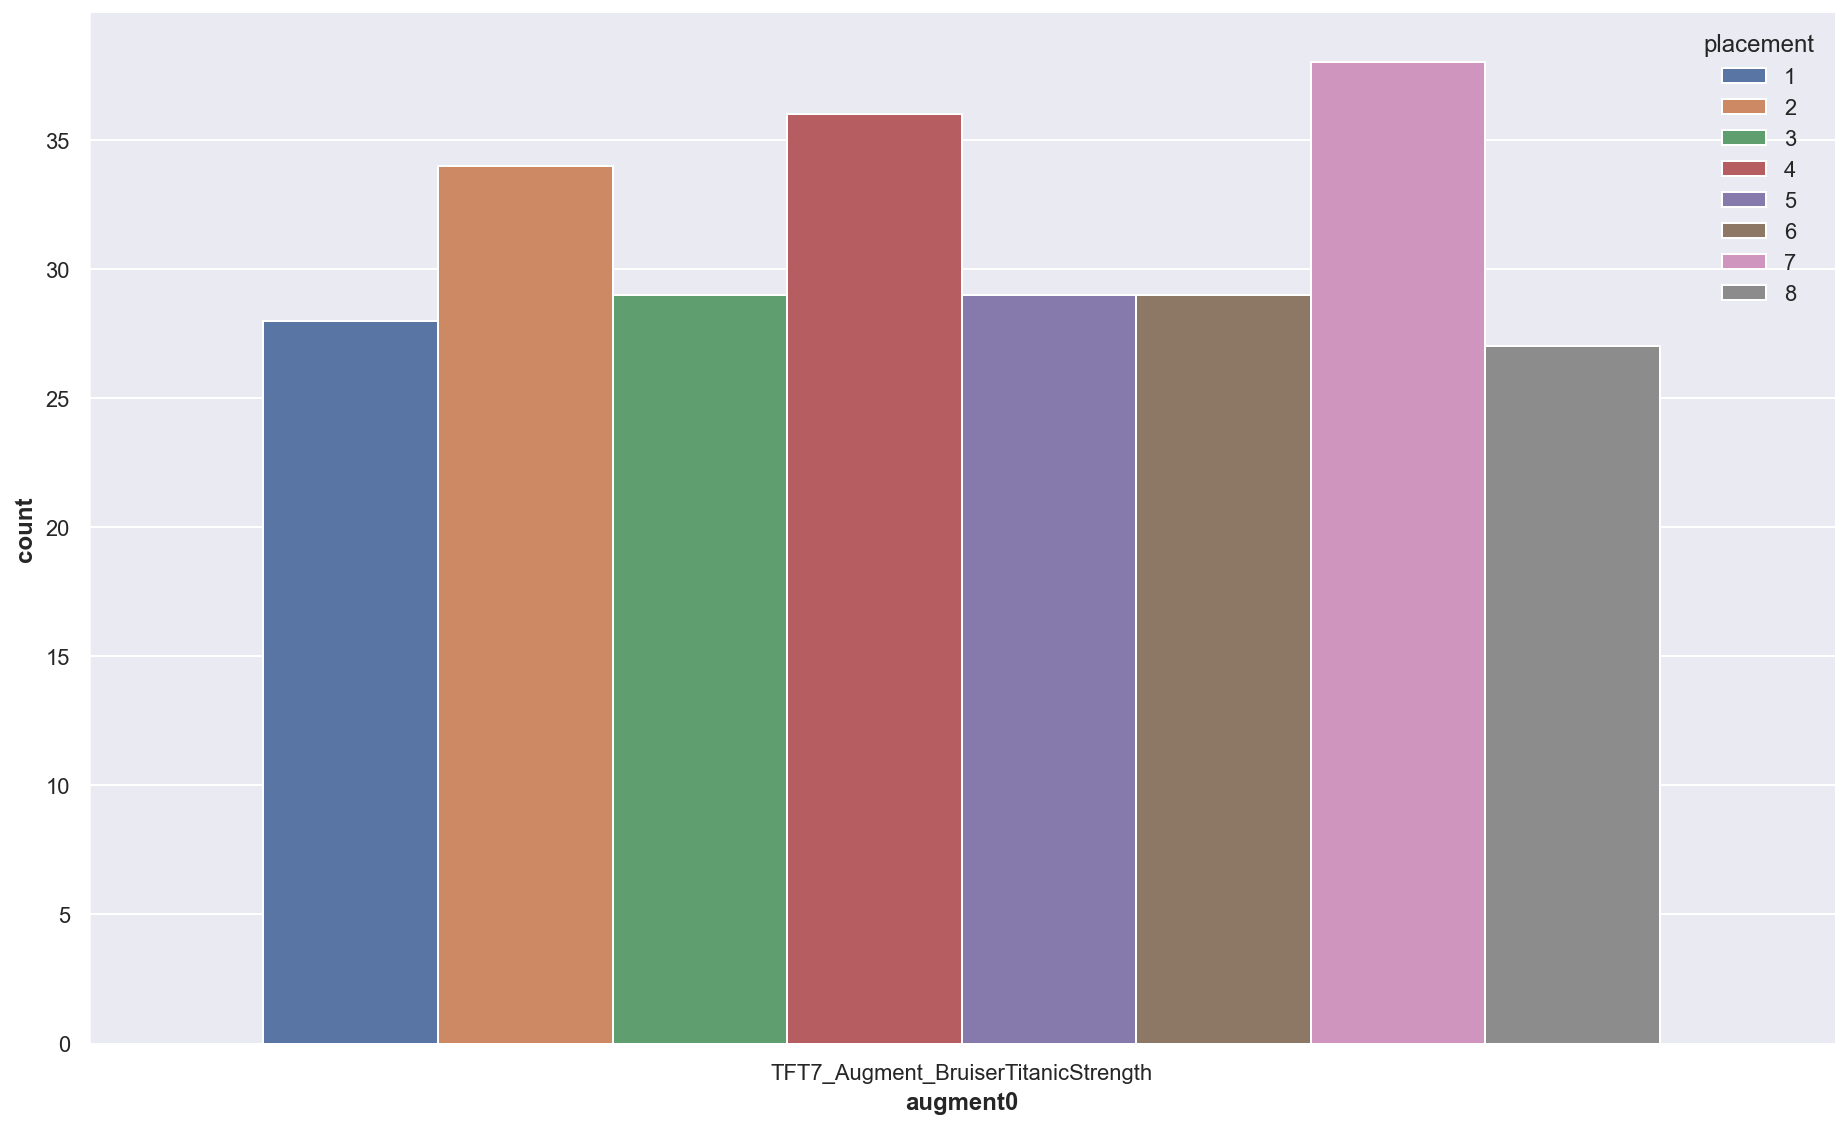

In [120]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserTitanicStrength'], x='augment0', hue=TARGETNAME)
sns.despine()

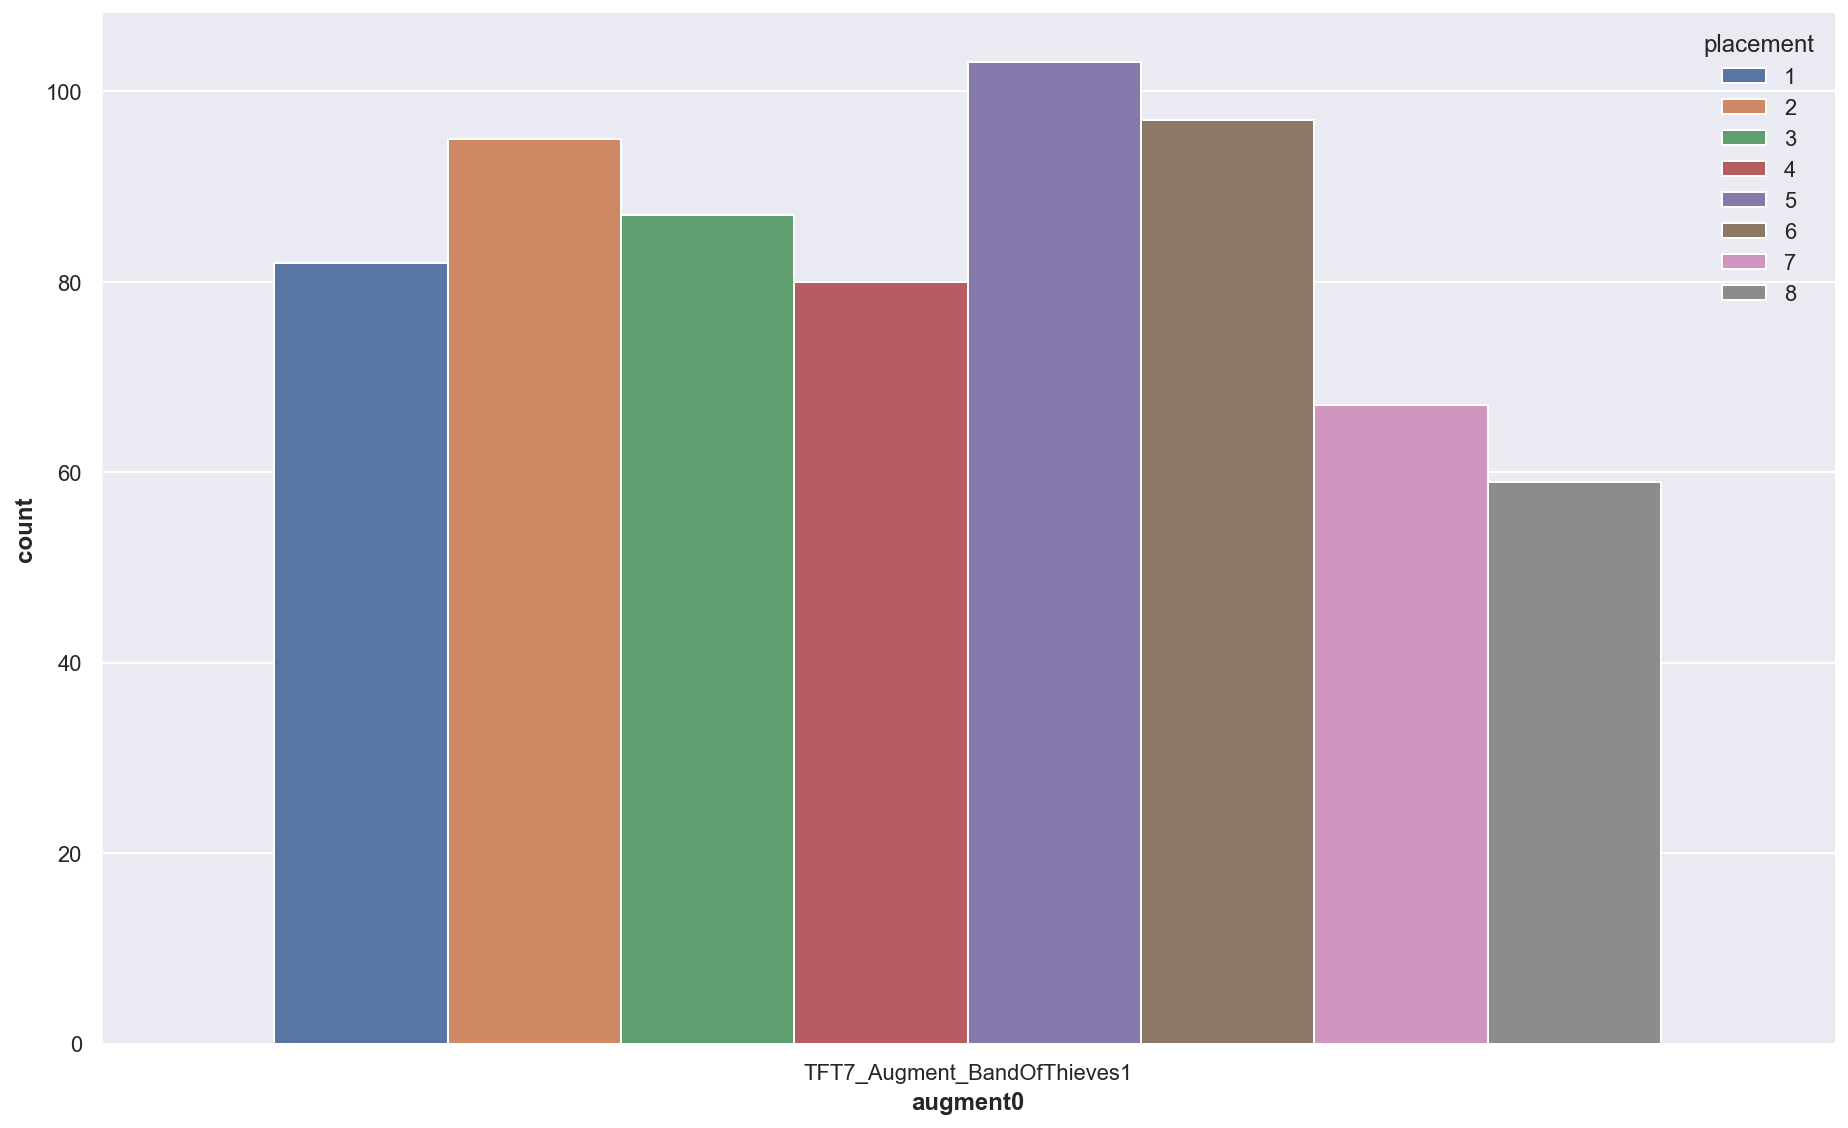

In [121]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BandOfThieves1'], x='augment0', hue=TARGETNAME)
sns.despine()

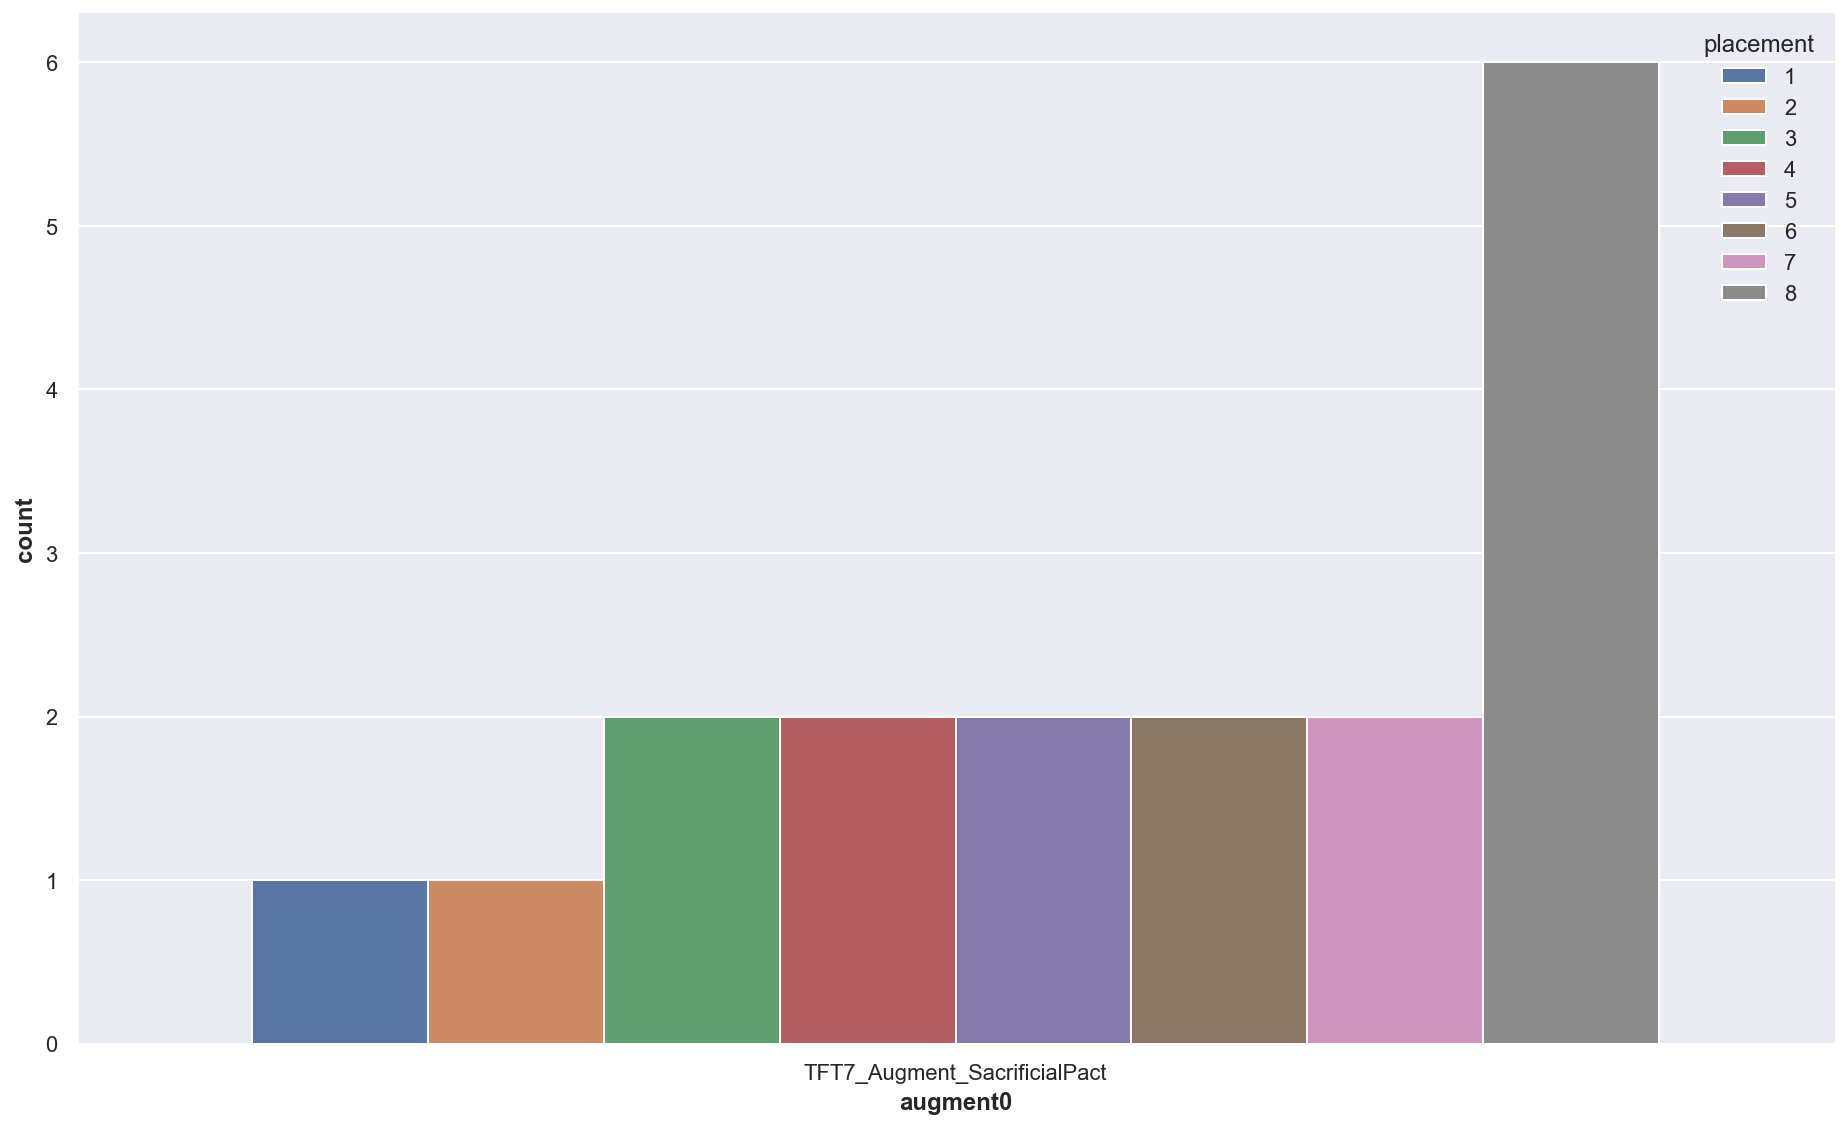

In [122]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_SacrificialPact'], x='augment0', hue=TARGETNAME)
sns.despine()

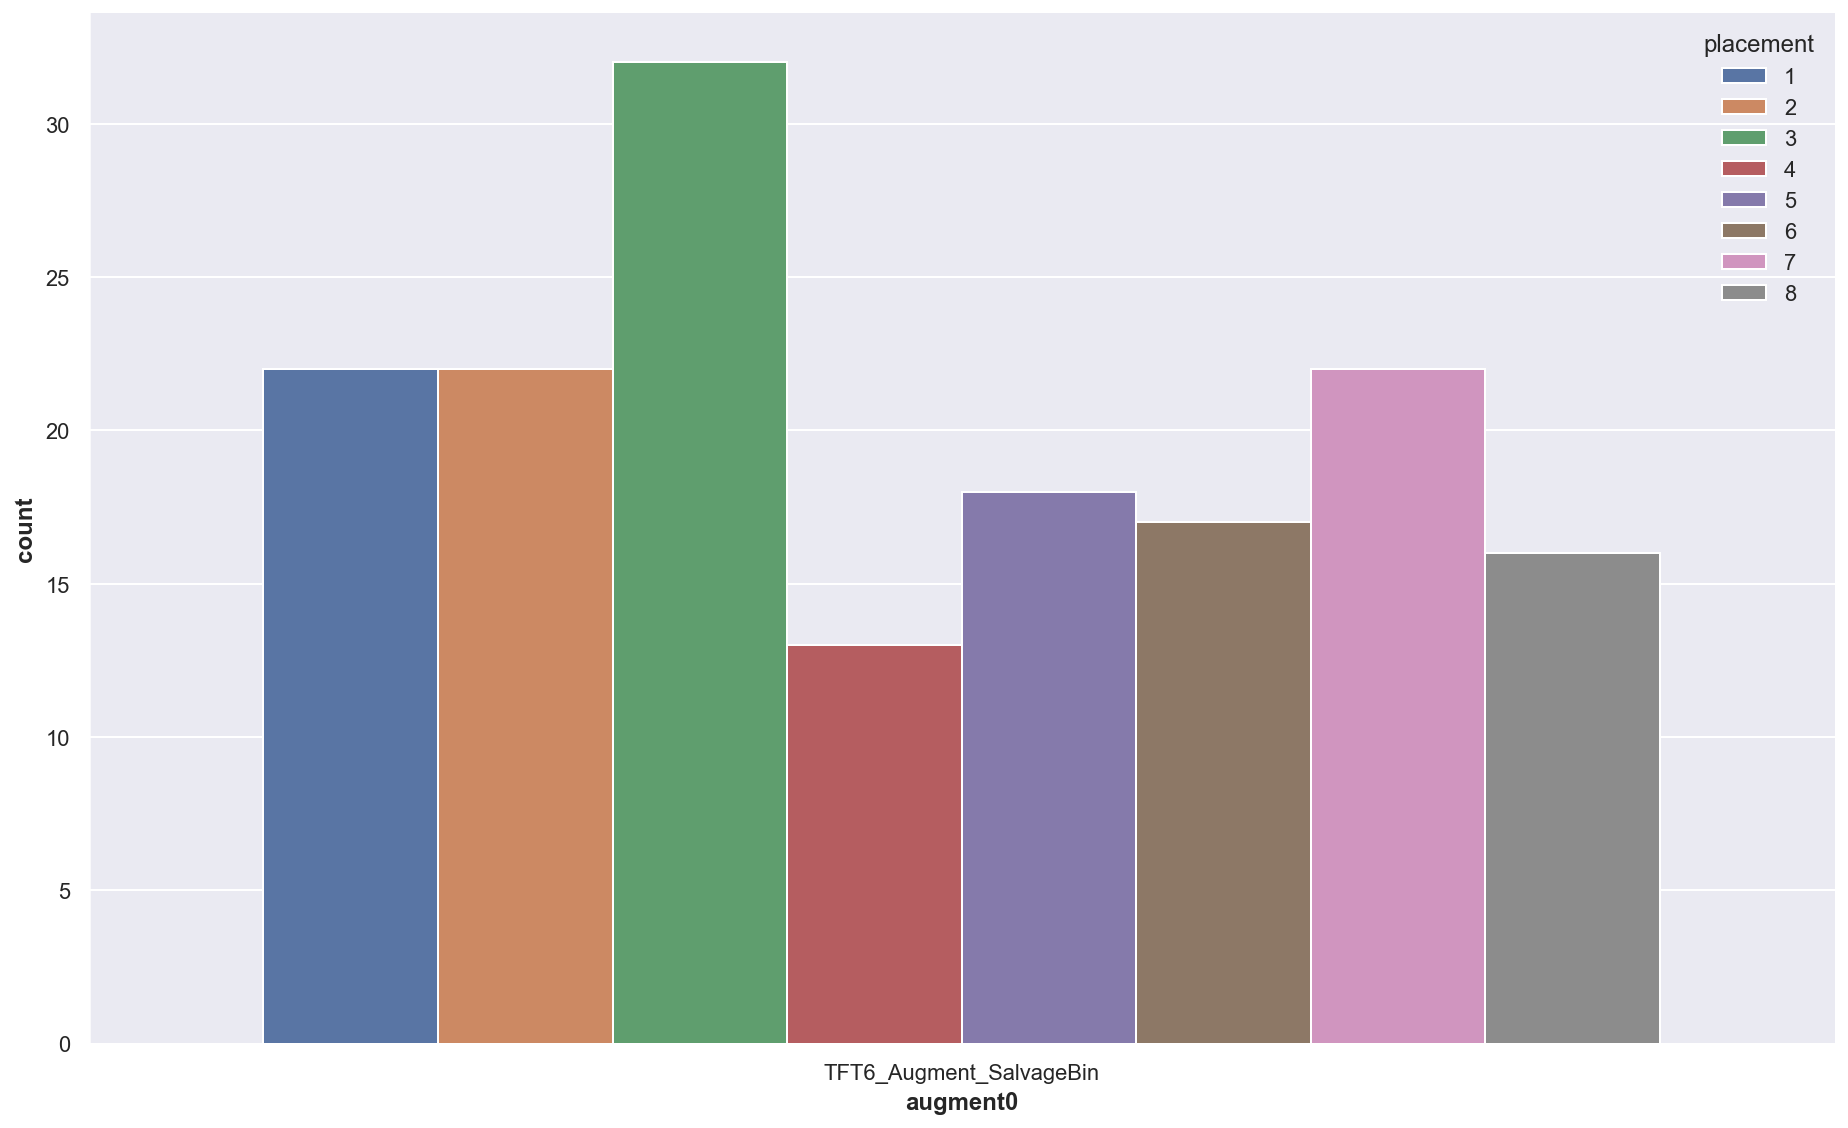

In [123]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_SalvageBin'], x='augment0', hue=TARGETNAME)
sns.despine()

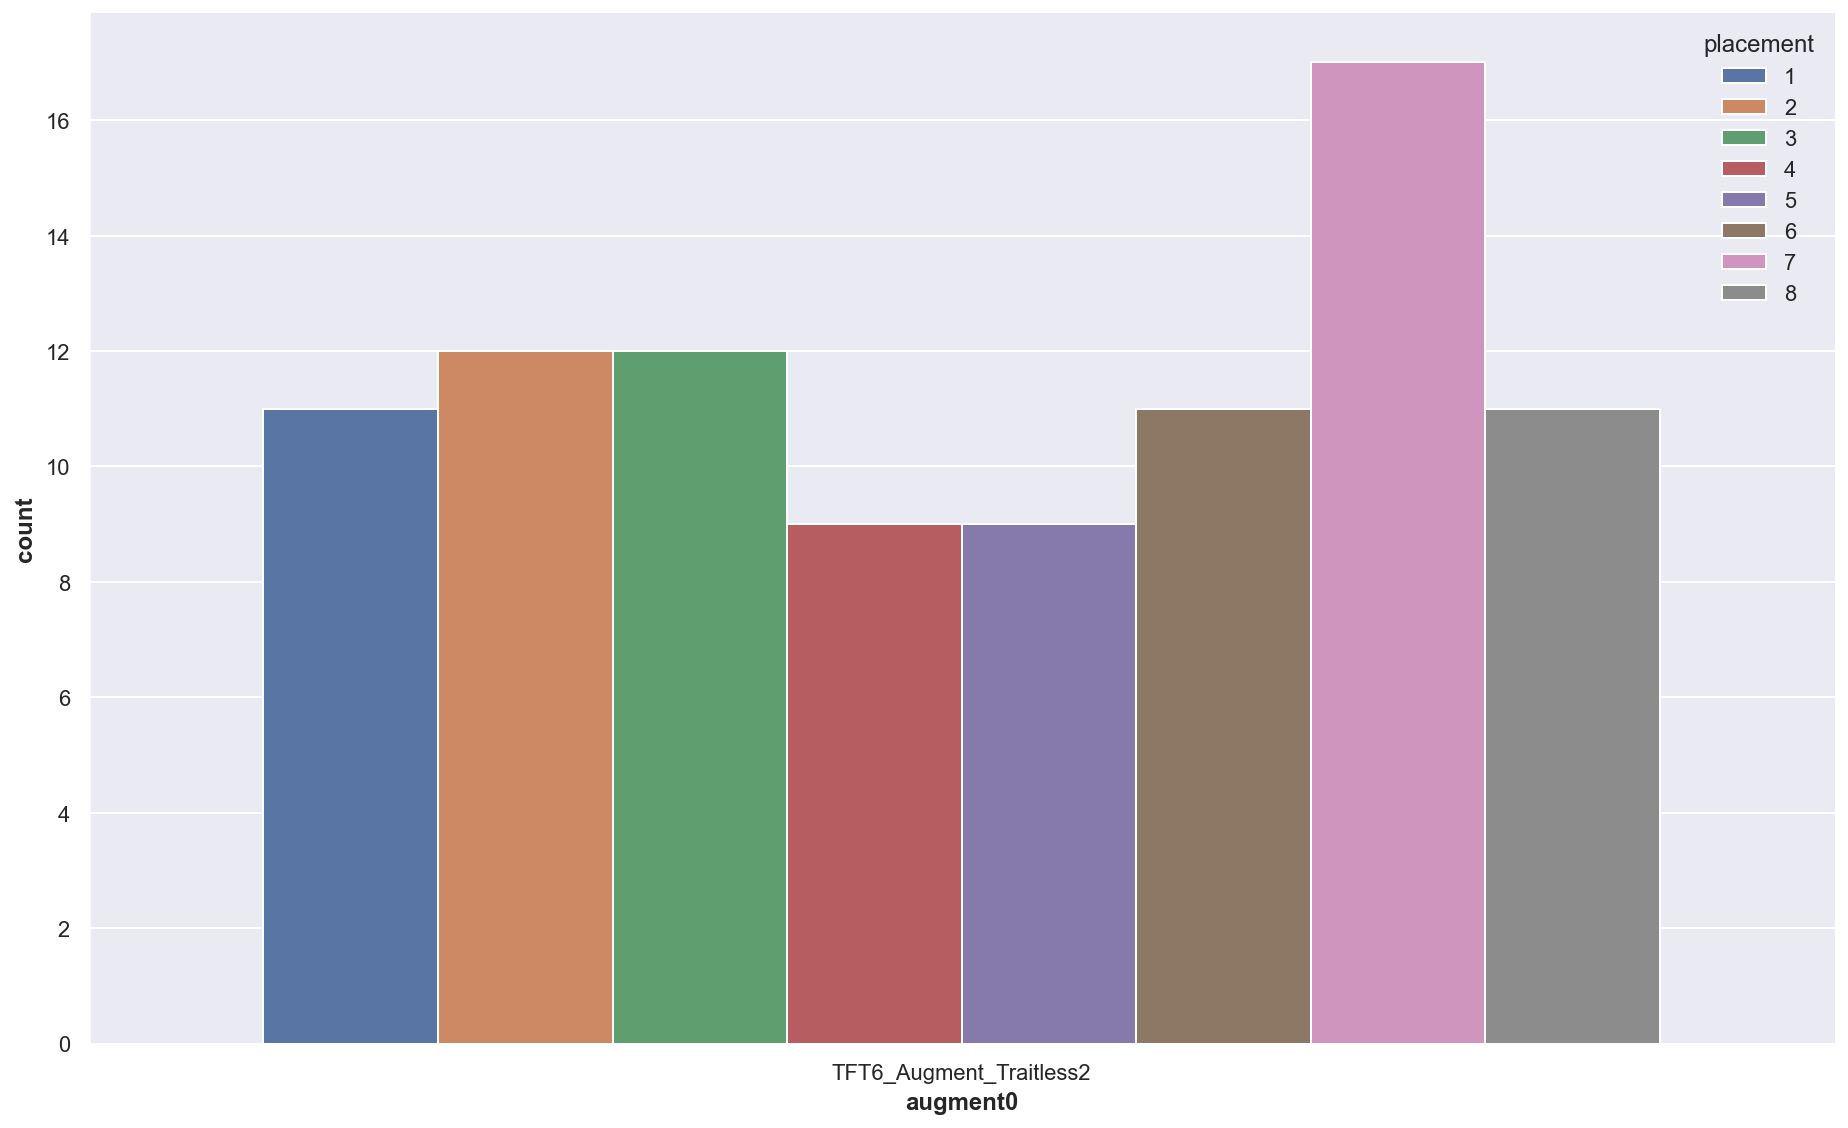

In [124]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Traitless2'], x='augment0', hue=TARGETNAME)
sns.despine()

No Good.

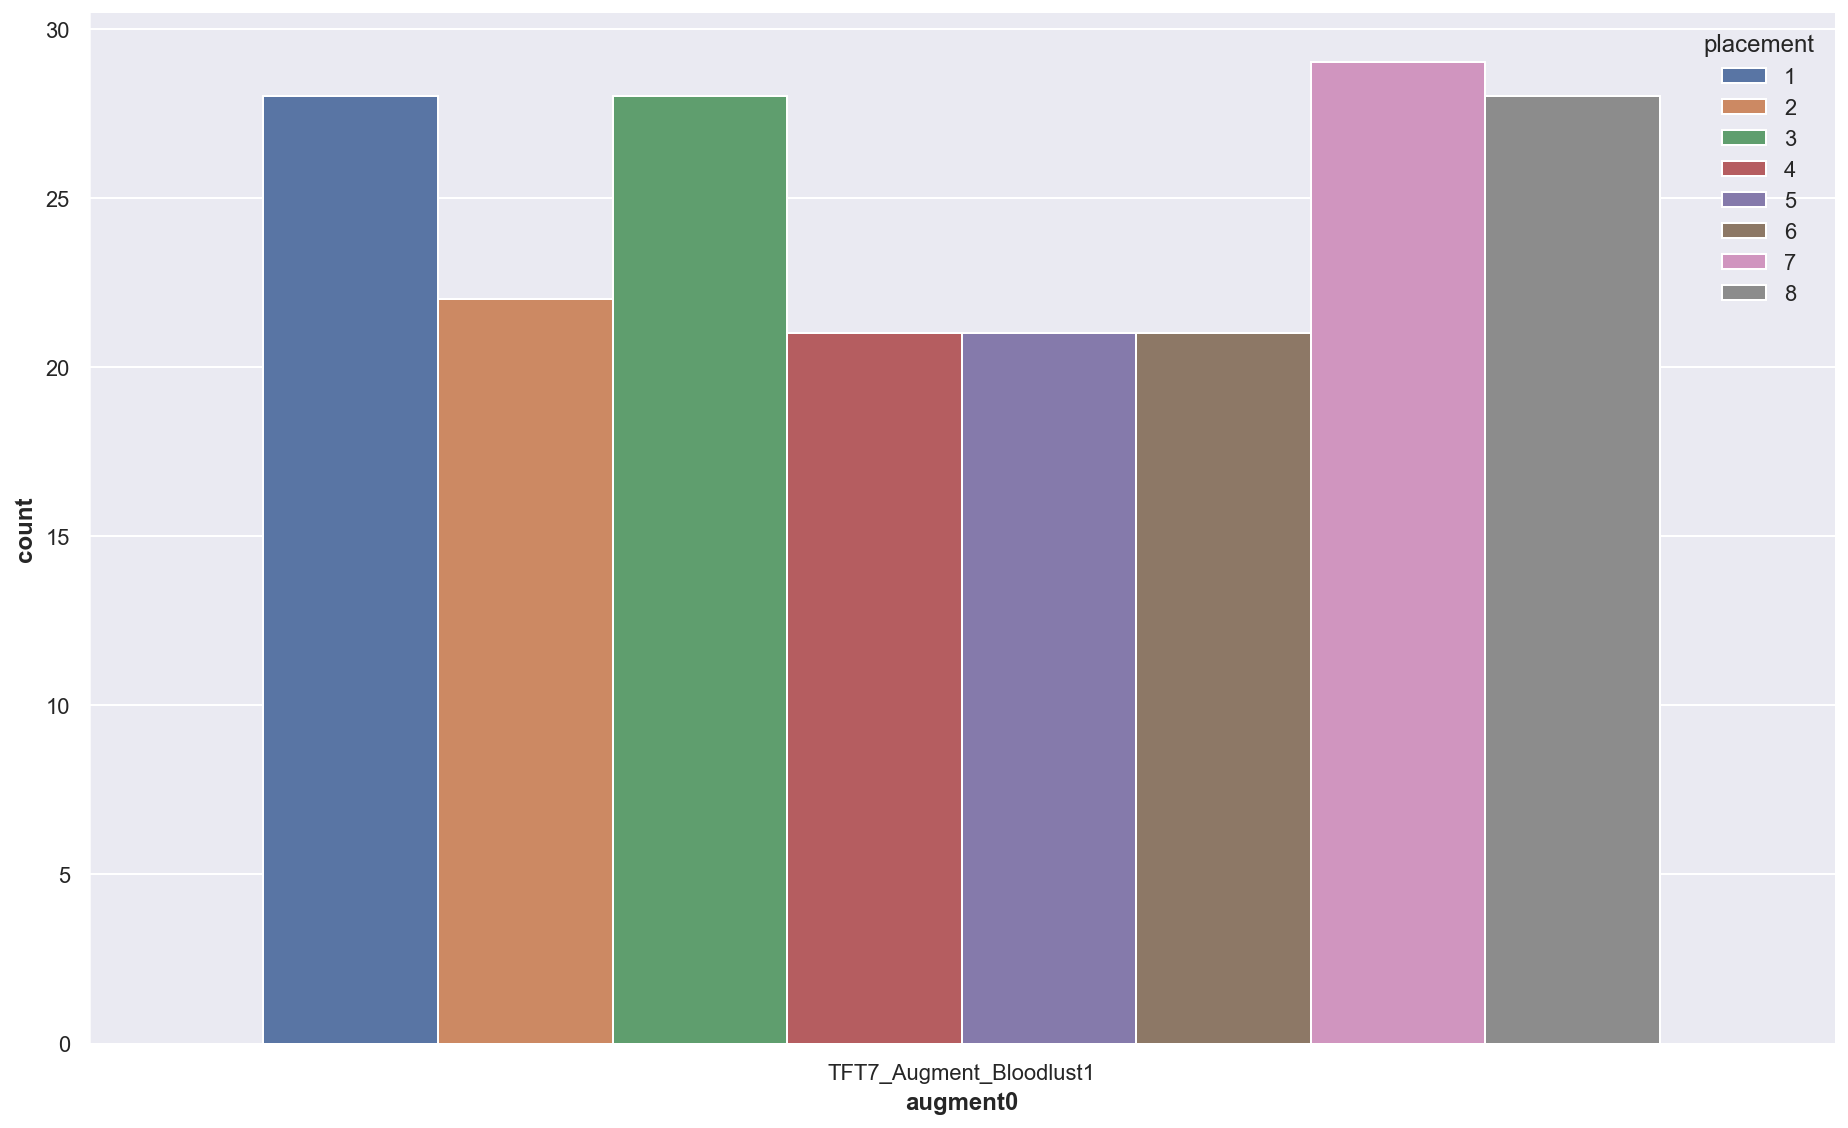

In [125]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_Bloodlust1'], x='augment0', hue=TARGETNAME)
sns.despine()

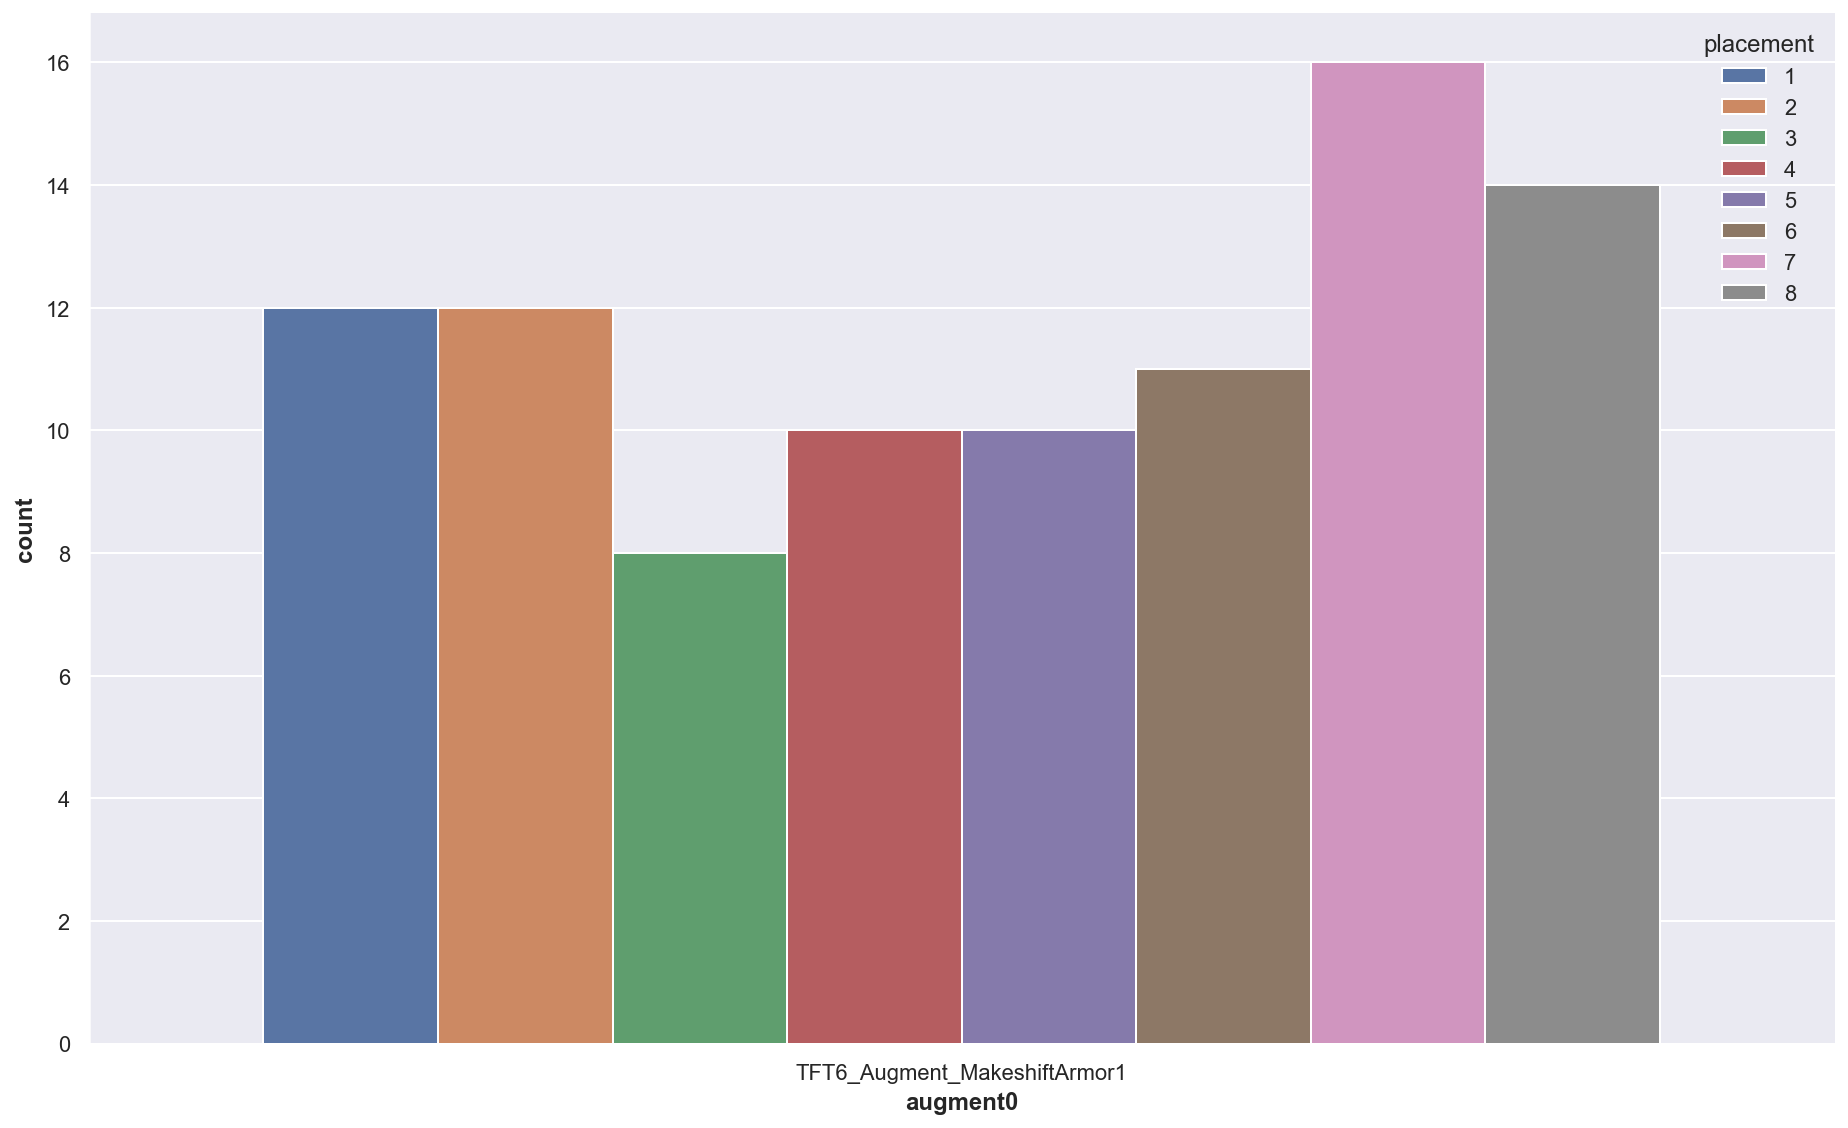

In [126]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor1'], x='augment0', hue=TARGETNAME)
sns.despine()

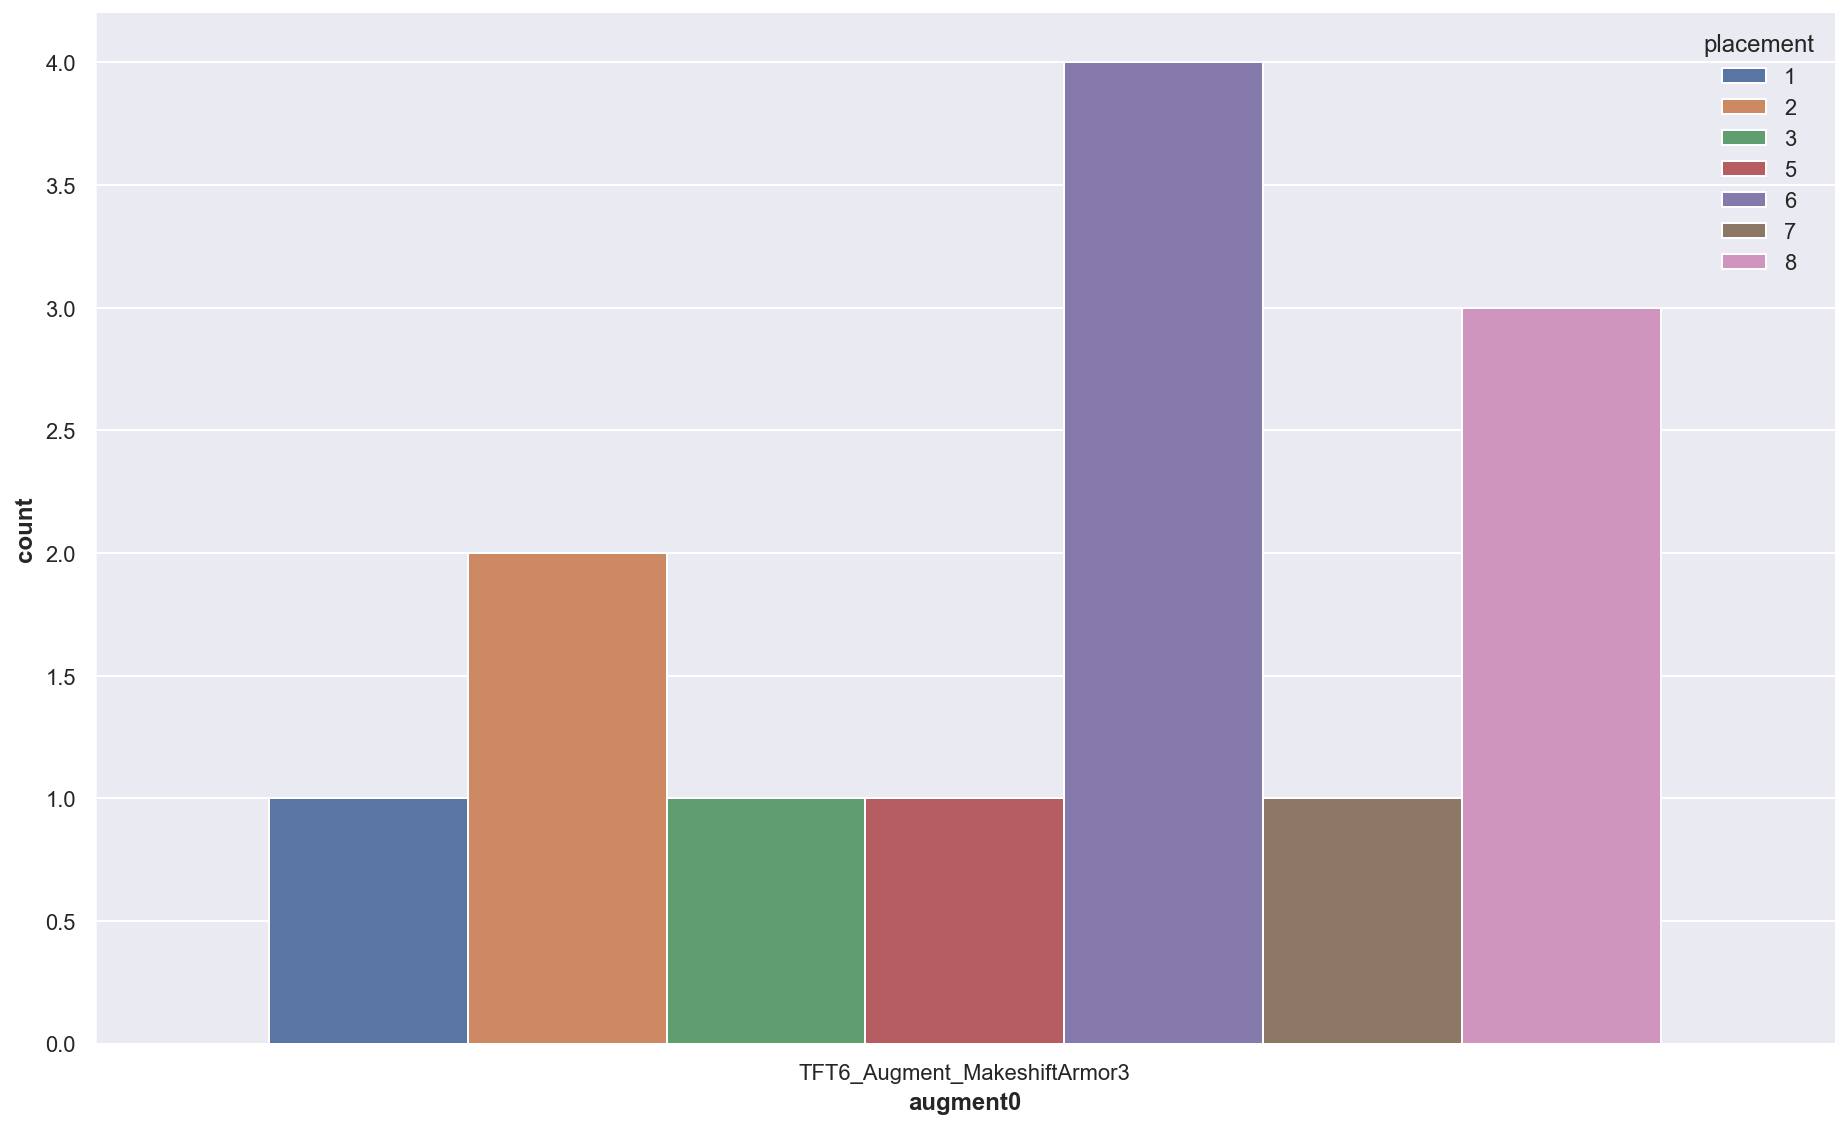

In [127]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor3'], x='augment0', hue=TARGETNAME)
sns.despine()

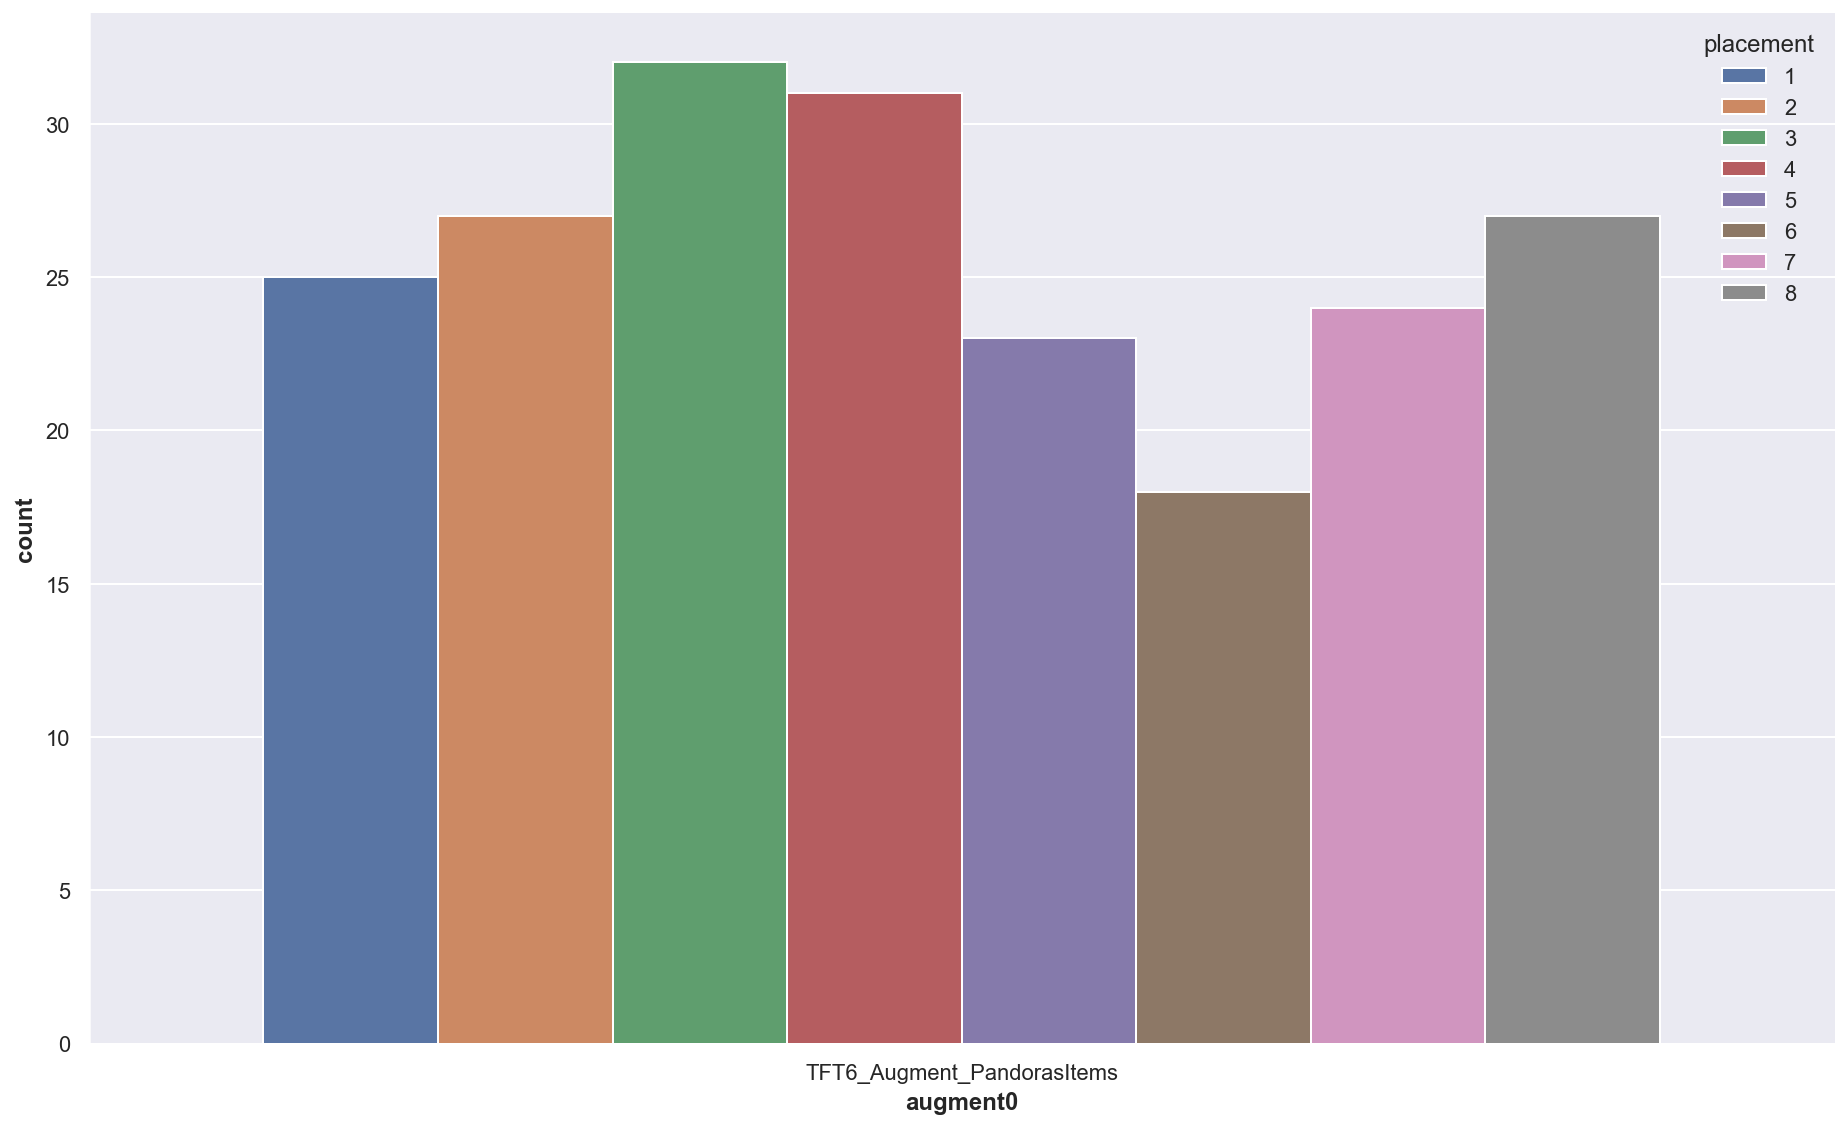

In [128]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_PandorasItems'], x='augment0', hue=TARGETNAME)
sns.despine()

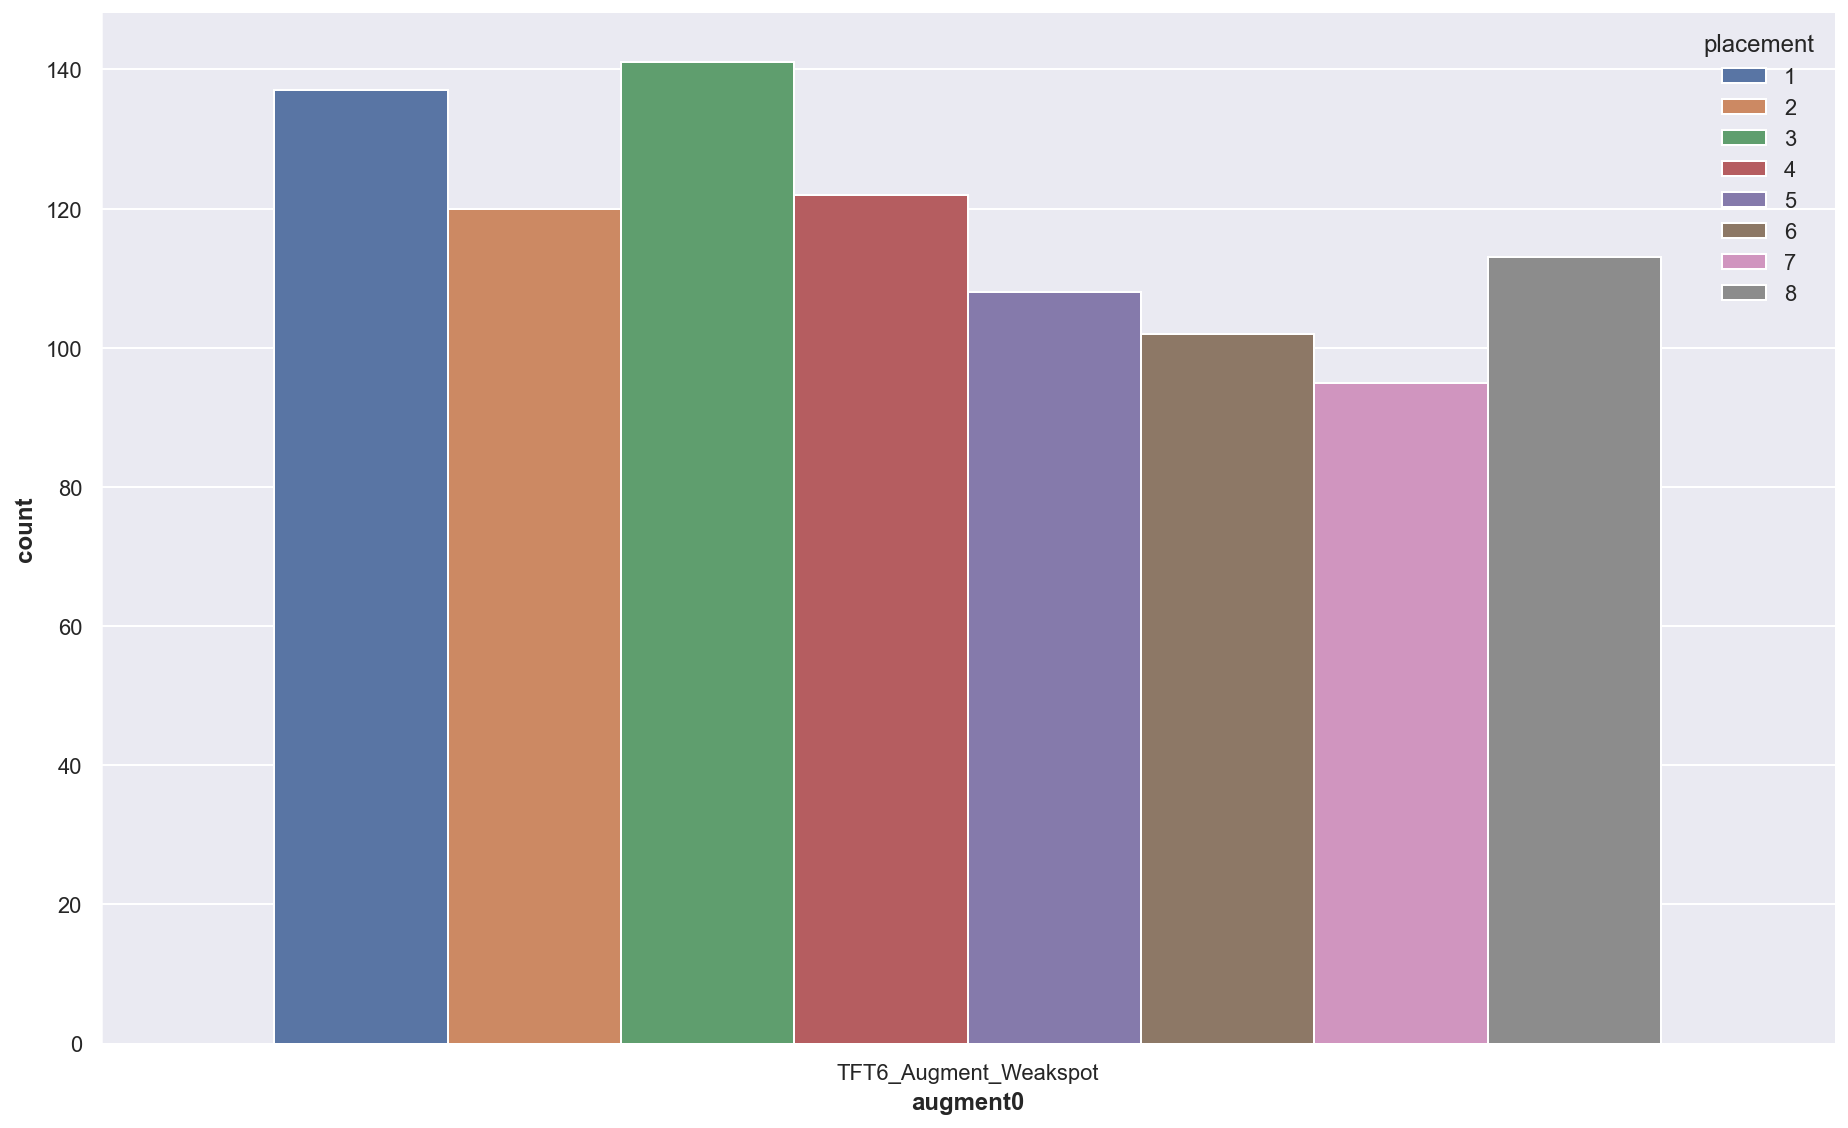

In [129]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Weakspot'], x='augment0', hue=TARGETNAME)
sns.despine()

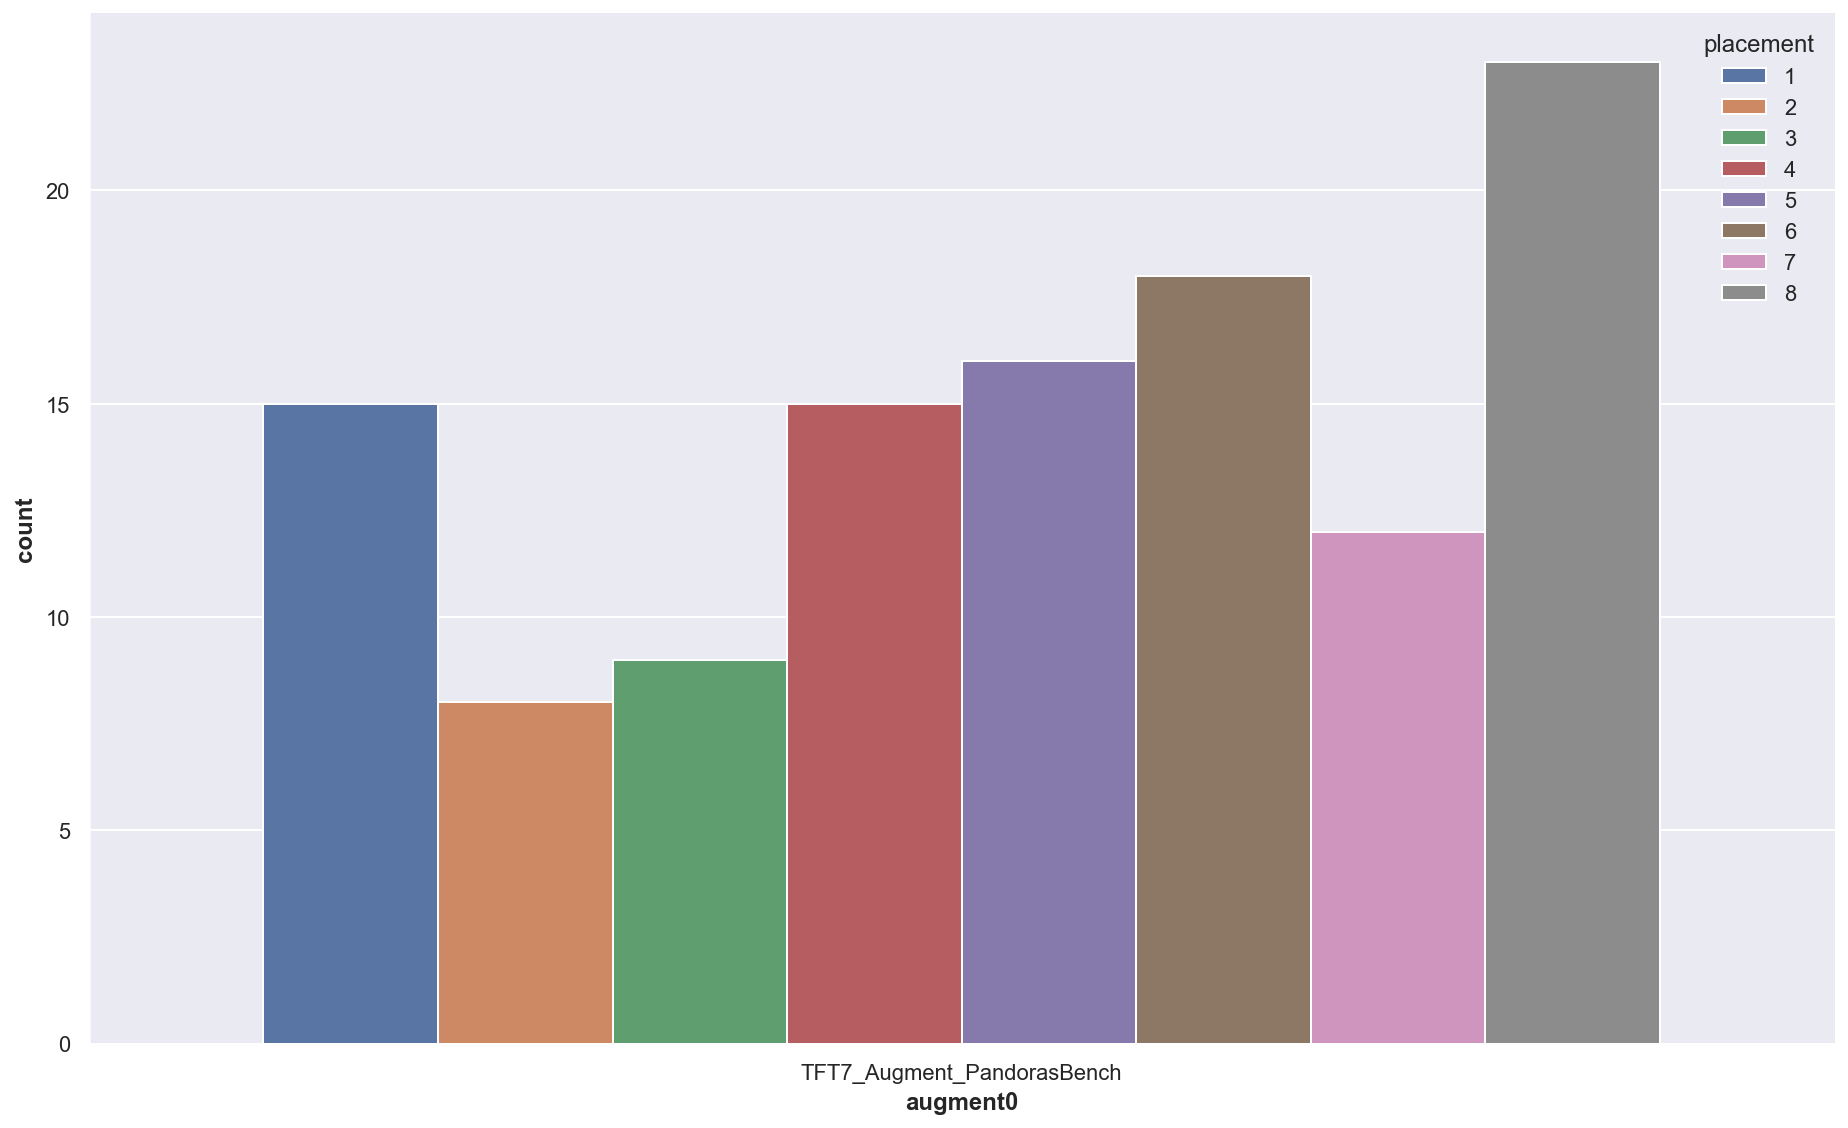

In [130]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_PandorasBench'], x='augment0', hue=TARGETNAME)
sns.despine()

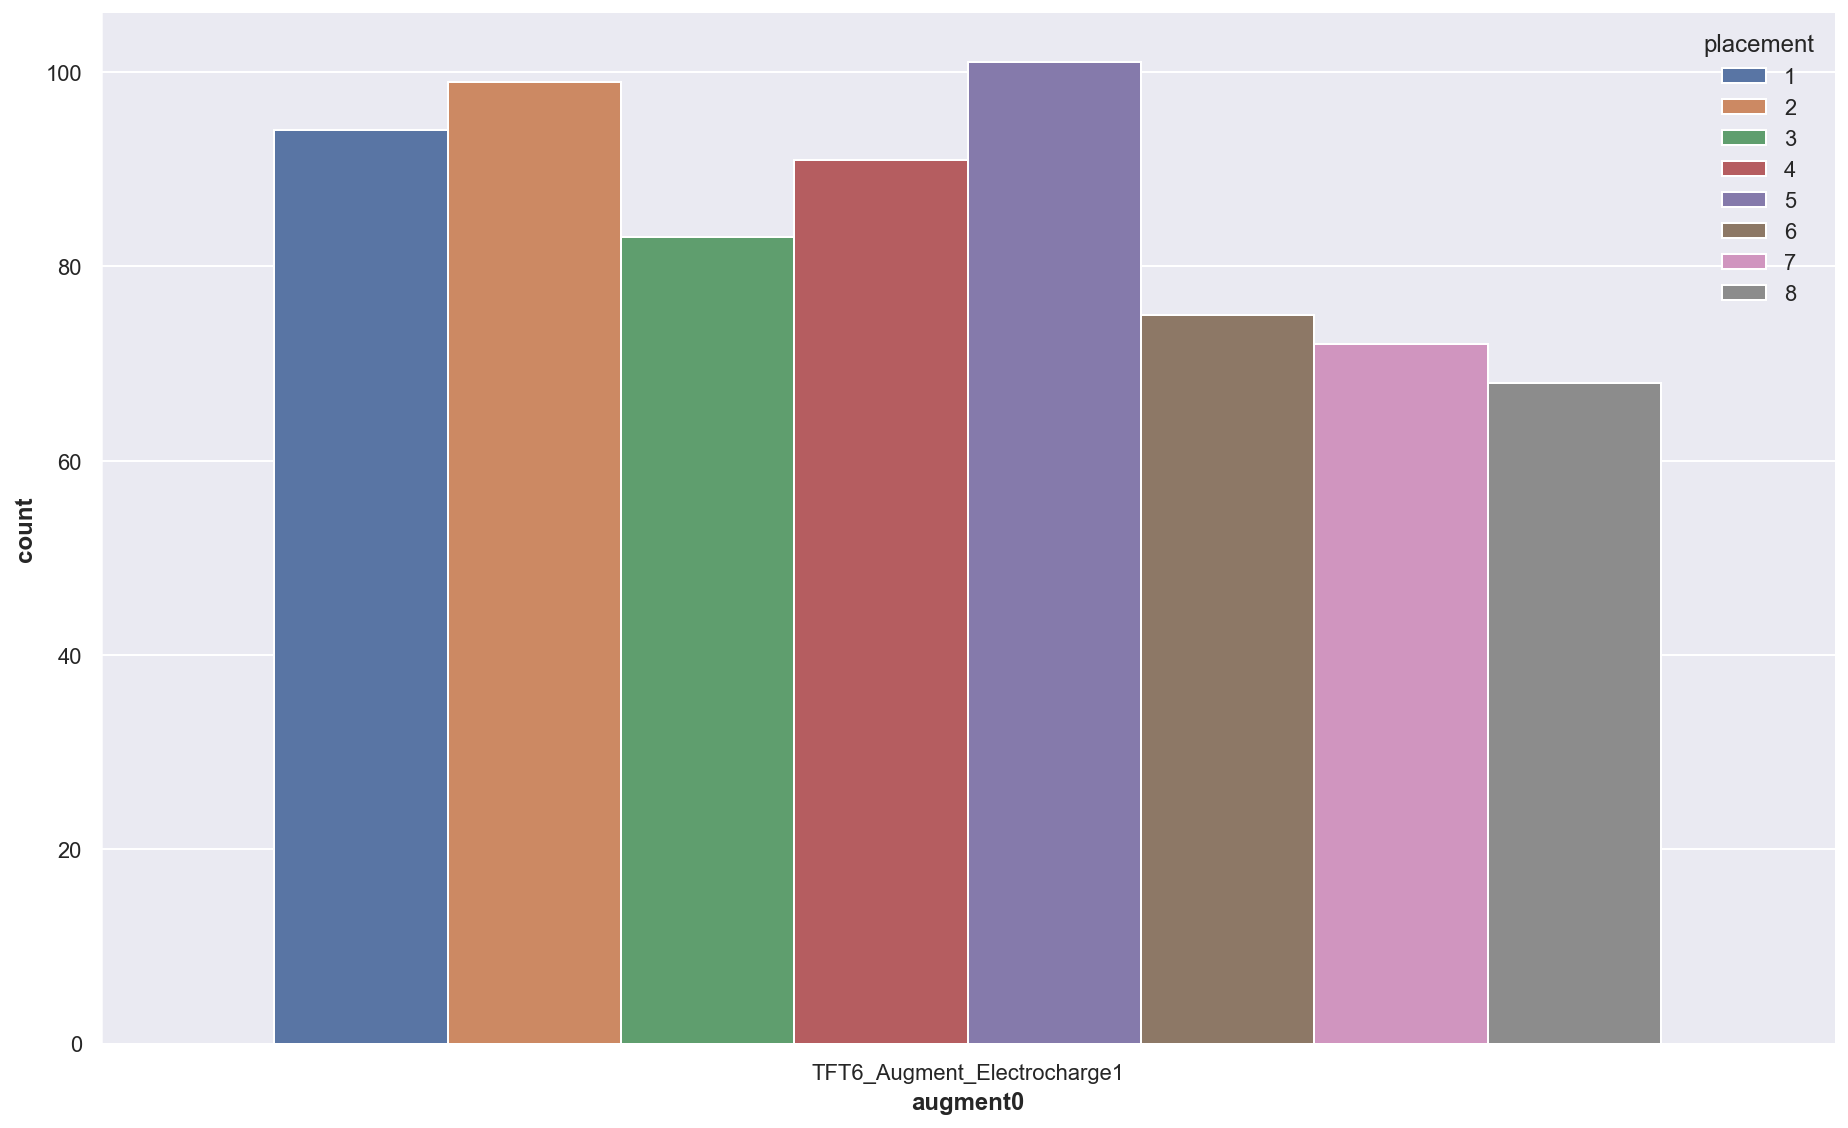

In [131]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Electrocharge1'], x='augment0', hue=TARGETNAME)
sns.despine()

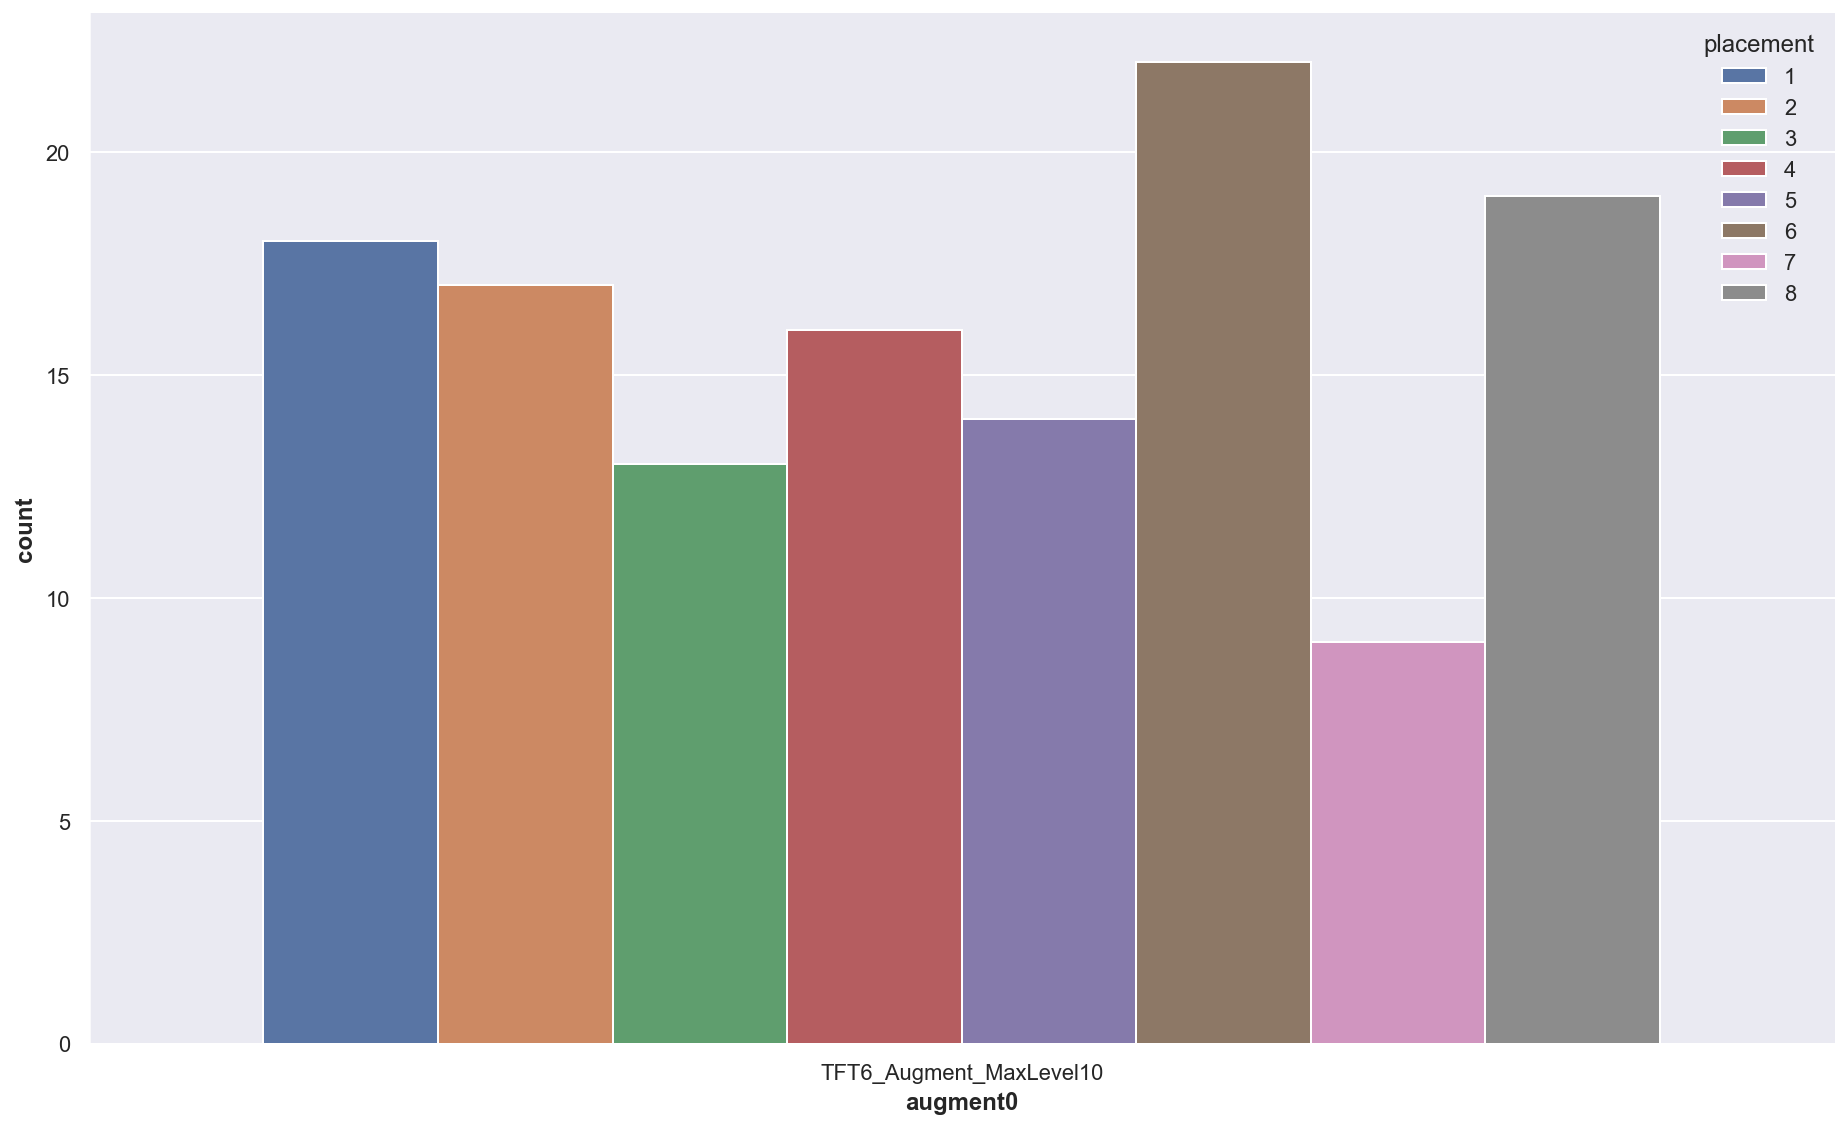

In [132]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MaxLevel10'], x='augment0', hue=TARGETNAME)
sns.despine()

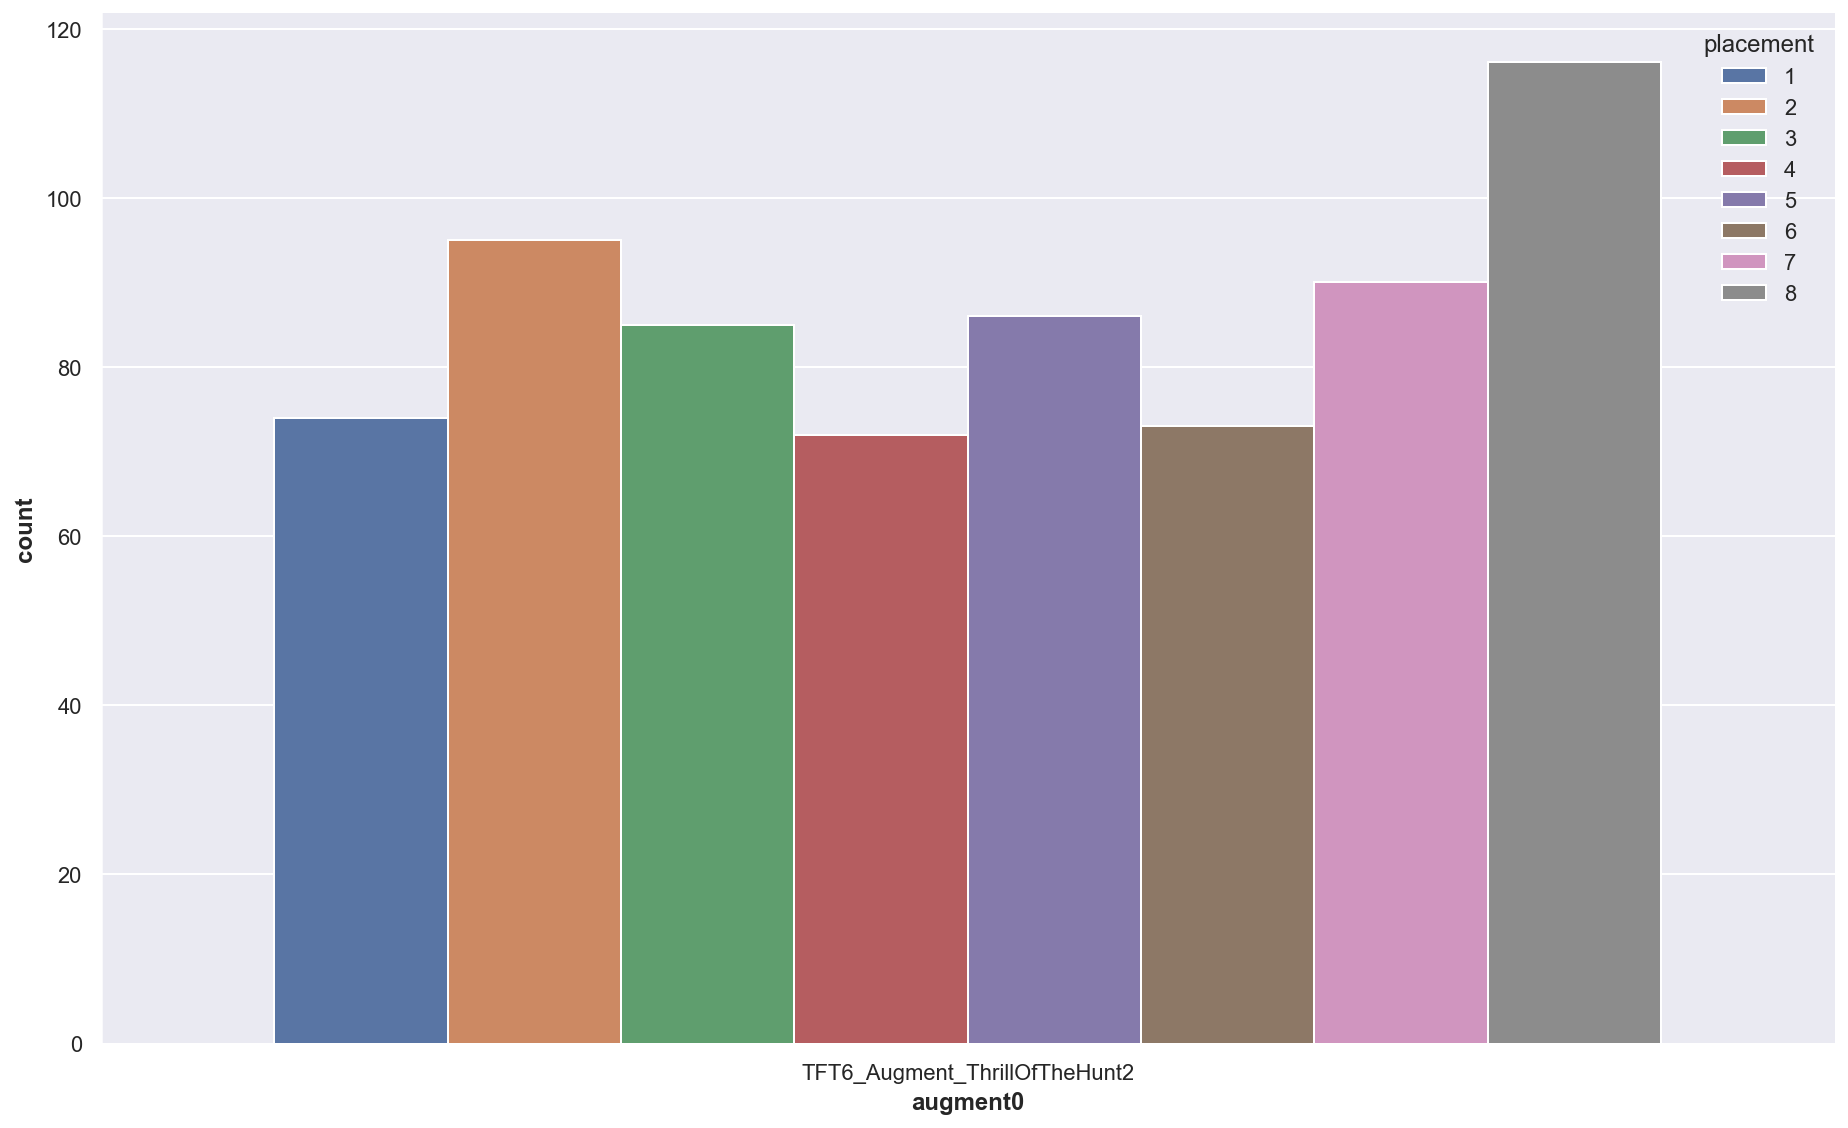

In [133]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_ThrillOfTheHunt2'], x='augment0', hue=TARGETNAME)
sns.despine()

In [134]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')
# group and aggregate mean/median
dct = {'Value_Count': ('augment0', 'count'), 'average_placement': ('placement', 'mean')}
augment0_rank_df = m.groupby('augment0', as_index=False).agg(**dct).sort_values(by='average_placement')
augment0_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_27392\207590299.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')


augment0  Value_Count  average_placement
155             TFT7_Augment_Preparation3HR            1           2.000000
79                       TFT7_Augment_AFKHR            1           3.000000
161               TFT7_Augment_RevelEmblem2          102           3.186275
74                      TFT6_Augment_Twins2          151           3.430464
110                TFT7_Augment_CursedCrown           34           3.647059
119               TFT7_Augment_GadgetExpert          322           3.720497
22                  TFT6_Augment_Diversify2            4           3.750000
184                  TFT7_Augment_ThinkFast           26           3.807692
20                 TFT6_Augment_Distancing3           14           3.857143
134                 TFT7_Augment_JadeTrait2           79           3.886076
104  TFT7_Augment_CavalierDevastatingCharge           18           3.888889
91                TFT7_Augment_BestFriends3           98           3.918367
10         TFT6_Augment_CyberneticImplants2          334           3.934132
90                TFT7_Augment_BestFriends2          368           3.942935
11         TFT6_Augment_CyberneticImplants3          102           3.970588
75                      TFT6_Augment_Twins3           50           3.980000
121            TFT7_Augment_GuardianEmblem2            7           4.000000
181             TFT7_Augment_TempestEmblem2           14           4.000000
92                  TFT7_Augment_BigFriend2            1           4.000000
130                 TFT7_Augment_JadeEmblem          214           4.004673
3                 TFT6_Augment_BlueBattery2          235           4.029787
178    TFT7_Augment_SwiftshotPressTheAttack          174           4.086207
50               TFT6_Augment_PortableForge         1367           4.116313
122     TFT7_Augment_GuardianHeroicPresence           13           4.153846
8                    TFT6_Augment_ClearMind          202           4.173267
135                TFT7_Augment_LivingForge          309           4.174757
24              TFT6_Augment_Electrocharge2          948           4.185654
82             TFT7_Augment_AssassinEmblem2          106           4.188679
81              TFT7_Augment_AssassinEmblem          236           4.194915
131      TFT7_Augment_JadeEternalProtection           66           4.196970

In [135]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')
# group and aggregate mean/median
dct = {'Value_Count': ('augment1', 'count'), 'average_placement': ('placement', 'mean')}
augment1_rank_df = m.groupby('augment1', as_index=False).agg(**dct).sort_values(by='average_placement')
augment1_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_27392\1890264867.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')


augment1  Value_Count  average_placement
67              TFT6_Augment_Traitless3            5           1.600000
65              TFT6_Augment_Traitless1            9           2.444444
156           TFT7_Augment_RevelEmblem2           44           3.159091
103        TFT7_Augment_CavalierEmblem2           40           3.275000
78         TFT7_Augment_AssassinEmblem2           27           3.518519
89              TFT7_Augment_BigFriend2           56           3.696429
10     TFT6_Augment_CyberneticImplants2          108           3.740741
71                  TFT6_Augment_Twins2           95           3.821053
157       TFT7_Augment_RevelPartyFavors           49           3.836735
175          TFT7_Augment_TempestEmblem            7           3.857143
13        TFT6_Augment_CyberneticShell2           84           3.857143
17       TFT6_Augment_CyberneticUplink3           51           3.882353
11     TFT6_Augment_CyberneticImplants3           61           3.934426
72                  TFT6_Augment_Twins3           64           3.937500
98        TFT7_Augment_CannoneerHotShot          115           3.973913
158     TFT7_Augment_RevelPartyFavorsHR            1           4.000000
169      TFT7_Augment_ShimmerscaleTrait           46           4.000000
14        TFT6_Augment_CyberneticShell3           57           4.000000
124           TFT7_Augment_GuildEmblem2           62           4.016129
87            TFT7_Augment_BestFriends3          235           4.017021
166     TFT7_Augment_ShapeshifterTrait2           30           4.033333
127             TFT7_Augment_JadeEmblem          222           4.045045
131             TFT7_Augment_JadeTrait2           86           4.046512
22              TFT6_Augment_Diversify2          600           4.060000
164  TFT7_Augment_ShapeshifterBeastsDen           63           4.063492
119         TFT7_Augment_GuardianEmblem           30           4.066667
179              TFT7_Augment_ThinkFast          126           4.071429
86            TFT7_Augment_BestFriends2          353           4.073654
20             TFT6_Augment_Distancing3           64           4.093750
109            TFT7_Augment_DragonHorde          286           4.097902

In [136]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')
# group and aggregate mean/median
dct = {'Value_Count': ('augment2', 'count'), 'average_placement': ('placement', 'mean')}
augment2_rank_df = m.groupby('augment2', as_index=False).agg(**dct).sort_values(by='average_placement')
augment2_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_27392\3922423790.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')


augment2  Value_Count  average_placement
58              TFT6_Augment_Traitless3            1           1.000000
57              TFT6_Augment_Traitless2            4           2.500000
156         TFT7_Augment_TempestEmblem2            1           3.000000
25         TFT6_Augment_Featherweights2            3           3.000000
127           TFT7_Augment_MysticTrait2            2           3.000000
61               TFT6_Augment_TriForce3            3           3.666667
52            TFT6_Augment_TheGoldenEgg          204           3.759804
67         TFT7_Augment_AssassinEmblem2           42           3.761905
18              TFT6_Augment_Distancing           34           3.764706
15       TFT6_Augment_CyberneticUplink1          102           3.862745
117             TFT7_Augment_JadeTrait2           91           3.901099
133         TFT7_Augment_RagewingScorch          145           3.917241
74            TFT7_Augment_BestFriends2          687           3.925764
143        TFT7_Augment_ScalescornTrait            5           4.000000
166           TFT7_Augment_WarriorTrait            5           4.000000
75            TFT7_Augment_BestFriends3          177           4.011299
144  TFT7_Augment_ShapeshifterBeastsDen          246           4.028455
168          TFT7_Augment_WhispersTrait           35           4.028571
10     TFT6_Augment_CyberneticImplants2          773           4.047865
77              TFT7_Augment_BigFriend2          474           4.048523
110           TFT7_Augment_GuildEmblem2           56           4.053571
159              TFT7_Augment_ThinkFast          199           4.055276
22              TFT6_Augment_Diversify2         1411           4.057406
11     TFT6_Augment_CyberneticImplants3          204           4.078431
136           TFT7_Augment_RevelEmblem2           35           4.085714
63                TFT6_Augment_Weakspot          273           4.091575
135          TFT7_Augment_RagewingTrait            9           4.111111
13        TFT6_Augment_CyberneticShell2          673           4.121842
23              TFT6_Augment_Diversify3          317           4.123028
152       TFT7_Augment_SwiftshotEmblem2           24           4.125000

# Baseline Model

In [137]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, log_loss, confusion_matrix, roc_curve, precision_recall_curve
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

In [138]:
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='mae', 
                    n_estimators=150) #, use_label_encoder=False hist tree_method='hist', enable_categorical=True,

In [139]:
le_target = LabelEncoder()

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
augment_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
item_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
preproc = StandardScaler()

# Encode label.
# y = le_target.fit_transform(y)

In [140]:
# Encode category columns.
xgb_regressor_pipeline = Pipeline([
    ('preprocess', ColumnTransformer(
        transformers=[
            ("one_hot_time", one_hot_encoder, categorical_cols),
            # ("augment", augment_oe, categorical_cols[:3]),
            # ("item", item_oe, categorical_cols[3:]),
        ],
        remainder=preproc,
        verbose_feature_names_out=False,
    )),
    ('classifier', xgb),]
)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.85, random_state=42, stratify=match_id_df) # , stratify=match_id_df

xgb_regressor_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Aatrox_item0',
                                                   'TFT7_Aatrox_item1',
                                                   'TFT7_Aatrox_item2',
                                                   'TFT7_Anivia_item0',
                                                   'TFT7_Anivia_item1',
                                                   'TFT7_Anivia_item2',
                                                   'TFT7_AoShin_item0',
                                                   'TFT7_AoShin_item1'...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=150, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [142]:
y_pred = xgb_regressor_pipeline.predict(X_test)

In [143]:
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the model
	# evaluate the model
	scores = cross_val_score(xgb_regressor_pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return np.mean(scores), scores.min(), scores.max()

In [144]:
# # calculate the ideal test condition
# ideal, _, _ = evaluate_model(LeaveOneOut())
# print('Ideal: %.3f' % ideal)
# # define folds to test
# folds = range(2,31)
# # record mean and min/max of each set of results
# means, mins, maxs = list(),list(),list()
# # evaluate each k value
# for k in folds:
# 	# define the test condition
# 	cv = KFold(n_splits=k, shuffle=True, random_state=1)
# 	# evaluate k value
# 	k_mean, k_min, k_max = evaluate_model(cv)
# 	# report performance
# 	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
# 	# store mean accuracy
# 	means.append(k_mean)
# 	# store min and max relative to the mean
# 	mins.append(k_mean - k_min)
# 	maxs.append(k_max - k_mean)
# # line plot of k mean values with min/max error bars
# pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# # plot the ideal case in a separate color
# pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# # show the plot
# pyplot.show()

In [145]:
def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis = 1 ),
        'precision': cm / cm.sum(axis = 0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout = True, figsize = (20,6))
    ax = ax.flatten()
#     mask = (np.eye(cm.shape[0]) == 0) * 1
    for idx, (name, matrix) in enumerate(metrics.items()):
        ax[idx].set_title(name)
        sns.heatmap(
            data = matrix,
            cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar = False,
#             mask=mask,
            lw = 0.25,
            annot = True,
            fmt = '.2f',
            ax = ax[idx]
        )
#         for tick in ax[idx].get_xticklabels():
#                 tick.set_rotation(60)
                
    sns.despine()
    
def plot_cm_error(cm):
    mask = (np.eye(cm.shape[0]) != 0) * 1
    fig, ax = plt.subplots(tight_layout=True, figsize=(15,8))
    sns.heatmap(
                data = pd.DataFrame(data=cm, index=le_target.classes_, columns = le_target.classes_),
#                 cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
                cbar = False,
                lw = 0.25,
                mask = mask,
                annot = True,
                fmt = '.0f',
                ax = ax
            )
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()

In [146]:
# create confusion matrix, calculate accuracy,recall & precision
# cm = pd.DataFrame(data = confusion_matrix(le_target.inverse_transform(y_test), y_pred, labels = le_target.classes_), index = le_target.classes_, columns = le_target.classes_)
# plot_cm(cm)

In [147]:
len(y_test)

4628

In [148]:
y_pred.shape

(4628,)

In [149]:
def plot_oof(y_true, y_predict):
    area = (30 * np.random.rand(len(y_predict)))**2 
    # Plot y_true vs. y_pred
    plt.figure(figsize=(10, 10))
    plt.scatter(y_true, y_predict, s=area, color='r', alpha=0.2)
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
    plt.gca().set_aspect('equal')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('OOF Predictions')
    plt.show()

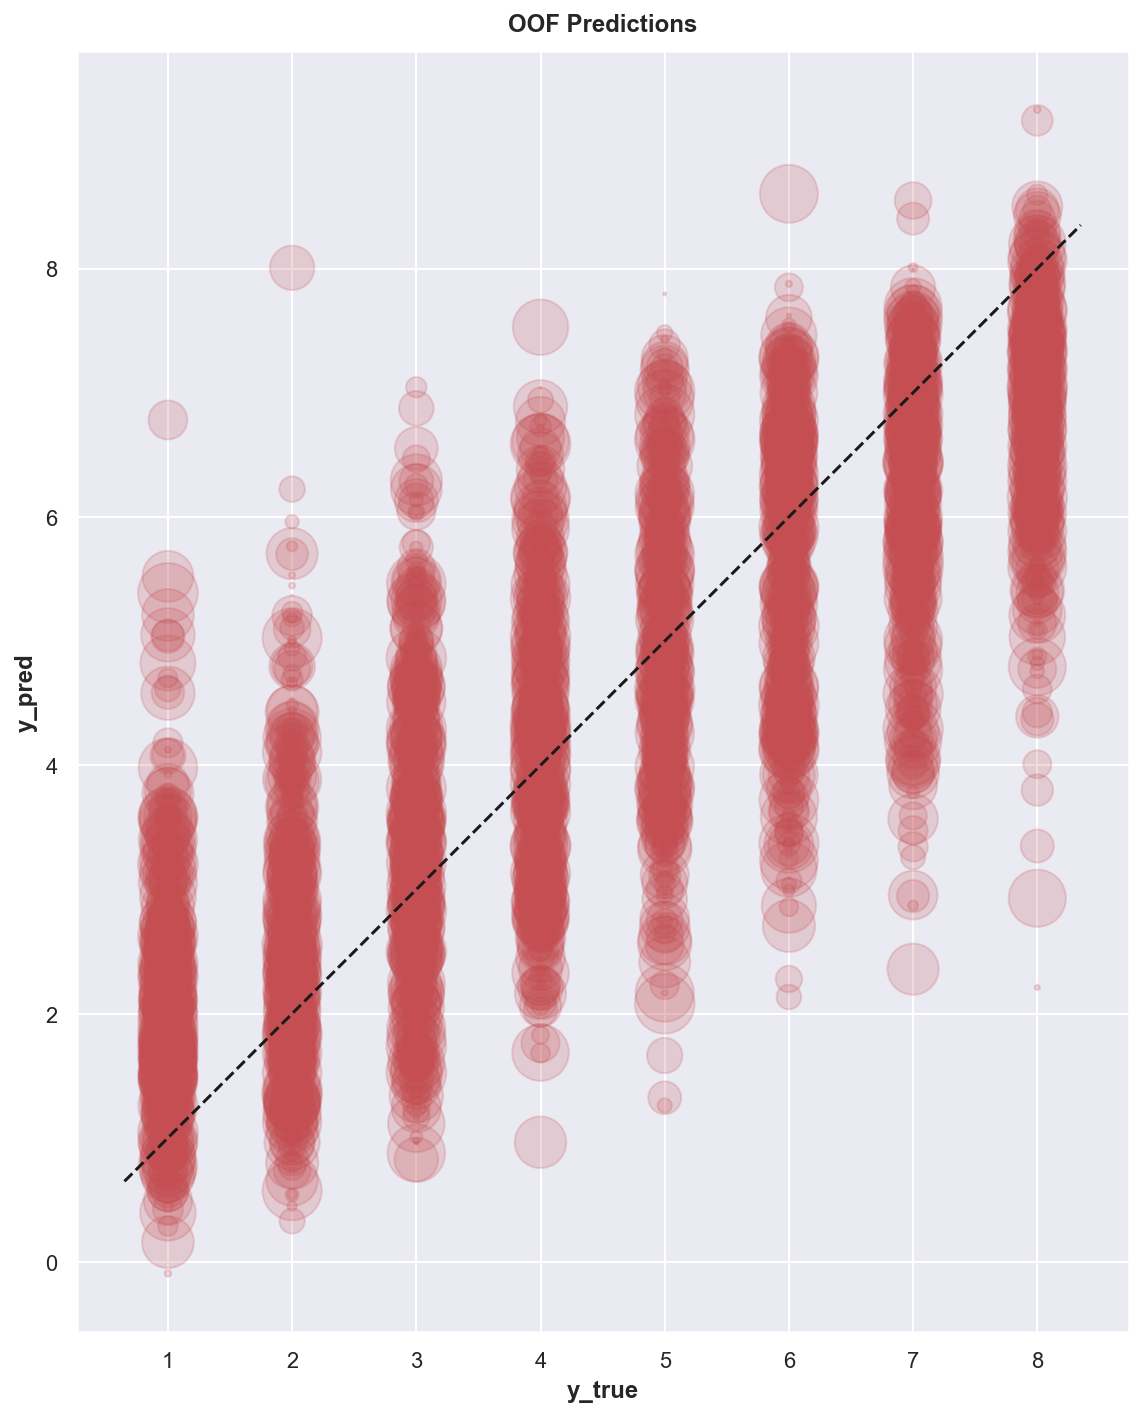

In [150]:
plot_oof(y_test, y_pred)

In [151]:
min(y_pred)

-0.091379434

In [152]:
mean_absolute_error(y_test, y_pred)

0.9918214

In [153]:
mean_squared_error(y_test, y_pred)

1.5848678

In [154]:
print(f"XGB train score : {xgb_regressor_pipeline.score(X_train, y_train):.3f}")
print(f"XGB test score: {xgb_regressor_pipeline.score(X_test, y_test):.3f}")

XGB train score : 0.808
XGB test score: 0.693


# mdi_importances

In [155]:
feature_names = xgb_regressor_pipeline[:-1].get_feature_names_out()
mdi_importances = pd.Series(
    xgb_regressor_pipeline[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

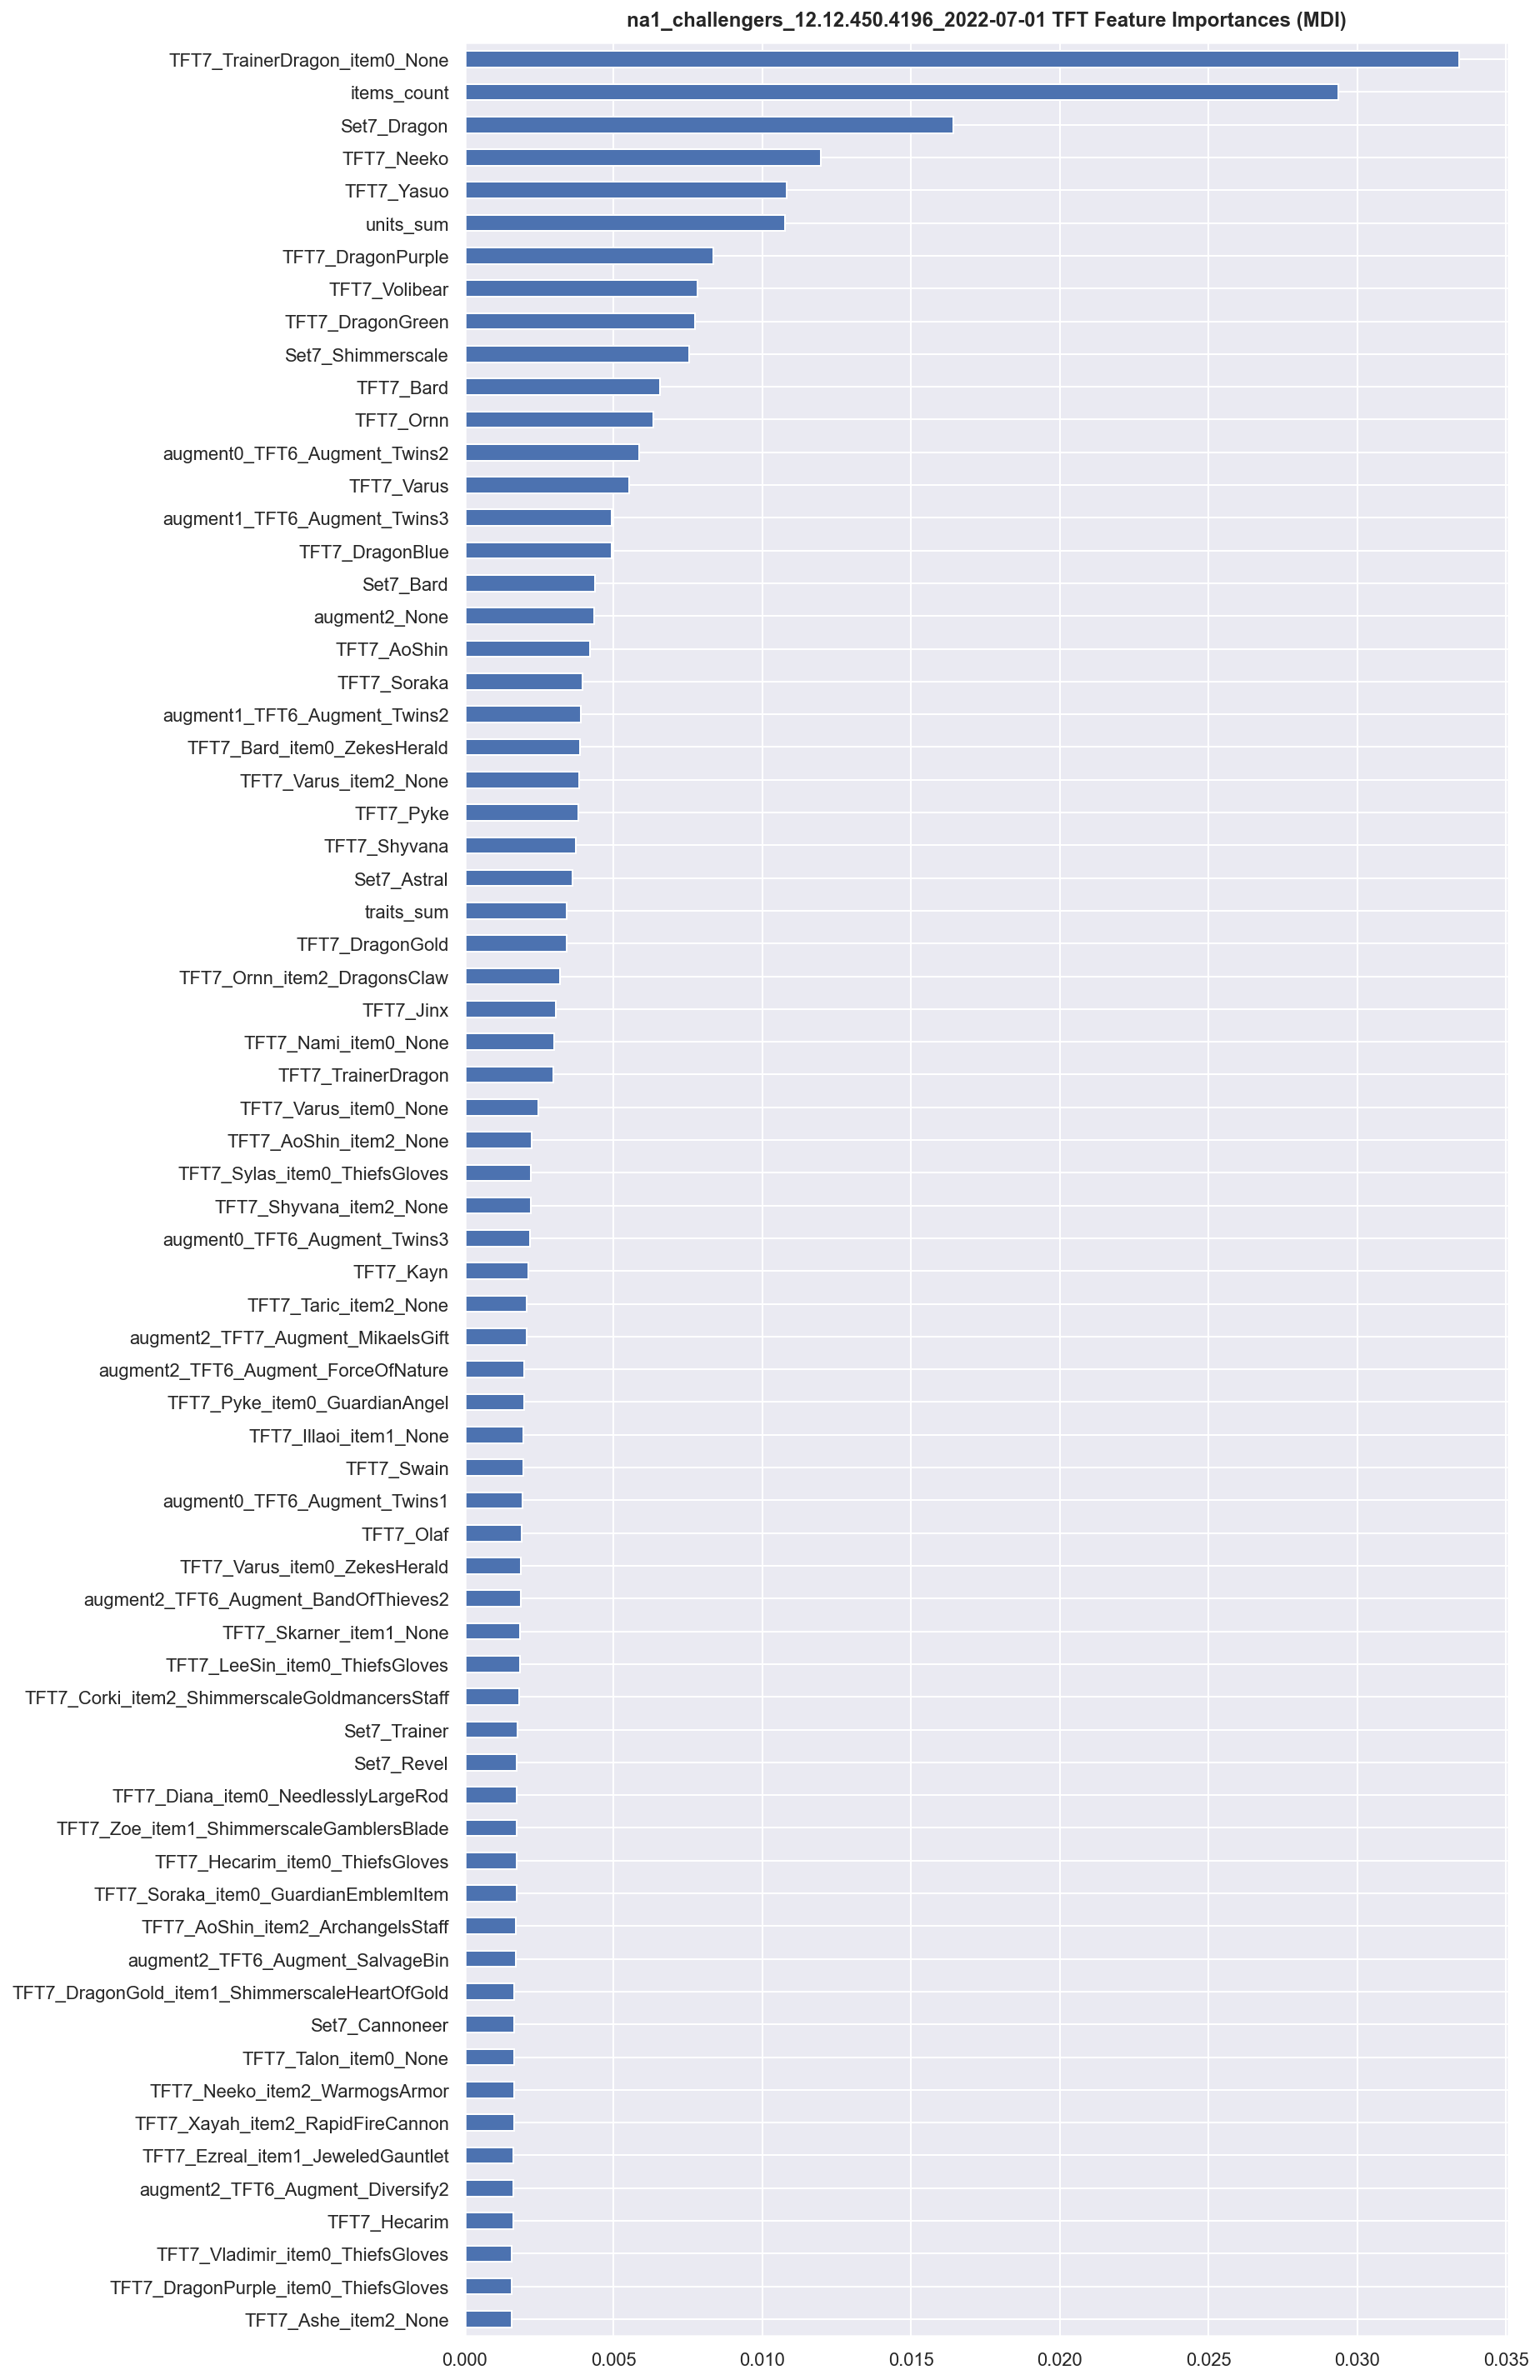

In [156]:
plt.figure(figsize=(13, 20))
ax = mdi_importances[-70:].plot.barh()
ax.set_title(f"{SERVER}_{LEAGUE}_{LATEST_RELEASE}_{PATCH} TFT Feature Importances (MDI)")
ax.figure.tight_layout()

In [157]:
mdi_importances.to_csv(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_{PATCH}_mdi_importances.csv'))

In [158]:
mdi_importances[-60:]

TFT7_DragonGold_item1_ShimmerscaleHeartOfGold    0.001668
augment2_TFT6_Augment_SalvageBin                 0.001706
TFT7_AoShin_item2_ArchangelsStaff                0.001716
TFT7_Soraka_item0_GuardianEmblemItem             0.001733
TFT7_Hecarim_item0_ThiefsGloves                  0.001735
TFT7_Zoe_item1_ShimmerscaleGamblersBlade         0.001736
TFT7_Diana_item0_NeedlesslyLargeRod              0.001740
Set7_Revel                                       0.001741
Set7_Trainer                                     0.001765
TFT7_Corki_item2_ShimmerscaleGoldmancersStaff    0.001822
TFT7_LeeSin_item0_ThiefsGloves                   0.001856
TFT7_Skarner_item1_None                          0.001866
augment2_TFT6_Augment_BandOfThieves2             0.001868
TFT7_Varus_item0_ZekesHerald                     0.001893
TFT7_Olaf                                        0.001902
augment0_TFT6_Augment_Twins1                     0.001944
TFT7_Swain                                       0.001957
TFT7_Illaoi_it

In [159]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    xgb_regressor_pipeline, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()

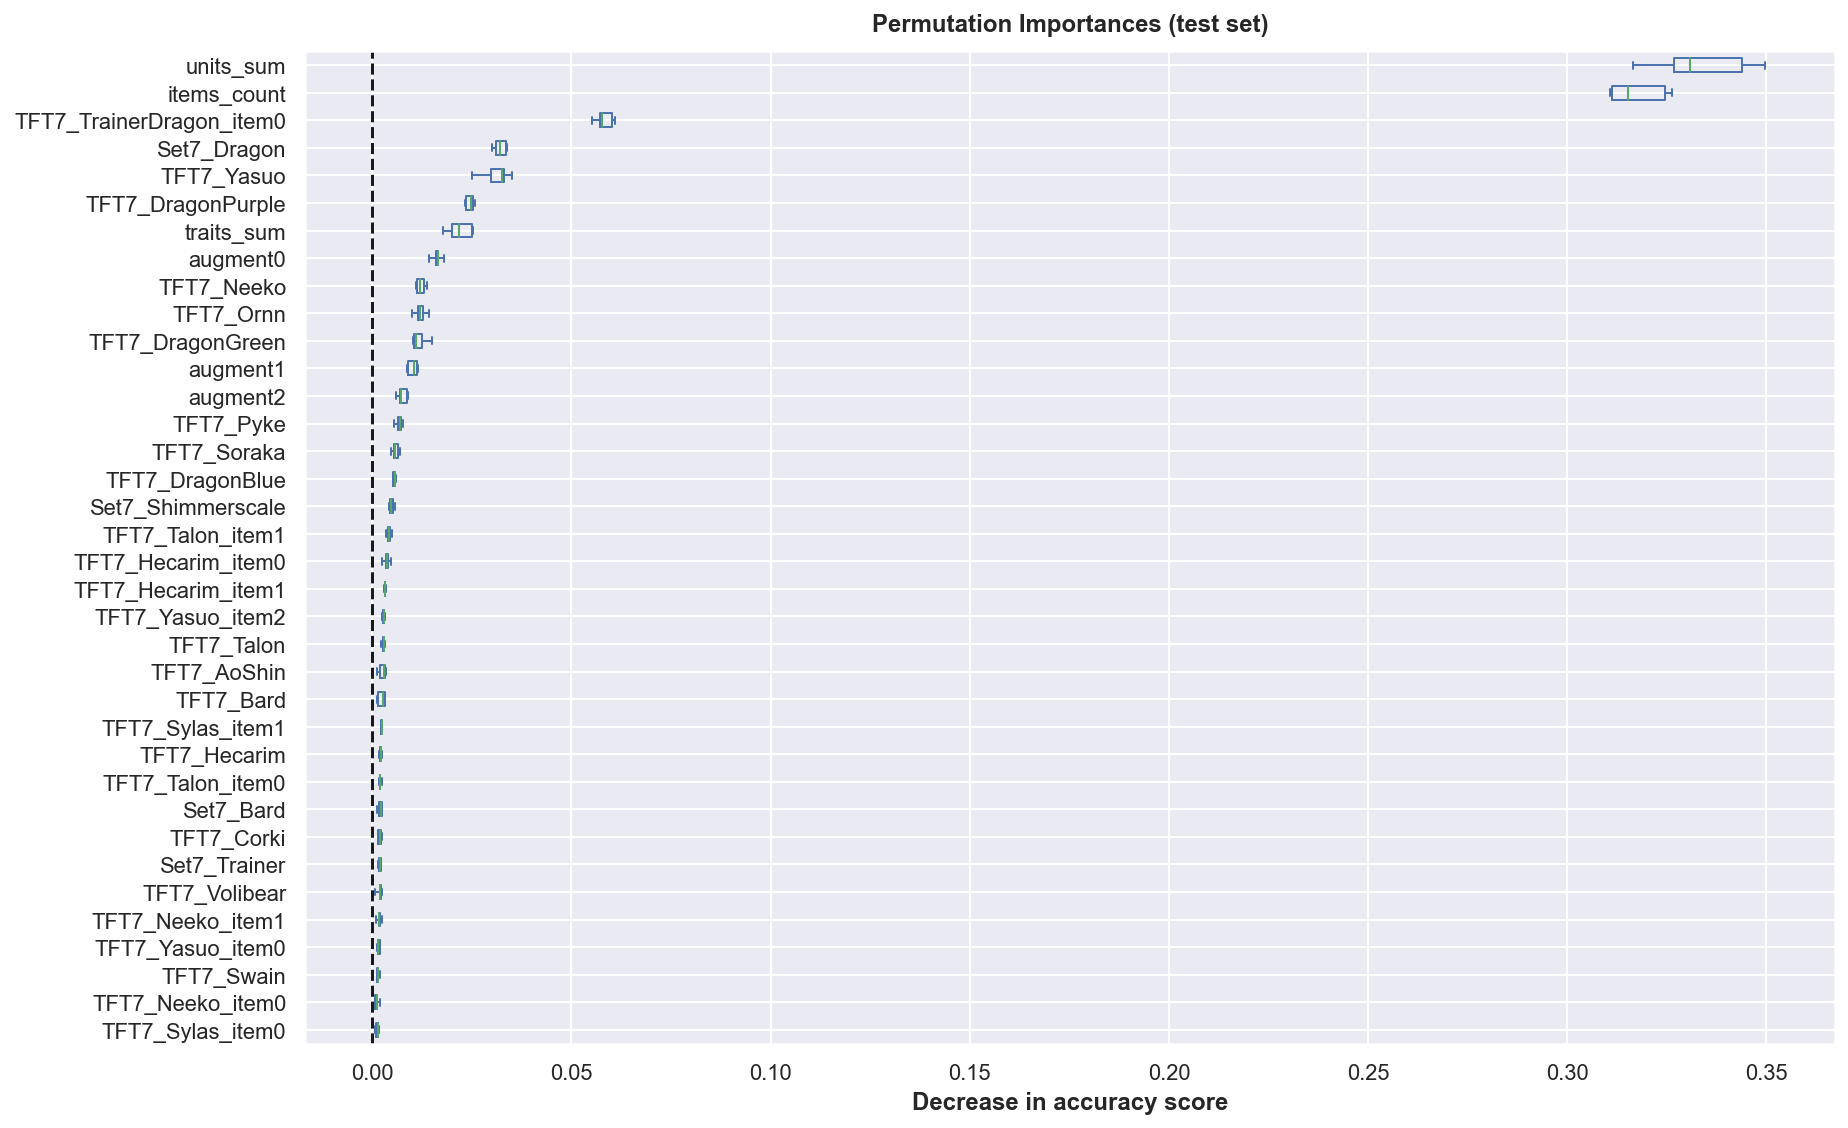

In [160]:
importances = pd.DataFrame(
    result.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)
# plt.figure(figsize=(15, 30))
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

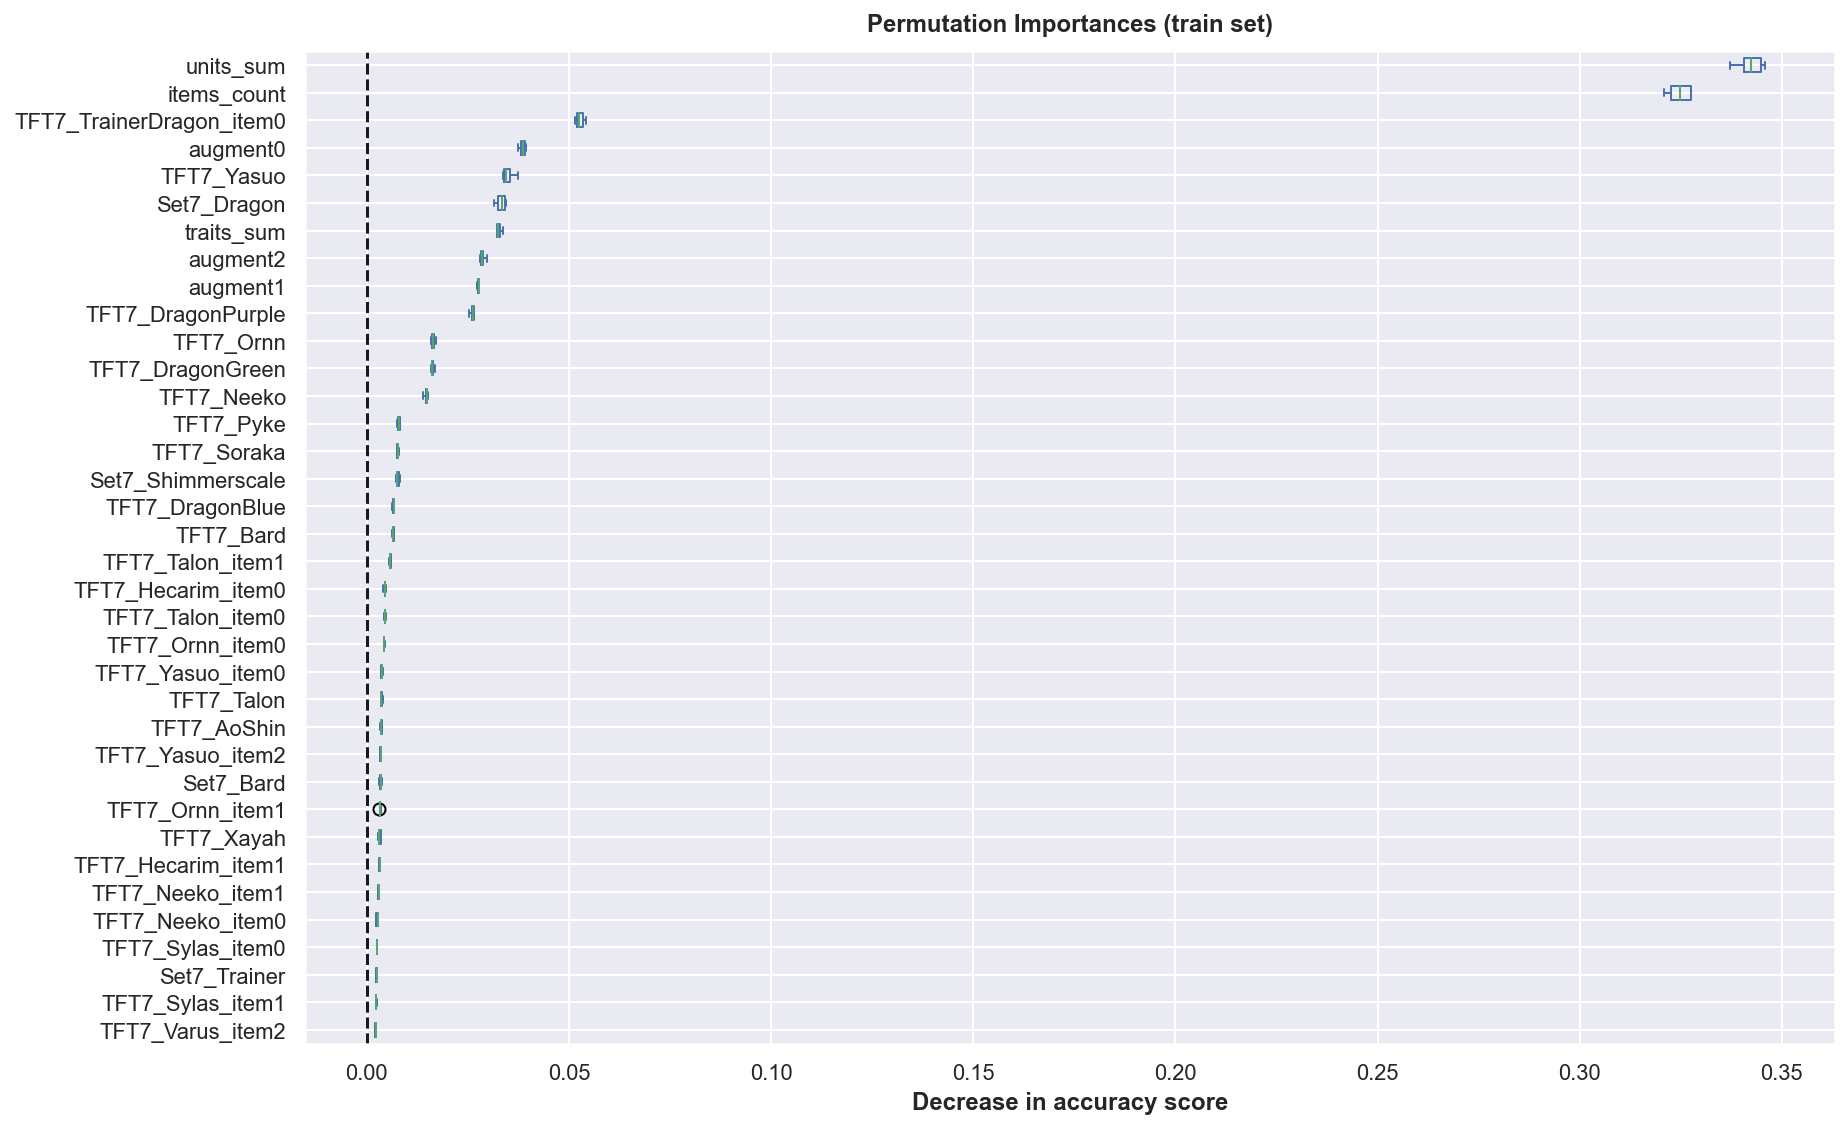

In [161]:
result = permutation_importance(
    xgb_regressor_pipeline, X_train, y_train, n_repeats=5, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [162]:
xgb_regressor_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Aatrox_item0',
                                                   'TFT7_Aatrox_item1',
                                                   'TFT7_Aatrox_item2',
                                                   'TFT7_Anivia_item0',
                                                   'TFT7_Anivia_item1',
                                                   'TFT7_Anivia_item2',
                                                   'TFT7_AoShin_item0',
                                                   'TFT7_AoShin_item1'...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=150, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [163]:
xgb_regressor_pipeline.set_params(classifier__n_estimators=10).fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Aatrox_item0',
                                                   'TFT7_Aatrox_item1',
                                                   'TFT7_Aatrox_item2',
                                                   'TFT7_Anivia_item0',
                                                   'TFT7_Anivia_item1',
                                                   'TFT7_Anivia_item2',
                                                   'TFT7_AoShin_item0',
                                                   'TFT7_AoShin_item1'...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=10, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

Observing the accuracy score on the training and testing set, we observe that
the two metrics are very similar now. Therefore, our model is not overfitting
anymore. We can then check the permutation importances with this new model.

In [164]:
print(f"XGB train score : {xgb_regressor_pipeline.score(X_train, y_train):.3f}")
print(f"XGB test score: {xgb_regressor_pipeline.score(X_test, y_test):.3f}")

XGB train score : 0.677
XGB test score: 0.653


In [165]:
train_result = permutation_importance(
    xgb_regressor_pipeline, X_train, y_train, n_repeats=5, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    xgb_regressor_pipeline, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx[-36:]].T,
    columns=X.columns[sorted_importances_idx[-36:]],
)

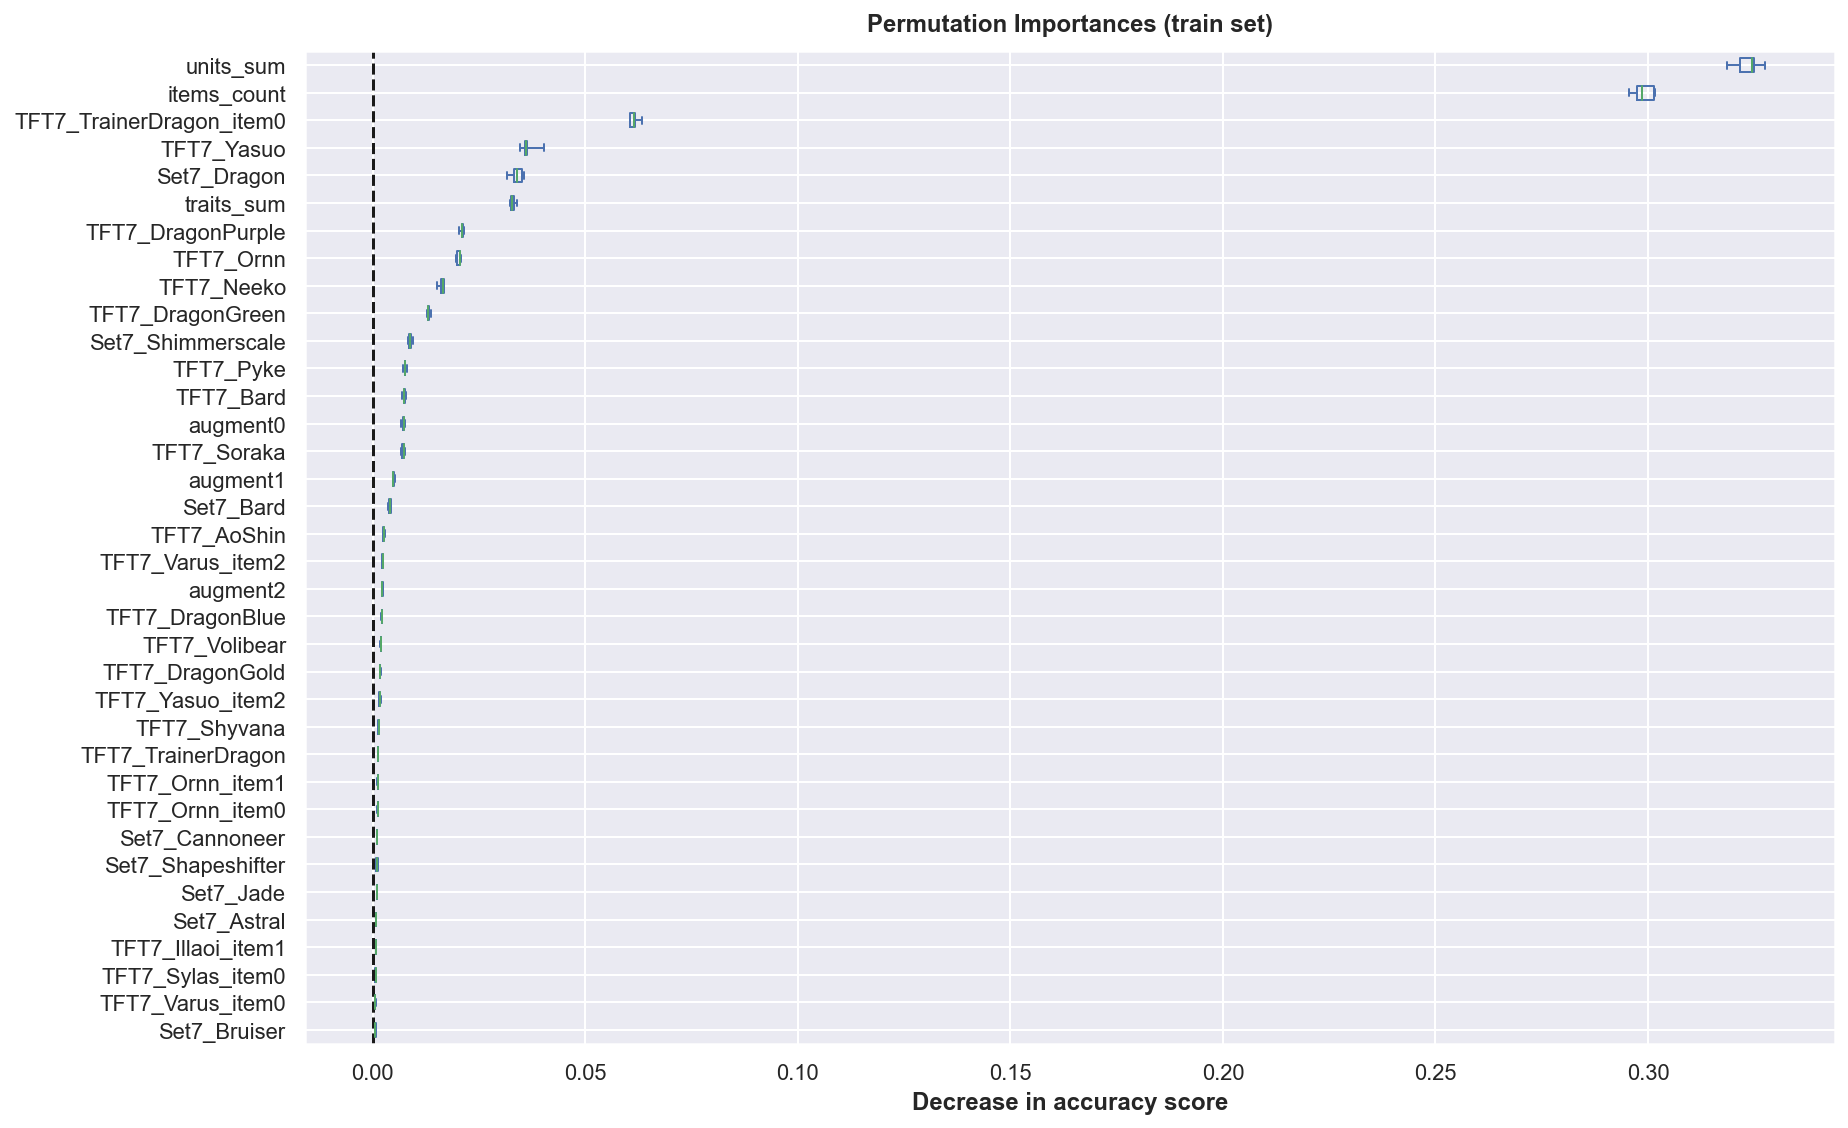

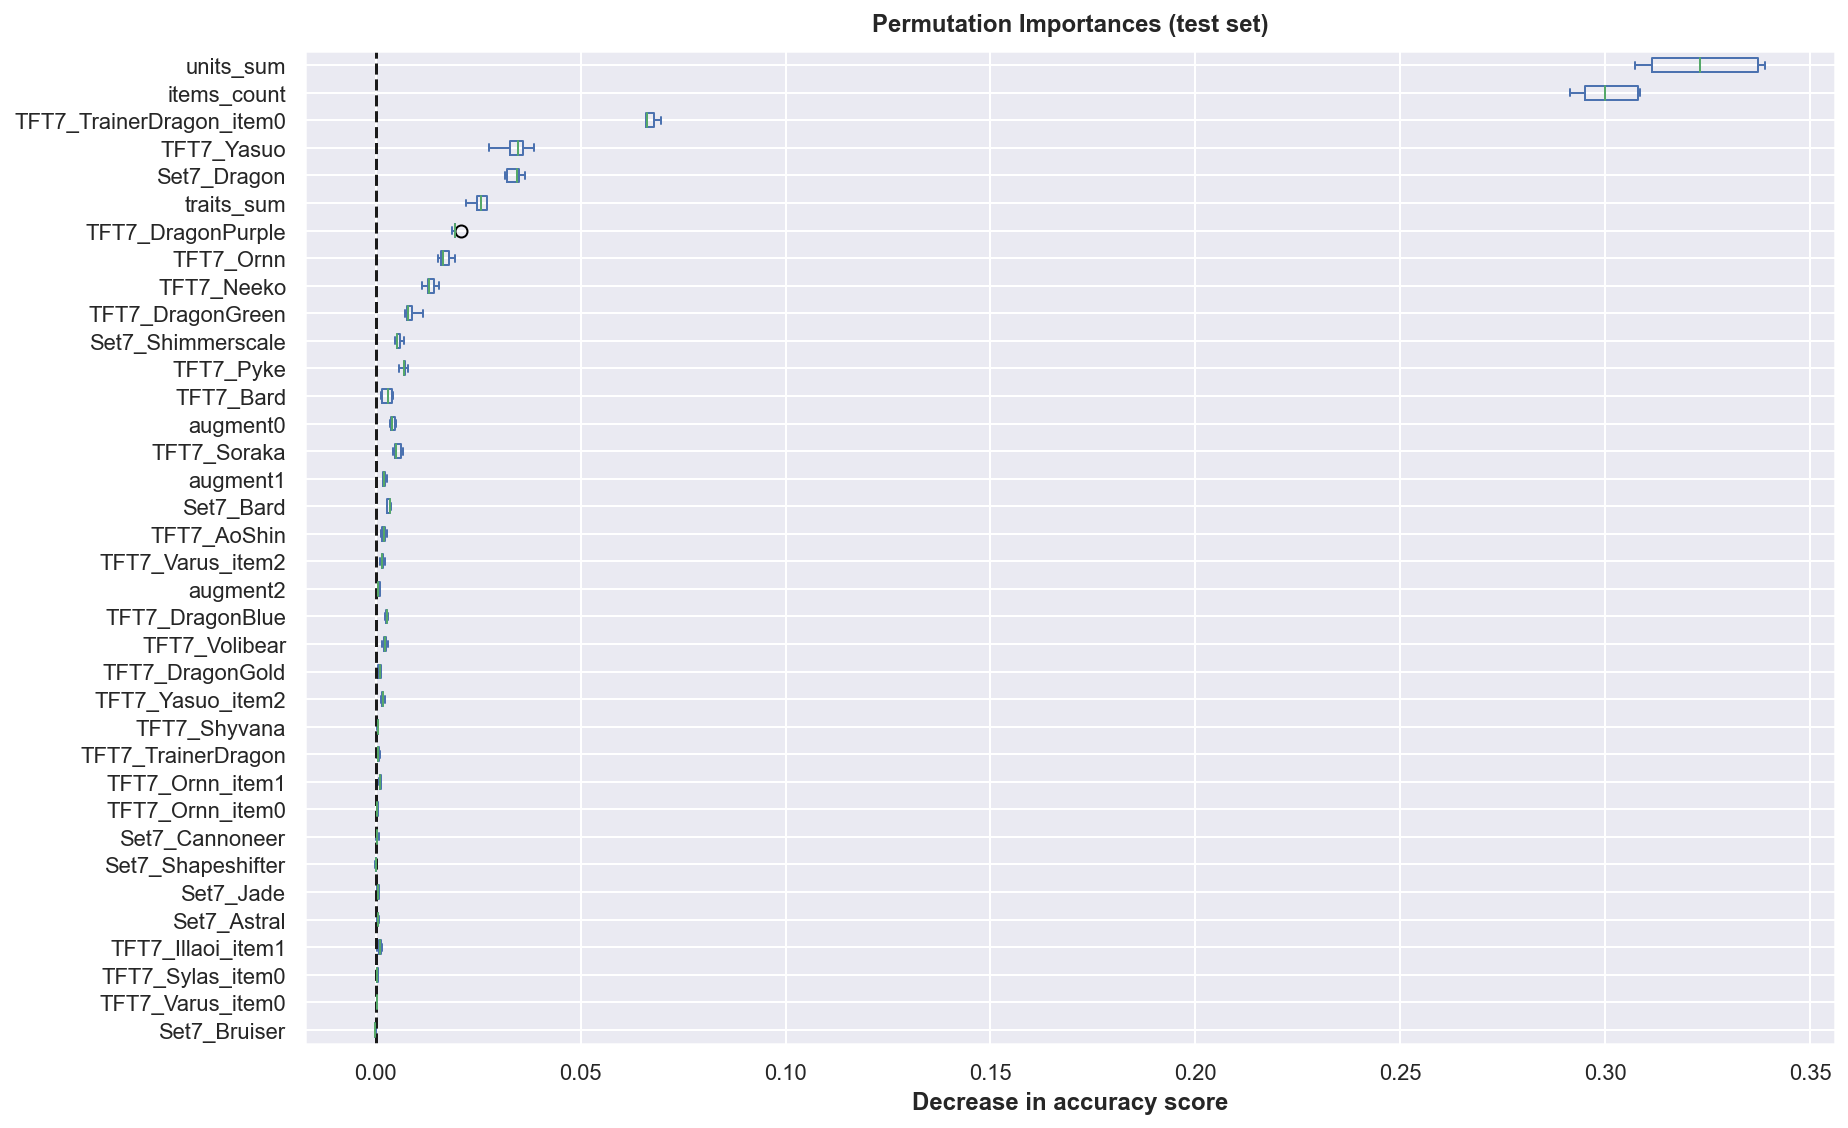

In [166]:
for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()